# Setup

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
PATH = r'C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\data\q4_2017.xlsx'
columns=['Sp_nummer', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order', 'Billing']
df = pd.read_excel(PATH, index_col=None, header=1)
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [2]:
df.head()

Sp_number  Due_date  Fc_horizon  Fc_date  Fc_and_order  Billing
0  Product_19    201813          13   201752        176316      NaN
1  Product_20    201813          13   201752        516510      NaN
2  Product_22    201813          13   201752        237587      NaN
3  Product_30    201813          13   201752        393741      NaN
4  Product_39    201813          13   201752         92112      NaN

In [3]:
products = df['Sp_number'].unique()
prod2idx = {}
idx2prod = {}
for idx, prod in enumerate(products):
    if prod not in prod2idx:
        prod2idx[prod] = idx
        idx2prod[idx] = prod
        
#Add column with integer product names

products_int = []
for idx, row in df['Sp_number'].iteritems():
    products_int.append(prod2idx[row])
    
df['products'] = products_int

In [4]:
mapper = {
    'products': 'product',
    'Fc_horizon': 'horizon',
    'Fc_and_order': 'forecast',
    'Billing': 'billing',
    "Due_date": "ddate",
    "Fc_date": "fdate"
}
df.rename(columns=mapper, inplace=True)

In [5]:
df['isodate'] = df[['ddate']].apply(lambda x: dt.datetime.strptime(str(x['ddate'])+'-1',"%Y%W-%w"), axis=1)

In [6]:
df.head()

Sp_number   ddate  horizon   fdate  forecast  billing  product    isodate
0  Product_19  201813       13  201752    176316      NaN        0 2018-03-26
1  Product_20  201813       13  201752    516510      NaN        1 2018-03-26
2  Product_22  201813       13  201752    237587      NaN        2 2018-03-26
3  Product_30  201813       13  201752    393741      NaN        3 2018-03-26
4  Product_39  201813       13  201752     92112      NaN        4 2018-03-26

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27064 entries, 0 to 27063
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sp_number  27064 non-null  object        
 1   ddate      27064 non-null  int64         
 2   horizon    27064 non-null  int64         
 3   fdate      27064 non-null  int64         
 4   forecast   27064 non-null  int64         
 5   billing    26254 non-null  float64       
 6   product    27064 non-null  int64         
 7   isodate    27064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 1.7+ MB


# Data Preparation

In [8]:
df_dh = df.groupby(['isodate', 'horizon', 'product'], as_index=False).sum()
idxs = df_dh.loc[df_dh['billing'] == 0].index
df_dh.drop(idxs, inplace=True)

In [9]:
df_dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26124 entries, 0 to 26123
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   isodate   26124 non-null  datetime64[ns]
 1   horizon   26124 non-null  int64         
 2   product   26124 non-null  int64         
 3   ddate     26124 non-null  int64         
 4   fdate     26124 non-null  int64         
 5   forecast  26124 non-null  int64         
 6   billing   26124 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.4 MB


In [40]:
df1 = df_dh.loc[df_dh['product'] == 0].copy()

In [44]:
df1

isodate  horizon  product   ddate   fdate  forecast   billing
0     2014-01-06        1        0  201401  201352    220834  209000.0
9     2014-01-06        2        0  201401  201351    244710  209000.0
18    2014-01-06        3        0  201401  201350    250756  209000.0
27    2014-01-06        4        0  201401  201349    425917  209000.0
36    2014-01-06        5        0  201401  201348    421559  209000.0
...          ...      ...      ...     ...     ...       ...       ...
26074 2017-12-25        9        0  201752  201743    178765  301000.0
26084 2017-12-25       10        0  201752  201742    178101  301000.0
26094 2017-12-25       11        0  201752  201741    167090  301000.0
26104 2017-12-25       12        0  201752  201740    171074  301000.0
26114 2017-12-25       13        0  201752  201739    196910  301000.0

[2623 rows x 7 columns]

In [45]:
hors = df1.horizon.unique()
dates = df1.isodate.unique()
data = {}

for date in dates:
    for h in hors:
        val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
        if not val:
            val = [0]
        if h not in data:
            data[h] = []
        data[h].append(val[0])

In [46]:
df_ = pd.DataFrame(data, columns=data.keys(), index=dates)
df_

1       2       3       4       5       6       7       8   \
2014-01-06  220834  244710  250756  425917  421559  421549  431115  455151   
2014-01-13  262289  250018  249931  250071  224503  220719  196538  192658   
2014-01-20  449633  525423  539445  536118  539133  409341  440793  408595   
2014-01-27  206085  186124  114911  117072  108968  107969  111797  115140   
2014-02-03  126028  171459  186274  167025  168022  170353  169847  195428   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2017-11-27  183804  222646  297679  241484  224469  224019  235650  212731   
2017-12-04  328866  344773  319621  422807  277310  265061  256083  220126   
2017-12-11       0  329160  284936  280945  303023  295784  272773  237929   
2017-12-18  194600       0  215511  225748  222492  279558  269261  255357   
2017-12-25  182723  209772       0  201367  193309  192361  189891  191804   

                9       10      11      12      13  
2014-01-06  455123  463780  463904  459784  458313  
2014-01-13  192600  179523  173930  159483  216909  
2014-01-20  398796  401730  365757  290489  287652  
2014-01-27  113152  115152  116882  124997  123413  
2014-02-03  178293  178154  183590  202598  195719  
...            ...     ...     ...     ...     ...  
2017-11-27  230485  216830  213490  216072  224634  
2017-12-04  239771  253228  240649  242886  268371  
2017-12-11  251200  241125  248384  245842  253764  
2017-12-18  249216  239889  255379  246320  251957  
2017-12-25  178765  178101  167090  171074  196910  

[208 rows x 13 columns]

In [32]:
df_.T.mean()

2014-01-06    397884.230769
2014-01-13    213013.230769
2014-01-20    430223.461538
2014-01-27    127820.153846
2014-02-03    176368.461538
                  ...      
2017-11-27    226461.000000
2017-12-04    283042.461538
2017-12-11    249605.000000
2017-12-18    223483.692308
2017-12-25    173320.538462
Length: 208, dtype: float64

In [47]:
hors = df1.horizon.unique()
dates = df1.isodate.unique()
data = {}

means = df_.T.mean()

for date in dates:
    mean = means[date]
    for h in hors:
        val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
        if not val:
            val = [mean]
        if h not in data:
            data[h] = []
        data[h].append(val[0])

In [48]:
df_ = pd.DataFrame(data, columns=data.keys(), index=dates)

In [49]:
df_

1              2              3         4         5   \
2014-01-06  220834.0  244710.000000  250756.000000  425917.0  421559.0   
2014-01-13  262289.0  250018.000000  249931.000000  250071.0  224503.0   
2014-01-20  449633.0  525423.000000  539445.000000  536118.0  539133.0   
2014-01-27  206085.0  186124.000000  114911.000000  117072.0  108968.0   
2014-02-03  126028.0  171459.000000  186274.000000  167025.0  168022.0   
...              ...            ...            ...       ...       ...   
2017-11-27  183804.0  222646.000000  297679.000000  241484.0  224469.0   
2017-12-04  328866.0  344773.000000  319621.000000  422807.0  277310.0   
2017-12-11  249605.0  329160.000000  284936.000000  280945.0  303023.0   
2017-12-18  194600.0  223483.692308  215511.000000  225748.0  222492.0   
2017-12-25  182723.0  209772.000000  173320.538462  201367.0  193309.0   

                  6         7         8         9         10        11  \
2014-01-06  421549.0  431115.0  455151.0  455123.0  463780.0  463904.0   
2014-01-13  220719.0  196538.0  192658.0  192600.0  179523.0  173930.0   
2014-01-20  409341.0  440793.0  408595.0  398796.0  401730.0  365757.0   
2014-01-27  107969.0  111797.0  115140.0  113152.0  115152.0  116882.0   
2014-02-03  170353.0  169847.0  195428.0  178293.0  178154.0  183590.0   
...              ...       ...       ...       ...       ...       ...   
2017-11-27  224019.0  235650.0  212731.0  230485.0  216830.0  213490.0   
2017-12-04  265061.0  256083.0  220126.0  239771.0  253228.0  240649.0   
2017-12-11  295784.0  272773.0  237929.0  251200.0  241125.0  248384.0   
2017-12-18  279558.0  269261.0  255357.0  249216.0  239889.0  255379.0   
2017-12-25  192361.0  189891.0  191804.0  178765.0  178101.0  167090.0   

                  12        13  
2014-01-06  459784.0  458313.0  
2014-01-13  159483.0  216909.0  
2014-01-20  290489.0  287652.0  
2014-01-27  124997.0  123413.0  
2014-02-03  202598.0  195719.0  
...              ...       ...  
2017-11-27  216072.0  224634.0  
2017-12-04  242886.0  268371.0  
2017-12-11  245842.0  253764.0  
2017-12-18  246320.0  251957.0  
2017-12-25  171074.0  196910.0  

[208 rows x 13 columns]

In [50]:
input_df = df_.copy()

In [51]:
output_df = df_dh[['isodate','billing']].loc[df['product'] == 0].drop_duplicates(['isodate']).copy()

In [52]:
output_df.set_index(['isodate'], inplace=True)

In [53]:
output_df

billing
isodate              
2014-01-06   209000.0
2014-01-13   760000.0
2014-01-20    50000.0
2014-01-27   207000.0
2014-02-03  1225000.0
...               ...
2017-11-27   960000.0
2017-12-04   200000.0
2017-12-11   135000.0
2017-12-18  1472500.0
2017-12-25   357500.0

[208 rows x 1 columns]

In [54]:
input_df

1              2              3         4         5   \
2014-01-06  220834.0  244710.000000  250756.000000  425917.0  421559.0   
2014-01-13  262289.0  250018.000000  249931.000000  250071.0  224503.0   
2014-01-20  449633.0  525423.000000  539445.000000  536118.0  539133.0   
2014-01-27  206085.0  186124.000000  114911.000000  117072.0  108968.0   
2014-02-03  126028.0  171459.000000  186274.000000  167025.0  168022.0   
...              ...            ...            ...       ...       ...   
2017-11-27  183804.0  222646.000000  297679.000000  241484.0  224469.0   
2017-12-04  328866.0  344773.000000  319621.000000  422807.0  277310.0   
2017-12-11  249605.0  329160.000000  284936.000000  280945.0  303023.0   
2017-12-18  194600.0  223483.692308  215511.000000  225748.0  222492.0   
2017-12-25  182723.0  209772.000000  173320.538462  201367.0  193309.0   

                  6         7         8         9         10        11  \
2014-01-06  421549.0  431115.0  455151.0  455123.0  463780.0  463904.0   
2014-01-13  220719.0  196538.0  192658.0  192600.0  179523.0  173930.0   
2014-01-20  409341.0  440793.0  408595.0  398796.0  401730.0  365757.0   
2014-01-27  107969.0  111797.0  115140.0  113152.0  115152.0  116882.0   
2014-02-03  170353.0  169847.0  195428.0  178293.0  178154.0  183590.0   
...              ...       ...       ...       ...       ...       ...   
2017-11-27  224019.0  235650.0  212731.0  230485.0  216830.0  213490.0   
2017-12-04  265061.0  256083.0  220126.0  239771.0  253228.0  240649.0   
2017-12-11  295784.0  272773.0  237929.0  251200.0  241125.0  248384.0   
2017-12-18  279558.0  269261.0  255357.0  249216.0  239889.0  255379.0   
2017-12-25  192361.0  189891.0  191804.0  178765.0  178101.0  167090.0   

                  12        13  
2014-01-06  459784.0  458313.0  
2014-01-13  159483.0  216909.0  
2014-01-20  290489.0  287652.0  
2014-01-27  124997.0  123413.0  
2014-02-03  202598.0  195719.0  
...              ...       ...  
2017-11-27  216072.0  224634.0  
2017-12-04  242886.0  268371.0  
2017-12-11  245842.0  253764.0  
2017-12-18  246320.0  251957.0  
2017-12-25  171074.0  196910.0  

[208 rows x 13 columns]

# FilterNet basics
- FilterNet models are composed primarily of a stack of parameterized modules, which we will refer to here as FilterNet layer modules (FLMs)
- They are also coverage-preserving; that is, even though the input and output of an FLM may differ in sequence length due to a stride ratio, the time period that the input and output cover will be identical

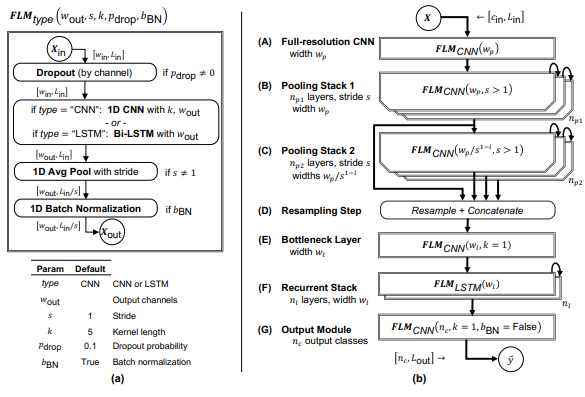

## Layers
1. (A) Full-Resolution CNN (s=1, t=cnn). High-resolution processing. Convolves CNN filters against the input signal without striding or pooling, in order to extract information at the finest available temporal resolution. This layer is computationally expensive because it is applied to the full resolution input signal (s is a stride ratio)
2. (B) Pooling Stack 1 (s>1, t=cnn). Downsamples from the input to the output frequency. 
3. (C) Pooling Stack 2 (s>1, t=cnn). Downsamples beyond the overall output frequency.
4. (D) Resampling Step. Matches output lengths.
5. (E) Bottleneck Layer. Reduces channel number
6. (F) Recurrent Stack (s=1, t=lstm). Temporal modeling
7. (G) Output Module (s=1, k=1, t=cnn). Provides predictions for each output time step

## Dataset benchmark
-  data processing steps employed by Ordóñez and Roggen [28]
- re-scale all data to have zero mean and unit standard deviation according to the statistics of the training set

## Performace Metrics
- Sample-based metrics are aggregated across all class predictions, and are not affected by the order of the predictions.
- Event-based metrics are calculated after the output is segmented into discrete events, and they are strongly affected by the order of the predictions
- F1 score for each output class
- mean F1
- weighted F1

## Ensembling
- m n-fold ensembling by (a) combining the training and validation sets  into a single contiguous set, (b) dividing that set into n disjoint folds of contiguous samples, (c) training n independent models where the ith model uses the ith fold for validation and the remaining
- n-1 folds for training, and (d) ensembling the n models together during inference by simply averaging their logit outputs before the softmax function is applied.

## Best Performance:
1. 4-fold ms-C/L n=10, stride ratio = 8, params k = 1,371
2. ms-C/L

## Result
- simple FilterNet architerture: p-CNN with the largset output:input stride ratio that can fully resolve the shortest events of interest

## References:
- sussexwearlab sussexwearlab/DeepConvLSTM Available online: https://github.com/sussexwearlab/DeepConvLSTM (accessed on Dec 9, 2019).
- Ordóñez, F.J.; Roggen, D. Deep Convolutional and LSTM Recurrent Neural Networks for Multimodal Wearable Activity Recognition. Sensors 2016, 16, 115


In [61]:
import os
print(os.getcwd())
print(os.path.join(os.getcwd()+"\..\data"))
print(os.path.exists(os.path.join(os.getcwd()+"\..\data1")))

C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\notebook
C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\notebook\..\data
False


# SKALIEREN VS NORMALISIEREN

# Create DataLoader object

In [94]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import math
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

'''
global variables for reading the dataset
'''
DIR = os.path.join(os.getcwd()+"\..\data")
if not os.path.exists(DIR):
    print("PROVIDE PATH TO FILE MANUALLY")

FILE_NAME = "q4_2017.xlsx" #rewrite: read file name from settings.py
PATH = os.path.join(DIR, FILE_NAME)
TRAIN_TEST_DATE='2017-09-30'

class BillingDataset(Dataset):
    '''
    create dataset from excel table based on the product number
    PS: products' names are converted into numbers from 0 to 9
    '''    
    def __init__(self, product=None, ttp='train', window=13):
        if product is None:
            self.PROD = 0 # Rewrite to cover all products
        else:
            self.PROD = product
            
        self.ttp = ttp
        self.window=window
        '''
        get dataset (excel-table) from folder
        '''
        df = pd.read_excel(PATH, index_col=None, header=1)
        df_ = self._df_perparation(df)
        
        #CHANGE TO COVER ALL PRODUCTS
#         self.x_, self.y_ = self._df_transformation(df_)
#         self.x = torch.from_numpy(self.x_.values.astype(np.double)).double()
#         self.y = torch.from_numpy(self.y_.values.astype(np.double)).double()
#         self.n_samples = self.x_.values.shape[0]
#         self.n_features = self.x_.values.shape[1]
        
        x_, y_ = self._df_transformation(df_)
        self.x = torch.from_numpy(x_.values.astype(np.double)).double()
        self.y = torch.from_numpy(y_.values.astype(np.double)).double()
        self.n_samples = x_.values.shape[0]
        self.n_features = x_.values.shape[1]
        
        
    def __getitem__(self, index):
        if len(self.x[index:index+self.window]) == self.window:
            return self.x[index:index+self.window], self.y[index:index+self.window]
        
    def __len__(self):
        return self.n_samples-self.window
        
    def _df_perparation(self, df_):
        '''
        rename columns, create a column with date in iso format, create unique indexes from products' names
        '''
        df = df_.copy()
        df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
        df['Billing'].loc[df['Billing'].isna()] = 0
        df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0
        products = df['Sp_number'].unique()
        prod2idx = {}
        idx2prod = {}
        for idx, prod in enumerate(products):
            if prod not in prod2idx:
                prod2idx[prod] = idx
                idx2prod[idx] = prod

        #Add column with integer product names

        products_int = []
        for idx, row in df['Sp_number'].iteritems():
            products_int.append(prod2idx[row])

        df['products'] = products_int
        
        mapper = {
            'products': 'product',
            'Fc_horizon': 'horizon',
            'Fc_and_order': 'forecast',
            'Billing': 'billing',
            "Due_date": "ddate",
            "Fc_date": "fdate"
        }
        df.rename(columns=mapper, inplace=True)
        df['isodate'] = df[['ddate']].apply(lambda x: dt.datetime.strptime(str(x['ddate'])+'-1',"%Y%W-%w"), axis=1)
        return df
    
    def _df_transformation(self, df_):
        df = df_.copy()
        if self.ttp == 'train' or self.ttp == 'test':
            idxs = df.loc[df['billing'] == 0].index
            train_test_date = TRAIN_TEST_DATE
        elif self.ttp == 'predict':
            idxs = df.loc[df['billing'] != 0].index
        
        df.drop(idxs, inplace=True)
        
        
        # CHANGE TO COVER ALL PRODUCTS
        # collect billings
        df_b = df[['isodate', 'billing']].loc[df['product'] == self.PROD].drop_duplicates(['isodate'])
        df_b.set_index(['isodate'], inplace=True)
        df_b.index = pd.DatetimeIndex(df_b.index).to_period('W')
        
        # collect forecast
        df1 = df.loc[df['product'] == self.PROD].copy()
        
        hors = df1.horizon.unique()
        dates = df1.isodate.unique()
        data = {}

        for date in dates:
            for h in hors:
                val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
                if not val:
                    val = [0]
                if h not in data:
                    data[h] = []
                data[h].append(val[0])
                
        df_ = pd.DataFrame(data, columns=data.keys(), index=dates)
        
        hors = df1.horizon.unique()
        dates = df1.isodate.unique()
        data = {}

        means = df_.T.mean()

        for date in dates:
            mean = means[date]
            for h in hors:
                val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
                if not val:
                    val = [mean]
                if h not in data:
                    data[h] = []
                data[h].append(val[0])
                
        df_ = pd.DataFrame(data, columns=data.keys(), index=dates)
        df_.index = pd.DatetimeIndex(df_.index).to_period('W')
        
        if self.ttp == 'train':
            return df_[train_test_date:], df_b[train_test_date:]
        elif self.ttp == 'test':
            return df_[:train_test_date], df_b[:train_test_date]
        else:
            return df_, df_b

# Filter Net architecture Programming
- 208 time series length (T) - 208 weeks
- 12 size of a Window (W) - quarter
- 6&3 size of intermediate time series (t)
- 6 Filters (F)
- 2 Depth
- 13 features
- 1 output

In [3]:
import torch.nn as nn
# from fastai.core import ifnone, listify
# from fastai.layers import bn_drop_lin, embedding, Flatten


def conv_layer(window, ks=3, dilation=1):
    return nn.Sequential(
        nn.Conv1d(1,1, kernel_size=ks, bias=False, dilation=dilation),
        nn.AdaptiveAvgPool1d(window),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)
    )

class FilterNet(nn.Module):
#     def __init__(self, emb_size, n_cont, out_sz, layers, emb_drop=0., window=12, filters=[1,2,3,4,5,6], y_range=None, ise_bn=False, ps=None, bn_final=False):
    def __init__(self, out_sz=4, emb_drop=0., window=12, filters=[1,2,3,4,5,6], y_range=None, ise_bn=False, ps=None, bn_final=False):
        super().__init__()
        self.c1a = conv_layer(window=window // 2, ks=1, dilation=1)
        self.c1b = conv_layer(window=window // 4, ks=1, dilation=2)
        self.c2a = conv_layer(window=window // 2, ks=2, dilation=1)
        self.c2b = conv_layer(window=window // 4, ks=2, dilation=2)
        self.c3a = conv_layer(window=window // 2, ks=3, dilation=1)
        self.c3b = conv_layer(window=window // 4, ks=3, dilation=2)
        self.c4a = conv_layer(window=window // 2, ks=4, dilation=1)
        self.c4b = conv_layer(window=window // 4, ks=4, dilation=2)
        self.c5a = conv_layer(window=window // 2, ks=5, dilation=1)
        self.c5b = conv_layer(window=window // 4, ks=5, dilation=2)
        self.c6a = conv_layer(window=window // 2, ks=6, dilation=1)
        self.c6b = conv_layer(window=window // 4, ks=6, dilation=2)
        
        num_wave_outputs = (len(filters) * (window // 2)) + (len(filters) * (window // 4))
        
#         # Fastai's Mixed Input model
#         ps = ifnone(ps, [0]*len(layers))
#         ps = listify(ps, layers)
#         self.embeds = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs])
#         self.emb_drop = nn.Dropout(emb_drop)
#         self.bn_cont = nn.BatchNorm1d(n_cont)
#         n_emb = sum(e.embedding_dim for e in self.embeds)
#         self.n_emb,self.n_cont,self.y_range = n_emb,n_cont,y_range
#         sizes = self.get_sizes(layers, out_sz)
#         actns = [nn.ReLU(inplace=True)] * (len(sizes)-2) + [None]
#         layers = []
#         for i,(n_in,n_out,dp,act) in enumerate(zip(sizes[:-2],sizes[1:-1],[0.]+ps,actns)):
#             layers += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
#         if bn_final: layers.append(nn.BatchNorm1d(sizes[-1]))
#         self.layers = nn.Sequential(*layers)

        # Final layer
#         self.f = Flatten()
        self.f = nn.Flatten()
        self.lin = nn.Linear(num_wave_outputs, out_sz, bias=False)

#         self.sizes = sizes
        self.num_wave_outputs = num_wave_outputs

#     def get_sizes(self, layers, out_sz):
#         return [self.n_emb + self.n_cont] + layers + [out_sz]
    
#     def forward(self, x_window, x_cat, x_cont):
    def forward(self, x_window, x_cat, x_cont):
        # TODO: Use the filters arg to generate the conv_layers dynamically
        # Wavenet model
        self.f1a = self.c1a(x_window)
        self.f1b = self.c1b(self.f1a)
        self.f2a = self.c2a(x_window)
        self.f2b = self.c2b(self.f2a)
        self.f3a = self.c3a(x_window)
        self.f3b = self.c3b(self.f3a)
        self.f4a = self.c4a(x_window)
        self.f4b = self.c4b(self.f4a)
        self.f5a = self.c5a(x_window)
        self.f5b = self.c5b(self.f5a)
        self.f6a = self.c6a(x_window)
        self.f6b = self.c6b(self.f6a)
        self.ffc = torch.cat([self.f1a, self.f1b, self.f2a, self.f2b,
                              self.f3a, self.f3b, self.f4a, self.f4b,
                              self.f5a, self.f5b, self.f6a, self.f6b, ], 2)

#         # Fastai's Mixed Input Model
#         if self.n_emb != 0:
#             x = [e(x_cat[:,i]) for i,e in enumerate(self.embeds)]
#             x = torch.cat(x, 1)
#             x = self.emb_drop(x)
#         if self.n_cont != 0:
#             x_cont = self.bn_cont(x_cont)
#             x = torch.cat([x, x_cont], 1) if self.n_emb != 0 else x_cont
# #         x = self.layers(x)
#         if self.y_range is not None:
#             x = (self.y_range[1]-self.y_range[0]) * torch.sigmoid(x) + self.y_range[0]

        # Combine results from both nets
        x = x.unsqueeze(1)
        self.fc = torch.cat([self.ffc, x], 2)
        self.flin = self.lin(self.f(self.fc))
        return self.flin

In [94]:
class MyFilterNet(nn.Module):
    def __init__(self, window=13, ks=3):
        super(MyFilterNet, self).__init__()
        self.conv1a = nn.Conv1d(13, 13, kernel_size=2, bias=False, dilation=1)
        self.bn1a = nn.BatchNorm1d(12)
        self.pool1a = nn.AdaptiveAvgPool1d(6)
        self.relu1a = nn.LeakyReLU(negative_slope=0.1, inplace=True)
        
        self.conv1b = nn.Conv1d(13, 13, kernel_size=1, bias=False, dilation=2)
        self.bn1b = nn.BatchNorm1d(6)
        self.pool1b = nn.MaxPool1d(1)
        self.relu1b = nn.LeakyReLU(negative_slope=0.1, inplace=True)
        
        self.f = nn.Flatten()
        self.lin = nn.Linear(6, 1)
    
    def forward(self, x):
        x = self.conv1a(x)
#         x = self.bn1a(x)
        x = self.relu1a(x)
        x = self.pool1a(x)
        x = self.conv1b(x)
#         x = self.bn1b(x)
        x = self.relu1b(x)
        x = self.pool1b(x)
        x = self.f(x)
        x = self.lin(x)
        return x

In [95]:
batch_size = 1


train_set = BillingDataset(ttp='train')
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=False)

test_set = BillingDataset(ttp='test')
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

predict_set = BillingDataset(ttp='predict')

In [85]:
train_set.x.shape

torch.Size([195, 13])

- train 2017-09-25/2017-10-01 len 195
- test 2017-12-25/2017-12-31 2017-12-25/2017-12-31 len 14
- predict len 13: predict.x - input for predictions; predict.y equals 0 weil keine Billings

In [74]:
model.parameters

<bound method Module.parameters of MyFilterNet(
  (conv1a): Conv1d(13, 13, kernel_size=(2,), stride=(1,), bias=False)
  (pool1a): AdaptiveAvgPool1d(output_size=6)
  (relu1a): LeakyReLU(negative_slope=0.1, inplace=True)
  (conv1b): Conv1d(13, 13, kernel_size=(1,), stride=(1,), dilation=(2,), bias=False)
  (pool1b): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (relu1b): LeakyReLU(negative_slope=0.1, inplace=True)
  (f): Flatten(start_dim=1, end_dim=-1)
  (lin): Linear(in_features=6, out_features=1, bias=True)
)>

In [99]:
#working
learning_rate = 0.001
num_epochs = 50
# model = FilterNet()
model = MyFilterNet()
model.double()
criterion = nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (forecast, billing) in enumerate(train_loader):
        # forward pass
        outputs = model(forecast)
#         print(outputs.shape, outputs)
        loss = criterion(outputs, billing)
        print(f"loss {loss}")
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: [{loss}]")

print("Finished training")

loss 80442075174.62456
loss 76683451949.55392
loss 69374478982.98535
loss 56480624424.094246
loss 55696419656.90788
loss 59369761959.17741
loss 55078595710.34779
loss 57635141145.41988
loss 54956418261.85853
loss 60134487863.30786
Epoch [1/50], Step [10/15], Loss: [60134487863.30786]
loss 69992593271.2203
loss 73281550721.05898
loss 62933789801.05668
loss 72477336265.3434
loss 70445067820.83899
loss 78786714789.01357
loss 75369613330.54697
loss 68573135399.27426
loss 55579144884.18434
loss 54865031606.40329
loss 58802484674.75574
loss 54445392116.05482
loss 57213668132.6977
loss 54468606271.526764
loss 59334423716.66729
Epoch [2/50], Step [10/15], Loss: [59334423716.66729]
loss 69293498903.6314
loss 72712138088.72403
loss 62181251250.09712
loss 71982571288.13814
loss 70100182812.37611
loss 78433760447.83168
loss 75003943641.2067
loss 68386984728.11787
loss 55437962459.683105
loss 54600878296.11471
loss 58600943988.09653
loss 54295407031.391815
loss 56803560629.40491
loss 54219563679.03

loss 5552796886.498966
loss 4074999953.1447906
loss 3447229484.979143
loss 4004728733.692218
Epoch [27/50], Step [10/15], Loss: [4004728733.692218]
loss 4237011312.623096
loss 3224368378.93188
loss 3094683592.183088
loss 5507237812.789038
loss 5559329329.651274
loss 4213371304.874591
loss 3435514920.0025187
loss 4520135782.994383
loss 6099558429.828269
loss 4658693112.421521
loss 1950397924.2878454
loss 5497354758.29135
loss 4174407170.1658573
loss 3480276895.7604723
loss 4105812415.731188
Epoch [28/50], Step [10/15], Loss: [4105812415.731188]
loss 4044802430.355697
loss 3200743445.772563
loss 3041928218.0832553
loss 5462113706.870693
loss 5331377900.230445
loss 4060944163.1655173
loss 3322705458.0118284
loss 4370192983.833358
loss 6180191581.3655205
loss 4513966420.859388
loss 1952866497.9098318
loss 5459819909.102105
loss 4261591005.950932
loss 3517076253.6303196
loss 4191711019.7464604
Epoch [29/50], Step [10/15], Loss: [4191711019.7464604]
loss 3903693465.036516
loss 3187809835.382

In [100]:
47573002.76013965 - 4380001632.128907

-4332428629.368768

In [71]:
conv1 = nn.Conv1d(13, 13, kernel_size=2, dilation=1)
bn1 = nn.BatchNorm1d(12)
pool1 = nn.AdaptiveAvgPool1d(6)
relu = nn.LeakyReLU(negative_slope=0.1, inplace=True)
conv2 = nn.Conv1d(13, 13, kernel_size=1, dilation=2)
pool2 = nn.MaxPool1d(1)
flat = nn.Flatten()
lin = nn.Linear(6,1)
conv1.double()
conv2.double()
lin.double()
bn1.double()
criterion = nn.MSELoss()
for i, (forecast, billing) in enumerate(train_loader):
#     forecast = forecast.view(-1, 4, 13)
#     print(i, forecast, forecast.shape)
    x = conv1(forecast)
    print(f'conv1 shape: {x.shape}, val: {x}')
    x = bn1(x)
    print(f'bn1 shape: {x.shape}, val: {x}')
    x = relu(x)
    print(f'relu shape: {x.shape}, val: {x}')
    x = pool1(x)
    print(f'pool shape: {x.shape}, val: {x}')
    x = conv2(x)
    print(f'conv2 shape: {x.shape}, val: {x}')
    x = relu(x)
    print(f'relu2 shape: {x.shape}, val: {x}')
    x = pool2(x)
    print(f'pool2 shape: {x.shape}, val: {x}')
    x = flat(x)
    print(f'flat shape: {x.shape}, val: {x}')
    x = lin(x)
    print(f'lin shape: {x.shape}, val: {x}')
    loss = criterion(x, billing)
    print(f'loss shape: {loss}, val: {loss.item()}')

conv1 shape: torch.Size([13, 12]), val: tensor([[-172414.0013, -143333.5949, -154662.7487, -145522.7895, -165297.9841,
         -146443.1816, -133796.1751, -130963.4998, -134787.2875, -128287.9064,
         -161150.3340, -128518.9904],
        [ 104669.3925,  125468.5342,  118088.6164,  124266.8576,  133786.0180,
          143071.5307,  157441.3265,  136848.0527,  169345.6111,  217143.5445,
          219557.7327,  163959.4942],
        [ 231737.4804,  230039.7239,  236626.2664,  223615.8127,  237106.6546,
          244573.9568,  253897.2386,  251773.6052,  283831.6355,  248612.7986,
          239482.5319,  234139.7431],
        [ 185649.0389,  156597.7066,  132781.8672,  138189.4854,  146840.6994,
          149390.6646,  171385.8557,  180473.4178,  188756.4276,  205675.9539,
          167418.1954,  174158.6518],
        [  -1667.2661,   28659.1843,   48224.0852,   33768.5914,   41741.3655,
           47672.1510,   44930.6838,   55382.3053,   63828.5345,   53753.1080,
           95559.4

In [40]:
for i, (forecast, billing) in enumerate(train_loader):
#     forecast = forecast.view(-1, 4, 13)
    print(i, billing, billing.shape)

0 tensor([[133000.],
        [329000.],
        [212000.],
        [245000.],
        [293000.],
        [302000.],
        [334000.],
        [341000.],
        [165000.],
        [232000.],
        [281000.],
        [332155.],
        [332155.]], dtype=torch.float64) torch.Size([13, 1])
1 tensor([[ 93000.],
        [323000.],
        [269000.],
        [282193.],
        [283000.],
        [343000.],
        [230000.],
        [266000.],
        [330000.],
        [222000.],
        [338000.],
        [301000.],
        [156000.]], dtype=torch.float64) torch.Size([13, 1])
2 tensor([[ 56000.],
        [226000.],
        [284000.],
        [278000.],
        [321000.],
        [298000.],
        [277000.],
        [275000.],
        [219000.],
        [205000.],
        [272000.],
        [215000.],
        [347000.]], dtype=torch.float64) torch.Size([13, 1])
3 tensor([[134000.],
        [409000.],
        [239000.],
        [220000.],
        [212000.],
        [156000.],
        [11

In [109]:
zz = []
with torch.no_grad():
    for forecast, billing in test_loader:
        try:
            outputs = model(forecast)
        
            print(f"outputs [{outputs}]")
            dff = billing - outputs
            print(f'diff [{dff}]')
            zz.append(outputs)
        except:
            pass

outputs [tensor([[168835.9640],
        [247802.5983],
        [253332.9313],
        [257661.0597],
        [246965.0832],
        [239988.9306],
        [265892.8698],
        [280358.5748],
        [252622.5699],
        [212566.0414],
        [281775.3707],
        [295486.8087],
        [230443.2958]], dtype=torch.float64)]
diff [tensor([[132164.0360],
        [-23802.5983],
        [ 26667.0687],
        [ 58338.9403],
        [-12965.0832],
        [ -5988.9306],
        [-19892.8698],
        [106641.4252],
        [-29622.5699],
        [ 10433.9586],
        [ 59224.6293],
        [-51486.8087],
        [ 18556.7042]], dtype=torch.float64)]


In [110]:
zz

[tensor([[168835.9640],
         [247802.5983],
         [253332.9313],
         [257661.0597],
         [246965.0832],
         [239988.9306],
         [265892.8698],
         [280358.5748],
         [252622.5699],
         [212566.0414],
         [281775.3707],
         [295486.8087],
         [230443.2958]], dtype=torch.float64)]

In [112]:
test_set.y

tensor([[301000.],
        [224000.],
        [280000.],
        [316000.],
        [234000.],
        [234000.],
        [246000.],
        [387000.],
        [223000.],
        [223000.],
        [341000.],
        [244000.],
        [249000.],
        [133000.]], dtype=torch.float64)

In [114]:
test_set.y[:13] - zz[0]

tensor([[132164.0360],
        [-23802.5983],
        [ 26667.0687],
        [ 58338.9403],
        [-12965.0832],
        [ -5988.9306],
        [-19892.8698],
        [106641.4252],
        [-29622.5699],
        [ 10433.9586],
        [ 59224.6293],
        [-51486.8087],
        [ 18556.7042]], dtype=torch.float64)

In [117]:
model(predict_set.x)

tensor([[128704.6723],
        [188218.6695],
        [195512.2947],
        [197807.6950],
        [188213.1969],
        [185516.2014],
        [204133.8966],
        [215888.7913],
        [194467.2224],
        [163568.6816],
        [218535.1709],
        [224803.7465],
        [178517.8794]], dtype=torch.float64, grad_fn=<AddmmBackward0>)

In [118]:
len(model(predict_set.x))

13

# 31.05.22

In [63]:
batch_size = 1


train_set = BillingDataset(ttp='train')
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=False)

test_set = BillingDataset(ttp='test')
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

predict_set = BillingDataset(ttp='predict')

In [70]:
import torch
import torch.nn as nn
from torch.nn.utils import weight_norm

class TCN(nn.Module):
    def __init__(self, batchsize=1, input_length=13, output_size=13):
        super(TCN, self).__init__()
        self.conv1 = nn.Conv1d(input_length, output_size, kernel_size=3, stride=1, dilation=1)
        self.weight1 = weight_norm(self.conv1, name='weight')
        self.relu1 = nn.LeakyReLU(negative_slope=0.1, inplace=True)
        self.drop1 = nn.Dropout(p=0.1)
        
        self.conv2 = nn.Conv1d(output_size, output_size, kernel_size=4, stride=1, dilation=1)
        self.weight2 = weight_norm(self.conv2, name='weight')
        self.relu2 = nn.LeakyReLU(negative_slope=0.1, inplace=True)
        self.drop2 = nn.Dropout(p=0.1)
        
        self.net = nn.Sequential(self.conv1, self.weight1, self.relu1, self.drop1, self.conv2, self.weight2, self.relu2, self.drop2)
        self.downsample = nn.Conv1d(input_length, output_size, 1) if input_length != output_size else None
        self.relu = nn.Relu()
        self.init_weights()
        
    def _init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)


class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [121]:
import torch
import torch.nn as nn
from torch.nn.utils import weight_norm


class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()


class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)


class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)
    
    
class TCN_(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout):
        super(TCN_, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size=kernel_size, dropout=dropout)
        self.linear = nn.Linear(num_channels[-1], output_size)
        self.init_weights()

    def init_weights(self):
        self.linear.weight.data.normal_(0, 0.01)

    def forward(self, x):
        y1 = self.tcn(x)
        return self.linear(y1[:, :, -1])

In [129]:
batchsize=1
input_length=13
output_size=13
#working
learning_rate = 0.001
num_epochs = 10
# model = FilterNet()
model = TCN_(input_length, output_size, [1,2], 2, 0.1)
model.double()
criterion = nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (forecast, billing) in enumerate(train_loader):
        # forward pass
        outputs = model(forecast)
#         print(outputs.shape, outputs)
        loss = criterion(outputs, billing)
        print(f"loss {loss}")
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: [{loss}]")

print("Finished training")

loss 78188345846.48213
loss 77491261182.54456
loss 77188100723.00163
loss 79300519283.3933
loss 80806515742.4164
loss 80360366776.84007
loss 82375292364.68266
loss 77880642033.8764
loss 74360473585.11455
loss 80648393076.23878
Epoch [1/10], Step [10/182], Loss: [80648393076.23878]
loss 80301164740.31143
loss 83031197757.89767
loss 81502445382.81758
loss 74826109115.98572
loss 74387312009.94038
loss 70271138122.82796
loss 70905261835.66733
loss 70664979731.14941
loss 72528050049.28941
loss 70187246030.6503
Epoch [1/10], Step [20/182], Loss: [70187246030.6503]
loss 72130535854.32799
loss 72363174266.94766
loss 67640180927.72952
loss 67076615940.36839
loss 64049460941.113434
loss 60718292037.20654
loss 67773938046.6379
loss 69057763986.93176
loss 77707738196.97803
loss 75881328450.39694
Epoch [1/10], Step [30/182], Loss: [75881328450.39694]
loss 74213371922.42073
loss 69737600290.53818
loss 64378021450.3501
loss 59263024758.39666
loss 58112089927.53726
loss 64074318564.54768
loss 61863500

loss 11620269639.927052
Epoch [2/10], Step [120/182], Loss: [11620269639.927052]
loss 13073701152.38293
loss 7167245651.952536
loss 13141754159.928047
loss 43391067934.80796
loss 6726627260.215543
loss 7983040270.2415
loss 7651491275.531398
loss 17066579550.929008
loss 7780656394.025415
loss 11458630931.039131
Epoch [2/10], Step [130/182], Loss: [11458630931.039131]
loss 24817684030.3675
loss 12590876822.817568
loss 11183975320.443417
loss 15397165039.868742
loss 4725684404.829357
loss 29834287926.237305
loss 6685353060.729217
loss 11467699546.56354
loss 7067667513.9508095
loss 6931092096.991168
Epoch [2/10], Step [140/182], Loss: [6931092096.991168]
loss 10271960317.592318
loss 6683534536.180055
loss 11279739462.820566
loss 6526587419.625516
loss 5374994514.669151
loss 33994993690.48206
loss 5429687139.603306
loss 3187688918.7780747
loss 6899432046.310544
loss 14063140643.370209
Epoch [2/10], Step [150/182], Loss: [14063140643.370209]
loss 3389972697.4004865
loss 3922719731.615901
los

loss 5590218435.963148
loss 12239375177.287952
loss 6896023085.026813
Epoch [4/10], Step [50/182], Loss: [6896023085.026813]
loss 5353832705.141278
loss 5725530708.287847
loss 5242710484.899639
loss 5929291038.527058
loss 6963871015.45097
loss 5070975265.071268
loss 3358368039.1392145
loss 4749113579.202037
loss 4412358130.475145
loss 4008748443.5632114
Epoch [4/10], Step [60/182], Loss: [4008748443.5632114]
loss 3370835056.784947
loss 6149124011.877386
loss 9599875428.814795
loss 1784053301.1718173
loss 1695819401.3205693
loss 28141258633.25607
loss 10683726867.5412
loss 10748891016.31113
loss 7171709120.081676
loss 12888780041.347624
Epoch [4/10], Step [70/182], Loss: [12888780041.347624]
loss 12561045268.8036
loss 8945185988.974066
loss 7404452383.06635
loss 10545707069.816683
loss 12804933067.101316
loss 7152271452.013147
loss 10896800601.081783
loss 12153920280.381468
loss 7732869842.23584
loss 23253780292.828983
Epoch [4/10], Step [80/182], Loss: [23253780292.828983]
loss 6214134

loss 8324810663.135358
Epoch [5/10], Step [170/182], Loss: [8324810663.135358]
loss 7637871025.584787
loss 7469829426.273668
loss 7470748314.933833
loss 8002954276.644523
loss 7523073254.84488
loss 11847101746.357931
loss 10641819454.297426
loss 7405558616.738505
loss 6946309435.479147
loss 5783574921.69675
Epoch [5/10], Step [180/182], Loss: [5783574921.69675]
loss 14087122175.647692
loss 9052705437.588257
loss 8294690787.62836
loss 5423332256.963042
loss 8527394153.082441
loss 13531867387.093756
loss 18546139900.743786
loss 11888341033.070448
loss 9854840099.804554
loss 5271344735.48906
loss 5327672828.10009
loss 5267966892.934846
Epoch [6/10], Step [10/182], Loss: [5267966892.934846]
loss 7270308770.20565
loss 7449242723.485422
loss 5894177850.207369
loss 5887247034.270433
loss 8124869658.116315
loss 7323681734.1616745
loss 10141513848.159454
loss 7595026279.603978
loss 8867100132.52938
loss 8979072322.497097
Epoch [6/10], Step [20/182], Loss: [8979072322.497097]
loss 6356674233.058

loss 4968903490.647001
loss 5293995571.457502
loss 5056272150.758495
loss 6451526204.500952
loss 4698557036.151922
loss 7928417439.406819
loss 8054104858.64718
Epoch [7/10], Step [120/182], Loss: [8054104858.64718]
loss 6987424051.354602
loss 9931236615.882498
loss 7748045881.252997
loss 7325852440.04768
loss 6563857956.607208
loss 7889376017.01773
loss 7648421385.406721
loss 6651459179.734594
loss 9352914088.962872
loss 6627746436.323933
Epoch [7/10], Step [130/182], Loss: [6627746436.323933]
loss 6644410627.963365
loss 7861942941.618736
loss 2516618599.632705
loss 2638955986.9284325
loss 3211220766.8035245
loss 4046864394.412053
loss 4420623795.830066
loss 4759708060.23401
loss 4325255163.5614
loss 5934734947.7598715
Epoch [7/10], Step [140/182], Loss: [5934734947.7598715]
loss 3776712842.371543
loss 4554238577.75056
loss 6870637059.125332
loss 7058241500.09004
loss 5261044951.301509
loss 4162002360.4293857
loss 4027914621.1011457
loss 3155969720.11742
loss 6726357691.734739
loss 445

loss 2487501830.2561655
loss 2091817796.0274637
loss 4106715887.9663014
loss 1875402105.5880442
loss 1866357457.628332
loss 5949542400.9222
loss 7204174428.207771
loss 7149110952.020115
loss 8889490566.257912
Epoch [9/10], Step [70/182], Loss: [8889490566.257912]
loss 7488676388.2020445
loss 7312466795.613673
loss 7552908420.334773
loss 6786601123.600176
loss 9465781076.52035
loss 7915044017.241068
loss 6815235377.58814
loss 7005622811.1453905
loss 7429050484.885287
loss 6611417311.99682
Epoch [9/10], Step [80/182], Loss: [6611417311.99682]
loss 4209192779.5581717
loss 2894929185.8339863
loss 3947696098.744925
loss 3660882241.238284
loss 2513433361.79791
loss 5033805849.544919
loss 3806674657.365043
loss 4036642022.9995494
loss 7959234617.005512
loss 4632890486.610451
Epoch [9/10], Step [90/182], Loss: [4632890486.610451]
loss 4853731563.631271
loss 5334312699.224655
loss 4276129498.0786257
loss 4531917270.325328
loss 3792328609.127453
loss 4307892295.575533
loss 3500254327.890044
loss

loss 2691723573.9352446
loss 3587598869.7593207
loss 3608430702.319083
loss 3837851700.117858
loss 5118125394.852611
Epoch [10/10], Step [170/182], Loss: [5118125394.852611]
loss 7270270435.006932
loss 6643396680.954974
loss 7016887595.759618
loss 8051143101.64479
loss 8065998604.828383
loss 7887530807.272016
loss 7448652796.578088
loss 7187345244.799501
loss 8809344798.333073
loss 5721527102.28991
Epoch [10/10], Step [180/182], Loss: [5721527102.28991]
loss 9352679118.956879
loss 9149355614.007708
Finished training


In [130]:
zz = []
with torch.no_grad():
    for forecast, billing in test_loader:
        outputs = model(forecast)
        
        print(f"outputs [{outputs}]")
        dff = billing - outputs
        print(f'diff [{dff}]')
        zz.append(outputs)

outputs [tensor([[228325.3657, 228686.6297, 227882.1593, 228344.9690, 227815.0556,
         228101.7247, 228285.1214, 228071.1456, 228893.0825, 228843.9543,
         228185.3204, 228939.6467, 228707.1475]], dtype=torch.float64)]
diff [tensor([[[ 72674.6343,  72313.3703,  73117.8407,  72655.0310,  73184.9444,
           72898.2753,  72714.8786,  72928.8544,  72106.9175,  72156.0457,
           72814.6796,  72060.3533,  72292.8525],
         [ -4325.3657,  -4686.6297,  -3882.1593,  -4344.9690,  -3815.0556,
           -4101.7247,  -4285.1214,  -4071.1456,  -4893.0825,  -4843.9543,
           -4185.3204,  -4939.6467,  -4707.1475],
         [ 51674.6343,  51313.3703,  52117.8407,  51655.0310,  52184.9444,
           51898.2753,  51714.8786,  51928.8544,  51106.9175,  51156.0457,
           51814.6796,  51060.3533,  51292.8525],
         [ 87674.6343,  87313.3703,  88117.8407,  87655.0310,  88184.9444,
           87898.2753,  87714.8786,  87928.8544,  87106.9175,  87156.0457,
           8781

In [134]:
predict_set.x.shape

torch.Size([13, 13])

In [135]:
predicts = model(predict_set.x.view(1,13,13))
predicts

tensor([[154128.7238, 154120.6510, 154140.5756, 154127.7113, 154142.1130,
         154136.5960, 154132.3850, 154136.3478, 154116.6049, 154119.3137,
         154132.5985, 154116.0254, 154122.5577]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)

In [131]:
zz[0]

tensor([[228325.3657, 228686.6297, 227882.1593, 228344.9690, 227815.0556,
         228101.7247, 228285.1214, 228071.1456, 228893.0825, 228843.9543,
         228185.3204, 228939.6467, 228707.1475]], dtype=torch.float64)

In [104]:
import matplotlib.pyplot as plt

plt(zz[0].numpy)

TypeError: 'module' object is not callable

In [106]:
type(zz[0])

torch.Tensor

In [107]:
zz[0]

tensor([[[219180.6121, 216747.7309, 228731.5213],
         [220963.2618, 218109.4041, 239414.5557],
         [244984.0610, 224828.8495, 240037.0470],
         [176610.3275, 196218.4975, 219782.9946],
         [     0.0000, 198499.5344, 214278.7286],
         [     0.0000, 204784.4839, 221203.7057],
         [225671.3618, 191461.9869, 206343.6400],
         [214521.7629, 210734.1815,      0.0000],
         [226584.2061, 222944.8587, 221513.5943],
         [219312.1877,      0.0000, 247378.6775],
         [230407.1274, 214531.3485, 233258.3240],
         [234017.0525, 220358.1464, 231878.4468],
         [187439.4504, 209119.4982, 235924.1935]]], dtype=torch.float64)

In [144]:
from sklearn.metrics import mean_absolute_error as mae

testpred = model(test_set.x[0:13].view(1,13,13))


tensor([[266757.6759, 266720.7877, 266805.8456, 266754.3448, 266813.5448,
         266785.3887, 266766.3411, 266787.2460, 266700.7601, 266708.5624,
         266773.0960, 266696.9267, 266722.6323]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)

In [149]:
testpred.T.shape

torch.Size([13, 1])

In [147]:
test_set.y[0:13].shape

torch.Size([13, 1])

In [165]:
predict_set.x.shape

torch.Size([13, 13])

In [166]:
pred = model(predict_set.x.view(1,13,13))
pred

tensor([[160409.6977, 160424.7391, 160393.0819, 160409.9656, 160390.3347,
         160403.1057, 160410.6330, 160400.9558, 160433.8728, 160433.3519,
         160404.5699, 160436.2495, 160427.8297]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)

In [167]:
pred.shape

torch.Size([1, 13])

In [151]:
mae(test_set.y[0:13].detach().numpy(), testpred.T.detach().numpy())

42156.67195661644

In [154]:
import matplotlib.pyplot as plt

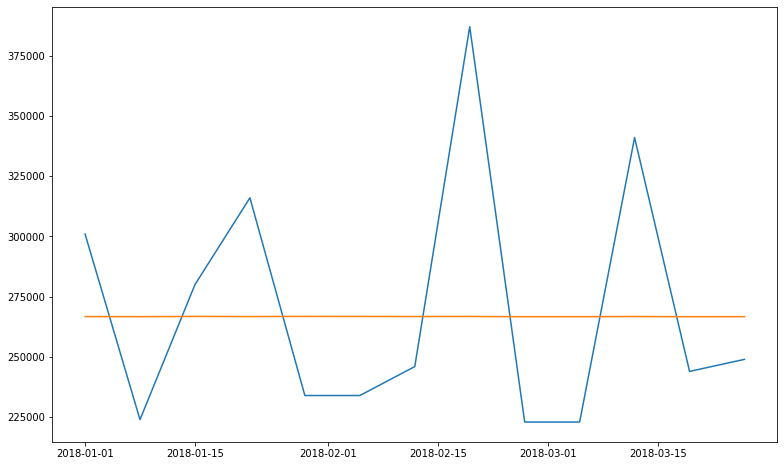

In [157]:
fig = plt.figure(figsize=(13,8))
t = np.arange(dt.datetime(2018,1,1), dt.datetime(2018,4,1), dt.timedelta(days=7)).astype(dt.datetime)
y1 = test_set.y[0:13].detach().numpy()
y2 = testpred.T.detach().numpy()

plt.plot(t, y1)
plt.plot(t, y2)

plt.show()

(13, 1)


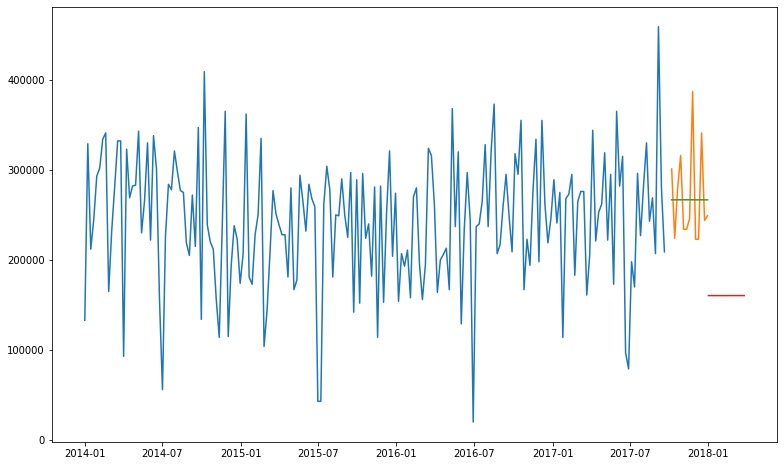

In [174]:
fig = plt.figure(figsize=(13,8))
t = np.arange(dt.datetime(2017,10,7), dt.datetime(2018,1,1), dt.timedelta(days=7)).astype(dt.datetime)
t0 = np.arange(dt.datetime(2014,1,1), dt.datetime(2017,9,21), dt.timedelta(days=7)).astype(dt.datetime)
tp = np.arange(dt.datetime(2018,1,1), dt.datetime(2018,4,1), dt.timedelta(days=7)).astype(dt.datetime)
y0 = train_set.y
y1 = test_set.y[0:13].detach().numpy()
y2 = testpred.T.detach().numpy()
y3 = pred.T.detach().numpy()
print(y3.shape)
plt.plot(t0, y0)
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(tp, y3)
plt.show()

# Normalize X data with MinMaxScale

In [221]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import math
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

'''
global variables for reading the dataset
'''
DIR = os.path.join(os.getcwd()+"\..\data")
if not os.path.exists(DIR):
    print("PROVIDE PATH TO FILE MANUALLY")

FILE_NAME = "q4_2017.xlsx" #rewrite: read file name from settings.py
PATH = os.path.join(DIR, FILE_NAME)
TRAIN_TEST_DATE='2017-09-30'

class BillingNormDataset(Dataset):
    '''
    create dataset from excel table based on the product number
    PS: products' names are converted into numbers from 0 to 9
    '''    
    def __init__(self, product=None, ttp='train', window=13):
        if product is None:
            self.PROD = 0 # Rewrite to cover all products
        else:
            self.PROD = product
        self.scaler = MinMaxScaler()
        self.ttp = ttp
        self.window=window
        '''
        get dataset (excel-table) from folder
        '''
        df = pd.read_excel(PATH, index_col=None, header=1)
        df_ = self._df_perparation(df)
        
        #CHANGE TO COVER ALL PRODUCTS
#         self.x_, self.y_ = self._df_transformation(df_)
#         self.x = torch.from_numpy(self.x_.values.astype(np.double)).double()
#         self.y = torch.from_numpy(self.y_.values.astype(np.double)).double()
#         self.n_samples = self.x_.values.shape[0]
#         self.n_features = self.x_.values.shape[1]
        
        x_, y_ = self._df_transformation(df_)
        self.x = torch.from_numpy(x_.values.astype(np.double)).double()
        self.y = torch.from_numpy(y_.values.astype(np.double)).double()
        self.n_samples = x_.values.shape[0]
        self.n_features = x_.values.shape[1]
        
        
    def __getitem__(self, index):
        if len(self.x[index:index+self.window]) == self.window:
            return self.x[index:index+self.window], self.y[index:index+self.window]
        
    def __len__(self):
        return self.n_samples-self.window
        
    def _df_perparation(self, df_):
        '''
        rename columns, create a column with date in iso format, create unique indexes from products' names
        '''
        df = df_.copy()
        df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
        df['Billing'].loc[df['Billing'].isna()] = 0
        df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0
        products = df['Sp_number'].unique()
        prod2idx = {}
        idx2prod = {}
        for idx, prod in enumerate(products):
            if prod not in prod2idx:
                prod2idx[prod] = idx
                idx2prod[idx] = prod

        #Add column with integer product names

        products_int = []
        for idx, row in df['Sp_number'].iteritems():
            products_int.append(prod2idx[row])

        df['products'] = products_int
        
        mapper = {
            'products': 'product',
            'Fc_horizon': 'horizon',
            'Fc_and_order': 'forecast',
            'Billing': 'billing',
            "Due_date": "ddate",
            "Fc_date": "fdate"
        }
        df.rename(columns=mapper, inplace=True)
        df['isodate'] = df[['ddate']].apply(lambda x: dt.datetime.strptime(str(x['ddate'])+'-1',"%Y%W-%w"), axis=1)
        return df
    
    def _df_transformation(self, df_):
        df = df_.copy()
        if self.ttp == 'train' or self.ttp == 'test':
            idxs = df.loc[df['billing'] == 0].index
            train_test_date = TRAIN_TEST_DATE
        elif self.ttp == 'predict':
            idxs = df.loc[df['billing'] != 0].index
        
        df.drop(idxs, inplace=True)
        
        
        # CHANGE TO COVER ALL PRODUCTS
        # collect billings
        df_b = df[['isodate', 'billing']].loc[df['product'] == self.PROD].drop_duplicates(['isodate'])
        df_b.set_index(['isodate'], inplace=True)
        df_b.index = pd.DatetimeIndex(df_b.index).to_period('W')
        
        # collect forecast
        df1 = df.loc[df['product'] == self.PROD].copy()
        
        hors = df1.horizon.unique()
        dates = df1.isodate.unique()
        data = {}

        for date in dates:
            for h in hors:
                val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
                if not val:
                    val = [0]
                if h not in data:
                    data[h] = []
                data[h].append(val[0])
                
        df_ = pd.DataFrame(data, columns=data.keys(), index=dates)
        
        hors = df1.horizon.unique()
        dates = df1.isodate.unique()
        data = {}

        means = df_.T.mean()

        for date in dates:
            mean = means[date]
            for h in hors:
                val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
                if not val:
                    val = [mean]
                if h not in data:
                    data[h] = []
                data[h].append(val[0])
                
        df_ = pd.DataFrame(data, columns=data.keys(), index=dates)
        df_.index = pd.DatetimeIndex(df_.index).to_period('W')
        df_[df_.columns] = self.scaler.fit_transform(df_[df_.columns])
        
        if self.ttp == 'train':
            return df_[train_test_date:], df_b[train_test_date:]
        elif self.ttp == 'test':
            return df_[:train_test_date], df_b[:train_test_date]
        else:
            return df_, df_b

In [199]:
batch_size = 1

train_set = BillingNormDataset(ttp='train')
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=False)

test_set = BillingNormDataset(ttp='test')
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

predict_set = BillingNormDataset(ttp='predict')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [205]:
test_set.x

tensor([[0.3508, 0.2845, 0.2719, 0.2925, 0.2849, 0.3010, 0.3338, 0.3561, 0.3199,
         0.3509, 0.3768, 0.3557, 0.2722],
        [0.4647, 0.4439, 0.4531, 0.4176, 0.4188, 0.4226, 0.4929, 0.5453, 0.3773,
         0.3981, 0.4039, 0.3814, 0.3514],
        [0.4685, 0.4429, 0.4387, 0.4201, 0.4226, 0.3893, 0.4999, 0.5805, 0.5356,
         0.5052, 0.6125, 0.5004, 0.4816],
        [0.4987, 0.4366, 0.4229, 0.4446, 0.4008, 0.3552, 0.4665, 0.5138, 0.4851,
         0.7803, 0.6434, 0.6719, 0.5467],
        [0.4082, 0.3798, 0.3671, 0.3709, 0.3832, 0.3411, 0.4255, 0.4248, 0.3811,
         0.4287, 0.4023, 0.3580, 0.5056],
        [0.2389, 0.2328, 0.2363, 0.2388, 0.2005, 0.1969, 0.2568, 0.1859, 0.1874,
         0.1536, 0.4396, 0.4595, 0.1365],
        [0.3654, 0.3610, 0.3958, 0.4289, 0.4168, 0.4153, 0.4532, 0.4370, 0.5461,
         0.5680, 0.6073, 0.6182, 0.5096],
        [0.4277, 0.4049, 0.4103, 0.3995, 0.4033, 0.3935, 0.4241, 0.4826, 0.4006,
         0.4658, 0.5381, 0.5581, 0.4661],
        [0.5016,

In [227]:
batchsize=1
input_length=13
output_size=13
#working
learning_rate = 0.001
num_epochs = 20
# model = FilterNet()
model = TCN_(input_length, output_size, [1,2,3], 2, 0.1)
model.double()
criterion = nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (forecast, billing) in enumerate(train_loader):
        # forward pass
        outputs = model(forecast)
#         print(outputs.shape, outputs)
        loss = criterion(outputs, billing)
        print(f"loss {loss}")
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: [{loss}]")

print("Finished training")

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss 78188722896.65904
loss 77493336856.29102
loss 77192412742.02989
loss 79301412361.59634
loss 80809710928.66748
loss 80366632923.55864
loss 82400863096.90132
loss 77888861146.08195
loss 74386936074.67186
loss 80669629199.42337
Epoch [1/20], Step [10/182], Loss: [80669629199.42337]
loss 80320397376.0608
loss 83034473763.22682
loss 81517092157.99858
loss 74902401260.97841
loss 74478323594.06725
loss 70381936532.23166
loss 71020013387.67632
loss 70839328602.66652
loss 72604866590.24835
loss 70386018920.65257
Epoch [1/20], Step [20/182], Loss: [70386018920.65257]
loss 72219018567.85529
loss 72593555405.18393
loss 67905939249.50554
loss 67347553110.7117
loss 64250628776.68587
loss 60837089012.62203
loss 68227319729.93261
loss 69367318774.19878
loss 78306164427.05824
loss 76495778567.227
Epoch [1/20], Step [30/182], Loss: [76495778567.227]
loss 74273931151.07784
loss 69804929808.8746
loss 64845851547.997734
loss 59943313187.42403
loss 58446695385.93555
loss 65005463729.746765
loss 6279007

loss 53546859232.807465
loss 55798584483.14651
Epoch [2/20], Step [120/182], Loss: [55798584483.14651]
loss 57152923344.66517
loss 59289977301.41198
loss 64075800619.792885
loss 66251529241.53393
loss 63748183570.136406
loss 70129651244.44148
loss 65549440785.73289
loss 67890961870.7252
loss 68879037351.6446
loss 68787830890.89078
Epoch [2/20], Step [130/182], Loss: [68787830890.89078]
loss 68978019430.40457
loss 72307265667.48335
loss 75764543816.47958
loss 78027962652.38571
loss 82320462337.92422
loss 76189889205.67714
loss 75694495137.86906
loss 70675336484.94472
loss 65875891545.68551
loss 71160441107.65523
Epoch [2/20], Step [140/182], Loss: [71160441107.65523]
loss 70554182497.94208
loss 75048059233.56224
loss 73634136629.49399
loss 72554135448.24991
loss 73849442990.4623
loss 72495230395.04723
loss 70269409435.61288
loss 66391807586.30938
loss 65246940472.619125
loss 66946396227.42184
Epoch [2/20], Step [150/182], Loss: [66946396227.42184]
loss 69783776368.32443
loss 70575621673

loss 50686458015.89277
Epoch [4/20], Step [60/182], Loss: [50686458015.89277]
loss 48701882376.44693
loss 53271341721.916756
loss 55816303309.46924
loss 58663665526.86081
loss 58284139212.01408
loss 58596775761.75269
loss 54347763658.942055
loss 50489535630.400665
loss 51774451577.52727
loss 56359425815.56641
Epoch [4/20], Step [70/182], Loss: [56359425815.56641]
loss 56274732930.57475
loss 56648255498.28354
loss 59019277377.27497
loss 57138963661.91582
loss 58206168541.830574
loss 58875738135.08062
loss 56564319113.55348
loss 57823798471.03599
loss 54215103783.32426
loss 60500460083.605865
Epoch [4/20], Step [80/182], Loss: [60500460083.605865]
loss 62132741204.44118
loss 63594167139.108955
loss 60342767221.60484
loss 58827613721.992744
loss 58856574975.98637
loss 60121603707.5462
loss 56352354470.17087
loss 56001257658.366425
loss 52994660582.34604
loss 53986437617.15076
Epoch [4/20], Step [90/182], Loss: [53986437617.15076]
loss 55124994660.07942
loss 56774926446.87843
loss 56126430

loss 79289923533.11263
loss 80796498861.91977
loss 80343204632.31682
loss 82374087307.94586
loss 77869724852.69325
loss 74364227703.2517
loss 80645755564.61812
Epoch [6/20], Step [10/182], Loss: [80645755564.61812]
loss 80297223801.80443
loss 83007084542.63345
loss 81489860196.79051
loss 74876422727.85658
loss 74452548590.74207
loss 70360311813.88234
loss 70994709834.48717
loss 70820636290.54907
loss 72590253732.54073
loss 70373253730.81749
Epoch [6/20], Step [20/182], Loss: [70373253730.81749]
loss 72193146784.01825
loss 72567543578.18607
loss 67883467010.62053
loss 67322391680.90662
loss 64237936613.567215
loss 60818964161.64741
loss 68204589139.9677
loss 69340966404.22426
loss 78282338158.00943
loss 76472188526.89296
Epoch [6/20], Step [30/182], Loss: [76472188526.89296]
loss 74254162867.28627
loss 69782044566.93208
loss 64820504446.48898
loss 59919198601.423
loss 58422820826.02211
loss 64980350306.84013
loss 62768447029.53169
loss 59970182737.77681
loss 60777376211.68289
loss 55338

loss 59260330547.12551
loss 57528734670.996
loss 62448707768.908264
loss 61857085944.03722
loss 63143430253.0282
loss 61853959345.69017
loss 58753373887.926506
loss 53507270492.88001
loss 55776486557.253815
Epoch [7/20], Step [120/182], Loss: [55776486557.253815]
loss 57135730439.23731
loss 59247729778.754486
loss 64054417223.124725
loss 66218702543.28772
loss 63703656317.745514
loss 70088823529.90181
loss 65503830702.68225
loss 67844586318.1241
loss 68844768928.18488
loss 68740958340.66522
Epoch [7/20], Step [130/182], Loss: [68740958340.66522]
loss 68930399701.38121
loss 72282569275.46094
loss 75713536559.91806
loss 77983277024.1687
loss 82266901842.00423
loss 76138826873.76451
loss 75658742691.12436
loss 70626135768.56633
loss 65855189599.88113
loss 71133516609.10896
Epoch [7/20], Step [140/182], Loss: [71133516609.10896]
loss 70511585251.01355
loss 75003287296.26791
loss 73590851247.79146
loss 72503744749.39468
loss 73805499751.01176
loss 72444324301.19083
loss 70218583978.71542
lo

loss 53428120575.74376
loss 54438109187.80314
loss 56526248985.40202
loss 57204800441.85738
loss 51125903667.36487
loss 51124891847.271545
loss 54851903770.535576
loss 52990039539.95451
loss 50630912700.29043
Epoch [9/20], Step [60/182], Loss: [50630912700.29043]
loss 48638473122.15551
loss 53241571616.27184
loss 55747045471.79535
loss 58599572478.182465
loss 58253402806.15824
loss 58525568055.52903
loss 54317143160.203186
loss 50489217489.911804
loss 51738640727.05155
loss 56293074534.8312
Epoch [9/20], Step [70/182], Loss: [56293074534.8312]
loss 56207182442.46098
loss 56581487437.64554
loss 58961795067.843124
loss 57109939955.903496
loss 58137971527.77804
loss 58804778542.094475
loss 56540924730.49861
loss 57755650848.4115
loss 54149603996.15502
loss 60467322851.87854
Epoch [9/20], Step [80/182], Loss: [60467322851.87854]
loss 62094973784.67765
loss 63515912424.8224
loss 60268667021.28805
loss 58755393230.33619
loss 58824398953.56757
loss 60048458788.424095
loss 56282294734.05758
lo

loss 65641555827.105354
loss 58710917730.74908
Epoch [10/20], Step [180/182], Loss: [58710917730.74908]
loss 68773833892.87585
loss 67174693694.49327
loss 78066017628.6828
loss 77354590830.58534
loss 77074707052.04832
loss 79160243874.07744
loss 80666853099.70573
loss 80223963111.84605
loss 82256335104.0392
loss 77874800263.20425
loss 74269749284.8233
loss 80525033589.14116
Epoch [11/20], Step [10/182], Loss: [80525033589.14116]
loss 80175994868.7782
loss 82964922950.72398
loss 81392050201.02498
loss 74763450662.65733
loss 74340666905.54523
loss 70248010555.61392
loss 70904995134.90736
loss 70704558351.98558
loss 72485367684.08162
loss 70251129160.34491
Epoch [11/20], Step [20/182], Loss: [70251129160.34491]
loss 72142881053.88556
loss 72475373048.22173
loss 67791443321.712845
loss 67233345272.58024
loss 64188691859.087906
loss 60728565778.49881
loss 68128131812.62269
loss 69229043142.36734
loss 78221497734.12259
loss 76351424515.8742
Epoch [11/20], Step [30/182], Loss: [76351424515.87

loss 54101902431.70102
loss 54103011810.59947
Epoch [12/20], Step [110/182], Loss: [54103011810.59947]
loss 54327206237.51787
loss 59108381371.18001
loss 57479369805.7932
loss 62397305606.2352
loss 61724669381.98299
loss 63009270507.668175
loss 61720871882.770515
loss 58646576906.738235
loss 53408827095.788795
loss 55682717426.8343
Epoch [12/20], Step [120/182], Loss: [55682717426.8343]
loss 57009189357.671555
loss 59120286577.78631
loss 63995176835.49071
loss 66070398106.18905
loss 63623065995.52936
loss 70040773267.53136
loss 65368959442.557
loss 67802435688.34827
loss 68789606063.85638
loss 68600965295.7969
Epoch [12/20], Step [130/182], Loss: [68600965295.7969]
loss 68790095196.7023
loss 72108195976.48807
loss 75593597509.32732
loss 77849136202.97878
loss 82136662708.85486
loss 76018538709.94821
loss 75521058162.75374
loss 70480092183.66534
loss 65740376457.13429
loss 70989971660.97055
Epoch [12/20], Step [140/182], Loss: [70989971660.97055]
loss 70357275786.70163
loss 74873002109.

loss 60628882513.27032
loss 55133451469.37469
Epoch [14/20], Step [40/182], Loss: [55133451469.37469]
loss 56110324427.085594
loss 46521830485.124756
loss 52198272848.851715
loss 51098134421.144325
loss 49946241503.947014
loss 52069833320.790146
loss 55978405108.879555
loss 60067915267.32896
loss 50702856513.55415
loss 51279420065.887825
Epoch [14/20], Step [50/182], Loss: [51279420065.887825]
loss 51741990034.9956
loss 53287796290.184204
loss 54306615541.56427
loss 56331105239.91175
loss 57141909394.202705
loss 50960894221.06766
loss 50960694064.93007
loss 54897524745.17161
loss 52831687292.72369
loss 50466813063.7274
Epoch [14/20], Step [60/182], Loss: [50466813063.7274]
loss 48551050673.48641
loss 53042921439.34458
loss 55580857936.15542
loss 58418822502.202255
loss 58042007734.93963
loss 58470579421.00698
loss 54118888891.1694
loss 50307640249.52548
loss 51588529978.56903
loss 56134342008.37923
Epoch [14/20], Step [70/182], Loss: [56134342008.37923]
loss 56114711398.14296
loss 5642

loss 67974665275.65731
loss 66148180206.22829
loss 66035033363.22587
loss 65714604039.83789
loss 70549897978.45428
loss 70905348500.44208
loss 72575016855.8727
loss 71361184225.24739
Epoch [15/20], Step [170/182], Loss: [71361184225.24739]
loss 68592328044.53645
loss 62468217933.80415
loss 61088464459.19145
loss 62750466564.03637
loss 61437346350.15542
loss 59730441372.41541
loss 64304502989.64388
loss 62306553978.271614
loss 65411201112.68194
loss 58624053948.3076
Epoch [15/20], Step [180/182], Loss: [58624053948.3076]
loss 68700431536.06315
loss 67123744285.57799
loss 77868839760.29239
loss 77170079482.31017
loss 76876245740.00107
loss 78980936917.59996
loss 80426083256.94571
loss 79983726815.26923
loss 82013185835.30429
loss 77569022019.4112
loss 74189518448.04678
loss 80334112906.02367
Epoch [16/20], Step [10/182], Loss: [80334112906.02367]
loss 80051821261.28474
loss 82906889014.35251
loss 81183934092.5802
loss 74585139466.84592
loss 74110620901.711
loss 70129702790.43652
loss 708

loss 77802428605.9077
loss 75996682339.51646
Epoch [19/20], Step [30/182], Loss: [75996682339.51646]
loss 73776905153.35718
loss 69328864790.42525
loss 64390728860.89157
loss 59434710316.4234
loss 58018408042.05669
loss 64636115581.80626
loss 62277252393.12233
loss 59573204124.38126
loss 60291238950.986595
loss 54874967560.965096
Epoch [19/20], Step [40/182], Loss: [54874967560.965096]
loss 56084644020.36539
loss 46523612153.713806
loss 51942894956.75555
loss 50746193884.60341
loss 49816235045.643684
loss 51711672360.09918
loss 55572990910.52885
loss 59791050832.84345
loss 50488400283.119965
loss 50991683942.64455
Epoch [19/20], Step [50/182], Loss: [50991683942.64455]
loss 51453778576.12108
loss 53134572654.40086
loss 54277582465.769325
loss 56334090283.38822
loss 56830573073.96374
loss 50771874256.557365
loss 50774851487.69635
loss 54410519649.913345
loss 52567223674.450966
loss 50432580616.87821
Epoch [19/20], Step [60/182], Loss: [50432580616.87821]
loss 48677332571.68436
loss 5285

loss 71795881797.06992
loss 69876383386.71542
loss 65918544362.78051
loss 64584034567.67722
loss 66364970317.28107
Epoch [20/20], Step [150/182], Loss: [66364970317.28107]
loss 69196172321.27423
loss 70204850563.2836
loss 64265367734.644035
loss 66381915048.481575
loss 62461890341.96792
loss 63037940231.567635
loss 61354133840.53772
loss 60066417316.83699
loss 63037259740.30709
loss 62026044370.19794
Epoch [20/20], Step [160/182], Loss: [62026044370.19794]
loss 61040996055.67371
loss 65290385894.976295
loss 67683783806.75
loss 65650373560.47624
loss 65971940018.66977
loss 65693200150.48612
loss 70202500952.72136
loss 70552718657.82686
loss 72222688055.97922
loss 70965431876.44125
Epoch [20/20], Step [170/182], Loss: [70965431876.44125]
loss 68207292260.97701
loss 62245844627.43137
loss 60626614905.12116
loss 62433050454.55962
loss 61123383319.85201
loss 59420143690.41901
loss 63982807401.42636
loss 62029977033.6693
loss 65084570812.66042
loss 58456934366.70889
Epoch [20/20], Step [180/

In [239]:
zz = []
with torch.no_grad():
    for forecast, billing in test_loader:
        outputs = model(forecast)
        
        print(f"outputs [{outputs}]")
        dff = billing - outputs
        print(f'diff [{dff}]')
        zz.append(outputs)

outputs [tensor([[280487.8773, 280487.8411, 280487.8712, 280487.7235, 280487.7381,
         280487.8955, 280487.7318, 280487.5770, 280487.6783, 280487.5343,
         280487.8048, 280487.9081, 280487.7517]], dtype=torch.float64)]
diff [tensor([[[ 20512.1227,  20512.1589,  20512.1288,  20512.2765,  20512.2619,
           20512.1045,  20512.2682,  20512.4230,  20512.3217,  20512.4657,
           20512.1952,  20512.0919,  20512.2483],
         [-56487.8773, -56487.8411, -56487.8712, -56487.7235, -56487.7381,
          -56487.8955, -56487.7318, -56487.5770, -56487.6783, -56487.5343,
          -56487.8048, -56487.9081, -56487.7517],
         [  -487.8773,   -487.8411,   -487.8712,   -487.7235,   -487.7381,
            -487.8955,   -487.7318,   -487.5770,   -487.6783,   -487.5343,
            -487.8048,   -487.9081,   -487.7517],
         [ 35512.1227,  35512.1589,  35512.1288,  35512.2765,  35512.2619,
           35512.1045,  35512.2682,  35512.4230,  35512.3217,  35512.4657,
           3551

In [240]:
testpred = model(test_set.x[0:13].view(1,13,13))
mae_ = mae(test_set.y[0:13].detach().numpy(), testpred.T.detach().numpy())
print(testpred, mae_)

tensor([[113975.0353, 113997.2134, 113981.7670, 114001.6535, 113991.9198,
         113973.4751, 113987.7973, 114011.4932, 114001.0609, 113984.5158,
         113960.0727, 113976.3002, 113994.8150]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>) 917358.683151064


In [241]:
772848.8802113353 - 917358.683151064

-144509.80293972872

In [242]:
pred = model(predict_set.x.view(1,13,13))
pred

tensor([[280487.8773, 280487.8411, 280487.8712, 280487.7235, 280487.7381,
         280487.8955, 280487.7318, 280487.5770, 280487.6783, 280487.5343,
         280487.8048, 280487.9081, 280487.7517]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)

(13, 1)


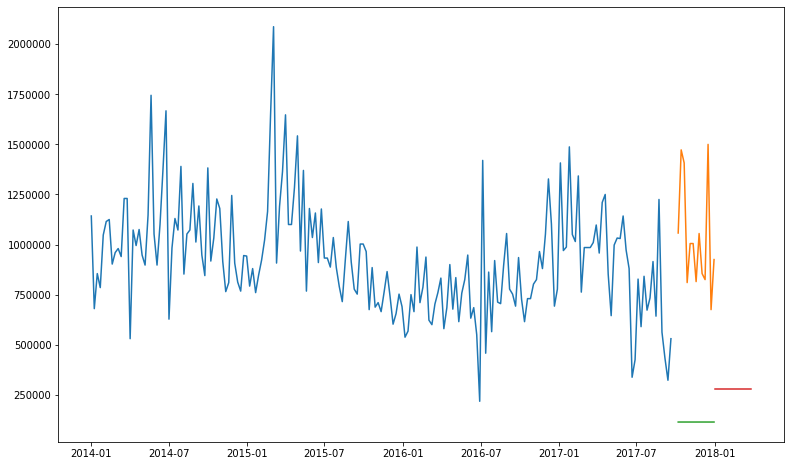

In [243]:
fig = plt.figure(figsize=(13,8))
t = np.arange(dt.datetime(2017,10,7), dt.datetime(2018,1,1), dt.timedelta(days=7)).astype(dt.datetime)
t0 = np.arange(dt.datetime(2014,1,1), dt.datetime(2017,9,21), dt.timedelta(days=7)).astype(dt.datetime)
tp = np.arange(dt.datetime(2018,1,1), dt.datetime(2018,4,1), dt.timedelta(days=7)).astype(dt.datetime)
y0 = train_set.y
y1 = test_set.y[0:13].detach().numpy()
y2 = testpred.T.detach().numpy()
y3 = pred.T.detach().numpy()
print(y3.shape)
plt.plot(t0, y0)
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(tp, y3)
plt.show()

# Loop over products and normalize

In [215]:
products = list(range(0,10))
print(products)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [216]:
batch_size = 1

trains = []
tests = []
predictions = []

for prod in products:
    train_set = BillingNormDataset(product=prod, ttp='train')
    test_set = BillingNormDataset(product=prod, ttp='test')
    predict_set = BillingNormDataset(product=prod, ttp='predict')
    trains.append(train_set)
    tests.append(test_set)
    predictions.append(predict_set)
    print(prod)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [230]:
trains_loaders = [DataLoader(dataset=x, batch_size=batch_size, shuffle=False) for x in trains]
tests_loaders = [DataLoader(dataset=x, batch_size=batch_size, shuffle=False) for x in tests]

In [ ]:
model = TCN_(input_length, output_size, [1,2], 2, 0.1)
model.double()

In [282]:
def train_TCN(model, dataloader, input_length=13, output_size=13, learning_rate=0.01, num_epochs=30, criterion = nn.MSELoss()):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    n_total_steps = len(dataloader)
    for epoch in range(num_epochs):
        for i, (forecast, billing) in enumerate(dataloader):
            # forward pass
            outputs = model(forecast)
            loss = criterion(outputs, billing)
#             print(f"loss {loss}")
            # backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1)%10 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: [{loss}]")

    print("Finished training")

In [238]:
train_TCN(model, trains_loaders[0])

tensor([[179723.2415, 179719.3683, 179722.7649, 179719.3660, 179721.0167,
         179724.2049, 179721.9828, 179719.1478, 179718.9916, 179721.8782,
         179724.4516, 179723.3064, 179721.6828]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 12849654316.478115
tensor([[277111.0571, 277110.7186, 277112.0433, 277111.3168, 277111.4172,
         277112.2311, 277111.8082, 277112.9308, 277110.4278, 277109.8329,
         277108.6804, 277111.6022, 277113.2630]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5440671803.480911
tensor([[240408.9408, 240408.8282, 240409.8472, 240409.4753, 240409.4823,
         240409.9321, 240409.7980, 240411.0597, 240408.7353, 240408.2293,
         240406.8382, 240409.3979, 240411.0909]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6081167793.199953
tensor([[144125.4550, 144084.2074, 144113.4928, 144077.5997, 144095.5108,
         144128.6992, 144103.4402, 144061.3569, 144078.4804, 144111.0044,
         144153.0151, 1441

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



loss 6551196629.596839
tensor([[281723.2022, 281722.9821, 281724.2121, 281723.5849, 281723.6331,
         281724.3556, 281723.9967, 281725.2160, 281722.6977, 281722.0074,
         281720.7662, 281723.7512, 281725.4740]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6311048364.651022
tensor([[281627.9354, 281627.7238, 281628.9457, 281628.3268, 281628.3715,
         281629.0860, 281628.7328, 281629.9580, 281627.4413, 281626.7463,
         281625.4991, 281628.4838, 281630.2095]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6616431638.827817
tensor([[281492.2985, 281492.0958, 281493.3091, 281492.6991, 281492.7400,
         281493.4460, 281493.0991, 281494.3307, 281491.8153, 281491.1155,
         281489.8617, 281492.8462, 281494.5753]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5723042786.6866045
tensor([[281335.2047, 281335.0110, 281336.2157, 281335.6148, 281335.6519,
         281336.3491, 281336.0085, 281337.2466, 281334.7328, 281334.0280,
  

       grad_fn=<AddmmBackward0>)
loss 6654704786.7733135
tensor([[119239.9396, 119206.0905, 119230.0979, 119200.7842, 119215.4805,
         119242.5598, 119221.9950, 119187.5628, 119201.5701, 119228.4812,
         119262.7175, 119238.0235, 119211.6277]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 13164677539.62463
Epoch [1/30], Step [60/182], Loss: [13164677539.62463]
tensor([[277757.9412, 277757.5221, 277758.8278, 277758.0555, 277758.1928,
         277759.0405, 277758.5750, 277759.5043, 277757.2273, 277756.7493,
         277755.7975, 277758.4448, 277759.8969]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7063948632.87614
tensor([[227743.0472, 227745.6269, 227744.6561, 227746.7122, 227745.5513,
         227743.7369, 227745.3318, 227749.2898, 227745.9958, 227743.5130,
         227739.3756, 227743.5999, 227747.3196]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2101239355.992203
tensor([[185505.2769, 185501.1545, 185504.6955, 185501.0733, 185

tensor([[276533.1208, 276532.7453, 276533.9853, 276533.2630, 276533.3826,
         276534.1799, 276533.7457, 276534.6702, 276532.4615, 276531.9748,
         276531.0302, 276533.6094, 276535.0313]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7036898776.59891
tensor([[90451.7784, 90477.4873, 90459.8801, 90482.7168, 90471.5126, 90450.3578,
         90466.8489, 90494.7118, 90481.8752, 90462.1863, 90433.6018, 90453.3566,
         90475.4431]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 23353656767.544796
tensor([[276365.6219, 276365.2592, 276366.4874, 276365.7776, 276365.8917,
         276366.6771, 276366.2516, 276367.1858, 276364.9781, 276364.4836,
         276363.5291, 276366.1098, 276367.5372]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6021942108.494598
tensor([[237892.7051, 237893.8499, 237893.8881, 237894.6550, 237894.1179,
         237893.5020, 237894.1658, 237896.5993, 237893.9618, 237892.5514,
         237889.9820, 237893.1848, 237895.7125]

       grad_fn=<AddmmBackward0>)
loss 8078542824.50815
tensor([[230019.1165, 230019.2237, 230019.9297, 230019.8288, 230019.7448,
         230019.9211, 230019.9723, 230021.2617, 230019.2168, 230018.6914,
         230017.2580, 230019.5014, 230021.1025]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7478115277.329276
tensor([[230985.5781, 230987.0424, 230986.8052, 230987.8861, 230987.2118,
         230986.2964, 230987.1855, 230989.8965, 230987.2314, 230985.6332,
         230982.7708, 230986.0463, 230988.7560]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6630253373.456189
tensor([[233481.8821, 233483.9614, 233483.3033, 233484.9115, 233483.9694,
         233482.5689, 233483.8295, 233487.1876, 233484.2300, 233482.1318,
         233478.6247, 233482.3930, 233485.6103]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8092145888.842522
tensor([[272919.0924, 272919.6039, 272920.1743, 272920.2504, 272919.9861,
         272920.0382, 272920.1678, 272921.9543

       grad_fn=<AddmmBackward0>)
loss 3417789427.6872
tensor([[236723.4995, 236724.9408, 236724.7057, 236725.7560, 236725.0918,
         236724.2058, 236725.0634, 236727.7138, 236725.1070, 236723.5150,
         236720.7299, 236723.9637, 236726.6099]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3360101078.1241493
tensor([[222206.9255, 222210.9602, 222208.8681, 222212.2437, 222210.4530,
         222207.4043, 222209.9287, 222215.2694, 222211.5732, 222208.0430,
         222202.5080, 222207.5094, 222212.2284]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2900497727.026812
tensor([[4259.0317, 4258.2491, 4258.7878, 4258.8429, 4259.1693, 4258.9918,
         4259.3993, 4259.3426, 4259.1152, 4260.8540, 4260.1526, 4258.7999,
         4258.9767]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 61611579014.09377
tensor([[87518.6040, 87520.6124, 87519.4827, 87521.6372, 87520.7413, 87518.6988,
         87520.5049, 87523.5044, 87521.5221, 87520.5019, 87516.9525, 875

       grad_fn=<AddmmBackward0>)
loss 4996415033.503806
tensor([[279473.9833, 279474.1553, 279474.9034, 279474.6885, 279474.5725,
         279474.8896, 279474.7972, 279476.1275, 279473.9539, 279473.1054,
         279471.7678, 279474.4528, 279476.1032]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5269360187.356568
tensor([[139512.0167, 139552.2937, 139524.6444, 139560.0299, 139542.4843,
         139509.7681, 139535.1086, 139578.2308, 139558.6220, 139527.1981,
         139483.3785, 139514.5609, 139548.5707]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 22085177801.31387
tensor([[279790.4559, 279790.6309, 279791.3752, 279791.1629, 279791.0456,
         279791.3603, 279791.2691, 279792.5994, 279790.4292, 279789.5788,
         279788.2419, 279790.9250, 279792.5738]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4961651585.924213
tensor([[237213.3007, 237213.9665, 237214.2326, 237214.6206, 237214.2938,
         237214.0156, 237214.3983, 237216.181

       grad_fn=<AddmmBackward0>)
loss 9954262061.25008
tensor([[283066.5318, 283066.6433, 283067.4025, 283067.1394, 283067.0499,
         283067.4092, 283067.2751, 283068.4905, 283066.4278, 283065.6418,
         283064.4274, 283066.9845, 283068.5186]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11110246635.069454
Epoch [2/30], Step [40/182], Loss: [11110246635.069454]
tensor([[283063.4917, 283063.6034, 283064.3614, 283064.0990, 283064.0093,
         283064.3680, 283064.2342, 283065.4484, 283063.3881, 283062.6027,
         283061.3896, 283063.9439, 283065.4763]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10315622018.33816
tensor([[231016.6235, 231019.5046, 231018.1743, 231020.5374, 231019.2479,
         231017.1340, 231018.9233, 231022.9734, 231019.9246, 231017.3059,
         231013.0919, 231017.1237, 231020.7961]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4355882958.897537
tensor([[282928.5531, 282928.6760, 282929.4238, 282929.1721, 28

       grad_fn=<AddmmBackward0>)
loss 9749914671.14424
tensor([[4316.1851, 4315.3961, 4315.9387, 4315.9930, 4316.3189, 4316.1423,
         4316.5492, 4316.4865, 4316.2630, 4318.0187, 4317.3167, 4315.9539,
         4316.1224]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 56278854273.02249
tensor([[185593.1494, 185593.3890, 185593.7426, 185593.9806, 185593.8447,
         185593.6542, 185593.9818, 185595.1799, 185593.6151, 185593.3785,
         185591.9164, 185593.3798, 185594.7543]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8781876854.844383
tensor([[237886.9772, 237887.4187, 237887.7831, 237887.9914, 237887.7636,
         237887.6454, 237887.8913, 237889.3528, 237887.4458, 237886.7093,
         237885.1291, 237887.3347, 237888.9784]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6954691656.745375
tensor([[278489.8160, 278490.4390, 278490.7943, 278491.0012, 278490.6912,
         278490.6092, 278490.8069, 278492.4980, 278490.3153, 278489.1713,
     

       grad_fn=<AddmmBackward0>)
loss 2733718590.373928
tensor([[278715.9697, 278716.4353, 278716.8782, 278716.9520, 278716.7110,
         278716.7499, 278716.8488, 278718.3400, 278716.2868, 278715.2786,
         278713.7872, 278716.4079, 278718.1060]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6127164654.527601
tensor([[233342.2024, 233342.6277, 233342.9699, 233343.1868, 233342.9667,
         233342.8346, 233343.0882, 233344.4965, 233342.6718, 233341.9899,
         233340.4537, 233342.5396, 233344.1197]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3310144810.5903587
tensor([[278569.5018, 278569.9519, 278570.4036, 278570.4647, 278570.2305,
         278570.2809, 278570.3705, 278571.8429, 278569.8016, 278568.8069,
         278567.3347, 278569.9380, 278571.6199]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5947212447.775332
tensor([[278450.8243, 278451.2721, 278451.7242, 278451.7839, 278451.5507,
         278451.6023, 278451.6909, 278453.15

       grad_fn=<AddmmBackward0>)
loss 28814575824.034058
tensor([[274812.6762, 274813.3880, 274813.6193, 274813.9286, 274813.5823,
         274813.3974, 274813.6625, 274815.3623, 274813.2910, 274812.1275,
         274810.4224, 274813.1071, 274814.9404]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3316315467.9174004
tensor([[274898.1213, 274898.8180, 274899.0590, 274899.3553, 274899.0155,
         274898.8427, 274899.0983, 274900.7809, 274898.7186, 274897.5676,
         274895.8798, 274898.5509, 274900.3702]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3234406937.526872
Epoch [2/30], Step [140/182], Loss: [3234406937.526872]
tensor([[274957.8119, 274958.4961, 274958.7449, 274959.0306, 274958.6962,
         274958.5331, 274958.7811, 274960.4492, 274958.3949, 274957.2543,
         274955.5811, 274958.2404, 274960.0477]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3433255836.8653812
tensor([[230694.8621, 230695.0575, 230695.5261, 230695.5581,

       grad_fn=<AddmmBackward0>)
loss 3880375059.59329
tensor([[117952.6829, 117919.6063, 117942.9469, 117914.3565, 117928.7162,
         117955.1125, 117935.0447, 117901.2383, 117915.2167, 117941.6269,
         117975.2344, 117950.7515, 117924.7410]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 24828332331.937088
tensor([[276759.4003, 276759.5616, 276760.1483, 276759.9830, 276759.8768,
         276760.1280, 276760.0509, 276761.1301, 276759.3823, 276758.6672,
         276757.5923, 276759.7852, 276761.1123]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5453159186.997374
Epoch [2/30], Step [170/182], Loss: [5453159186.997374]
tensor([[142844.0449, 142803.9070, 142832.2326, 142797.3773, 142814.8067,
         142847.0145, 142822.4686, 142781.2810, 142798.3676, 142830.1693,
         142871.2826, 142841.7410, 142810.0036]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 18373353378.67039
tensor([[235739.5807, 235740.4239, 235740.4271, 235741.0168, 23

       grad_fn=<AddmmBackward0>)
loss 6480711825.845551
tensor([[279029.0660, 279028.9311, 279029.7008, 279029.2810, 279029.3039,
         279029.7883, 279029.5254, 279030.2565, 279028.7055, 279028.2353,
         279027.5160, 279029.4228, 279030.4590]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6478255946.734296
tensor([[144597.8117, 144557.3410, 144585.8872, 144550.7426, 144568.3162,
         144600.7908, 144576.0362, 144534.4805, 144551.7495, 144583.8183,
         144625.3052, 144595.4835, 144563.4487]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 18052198491.988796
tensor([[279159.6905, 279159.5364, 279160.3177, 279159.8816, 279159.9129,
         279160.4122, 279160.1374, 279160.8457, 279159.3080, 279158.8541,
         279158.1579, 279160.0454, 279161.0623]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6617428782.99037
tensor([[189466.5902, 189466.3695, 189466.9740, 189466.8227, 189466.8879,
         189467.0513, 189467.0874, 189467.690

       grad_fn=<AddmmBackward0>)
loss 6334320148.312146
tensor([[278337.0062, 278336.4504, 278337.4834, 278336.7087, 278336.9155,
         278337.7242, 278337.2068, 278337.4572, 278336.1700, 278336.0560,
         278335.8205, 278337.3223, 278337.9620]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7275535413.573041
tensor([[235429.1063, 235426.6514, 235428.9049, 235426.6337, 235427.6688,
         235429.8264, 235428.2990, 235426.5491, 235426.2762, 235427.9209,
         235429.5767, 235429.2249, 235428.2694]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5447149506.458509
tensor([[137328.0842, 137367.1722, 137340.2394, 137374.6328, 137357.6047,
         137325.7919, 137350.4164, 137392.1395, 137373.3470, 137342.9559,
         137300.5427, 137330.5016, 137363.3346]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10930692096.222376
tensor([[277736.4185, 277735.8634, 277736.8923, 277736.1205, 277736.3273,
         277737.1326, 277736.6175, 277736.86

       grad_fn=<AddmmBackward0>)
loss 5217159982.229915
Epoch [3/30], Step [80/182], Loss: [5217159982.229915]
tensor([[272386.3162, 272385.8402, 272386.7801, 272386.0992, 272386.2733,
         272386.9885, 272386.5396, 272386.8329, 272385.5930, 272385.4594,
         272385.1721, 272386.6149, 272387.2645]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3536190534.3958125
tensor([[272128.1522, 272127.6734, 272128.6139, 272127.9316, 272128.1070,
         272128.8233, 272128.3735, 272128.6627, 272127.4267, 272127.2971,
         272127.0134, 272128.4499, 272129.0956]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3557426493.864785
tensor([[237261.8048, 237263.5472, 237262.8591, 237264.2491, 237263.4601,
         237262.2331, 237263.2979, 237265.9082, 237263.7791, 237262.1197,
         237259.3969, 237262.1691, 237264.5957]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2648831133.407761
tensor([[271610.8635, 271610.3786, 271611.3208, 271610.6352, 27

       grad_fn=<AddmmBackward0>)
loss 5321482316.052304
tensor([[265370.1224, 265369.4509, 265370.4904, 265369.6674, 265369.9280,
         265370.7673, 265370.2216, 265370.2755, 265369.2021, 265369.2725,
         265369.2124, 265370.3867, 265370.8280]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5351469824.652442
tensor([[265078.3779, 265077.6972, 265078.7418, 265077.9120, 265078.1766,
         265079.0220, 265078.4717, 265078.5149, 265077.4482, 265077.5279,
         265077.4778, 265078.6409, 265079.0731]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5196513991.131224
tensor([[224393.8610, 224392.6388, 224393.9699, 224392.8207, 224393.3225,
         224394.4311, 224393.7053, 224393.1817, 224392.4868, 224393.2427,
         224393.6442, 224394.0153, 224393.9764]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5201405824.102079
tensor([[138597.1729, 138558.6591, 138585.7881, 138552.3844, 138569.1088,
         138599.9655, 138576.4474, 138536.878

       grad_fn=<AddmmBackward0>)
loss 3845849227.9622188
tensor([[168579.1975, 168574.8647, 168578.2263, 168574.5753, 168576.4323,
         168579.8082, 168577.3749, 168573.5769, 168574.4986, 168578.0530,
         168581.5890, 168579.0546, 168576.4142]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 12941769986.533089
tensor([[114278.3769, 114276.9703, 114278.1763, 114277.2856, 114277.8718,
         114278.6540, 114278.2497, 114277.5232, 114277.2716, 114278.8587,
         114279.1406, 114278.3102, 114278.0272]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 25733773015.628616
tensor([[266913.9937, 266912.7569, 266914.1695, 266912.8552, 266913.3622,
         266914.6541, 266913.7545, 266913.1817, 266912.4210, 266912.9441,
         266913.5213, 266914.2151, 266914.1506]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3711788866.107348
tensor([[221183.3528, 221179.2210, 221182.5528, 221178.8813, 221180.6490,
         221184.0843, 221181.5695, 221177.

       grad_fn=<AddmmBackward0>)
loss 8894666542.643087
tensor([[232853.3966, 232851.0464, 232853.1400, 232850.9925, 232851.9847,
         232854.0173, 232852.5684, 232850.8066, 232850.7015, 232852.3310,
         232854.0020, 232853.4777, 232852.4478]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6762924344.517056
tensor([[134916.7452, 134955.0924, 134928.6256, 134962.3939, 134945.6884,
         134914.4470, 134938.6233, 134979.5031, 134961.1696, 134931.4060,
         134889.8400, 134919.0927, 134951.2306]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 18301075599.428852
tensor([[144892.2564, 144852.3598, 144880.4386, 144845.8175, 144863.1424,
         144895.1257, 144870.7333, 144829.6805, 144846.8589, 144878.5254,
         144919.5107, 144889.9304, 144858.2344]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15336359185.703938
tensor([[275532.1527, 275531.4072, 275532.4670, 275531.5639, 275531.8570,
         275532.7715, 275532.1512, 275532.0

       grad_fn=<AddmmBackward0>)
loss 23419353131.591232
tensor([[234198.5283, 234197.9287, 234198.7833, 234198.1706, 234198.4016,
         234199.0135, 234198.6512, 234198.6940, 234197.8425, 234198.1092,
         234197.9646, 234198.7055, 234199.0663]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4954807876.757664
tensor([[279403.5671, 279402.9511, 279403.9040, 279403.1115, 279403.3486,
         279404.1605, 279403.6122, 279403.6182, 279402.6689, 279402.6805,
         279402.7063, 279403.8207, 279404.1755]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6423140932.616731
tensor([[279517.8439, 279517.2099, 279518.1747, 279517.3665, 279517.6114,
         279518.4378, 279517.8782, 279517.8642, 279516.9247, 279516.9504,
         279516.9967, 279518.0961, 279518.4349]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5609538348.838977
tensor([[137053.0593, 137091.9167, 137065.0850, 137099.2984, 137082.3706,
         137050.7175, 137075.2062, 137116.60

tensor([[278174.4389, 278173.6014, 278174.6864, 278173.7094, 278174.0439,
         278175.0233, 278174.3424, 278174.0865, 278173.2919, 278173.4954,
         278173.7852, 278174.6674, 278174.8025]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6729118714.523323
tensor([[277853.9565, 277853.0982, 277854.1966, 277853.2025, 277853.5461,
         277854.5411, 277853.8483, 277853.5699, 277852.7868, 277853.0083,
         277853.3203, 277854.1831, 277854.3000]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6691291554.920913
tensor([[235132.9191, 235132.1861, 235133.1172, 235132.3885, 235132.6784,
         235133.3965, 235132.9474, 235132.8219, 235132.0760, 235132.4513,
         235132.4829, 235133.0811, 235133.2972]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3345695851.8271093
tensor([[277170.6677, 277169.7653, 277170.8922, 277169.8616, 277170.2246,
         277171.2527, 277170.5346, 277170.2082, 277169.4496, 277169.7093,
         277170.0684, 2771

       grad_fn=<AddmmBackward0>)
loss 13675314613.573353
tensor([[270790.4454, 270789.2314, 270790.5500, 270789.2686, 270789.7688,
         270791.0233, 270790.1311, 270789.4567, 270788.8915, 270789.4321,
         270790.1310, 270790.6325, 270790.4261]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3603847334.894809
tensor([[270868.7567, 270867.5439, 270868.8613, 270867.5808, 270868.0805,
         270869.3342, 270868.4424, 270867.7684, 270867.2039, 270867.7435,
         270868.4423, 270868.9438, 270868.7373]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5464822142.241589
tensor([[229854.9109, 229853.8517, 229854.9875, 229853.9913, 229854.4248,
         229855.3853, 229854.7493, 229854.2613, 229853.7110, 229854.3726,
         229854.7614, 229855.0389, 229854.9600]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3675047783.3088408
tensor([[270889.9184, 270888.7004, 270890.0203, 270888.7354, 270889.2374,
         270890.4950, 270889.5999, 270888.9

       grad_fn=<AddmmBackward0>)
loss 9116549837.203152
Epoch [4/30], Step [120/182], Loss: [9116549837.203152]
tensor([[169699.0878, 169693.6479, 169697.7178, 169693.1157, 169695.4557,
         169699.7044, 169696.5849, 169691.5309, 169693.1186, 169697.5818,
         169702.3922, 169698.8491, 169695.1794]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9926566887.712873
tensor([[121536.6179, 121503.5168, 121526.7796, 121498.1887, 121512.5598,
         121538.9480, 121518.8608, 121484.8787, 121499.1174, 121525.6022,
         121559.4032, 121534.6426, 121508.4161]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 18514636075.18432
tensor([[266815.9550, 266814.1106, 266815.8433, 266814.0273, 266814.8026,
         266816.5468, 266815.2760, 266813.9137, 266813.6915, 266814.7570,
         266816.1430, 266816.0897, 266815.3308]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8591775575.469635
tensor([[266764.4934, 266762.6438, 266764.3795, 266762.5592, 26

loss 2744880913.14378
tensor([[216667.2251, 216662.2836, 216666.0700, 216661.7404, 216663.8630,
         216667.8920, 216664.9020, 216660.3116, 216661.6298, 216665.4421,
         216669.9259, 216667.0837, 216663.7785]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3314612770.839883
tensor([[226429.4045, 226426.3793, 226428.8459, 226426.1553, 226427.4445,
         226429.9651, 226428.1259, 226425.5331, 226425.9662, 226428.2164,
         226430.7176, 226429.3931, 226427.6469]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3129126488.986116
tensor([[4442.0050, 4441.2192, 4441.7572, 4441.8271, 4442.1430, 4441.9524,
         4442.3700, 4442.3111, 4442.0913, 4443.8764, 4443.1533, 4441.7762,
         4441.9373]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 58503347630.462265
tensor([[144403.8042, 144364.5883, 144392.1396, 144358.1304, 144375.1602,
         144406.5719, 144382.6065, 144342.1889, 144359.1925, 144390.3627,
         144430.7121, 144401.4933, 14

       grad_fn=<AddmmBackward0>)
loss 4975216268.32126
tensor([[275712.0538, 275711.1535, 275712.2017, 275711.2000, 275711.5640,
         275712.5564, 275711.8493, 275711.4153, 275710.8485, 275711.1640,
         275711.6359, 275712.2381, 275712.1738]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5270398248.935083
tensor([[237862.8193, 237864.4919, 237863.6864, 237865.0685, 237864.3136,
         237863.0755, 237864.1117, 237866.4066, 237864.7284, 237863.2411,
         237860.8498, 237863.0990, 237865.1511]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6149527045.002452
tensor([[221634.0820, 221630.4211, 221633.3063, 221630.0877, 221631.6524,
         221634.6556, 221632.4470, 221629.1722, 221629.9410, 221632.7392,
         221635.9085, 221634.0167, 221631.7246]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6502872642.718376
tensor([[275876.6103, 275875.7050, 275876.7549, 275875.7492, 275876.1156,
         275877.1114, 275876.4012, 275875.9592

       grad_fn=<AddmmBackward0>)
loss 16449686589.25857
tensor([[280588.6146, 280588.1098, 280588.8690, 280588.2078, 280588.3997,
         280589.0776, 280588.6053, 280588.5554, 280587.8511, 280587.8521,
         280587.9474, 280588.8188, 280589.0397]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10886405050.788343
tensor([[192120.3067, 192117.2862, 192119.6647, 192117.1206, 192118.4060,
         192120.7627, 192119.0724, 192116.4802, 192117.0331, 192119.5162,
         192121.9046, 192120.2270, 192118.4488]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7854195894.559394
Epoch [5/30], Step [40/182], Loss: [7854195894.559394]
tensor([[121036.0307, 121003.5120, 121026.3403, 120998.2796, 121012.3943,
         121038.2883, 121018.5770, 120985.1723, 120999.2124, 121025.2829,
         121058.4903, 121034.0761, 121008.2758]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 17033335378.974493
tensor([[281171.7514, 281171.3106, 281172.0244, 281171.4179, 2

       grad_fn=<AddmmBackward0>)
loss 16242253810.514816
tensor([[137914.3667, 137913.7342, 137914.3592, 137914.0962, 137914.3423,
         137914.5520, 137914.5526, 137914.5056, 137914.0634, 137914.9854,
         137914.6467, 137914.3456, 137914.5328]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 14791524984.79313
tensor([[228914.0815, 228912.0557, 228913.7832, 228911.9804, 228912.8335,
         228914.5294, 228913.3134, 228911.7036, 228911.7921, 228913.2918,
         228914.8040, 228914.1108, 228913.0944]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7004409218.561852
tensor([[282240.2500, 282239.9043, 282240.5378, 282240.0136, 282240.1366,
         282240.6874, 282240.3068, 282240.3947, 282239.6613, 282239.5378,
         282239.5024, 282240.4584, 282240.7727]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10221978781.698086
tensor([[123901.8473, 123868.7166, 123891.9687, 123863.3654, 123877.7458,
         123904.1428, 123884.0410, 123849.9

       grad_fn=<AddmmBackward0>)
loss 8816945570.08135
tensor([[237555.7818, 237555.3078, 237555.9559, 237555.4805, 237555.6589,
         237556.1327, 237555.8454, 237555.8340, 237555.2356, 237555.4733,
         237555.4034, 237555.9122, 237556.1338]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3456337811.2758393
tensor([[282795.9188, 282795.7580, 282796.2508, 282795.8890, 282795.9318,
         282796.3317, 282796.0633, 282796.3243, 282795.5392, 282795.2744,
         282795.0684, 282796.1334, 282796.5725]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6603736568.382835
tensor([[282784.1790, 282784.0307, 282784.5144, 282784.1636, 282784.2010,
         282784.5907, 282784.3300, 282784.6034, 282783.8137, 282783.5393,
         282783.3209, 282784.3942, 282784.8426]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6411937802.459892
tensor([[282726.1235, 282725.9844, 282726.4612, 282726.1186, 282726.1520,
         282726.5341, 282726.2791, 282726.561

       grad_fn=<AddmmBackward0>)
loss 3678156756.50033
tensor([[180564.7088, 180564.6030, 180564.9062, 180564.9536, 180564.9719,
         180564.9228, 180565.0820, 180565.5102, 180564.8251, 180565.0964,
         180564.4142, 180564.7748, 180565.3254]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11385002076.192772
tensor([[278758.2788, 278758.2883, 278758.6438, 278758.4440, 278758.4142,
         278758.6606, 278758.5091, 278758.9301, 278758.1076, 278757.7319,
         278757.3594, 278758.4919, 278759.0450]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4200899916.7765465
tensor([[183766.1785, 183765.7739, 183766.2890, 183766.0644, 183766.2127,
         183766.4171, 183766.3788, 183766.4891, 183765.9385, 183766.4271,
         183766.0748, 183766.2308, 183766.5335]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7311641377.890144
tensor([[232037.6484, 232040.2616, 232038.7384, 232040.9793, 232039.8161,
         232037.7743, 232039.4200, 232042.62

loss 25960597748.3965
Epoch [5/30], Step [170/182], Loss: [25960597748.3965]
tensor([[278681.9862, 278682.1877, 278682.3922, 278682.3675, 278682.2549,
         278682.3372, 278682.3089, 278682.9082, 278682.0399, 278681.5273,
         278680.9752, 278682.2017, 278682.8817]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8189773759.377175
tensor([[278697.3851, 278697.5929, 278697.7926, 278697.7735, 278697.6582,
         278697.7352, 278697.7108, 278698.3161, 278697.4461, 278696.9289,
         278696.3708, 278697.6008, 278698.2850]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8363611613.596634
tensor([[232173.5990, 232170.9714, 232173.0867, 232170.7545, 232171.8712,
         232174.0550, 232172.4526, 232170.1529, 232170.6048, 232172.5778,
         232174.8020, 232173.5796, 232171.9983]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6935966189.555759
tensor([[278649.3544, 278649.5732, 278649.7642, 278649.7551, 278649.6351,
         278649.7027, 27

       grad_fn=<AddmmBackward0>)
loss 6656702116.760745
tensor([[278327.3380, 278327.5029, 278327.7170, 278327.6673, 278327.5717,
         278327.6747, 278327.6279, 278328.1682, 278327.3546, 278326.8845,
         278326.3913, 278327.5426, 278328.1658]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6290549188.406219
Epoch [6/30], Step [20/182], Loss: [6290549188.406219]
tensor([[185006.5655, 185009.4039, 185007.6390, 185010.2520, 185008.9908,
         185006.5701, 185008.5432, 185012.0185, 185010.0467, 185007.9976,
         185004.2599, 185006.8026, 185009.7118]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11011240974.461416
tensor([[278597.8528, 278598.0200, 278598.2316, 278598.1838, 278598.0872,
         278598.1885, 278598.1426, 278598.6837, 278597.8715, 278597.3993,
         278596.9059, 278598.0573, 278598.6803]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6110927155.121011
tensor([[235596.1895, 235598.3865, 235597.1301, 235599.0063, 23

       grad_fn=<AddmmBackward0>)
loss 7991776032.652436
tensor([[145034.3674, 144995.8038, 145022.8368, 144989.4224, 145006.1672,
         145037.0222, 145013.4705, 144973.6449, 144990.5123, 145021.2256,
         145060.9778, 145032.0657, 145001.2323]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10944479584.057415
tensor([[276167.1063, 276167.0773, 276167.4096, 276167.2014, 276167.1909,
         276167.4376, 276167.2789, 276167.5981, 276166.9099, 276166.6112,
         276166.3372, 276167.2894, 276167.7296]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7073409665.691204
tensor([[275931.7253, 275931.6875, 275932.0254, 275931.8101, 275931.8036,
         275932.0566, 275931.8931, 275932.2027, 275931.5196, 275931.2289,
         275930.9641, 275931.9075, 275932.3400]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6861864901.138992
tensor([[119858.5119, 119891.5676, 119868.6569, 119897.8975, 119883.4923,
         119856.4136, 119877.3811, 119912.58

       grad_fn=<AddmmBackward0>)
loss 5997331900.7527075
tensor([[228690.2145, 228687.9451, 228689.7753, 228687.7729, 228688.7362,
         228690.6098, 228689.2404, 228687.2715, 228687.6440, 228689.3666,
         228691.2559, 228690.1969, 228688.8498]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2596030846.38616
tensor([[141496.1898, 141458.5629, 141484.9345, 141452.3488, 141468.6866,
         141498.7732, 141475.8128, 141436.9639, 141453.4210, 141483.4149,
         141522.1766, 141493.9378, 141463.8617]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11711606777.61394
tensor([[124143.6267, 124110.6734, 124133.7677, 124105.3257, 124119.6302,
         124145.8749, 124125.8809, 124091.9529, 124106.2948, 124132.7133,
         124166.4643, 124141.6317, 124115.3905]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 16014897511.85533
tensor([[270256.4509, 270256.4941, 270256.7595, 270256.6321, 270256.5912,
         270256.7588, 270256.6621, 270257.046

       grad_fn=<AddmmBackward0>)
loss 4732322113.411257
tensor([[176706.3325, 176711.1068, 176707.9615, 176712.2954, 176710.1933,
         176706.1749, 176709.3758, 176714.8541, 176712.0651, 176708.5453,
         176702.7731, 176706.6651, 176711.1178]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8824184362.791323
tensor([[222661.8816, 222657.5211, 222660.7932, 222656.9858, 222658.8586,
         222662.3961, 222659.7515, 222655.5884, 222656.9357, 222660.3378,
         222664.4212, 222661.7270, 222658.6636]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5204503010.630786
tensor([[222628.9567, 222624.5902, 222627.8662, 222624.0535, 222625.9291,
         222629.4713, 222626.8231, 222622.6531, 222624.0039, 222627.4111,
         222631.5014, 222628.8016, 222625.7327]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4840735438.319313
tensor([[226866.0899, 226869.6414, 226867.4034, 226870.4933, 226868.9252,
         226866.0896, 226868.3360, 226872.448

       grad_fn=<AddmmBackward0>)
loss 3368624873.4336767
tensor([[227492.1937, 227492.7480, 227492.5894, 227493.0654, 227492.8002,
         227492.3798, 227492.7692, 227493.7307, 227492.8708, 227492.3978,
         227491.3319, 227492.3345, 227493.2547]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4059477821.6054773
tensor([[181220.2286, 181220.9376, 181220.6216, 181221.3944, 181221.0597,
         181220.3348, 181221.0006, 181222.2042, 181221.2810, 181220.9434,
         181219.4877, 181220.3191, 181221.4334]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8564744934.920517
Epoch [6/30], Step [150/182], Loss: [8564744934.920517]
tensor([[274074.4309, 274075.3994, 274075.0008, 274075.6772, 274075.2340,
         274074.6585, 274075.1240, 274076.4374, 274075.3851, 274074.3303,
         274073.0562, 274074.6558, 274075.8438]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3606363903.5423083
tensor([[190950.6995, 190947.9872, 190950.0655, 190947.8159,

loss 28733339644.702297
tensor([[229626.7526, 229627.6859, 229627.2532, 229628.0609, 229627.6303,
         229626.9029, 229627.5245, 229628.8647, 229627.8608, 229627.0942,
         229625.6499, 229626.9125, 229628.1181]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7084268433.060631
tensor([[235177.9754, 235176.9026, 235177.8734, 235176.9094, 235177.3516,
         235178.2654, 235177.6212, 235176.8506, 235176.7581, 235177.5377,
         235178.2368, 235178.0220, 235177.5819]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6526315222.963228
tensor([[276537.4122, 276538.4415, 276537.9885, 276538.7181, 276538.2482,
         276537.6229, 276538.1224, 276539.4775, 276538.4315, 276537.3325,
         276536.0208, 276537.6362, 276538.8454]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5267743857.045965
tensor([[235376.0676, 235374.9990, 235375.9664, 235375.0058, 235375.4462,
         235376.3569, 235375.7148, 235374.9475, 235374.8546, 235375.6307,
   

       grad_fn=<AddmmBackward0>)
loss 15989264529.755444
tensor([[281277.9616, 281278.6028, 281278.4121, 281278.7967, 281278.4952,
         281278.1897, 281278.4382, 281279.3652, 281278.5238, 281277.7236,
         281276.8522, 281278.1611, 281279.0267]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11151574638.34613
tensor([[234671.1482, 234671.3821, 234671.4303, 234671.6192, 234671.4922,
         234671.3381, 234671.5137, 234672.1007, 234671.4400, 234671.2139,
         234670.5385, 234671.2663, 234671.8754]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8278393495.533941
tensor([[241412.2162, 241411.5408, 241412.2289, 241411.6004, 241411.8692,
         241412.4749, 241412.0606, 241411.6827, 241411.4362, 241411.8882,
         241412.2059, 241412.2878, 241412.1437]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7565649141.30567
Epoch [7/30], Step [40/182], Loss: [7565649141.30567]
tensor([[281534.7438, 281535.3598, 281535.1858, 281535.5481, 2815

       grad_fn=<AddmmBackward0>)
loss 7025671139.033972
tensor([[278488.5974, 278489.1599, 278489.0130, 278489.3367, 278489.0703,
         278488.8190, 278489.0253, 278489.8591, 278489.0771, 278488.3518,
         278487.5714, 278488.7853, 278489.5720]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11255394712.539019
tensor([[230909.0716, 230912.0647, 230910.1793, 230912.7899, 230911.4636,
         230909.0682, 230910.9662, 230914.4356, 230912.5417, 230910.1659,
         230906.5805, 230909.3474, 230912.1975]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7411537754.743127
Epoch [7/30], Step [70/182], Loss: [7411537754.743127]
tensor([[230761.6450, 230764.6511, 230762.7563, 230765.3787, 230764.0468,
         230761.6404, 230763.5468, 230767.0298, 230765.1306, 230762.7451,
         230759.1458, 230761.9213, 230764.7818]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7393931441.473237
tensor([[278033.0574, 278033.6014, 278033.4663, 278033.7749, 27

       grad_fn=<AddmmBackward0>)
loss 6110347712.405407
tensor([[86476.6415, 86499.3531, 86483.5880, 86503.9231, 86494.0114, 86475.1404,
         86489.8284, 86514.2164, 86503.3499, 86486.2703, 86461.1581, 86477.9230,
         86497.0989]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 19703320152.323704
tensor([[143428.1966, 143390.5765, 143416.9120, 143384.3422, 143400.6740,
         143430.7436, 143407.7874, 143368.8959, 143385.4332, 143415.4494,
         143454.2544, 143425.9327, 143395.7934]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10086292884.812473
tensor([[230103.5158, 230106.6123, 230104.6468, 230107.3507, 230105.9794,
         230103.4968, 230105.4600, 230109.0261, 230107.1056, 230104.6552,
         230100.9724, 230103.7939, 230106.7130]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3265113043.6226697
tensor([[276088.5548, 276089.0375, 276088.9346, 276089.1967, 276088.9652,
         276088.7687, 276088.9320, 276089.6699, 276088.9498, 2

loss 3863494686.847112
tensor([[273755.8395, 273756.2636, 273756.1897, 273756.4093, 273756.2040,
         273756.0444, 273756.1787, 273756.8436, 273756.1756, 273755.5892,
         273754.9714, 273756.0050, 273756.6455]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4050205995.0196686
tensor([[273895.3430, 273895.7746, 273895.6952, 273895.9211, 273895.7126,
         273895.5472, 273895.6858, 273896.3578, 273895.6873, 273895.0948,
         273894.4701, 273895.5089, 273896.1547]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3789407481.7437916
tensor([[274009.1867, 274009.6249, 274009.5407, 274009.7722, 274009.5608,
         274009.3902, 274009.5327, 274010.2110, 274009.5383, 274008.9404,
         274008.3096, 274009.3529, 274010.0034]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3659907766.0662746
tensor([[274097.3691, 274097.8132, 274097.7245, 274097.9612, 274097.7472,
         274097.5719, 274097.7179, 274098.4019, 274097.7273, 274097.1247,
 

       grad_fn=<AddmmBackward0>)
loss 8819730425.632992
tensor([[276436.1548, 276436.4509, 276436.4587, 276436.5632, 276436.4140,
         276436.3609, 276436.4097, 276436.9237, 276436.3373, 276435.8483,
         276435.3889, 276436.3103, 276436.8259]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8802377495.141285
tensor([[276346.0715, 276346.3626, 276346.3734, 276346.4740, 276346.3269,
         276346.2774, 276346.3235, 276346.8321, 276346.2487, 276345.7640,
         276345.3099, 276346.2264, 276346.7376]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8966649248.077229
tensor([[106950.7093, 106979.1817, 106959.4124, 106984.7133, 106972.2970,
         106948.8476, 106967.0310, 106997.3995, 106983.9423, 106962.2322,
         106931.1607, 106952.3569, 106976.1810]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 22105049961.53723
tensor([[276205.0871, 276205.3926, 276205.3928, 276205.5064, 276205.3532,
         276205.2915, 276205.3469, 276205.869

       grad_fn=<AddmmBackward0>)
loss 9820984655.251396
tensor([[238498.2949, 238498.1658, 238498.4299, 238498.2976, 238498.3309,
         238498.4718, 238498.4073, 238498.5447, 238498.1541, 238498.2136,
         238498.0111, 238498.3762, 238498.6033]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4891651951.621737
tensor([[277013.9391, 277014.3314, 277014.2619, 277014.4541, 277014.2636,
         277014.1282, 277014.2383, 277014.8389, 277014.2339, 277013.6763,
         277013.1304, 277014.0950, 277014.6709]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6226593479.7410965
tensor([[277027.9042, 277028.2832, 277028.2227, 277028.4034, 277028.2187,
         277028.0938, 277028.1957, 277028.7821, 277028.1838, 277027.6368,
         277027.1054, 277028.0591, 277028.6236]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5477574207.836036
tensor([[277013.9471, 277014.3145, 277014.2618, 277014.4324, 277014.2528,
         277014.1373, 277014.2320, 277014.80

       grad_fn=<AddmmBackward0>)
loss 4723623763.956722
tensor([[277068.5345, 277068.8208, 277068.8177, 277068.9190, 277068.7751,
         277068.7229, 277068.7672, 277069.2456, 277068.7078, 277068.2372,
         277067.8161, 277068.6804, 277069.1554]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6969173759.181832
tensor([[237091.8470, 237091.5784, 237091.9318, 237091.6843, 237091.7785,
         237092.0244, 237091.8790, 237091.8632, 237091.5525, 237091.7333,
         237091.6816, 237091.9150, 237092.0180]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3554851931.084311
tensor([[229528.1189, 229527.2193, 229528.0066, 229527.2334, 229527.6015,
         229528.3287, 229527.8211, 229527.1607, 229527.1322, 229527.8494,
         229528.4229, 229528.1406, 229527.7438]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3338372028.928301
tensor([[229188.2962, 229185.9627, 229187.7489, 229185.7241, 229186.7159,
         229188.5997, 229187.2039, 229185.042

       grad_fn=<AddmmBackward0>)
loss 18181810232.334167
tensor([[272451.9276, 272452.0551, 272452.1530, 272452.1273, 272452.0534,
         272452.1157, 272452.0736, 272452.3815, 272451.9324, 272451.6055,
         272451.3484, 272452.0565, 272452.3950]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5582055662.6073265
tensor([[224794.8554, 224793.6956, 224794.6557, 224793.6682, 224794.1501,
         224795.0724, 224794.4171, 224793.4833, 224793.5855, 224794.5278,
         224795.3673, 224794.8543, 224794.2419]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4037292890.141252
tensor([[272294.2073, 272294.3771, 272294.4450, 272294.4568, 272294.3645,
         272294.3920, 272294.3766, 272294.7284, 272294.2611, 272293.9017,
         272293.6002, 272294.3384, 272294.7109]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6484395891.472003
Epoch [8/30], Step [90/182], Loss: [6484395891.472003]
tensor([[272164.8538, 272165.0415, 272165.0966, 272165.1243, 2

       grad_fn=<AddmmBackward0>)
loss 7203470922.13645
tensor([[229396.6391, 229400.3737, 229397.9211, 229401.1910, 229399.5456,
         229396.5352, 229398.8935, 229403.0631, 229400.9614, 229398.0286,
         229393.7481, 229396.9344, 229400.2926]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7064677768.617995
Epoch [8/30], Step [120/182], Loss: [7064677768.617995]
tensor([[267129.1646, 267129.0360, 267129.3024, 267129.0679, 267129.1061,
         267129.3582, 267129.1727, 267129.2110, 267128.8929, 267128.7910,
         267128.7947, 267129.2700, 267129.3953]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8837813318.74547
tensor([[266961.3379, 266961.1961, 266961.4714, 266961.2259, 266961.2698,
         266961.5319, 266961.3388, 266961.3633, 266961.0516, 266960.9609,
         266960.9781, 266961.4422, 266961.5567]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8537792768.764065
tensor([[131243.2867, 131278.5653, 131254.0582, 131285.2222, 1312

loss 22212116369.727814
tensor([[230287.1231, 230290.2947, 230288.2277, 230291.0106, 230289.6086,
         230287.0477, 230289.0595, 230292.6310, 230290.8015, 230288.3218,
         230284.6408, 230287.3819, 230290.2674]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2571404376.1198425
tensor([[185768.8840, 185763.9468, 185767.5011, 185763.3518, 185765.4724,
         185769.2925, 185766.4482, 185761.6328, 185763.4471, 185767.5799,
         185772.2009, 185768.6089, 185764.9772]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6186722010.286291
tensor([[97195.6365, 97221.0384, 97203.3880, 97226.0460, 97214.9629, 97193.9494,
         97210.2683, 97237.4235, 97225.3890, 97206.1590, 97178.2909, 97197.0834,
         97218.3947]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 24168902443.954453
tensor([[276376.6761, 276376.8929, 276376.9156, 276376.9611, 276376.8483,
         276376.8454, 276376.8461, 276377.2166, 276376.7692, 276376.3654,
         276376.0573,

       grad_fn=<AddmmBackward0>)
loss 5105211939.941601
tensor([[279770.9152, 279771.0682, 279771.1305, 279771.1152, 279771.0298,
         279771.0839, 279771.0370, 279771.3259, 279770.9258, 279770.5663,
         279770.3473, 279771.0422, 279771.3450]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5013620831.4423065
tensor([[279826.3753, 279826.5323, 279826.5915, 279826.5798, 279826.4926,
         279826.5435, 279826.4990, 279826.7917, 279826.3904, 279826.0278,
         279825.8050, 279826.5024, 279826.8080]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5001540021.801628
tensor([[279871.5973, 279871.7579, 279871.8144, 279871.8057, 279871.7171,
         279871.7651, 279871.7227, 279872.0188, 279871.6165, 279871.2512,
         279871.0251, 279871.7246, 279872.0326]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5270903175.867738
tensor([[233423.1739, 233421.4545, 233422.7913, 233421.2978, 233422.0223,
         233423.4150, 233422.3867, 233420.82

       grad_fn=<AddmmBackward0>)
loss 6039805703.893749
tensor([[281441.8664, 281442.2443, 281442.1429, 281442.3247, 281442.1418,
         281442.0132, 281442.1046, 281442.6173, 281442.1338, 281441.6001,
         281441.1578, 281442.0038, 281442.4753]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8906412274.142443
tensor([[146566.5632, 146529.0544, 146555.2759, 146522.8128, 146539.0943,
         146569.0624, 146546.1738, 146507.3405, 146523.9240, 146553.8788,
         146592.6290, 146564.2910, 146534.1640]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15840014552.009686
tensor([[281411.4262, 281411.8037, 281411.7021, 281411.8838, 281411.7012,
         281411.5725, 281411.6638, 281412.1756, 281411.6934, 281411.1604,
         281410.7191, 281411.5633, 281412.0338]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11165937064.662321
tensor([[281371.6795, 281372.0554, 281371.9547, 281372.1352, 281371.9532,
         281371.8256, 281371.9161, 281372.4

       grad_fn=<AddmmBackward0>)
loss 11389710825.618855
tensor([[277991.1987, 277991.4409, 277991.4265, 277991.4982, 277991.3752,
         277991.3462, 277991.3619, 277991.7287, 277991.3201, 277990.9062,
         277990.6059, 277991.3223, 277991.6772]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11189470187.716322
tensor([[234162.9359, 234163.1302, 234163.1230, 234163.3009, 234163.1942,
         234163.0412, 234163.1968, 234163.6194, 234163.1874, 234163.0451,
         234162.5458, 234163.0113, 234163.4286]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7483579084.692133
Epoch [9/30], Step [70/182], Loss: [7483579084.692133]
tensor([[277519.9002, 277520.1325, 277520.1245, 277520.1886, 277520.0700,
         277520.0478, 277520.0586, 277520.4152, 277520.0116, 277519.6071,
         277519.3162, 277520.0226, 277520.3697]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10464346534.88824
tensor([[277260.6835, 277260.9109, 277260.9061, 277260.9664, 2

       grad_fn=<AddmmBackward0>)
loss 5856008905.300095
tensor([[273732.7584, 273732.8798, 273732.9422, 273732.9180, 273732.8484,
         273732.9058, 273732.8566, 273733.0945, 273732.7527, 273732.4490,
         273732.2720, 273732.8688, 273733.1210]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5860115570.609022
tensor([[226541.4608, 226539.0585, 226540.8524, 226538.7837, 226539.8066,
         226541.7259, 226540.2953, 226538.0072, 226538.7597, 226540.6923,
         226542.9045, 226541.3714, 226539.6767]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3316316660.0296726
tensor([[273341.9810, 273342.1093, 273342.1665, 273342.1492, 273342.0766,
         273342.1274, 273342.0835, 273342.3289, 273341.9844, 273341.6767,
         273341.4915, 273342.0913, 273342.3493]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5595957564.468059
tensor([[273122.6755, 273122.8061, 273122.8614, 273122.8467, 273122.7731,
         273122.8214, 273122.7796, 273123.02

tensor([[174543.8752, 174544.9377, 174544.2838, 174545.4168, 174544.9279,
         174543.8568, 174544.7752, 174546.2363, 174545.3681, 174544.8540,
         174543.1226, 174543.9387, 174545.1862]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 12478415203.898338
tensor([[172708.7551, 172708.5173, 172708.7684, 172708.7719, 172708.8484,
         172708.8202, 172708.9394, 172709.0436, 172708.7639, 172709.2818,
         172708.9109, 172708.7387, 172708.9298]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11175091932.015417
tensor([[269528.0474, 269528.3689, 269528.2841, 269528.4462, 269528.2903,
         269528.1728, 269528.2599, 269528.7063, 269528.2851, 269527.8422,
         269527.4471, 269528.1632, 269528.5757]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3094974302.011729
tensor([[141196.8143, 141160.9832, 141186.0232, 141155.0390, 141170.5924,
         141199.1900, 141177.3554, 141140.2722, 141156.1157, 141184.7731,
         141221.7528, 141

       grad_fn=<AddmmBackward0>)
loss 3075885215.6674876
tensor([[224383.5606, 224385.7081, 224384.3206, 224386.2365, 224385.2811,
         224383.5147, 224384.9152, 224387.3826, 224386.0903, 224384.4643,
         224381.8813, 224383.7368, 224385.7416]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4814931455.368606
tensor([[232172.5851, 232176.3102, 232173.8272, 232177.0950, 232175.4544,
         232172.4428, 232174.7916, 232178.8908, 232176.8921, 232173.9850,
         232169.7840, 232172.8636, 232176.1360]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4372351306.359918
tensor([[272888.4680, 272888.5422, 272888.6252, 272888.5655, 272888.5175,
         272888.6057, 272888.5312, 272888.7044, 272888.4129, 272888.1568,
         272888.0446, 272888.5685, 272888.7625]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3906149901.2387066
tensor([[273017.8740, 273017.9267, 273018.0245, 273017.9459, 273017.9072,
         273018.0129, 273017.9248, 273018.0

       grad_fn=<AddmmBackward0>)
loss 6048127532.549432
tensor([[111100.6872, 111129.6694, 111109.5168, 111135.2638, 111122.6234,
         111098.7609, 111117.2507, 111148.1000, 111134.4924, 111112.3934,
         111080.8466, 111102.3562, 111126.5260]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 28716402454.886505
tensor([[276001.4546, 276001.4992, 276001.5986, 276001.5082, 276001.4730,
         276001.5903, 276001.4901, 276001.6194, 276001.3573, 276001.1181,
         276001.0568, 276001.5530, 276001.7072]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6341783834.694022
tensor([[228714.7122, 228716.3707, 228715.3209, 228716.8006, 228716.0578,
         228714.6961, 228715.7812, 228717.7212, 228716.6672, 228715.4129,
         228713.3714, 228714.8604, 228716.4484]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6608690257.424583
tensor([[228430.5452, 228428.9576, 228430.1698, 228428.8150, 228429.4839,
         228430.7421, 228429.8152, 228428.35

       grad_fn=<AddmmBackward0>)
loss 9836113456.800522
tensor([[232217.3596, 232216.6763, 232217.2559, 232216.6829, 232216.9584,
         232217.4953, 232217.1184, 232216.5940, 232216.6168, 232217.1939,
         232217.6422, 232217.3684, 232217.0311]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5689585685.710043
tensor([[233466.1765, 233467.4122, 233466.6549, 233467.7542, 233467.1951,
         233466.1869, 233466.9954, 233468.4769, 233467.6304, 233466.6926,
         233465.1250, 233466.3015, 233467.5262]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4654262411.472264
tensor([[231592.3372, 231590.9469, 231592.0187, 231590.8301, 231591.4130,
         231592.5186, 231591.7054, 231590.4420, 231590.7856, 231591.9213,
         231593.1122, 231592.3030, 231591.3900]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5452680815.909726
tensor([[121629.9106, 121599.4603, 121620.7316, 121594.5255, 121607.7339,
         121631.9018, 121613.4900, 121582.084

       grad_fn=<AddmmBackward0>)
loss 9122754541.597353
tensor([[273535.9886, 273535.7304, 273536.0308, 273535.6833, 273535.7807,
         273536.1335, 273535.8520, 273535.6548, 273535.5514, 273535.5628,
         273535.8272, 273536.0624, 273535.9567]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9270469151.47566
tensor([[273240.6475, 273240.3711, 273240.6839, 273240.3213, 273240.4266,
         273240.7932, 273240.5013, 273240.2854, 273240.1903, 273240.2171,
         273240.4997, 273240.7199, 273240.5997]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9282152823.504892
tensor([[133305.4242, 133340.5461, 133316.1216, 133347.1572, 133331.8492,
         133303.1108, 133325.3210, 133362.5343, 133346.1787, 133319.1372,
         133281.2559, 133307.4813, 133336.5948]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 14279346884.12244
tensor([[272691.9093, 272691.6038, 272691.9364, 272691.5497, 272691.6677,
         272692.0564, 272691.7479, 272691.5023

         4798.1054]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 51861049417.90603
tensor([[269353.9468, 269353.5467, 269353.9406, 269353.4791, 269353.6387,
         269354.0948, 269353.7361, 269353.3918, 269353.3589, 269353.4971,
         269353.9020, 269354.0070, 269353.7860]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5125559935.658737
tensor([[131393.9518, 131428.4791, 131404.4664, 131434.9873, 131419.9381,
         131391.6745, 131413.5210, 131450.1123, 131434.0299, 131407.4630,
         131370.2046, 131395.9709, 131424.5993]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 12053002912.081234
tensor([[122800.6222, 122769.9052, 122791.3599, 122764.9113, 122778.2376,
         122802.6306, 122784.0423, 122752.3448, 122765.8721, 122790.6212,
         122822.1142, 122798.7239, 122774.1514]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 13787245520.977022
Epoch [10/30], Step [110/182], Loss: [13787245520.977022]
tensor([[269002.6548, 2

       grad_fn=<AddmmBackward0>)
loss 5436611395.561416
tensor([[269994.7941, 269994.5742, 269994.8380, 269994.5341, 269994.6151,
         269994.9253, 269994.6770, 269994.5131, 269994.4112, 269994.4097,
         269994.6344, 269994.8635, 269994.7786]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3975914574.2073383
tensor([[270160.2764, 270160.0587, 270160.3209, 270160.0186, 270160.0986,
         270160.4074, 270160.1600, 270159.9978, 270159.8956, 270159.8919,
         270160.1152, 270160.3460, 270160.2622]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3735753265.848094
tensor([[270302.5365, 270302.3207, 270302.5814, 270302.2805, 270302.3597,
         270302.6673, 270302.4207, 270302.2600, 270302.1574, 270302.1519,
         270302.3742, 270302.6062, 270302.5234]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3589173092.9161625
tensor([[270421.5898, 270421.3753, 270421.6349, 270421.3350, 270421.4137,
         270421.7203, 270421.4744, 270421.3

loss 18709112000.288033
tensor([[133468.4521, 133467.5509, 133468.2260, 133467.7939, 133468.1527,
         133468.5019, 133468.3693, 133467.8566, 133467.8723, 133469.1450,
         133469.2605, 133468.3483, 133468.0627]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 16241350437.994875
tensor([[4838.8218, 4838.0199, 4838.5711, 4838.6612, 4838.9592, 4838.7519,
         4839.1840, 4839.1230, 4838.9026, 4840.7853, 4840.0145, 4838.6024,
         4838.7387]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 62343572417.19217
tensor([[182900.1833, 182897.4100, 182899.4108, 182897.1764, 182898.3560,
         182900.3995, 182898.9128, 182896.3065, 182897.2458, 182899.7262,
         182902.1156, 182900.0140, 182898.0700]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9915943346.217323
tensor([[272816.0235, 272816.0189, 272816.1281, 272816.0085, 272815.9961,
         272816.1363, 272816.0156, 272816.0649, 272815.8811, 272815.7058,
         272815.7215, 272816.1049, 

loss 4633361373.744697
tensor([[235818.3171, 235820.9648, 235819.2060, 235821.5358, 235820.3632,
         235818.2171, 235819.8925, 235822.8180, 235821.3813, 235819.3334,
         235816.3217, 235818.5203, 235820.8540]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5093945676.649322
tensor([[184641.0154, 184642.5066, 184641.5329, 184643.0249, 184642.3481,
         184640.9474, 184642.1049, 184643.9585, 184642.9691, 184642.1025,
         184639.9990, 184641.1017, 184642.6284]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8269920548.743508
tensor([[235978.3891, 235980.9874, 235979.2628, 235981.5495, 235980.3983,
         235978.2921, 235979.9368, 235982.8101, 235981.3965, 235979.3876,
         235976.4284, 235978.5894, 235980.8821]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5692212803.942929
tensor([[230196.6722, 230198.2701, 230197.2402, 230198.6727, 230197.9558,
         230196.6358, 230197.6828, 230199.5243, 230198.5564, 230197.3648,
    

       grad_fn=<AddmmBackward0>)
loss 1543523653.46514
tensor([[235435.8276, 235434.5500, 235435.5229, 235434.4258, 235434.9604,
         235435.9814, 235435.2237, 235434.0345, 235434.3893, 235435.4304,
         235436.5620, 235435.7935, 235434.9185]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 1669139420.0834072
tensor([[278074.9611, 278075.4778, 278075.2167, 278075.5434, 278075.3037,
         278075.0328, 278075.2217, 278075.7937, 278075.4011, 278074.8052,
         278074.3061, 278075.0738, 278075.5469]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3210702911.4737964
tensor([[277941.9064, 277942.4222, 277942.1616, 277942.4878, 277942.2485,
         277941.9780, 277942.1666, 277942.7379, 277942.3458, 277941.7509,
         277941.2525, 277942.0189, 277942.4913]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3171840173.174569
tensor([[91155.3504, 91178.3530, 91162.3478, 91182.9480, 91172.9018, 91153.7846,
         91168.6488, 91193.2769, 9118

       grad_fn=<AddmmBackward0>)
loss 5809967976.411955
tensor([[115166.0980, 115137.6371, 115157.5076, 115133.0649, 115145.4057,
         115167.9391, 115150.7861, 115121.4620, 115133.9738, 115157.0111,
         115186.0804, 115164.3244, 115141.5957]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 14835126047.928656
tensor([[229349.7066, 229348.8394, 229349.5217, 229348.7991, 229349.1554,
         229349.8272, 229349.3423, 229348.5917, 229348.7596, 229349.5027,
         229350.1784, 229349.6910, 229349.1592]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3536724729.275918
tensor([[274262.6802, 274263.3306, 274262.9721, 274263.4232, 274263.1261,
         274262.7384, 274263.0187, 274263.7321, 274263.2834, 274262.5935,
         274261.9466, 274262.7968, 274263.3797]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6632075818.638447
tensor([[274168.1513, 274168.7919, 274168.4402, 274168.8829, 274168.5901,
         274168.2101, 274168.4845, 274169.18

       grad_fn=<AddmmBackward0>)
loss 8055972486.291163
tensor([[133298.0603, 133298.0952, 133298.1113, 133298.4991, 133298.4497,
         133298.0406, 133298.4884, 133298.9449, 133298.5537, 133299.0971,
         133298.2362, 133298.0102, 133298.4729]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 17765293404.601845
tensor([[230524.7762, 230522.9655, 230524.3038, 230522.7485, 230523.5165,
         230524.9590, 230523.8789, 230522.1299, 230522.7362, 230524.2069,
         230525.8982, 230524.7048, 230523.3926]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8196281976.696228
tensor([[219847.9440, 219849.4352, 219848.4682, 219849.8340, 219849.1641,
         219847.9004, 219848.9105, 219850.6485, 219849.7384, 219848.6721,
         219846.8148, 219848.0606, 219849.4713]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7958586423.724921
tensor([[269913.4708, 269914.1636, 269913.7715, 269914.2694, 269913.9544,
         269913.5214, 269913.8390, 269914.60

       grad_fn=<AddmmBackward0>)
loss 3016997451.734207
tensor([[233263.0762, 233261.2514, 233262.5972, 233261.0255, 233261.7991,
         233263.2575, 233262.1626, 233260.3897, 233261.0129, 233262.4900,
         233264.2100, 233263.0044, 233261.6694]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2560134786.4639215
tensor([[229550.8783, 229550.1389, 229550.7267, 229550.1161, 229550.4170,
         229550.9850, 229550.5780, 229549.9520, 229550.0764, 229550.7207,
         229551.2729, 229550.8681, 229550.4287]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3033941279.2051005
tensor([[229717.2960, 229716.5727, 229717.1493, 229716.5523, 229716.8462,
         229717.4017, 229717.0042, 229716.3944, 229716.5121, 229717.1431,
         229717.6794, 229717.2869, 229716.8600]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3052289188.88346
tensor([[225461.7747, 225461.7336, 225461.8331, 225461.8466, 225461.8432,
         225461.8318, 225461.8743, 225461.99

       grad_fn=<AddmmBackward0>)
loss 12035081272.052309
tensor([[275973.3567, 275974.0755, 275973.6597, 275974.1710, 275973.8441,
         275973.4004, 275973.7204, 275974.4883, 275974.0353, 275973.2947,
         275972.5964, 275973.4736, 275974.0903]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5065259576.463167
tensor([[276044.3082, 276045.0252, 276044.6106, 276045.1202, 276044.7941,
         276044.3519, 276044.6707, 276045.4364, 276044.9845, 276044.2454,
         276043.5493, 276044.4250, 276045.0399]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4994531242.820319
tensor([[232594.7708, 232594.1520, 232594.6536, 232594.1430, 232594.3911,
         232594.8675, 232594.5279, 232594.0181, 232594.0988, 232594.6416,
         232595.0829, 232594.7687, 232594.4154]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6736527859.679241
tensor([[123948.4466, 123917.9809, 123939.2475, 123913.0289, 123926.2412,
         123950.4206, 123931.9934, 123900.54

       grad_fn=<AddmmBackward0>)
loss 9923087485.217506
tensor([[235052.4760, 235052.3978, 235052.5194, 235052.4803, 235052.4925,
         235052.5334, 235052.5265, 235052.5754, 235052.4211, 235052.5393,
         235052.4197, 235052.5057, 235052.5836]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4564072245.943096
tensor([[138212.4892, 138248.0646, 138223.3068, 138254.7398, 138239.2300,
         138210.1247, 138232.6087, 138270.2619, 138253.7530, 138226.3677,
         138188.0463, 138214.5700, 138244.0041]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11621445229.6271
tensor([[138198.3060, 138233.8709, 138209.1203, 138240.5442, 138225.0389,
         138195.9421, 138218.4197, 138256.0618, 138239.5577, 138212.1808,
         138173.8706, 138200.3861, 138229.8116]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11249979550.67293
tensor([[279438.5753, 279439.1009, 279438.8156, 279439.1548, 279438.9117,
         279438.6274, 279438.8221, 279439.3762

       grad_fn=<AddmmBackward0>)
loss 9404218708.350615
tensor([[275719.1290, 275719.7677, 275719.4004, 275719.8464, 275719.5544,
         275719.1698, 275719.4436, 275720.1191, 275719.7193, 275719.0507,
         275718.4434, 275719.2370, 275719.7767]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9398468823.047081
tensor([[231918.1591, 231920.7992, 231919.0234, 231921.3654, 231920.1958,
         231918.0341, 231919.7205, 231922.6172, 231921.2314, 231919.2236,
         231916.2304, 231918.3486, 231920.6453]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7020326666.263061
tensor([[4973.0904, 4972.2774, 4972.8379, 4972.9286, 4973.2237, 4973.0165,
         4973.4492, 4973.3827, 4973.1624, 4975.0794, 4974.2986, 4972.8740,
         4972.9996]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 54376202084.53316
tensor([[119874.5937, 119905.0186, 119883.8433, 119910.8364, 119897.5642,
         119872.5529, 119891.9114, 119924.2202, 119910.0225, 119886.7791,
    

       grad_fn=<AddmmBackward0>)
loss 2650819205.880928
tensor([[271822.6953, 271823.6442, 271823.0576, 271823.7849, 271823.3577,
         271822.7112, 271823.1888, 271824.1942, 271823.6540, 271822.7582,
         271821.8093, 271822.8183, 271823.6151]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5443654649.044708
tensor([[215819.5863, 215820.7517, 215819.9972, 215821.1031, 215820.5724,
         215819.5446, 215820.3765, 215821.7706, 215821.0315, 215820.2655,
         215818.7336, 215819.6732, 215820.8072]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3316721984.281605
tensor([[86489.4329, 86510.7250, 86495.9040, 86515.0309, 86505.7250, 86487.9666,
         86501.7904, 86524.6318, 86514.5229, 86498.6345, 86475.0587, 86490.6123,
         86508.5354]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 22466160633.64069
tensor([[271361.1878, 271362.1838, 271361.5640, 271362.3336, 271361.8859,
         271361.2001, 271361.7082, 271362.7636, 271362.2020, 2713

       grad_fn=<AddmmBackward0>)
loss 4729627941.47944
tensor([[271077.2506, 271078.3898, 271077.6676, 271078.5626, 271078.0530,
         271077.2509, 271077.8477, 271079.0488, 271078.4290, 271077.3862,
         271076.2400, 271077.3831, 271078.3307]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3154083489.024855
tensor([[181433.1850, 181436.1992, 181434.1440, 181436.9813, 181435.6408,
         181432.9933, 181435.1062, 181438.5323, 181436.8972, 181434.8628,
         181431.1677, 181433.3518, 181436.0884]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9371818160.414011
Epoch [12/30], Step [140/182], Loss: [9371818160.414011]
tensor([[229886.3157, 229884.5408, 229885.8373, 229884.3267, 229885.0774,
         229886.4760, 229885.4279, 229883.6983, 229884.3263, 229885.7954,
         229887.4592, 229886.2377, 229884.9273]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4074782227.261271
tensor([[186856.3397, 186856.3019, 186856.3752, 186856.5282, 18

loss 15243831868.854483
tensor([[276448.0667, 276448.6372, 276448.3091, 276448.6959, 276448.4338,
         276448.1034, 276448.3328, 276448.9224, 276448.5765, 276447.9638,
         276447.4462, 276448.1672, 276448.6327]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8816226852.236654
tensor([[187341.9390, 187346.4250, 187343.3433, 187347.4515, 187345.4710,
         187341.6512, 187344.6586, 187349.6085, 187347.3195, 187344.1066,
         187338.8922, 187342.1976, 187346.1158]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9603164481.9424
tensor([[276534.6500, 276535.1955, 276534.8846, 276535.2495, 276534.9982,
         276534.6881, 276534.9019, 276535.4650, 276535.1309, 276534.5378,
         276534.0470, 276534.7489, 276535.1936]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8982777597.86607
tensor([[236306.5939, 236304.8131, 236306.1124, 236304.5809, 236305.3344,
         236306.7549, 236305.6836, 236303.9289, 236304.5762, 236306.0264,
      

       grad_fn=<AddmmBackward0>)
loss 4592546313.310906
Epoch [13/30], Step [30/182], Loss: [4592546313.310906]
tensor([[235045.4323, 235045.5442, 235045.5211, 235045.6544, 235045.5830,
         235045.4630, 235045.5773, 235045.8085, 235045.5981, 235045.5814,
         235045.2758, 235045.4679, 235045.6772]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5452443953.927384
tensor([[279882.4882, 279883.0772, 279882.7331, 279883.1329, 279882.8619,
         279882.5202, 279882.7556, 279883.3548, 279883.0126, 279882.3827,
         279881.8594, 279882.5901, 279883.0579]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5097662419.511658
tensor([[139061.0215, 139096.2291, 139071.7209, 139102.8368, 139087.4843,
         139058.6719, 139080.9289, 139118.1865, 139101.8628, 139074.7785,
         139036.8523, 139063.0786, 139092.1958]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 16146782682.216208
tensor([[280076.6349, 280077.2218, 280076.8790, 280077.2768, 2

       grad_fn=<AddmmBackward0>)
loss 3070499871.036075
tensor([[230604.7218, 230608.0557, 230605.7841, 230608.7435, 230607.2710,
         230604.5364, 230606.6622, 230610.2738, 230608.5993, 230606.0678,
         230602.3474, 230604.9461, 230607.7906]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 1696668614.52172
tensor([[230245.7294, 230247.7270, 230246.3866, 230248.1797, 230247.2883,
         230245.6316, 230246.9298, 230249.1433, 230248.0750, 230246.5953,
         230244.2819, 230245.8733, 230247.6286]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4393751910.969699
tensor([[276040.1813, 276040.8399, 276040.4442, 276040.9128, 276040.6122,
         276040.2050, 276040.4930, 276041.1686, 276040.7962, 276040.1235,
         276039.5167, 276040.2836, 276040.8117]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11098165575.582676
tensor([[231327.8743, 231326.3945, 231327.4778, 231326.2291, 231326.8504,
         231328.0062, 231327.1429, 231325.712

Epoch [13/30], Step [100/182], Loss: [4650374772.745345]
tensor([[269617.4080, 269618.2574, 269617.7254, 269618.3755, 269617.9925,
         269617.4147, 269617.8384, 269618.7243, 269618.2614, 269617.4609,
         269616.6289, 269617.5161, 269618.2109]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5035078192.402962
tensor([[269339.4856, 269340.3456, 269339.8061, 269340.4662, 269340.0785,
         269339.4914, 269339.9225, 269340.8200, 269340.3521, 269339.5443,
         269338.7000, 269339.5941, 269340.2981]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4955129030.49746
tensor([[269029.0607, 269029.9331, 269029.3849, 269030.0566, 269029.6636,
         269029.0655, 269029.5053, 269030.4164, 269029.9425, 269029.1262,
         269028.2674, 269029.1698, 269029.8845]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5324616221.236379
tensor([[139599.4455, 139565.6110, 139589.2199, 139560.0113, 139574.6889,
         139601.6402, 139581.0644, 139546.025

       grad_fn=<AddmmBackward0>)
loss 3108154940.227981
tensor([[267503.1276, 267504.0156, 267503.4541, 267504.1427, 267503.7431,
         267503.1286, 267503.5816, 267504.5084, 267504.0312, 267503.2078,
         267502.3309, 267503.2356, 267503.9618]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3595941089.5118713
tensor([[138986.8255, 138953.1802, 138976.6562, 138947.6144, 138962.2096,
         138989.0064, 138968.5493, 138933.7079, 138948.6541, 138975.6637,
         139010.3639, 138984.7568, 138957.6983]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 20419600336.980915
tensor([[268052.0506, 268052.9055, 268052.3670, 268053.0254, 268052.6402,
         268052.0539, 268052.4847, 268053.3754, 268052.9144, 268052.1150,
         268051.2758, 268052.1569, 268052.8545]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3884218502.914333
tensor([[268316.6602, 268317.4933, 268316.9700, 268317.6087, 268317.2330,
         268316.6650, 268317.0814, 268317.9

loss 6650345033.092522
tensor([[228841.1376, 228843.0993, 228841.7777, 228843.5449, 228842.6690,
         228841.0350, 228842.3156, 228844.4857, 228843.4469, 228842.0059,
         228839.7328, 228841.2757, 228842.9931]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6953080211.158267
tensor([[276416.5851, 276417.1613, 276416.8158, 276417.2118, 276416.9476,
         276416.6072, 276416.8414, 276417.4175, 276417.1027, 276416.4947,
         276415.9919, 276416.6794, 276417.1241]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8800816066.455606
tensor([[137835.3172, 137869.7659, 137845.7816, 137876.2389, 137861.2160,
         137833.0115, 137854.8012, 137891.2593, 137875.2911, 137848.8116,
         137811.6879, 137837.3262, 137865.8166]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 16332207832.309835
tensor([[227886.0376, 227884.7905, 227885.7049, 227884.6724, 227885.1918,
         227886.1453, 227885.4396, 227884.2530, 227884.6693, 227885.7554,
   

       grad_fn=<AddmmBackward0>)
loss 7559076713.996902
tensor([[276231.5230, 276232.1143, 276231.7555, 276232.1690, 276231.8983,
         276231.5408, 276231.7888, 276232.3804, 276232.0628, 276231.4499,
         276230.9285, 276231.6159, 276232.0717]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5437979042.834962
tensor([[228085.5880, 228087.6160, 228086.2456, 228088.0767, 228087.1718,
         228085.4776, 228086.8057, 228089.0468, 228087.9802, 228086.4967,
         228084.1471, 228085.7276, 228087.4998]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3803380436.1211977
tensor([[185100.2112, 185102.8442, 185101.0430, 185103.5479, 185102.3713,
         185100.0310, 185101.9031, 185104.9075, 185103.4798, 185101.7515,
         185098.4842, 185100.3520, 185102.7467]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11930401763.03622
tensor([[184028.3644, 184028.2659, 184028.3682, 184028.4903, 184028.5016,
         184028.3632, 184028.5453, 184028.69

       grad_fn=<AddmmBackward0>)
loss 4555518409.324872
tensor([[239004.4876, 239002.1602, 239003.8260, 239001.8144, 239002.8062,
         239004.6701, 239003.2525, 239000.8968, 239001.8347, 239003.7137,
         239006.0335, 239004.3746, 239002.5569]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 1571577637.6649542
tensor([[275341.3104, 275341.7879, 275341.5061, 275341.8218, 275341.6011,
         275341.3334, 275341.5124, 275341.9827, 275341.7216, 275341.2007,
         275340.8009, 275341.3949, 275341.7552]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2995555833.590493
tensor([[275107.7305, 275108.2077, 275107.9260, 275108.2420, 275108.0214,
         275107.7534, 275107.9328, 275108.4033, 275108.1421, 275107.6221,
         275107.2217, 275107.8148, 275108.1753]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2982136298.475782
tensor([[274858.1335, 274858.6112, 274858.3290, 274858.6460, 274858.4253,
         274858.1562, 274858.3366, 274858.80

       grad_fn=<AddmmBackward0>)
loss 5542582430.675195
tensor([[270926.5185, 270927.0625, 270926.7321, 270927.1152, 270926.8661,
         270926.5343, 270926.7656, 270927.3120, 270927.0186, 270926.4589,
         270925.9742, 270926.6032, 270927.0248]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5498315426.202712
tensor([[86776.2380, 86797.0051, 86782.5432, 86801.2204, 86792.1381, 86774.7950,
         86788.2985, 86810.5826, 86800.7286, 86785.2746, 86762.2510, 86777.3846,
         86794.8632]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 21709441356.399403
tensor([[5111.0140, 5110.1878, 5110.7594, 5110.8499, 5111.1421, 5110.9359,
         5111.3687, 5111.2951, 5111.0751, 5113.0311, 5112.2401, 5110.8009,
         5110.9139]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 49523016459.73411
tensor([[172513.4779, 172513.7214, 172513.5807, 172514.0360, 172513.8974,
         172513.4453, 172513.8792, 172514.4123, 172514.0525, 172514.2615,
         172513.4458, 1

       grad_fn=<AddmmBackward0>)
loss 4910504491.274447
tensor([[270076.7920, 270077.2723, 270076.9841, 270077.3132, 270077.0916,
         270076.8094, 270077.0023, 270077.4796, 270077.2201, 270076.7138,
         270076.2978, 270076.8718, 270077.2378]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3115358177.649194
tensor([[270234.4737, 270234.9651, 270234.6691, 270235.0076, 270234.7812,
         270234.4903, 270234.6897, 270235.1782, 270234.9141, 270234.3985,
         270233.9716, 270234.5542, 270234.9287]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3126510342.513911
Epoch [14/30], Step [140/182], Loss: [3126510342.513911]
tensor([[270364.0777, 270364.5792, 270364.2761, 270364.6231, 270364.3923,
         270364.0936, 270364.2989, 270364.7976, 270364.5292, 270364.0054,
         270363.5686, 270364.1588, 270364.5412]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3312678138.1074853
tensor([[220920.5531, 220922.5781, 220921.2038, 220923.0506, 

       grad_fn=<AddmmBackward0>)
loss 19655157005.774746
Epoch [14/30], Step [170/182], Loss: [19655157005.774746]
tensor([[275255.7524, 275256.3272, 275255.9718, 275256.3723, 275256.1098,
         275255.7634, 275256.0010, 275256.5631, 275256.2736, 275255.6765,
         275255.1871, 275255.8401, 275256.2674]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7992848745.179309
tensor([[179361.1174, 179365.5506, 179362.4887, 179366.5860, 179364.6250,
         179360.8094, 179363.8192, 179368.7170, 179366.4740, 179363.3645,
         179358.1715, 179361.3598, 179365.2284]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9946864286.805801
tensor([[236423.3486, 236421.0569, 236422.6923, 236420.7208, 236421.6967,
         236423.5218, 236422.1351, 236419.8160, 236420.7461, 236422.6124,
         236424.8883, 236423.2336, 236421.4416]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6946338453.523987
tensor([[275818.4269, 275818.9520, 275818.6312, 275818.9869,

loss 3532832115.630234
tensor([[239480.3725, 239480.4631, 239480.4365, 239480.5419, 239480.4814,
         239480.3875, 239480.4725, 239480.6397, 239480.4967, 239480.4854,
         239480.2619, 239480.4009, 239480.5428]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5453360608.912008
tensor([[240825.4848, 240823.7050, 240824.9821, 240823.4491, 240824.2024,
         240825.6236, 240824.5434, 240822.7482, 240823.4573, 240824.9087,
         240826.6663, 240825.4021, 240824.0142]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5225024502.961463
Epoch [15/30], Step [30/182], Loss: [5225024502.961463]
tensor([[280504.4055, 280504.7929, 280504.5663, 280504.7926, 280504.6119,
         280504.4281, 280504.5363, 280504.8878, 280504.6972, 280504.2322,
         280503.9663, 280504.4838, 280504.7421]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4893477775.923802
tensor([[233515.3908, 233516.7568, 233515.8401, 233517.0804, 233516.4639,
         233515.3175, 

       grad_fn=<AddmmBackward0>)
loss 6820643680.761219
tensor([[279695.0699, 279695.5671, 279695.2623, 279695.5855, 279695.3577,
         279695.0839, 279695.2612, 279695.7265, 279695.4890, 279694.9386,
         279694.5583, 279695.1534, 279695.5001]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7534851147.210502
Epoch [15/30], Step [60/182], Loss: [7534851147.210502]
tensor([[279533.3041, 279533.8062, 279533.4980, 279533.8257, 279533.5958,
         279533.3177, 279533.4985, 279533.9690, 279533.7293, 279533.1755,
         279532.7895, 279533.3879, 279533.7388]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7294035918.726406
tensor([[279329.0819, 279329.5904, 279329.2776, 279329.6114, 279329.3787,
         279329.0950, 279329.2802, 279329.7579, 279329.5150, 279328.9567,
         279328.5633, 279329.1659, 279329.5224]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4918399869.336046
tensor([[279097.2135, 279097.7295, 279097.4114, 279097.7523, 27

       grad_fn=<AddmmBackward0>)
loss 7242752525.349325
tensor([[229422.9948, 229421.8023, 229422.6660, 229421.6788, 229422.1755,
         229423.0867, 229422.4086, 229421.2547, 229421.6826, 229422.7237,
         229423.8034, 229422.9381, 229422.0553]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3697058826.366336
tensor([[137838.1434, 137871.9879, 137848.4176, 137878.3518, 137863.5896,
         137835.8682, 137857.2852, 137893.1007, 137877.4249, 137851.4320,
         137814.9524, 137840.1137, 137868.0956]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10922374071.19003
Epoch [15/30], Step [100/182], Loss: [10922374071.19003]
tensor([[275843.1182, 275843.7599, 275843.3525, 275843.8090, 275843.5185,
         275843.1201, 275843.3953, 275844.0162, 275843.7123, 275843.0589,
         275842.5156, 275843.2076, 275843.6766]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5679183650.9534025
tensor([[190423.7043, 190421.9959, 190423.2129, 190421.9076, 

       grad_fn=<AddmmBackward0>)
loss 2503197591.3593554
tensor([[118734.8314, 118763.6032, 118743.5648, 118769.1324, 118756.5719,
         118732.8767, 118751.2226, 118781.7854, 118768.3730, 118746.4705,
         118715.2139, 118736.4829, 118760.3843]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 25582599362.819977
tensor([[275539.1200, 275539.8032, 275539.3655, 275539.8577, 275539.5495,
         275539.1180, 275539.4181, 275540.0796, 275539.7609, 275539.0742,
         275538.4913, 275539.2114, 275539.7109]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2457685944.162806
tensor([[275514.9381, 275515.6227, 275515.1840, 275515.6775, 275515.3687,
         275514.9360, 275515.2370, 275515.9000, 275515.5808, 275514.8932,
         275514.3086, 275515.0295, 275515.5302]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2935137020.8500257
tensor([[225978.9740, 225979.1551, 225979.0597, 225979.2829, 225979.1817,
         225978.9722, 225979.1580, 225979.

       grad_fn=<AddmmBackward0>)
loss 7198308585.61907
tensor([[70455.7615, 70471.8529, 70460.6446, 70475.3029, 70468.2449, 70454.6079,
         70465.2836, 70482.7238, 70474.9617, 70463.2945, 70445.0791, 70456.6158,
         70470.3243]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 33790451614.602974
tensor([[279714.6656, 279714.8896, 279714.7701, 279714.8539, 279714.7456,
         279714.6928, 279714.6987, 279714.8686, 279714.7693, 279714.4328,
         279714.3532, 279714.7305, 279714.8432]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9147035820.645182
tensor([[279787.7146, 279787.9345, 279787.8179, 279787.8979, 279787.7914,
         279787.7421, 279787.7452, 279787.9106, 279787.8134, 279787.4799,
         279787.4051, 279787.7793, 279787.8884]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9091245383.958246
tensor([[181925.1816, 181925.8005, 181925.3919, 181926.1537, 181925.8508,
         181925.1191, 181925.7569, 181926.6475, 181926.1542, 1819

       grad_fn=<AddmmBackward0>)
loss 4993069714.609921
tensor([[240153.0407, 240151.6239, 240152.6410, 240151.4305, 240152.0260,
         240153.1479, 240152.2971, 240150.8751, 240151.4345, 240152.6102,
         240153.9895, 240152.9756, 240151.8739]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4641067442.571538
tensor([[140787.8134, 140821.9650, 140798.1785, 140828.3796, 140813.4822,
         140785.5147, 140807.1186, 140843.2486, 140827.4423, 140801.2089,
         140764.4138, 140789.8028, 140818.0249]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 17152254450.460909
tensor([[234101.5416, 234101.9759, 234101.7020, 234102.1296, 234101.9184,
         234101.5228, 234101.8445, 234102.3798, 234102.0855, 234101.8402,
         234101.2263, 234101.5827, 234102.0100]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3482477332.2060676
tensor([[282114.1099, 282114.4526, 282114.2489, 282114.4339, 282114.2738,
         282114.1279, 282114.2038, 282114.4

       grad_fn=<AddmmBackward0>)
loss 3868068250.7120657
tensor([[279267.5443, 279268.1698, 279267.7674, 279268.2056, 279267.9228,
         279267.5417, 279267.8002, 279268.3888, 279268.1128, 279267.4666,
         279266.9630, 279267.6310, 279268.0686]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7446968049.217973
tensor([[232647.9597, 232649.7099, 232648.5175, 232650.0970, 232649.3139,
         232647.8530, 232648.9934, 232650.9068, 232650.0166, 232648.7404,
         232646.7369, 232648.0783, 232649.5793]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7196389576.727517
tensor([[229928.5443, 229929.1168, 229928.7449, 229929.3045, 229929.0330,
         229928.5133, 229928.9339, 229929.6226, 229929.2611, 229928.9247,
         229928.1453, 229928.5903, 229929.1390]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7156061319.001215
tensor([[278837.8276, 278838.4831, 278838.0597, 278838.5249, 278838.2291,
         278837.8228, 278838.1009, 278838.72

       grad_fn=<AddmmBackward0>)
loss 2714697554.4033694
tensor([[272815.7341, 272816.7881, 272816.0852, 272816.9119, 272816.4431,
         272815.7001, 272816.2414, 272817.2909, 272816.8133, 272815.8514,
         272814.8700, 272815.8417, 272816.6421]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5536263307.022593
tensor([[272611.9451, 272613.0071, 272612.2986, 272613.1327, 272612.6605,
         272611.9105, 272612.4573, 272613.5155, 272613.0340, 272612.0666,
         272611.0761, 272612.0531, 272612.8603]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5525613911.193136
tensor([[137898.6399, 137931.8670, 137908.7231, 137938.1214, 137923.6267,
         137896.4003, 137917.4366, 137952.6014, 137937.2148, 137911.7144,
         137875.8877, 137900.5715, 137928.0427]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10812386893.759508
tensor([[272188.5589, 272189.6450, 272188.9196, 272189.7758, 272189.2930,
         272188.5225, 272189.0854, 272190.1

       grad_fn=<AddmmBackward0>)
loss 9515879702.286743
tensor([[225410.0602, 225412.4454, 225410.8080, 225412.9573, 225411.8986,
         225409.9080, 225411.4605, 225414.0510, 225412.8661, 225411.1133,
         225408.4137, 225410.2115, 225412.2438]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6078070613.532841
tensor([[220098.0988, 220098.9258, 220098.3738, 220099.1802, 220098.7979,
         220098.0457, 220098.6531, 220099.6293, 220099.1396, 220098.6407,
         220097.5479, 220098.1527, 220098.9309]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6027039834.718826
tensor([[236062.3860, 236060.4813, 236061.8351, 236060.2001, 236061.0098,
         236062.5230, 236061.3721, 236059.4371, 236060.2238, 236061.7835,
         236063.6802, 236062.2884, 236060.7876]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4719562377.799669
tensor([[270446.2332, 270446.9462, 270446.4798, 270447.0134, 270446.6932,
         270446.2200, 270446.5555, 270447.251

       grad_fn=<AddmmBackward0>)
loss 7200887228.224505
tensor([[277543.0033, 277542.9619, 277543.0205, 277542.8785, 277542.8866,
         277543.0409, 277542.8881, 277542.7751, 277542.8095, 277542.6910,
         277542.8935, 277543.0473, 277542.9368]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8939486465.610016
tensor([[277490.9215, 277490.8687, 277490.9352, 277490.7835, 277490.7966,
         277490.9597, 277490.8002, 277490.6754, 277490.7149, 277490.6055,
         277490.8197, 277490.9647, 277490.8451]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8909853923.433758
tensor([[186058.2307, 186059.3796, 186058.5981, 186059.8096, 186059.2770,
         186058.1315, 186059.0811, 186060.5068, 186059.7930, 186059.2418,
         186057.5662, 186058.2773, 186059.4273]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9595662449.706732
tensor([[233898.3628, 233897.8926, 233898.2450, 233897.8780, 233898.0616,
         233898.4007, 233898.1556, 233897.733

       grad_fn=<AddmmBackward0>)
loss 5461288800.684105
tensor([[280670.5535, 280670.5922, 280670.5943, 280670.5163, 280670.4896,
         280670.5856, 280670.4750, 280670.4381, 280670.4433, 280670.2531,
         280670.3853, 280670.6036, 280670.5497]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6479099162.034413
tensor([[280715.7434, 280715.7774, 280715.7827, 280715.7006, 280715.6759,
         280715.7758, 280715.6622, 280715.6203, 280715.6277, 280715.4412,
         280715.5785, 280715.7932, 280715.7354]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6235405075.833435
tensor([[280725.5213, 280725.5510, 280725.5593, 280725.4735, 280725.4507,
         280725.5540, 280725.4378, 280725.3914, 280725.4008, 280725.2176,
         280725.3594, 280725.5708, 280725.5095]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6536804357.240861
tensor([[234376.6818, 234376.9908, 234376.7993, 234377.1159, 234376.9598,
         234376.6666, 234376.9076, 234377.301

loss 7433734883.995235
Epoch [17/30], Step [60/182], Loss: [7433734883.995235]
tensor([[278677.2588, 278677.2002, 278677.2689, 278677.1100, 278677.1259,
         278677.2959, 278677.1298, 278676.9935, 278677.0425, 278676.9346,
         278677.1634, 278677.3013, 278677.1708]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7182265616.665856
tensor([[278437.4544, 278437.3968, 278437.4647, 278437.3071, 278437.3226,
         278437.4913, 278437.3264, 278437.1916, 278437.2398, 278437.1318,
         278437.3587, 278437.4967, 278437.3675]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4824473815.965521
tensor([[98895.0479, 98872.0934, 98888.1008, 98868.5552, 98878.4826, 98896.4786,
         98882.8255, 98859.2940, 98869.3247, 98888.1965, 98911.3429, 98893.5856,
         98875.3486]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 19522915019.302193
tensor([[277977.4849, 277977.4244, 277977.4942, 277977.3350, 277977.3518,
         277977.5218, 277977.3562, 277977

       grad_fn=<AddmmBackward0>)
loss 6184164364.2917
tensor([[229663.9052, 229665.8123, 229664.5051, 229666.2265, 229665.3760,
         229663.7825, 229665.0250, 229667.0987, 229666.1477, 229664.7560,
         229662.5887, 229664.0293, 229665.6529]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3542872852.217798
tensor([[274907.1728, 274907.1095, 274907.1803, 274907.0240, 274907.0423,
         274907.2086, 274907.0476, 274906.9120, 274906.9603, 274906.8658,
         274907.0879, 274907.2125, 274907.0842]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6705559583.290503
tensor([[274786.5533, 274786.4885, 274786.5603, 274786.4028, 274786.4219,
         274786.5891, 274786.4275, 274786.2904, 274786.3393, 274786.2464,
         274786.4697, 274786.5928, 274786.4634]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7078638323.028203
tensor([[136410.0085, 136442.5469, 136419.8811, 136448.6851, 136434.4877,
         136407.8098, 136428.4258, 136462.8715,

       grad_fn=<AddmmBackward0>)
loss 8351797292.490411
tensor([[272295.5417, 272295.6231, 272295.5921, 272295.5668, 272295.5226,
         272295.5667, 272295.5011, 272295.5205, 272295.5016, 272295.3000,
         272295.3618, 272295.5883, 272295.5819]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8500646275.457208
tensor([[226815.1602, 226817.3050, 226815.8313, 226817.7663, 226816.8125,
         226815.0203, 226816.4175, 226818.7450, 226817.6834, 226816.1139,
         226813.6852, 226815.2965, 226817.1193]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6985130685.374568
tensor([[226783.1747, 226785.3235, 226783.8470, 226785.7855, 226784.8300,
         226783.0346, 226784.4343, 226786.7659, 226785.7026, 226784.1299,
         226781.6971, 226783.3112, 226785.1372]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7067328288.042908
tensor([[141653.1847, 141620.1792, 141643.1957, 141614.7169, 141629.0279,
         141655.3048, 141635.2409, 141601.043

       grad_fn=<AddmmBackward0>)
loss 6615010072.560932
tensor([[220236.8062, 220235.2395, 220236.3511, 220235.0699, 220235.7280,
         220236.9050, 220236.0300, 220234.4946, 220235.1026, 220236.4922,
         220237.9269, 220236.7145, 220235.5317]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4121501717.8629317
Epoch [17/30], Step [160/182], Loss: [4121501717.8629317]
tensor([[274165.6733, 274165.6046, 274165.6772, 274165.5183, 274165.5395,
         274165.7075, 274165.5455, 274165.4034, 274165.4573, 274165.3702,
         274165.5976, 274165.7110, 274165.5773]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4625596258.2055025
tensor([[274235.8406, 274235.7845, 274235.8484, 274235.7004, 274235.7160,
         274235.8740, 274235.7197, 274235.5907, 274235.6390, 274235.5418,
         274235.7562, 274235.8792, 274235.7556]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2666712807.787542
tensor([[229474.0107, 229475.8810, 229474.5979, 229476.2878

       grad_fn=<AddmmBackward0>)
loss 4133943810.476226
Epoch [18/30], Step [10/182], Loss: [4133943810.476226]
tensor([[275452.2170, 275452.2705, 275452.2570, 275452.2028, 275452.1713,
         275452.2426, 275452.1540, 275452.1364, 275452.1387, 275451.9522,
         275452.0570, 275452.2619, 275452.2242]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4208106350.834989
tensor([[138160.6745, 138159.7249, 138160.3981, 138159.9420, 138160.3091,
         138160.6797, 138160.5188, 138159.8969, 138160.0331, 138161.3979,
         138161.6117, 138160.5588, 138160.1430]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 24678443649.697086
tensor([[275788.8824, 275788.9461, 275788.9255, 275788.8796, 275788.8436,
         275788.9074, 275788.8243, 275788.8166, 275788.8150, 275788.6194,
         275788.7149, 275788.9281, 275788.8979]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4308046095.051974
tensor([[275968.6435, 275968.7127, 275968.6882, 275968.6467, 2

         78503.8162]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 23661880145.1378
Epoch [18/30], Step [50/182], Loss: [23661880145.1378]
tensor([[232512.7641, 232512.9885, 232512.8511, 232513.0976, 232512.9797,
         232512.7500, 232512.9425, 232513.2445, 232513.0692, 232512.9921,
         232512.6160, 232512.7869, 232513.0269]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4837714039.419065
tensor([[144085.3512, 144051.9643, 144075.2455, 144046.4316, 144060.9075,
         144087.4948, 144067.1909, 144032.5888, 144047.4642, 144074.2872,
         144108.7464, 144083.2969, 144056.4019]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10692058396.45511
tensor([[99589.9168, 99566.9712, 99582.9713, 99563.4330, 99573.3555, 99591.3451,
         99577.6959, 99554.1703, 99564.2013, 99583.0671, 99606.2079, 99588.4555,
         99570.2204]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 20067691321.525967
tensor([[276599.5109, 276599.5095, 276599.5332,

       grad_fn=<AddmmBackward0>)
loss 3723884948.8907866
tensor([[273036.6533, 273036.5403, 273036.6411, 273036.4484, 273036.4891,
         273036.6872, 273036.5031, 273036.3151, 273036.3926, 273036.3480,
         273036.6179, 273036.6859, 273036.5159]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3798301034.862798
tensor([[142446.8888, 142413.9960, 142436.9325, 142408.5539, 142422.8146,
         142448.9990, 142429.0056, 142394.9236, 142409.5731, 142436.0140,
         142469.9455, 142444.8633, 142418.3740]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11529672311.543127
tensor([[232083.3496, 232085.4770, 232084.0128, 232085.9193, 232084.9741,
         232083.2103, 232084.5802, 232086.8715, 232085.8353, 232084.2587,
         232081.8818, 232083.4866, 232085.2758]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2700616470.4357843
tensor([[117959.2637, 117932.1029, 117951.0424, 117927.7565, 117939.5173,
         117960.9811, 117944.6417, 117916.

       grad_fn=<AddmmBackward0>)
loss 10177746541.55718
tensor([[117249.5239, 117276.7707, 117257.7892, 117282.0381, 117270.1359,
         117247.6586, 117265.0697, 117294.0345, 117281.3251, 117260.6495,
         117230.9881, 117251.0818, 117273.7300]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 17737904481.042606
Epoch [18/30], Step [120/182], Loss: [17737904481.042606]
tensor([[133280.2711, 133311.5410, 133289.7568, 133317.4646, 133303.8173,
         133278.1510, 133297.9929, 133331.1171, 133316.6196, 133292.6928,
         133258.9011, 133282.0816, 133307.9596]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15204624085.710667
tensor([[269616.7870, 269616.2623, 269616.6491, 269616.1036, 269616.3234,
         269616.8464, 269616.4151, 269615.8016, 269616.0629, 269616.3524,
         269617.0441, 269616.7928, 269616.2928]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8748879688.366093
tensor([[115596.8911, 115570.3512, 115588.8575, 115566.1205

       grad_fn=<AddmmBackward0>)
loss 3572335317.0376506
tensor([[273128.3909, 273128.0070, 273128.2952, 273127.8648, 273128.0233,
         273128.4414, 273128.0875, 273127.6123, 273127.8173, 273127.9843,
         273128.5451, 273128.4070, 273128.0117]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3612025736.200239
tensor([[273232.5025, 273232.1298, 273232.4102, 273231.9895, 273232.1431,
         273232.5522, 273232.2051, 273231.7415, 273231.9416, 273232.0995,
         273232.6488, 273232.5193, 273232.1330]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3957187592.4848967
tensor([[273299.7622, 273299.3984, 273299.6726, 273299.2595, 273299.4092,
         273299.8113, 273299.4696, 273299.0152, 273299.2113, 273299.3622,
         273299.9023, 273299.7795, 273299.4003]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3529792321.9994917
tensor([[174198.7433, 174194.8353, 174197.5722, 174194.4074, 174196.0701,
         174198.9636, 174196.8227, 174192.

       grad_fn=<AddmmBackward0>)
loss 30208545255.29966
tensor([[237469.8599, 237471.6910, 237470.4320, 237472.0637, 237471.2482,
         237469.7409, 237470.9077, 237472.8702, 237471.9845, 237470.6163,
         237468.5878, 237469.9821, 237471.5099]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6350860090.915452
tensor([[275453.4922, 275453.3193, 275453.4597, 275453.2089, 275453.2760,
         275453.5288, 275453.2999, 275453.0396, 275453.1545, 275453.1484,
         275453.4981, 275453.5217, 275453.2920]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5271508460.521346
tensor([[275617.8894, 275617.7206, 275617.8581, 275617.6106, 275617.6759,
         275617.9256, 275617.6990, 275617.4426, 275617.5559, 275617.5461,
         275617.8921, 275617.9191, 275617.6924]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5168670195.43424
tensor([[275759.2797, 275759.1145, 275759.2496, 275759.0048, 275759.0686,
         275759.3158, 275759.0910, 275758.8380

       grad_fn=<AddmmBackward0>)
loss 10277326613.312422
tensor([[123348.0014, 123319.8571, 123339.4819, 123315.3247, 123327.5118,
         123349.7836, 123332.8182, 123303.7732, 123316.2212, 123339.0519,
         123367.8319, 123346.2467, 123323.6919]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 19098068711.17924
tensor([[193142.3506, 193140.2877, 193141.7391, 193140.1274, 193140.9914,
         193142.4586, 193141.3929, 193139.4271, 193140.2016, 193142.1500,
         193143.9102, 193142.2073, 193140.7037]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9551236872.851463
tensor([[278041.2932, 278041.3934, 278041.3430, 278041.3274, 278041.2755,
         278041.3114, 278041.2476, 278041.2685, 278041.2639, 278041.0386,
         278041.1086, 278041.3398, 278041.3273]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10498506982.425093
Epoch [19/30], Step [40/182], Loss: [10498506982.425093]
tensor([[277993.9004, 277994.0051, 277993.9515, 277993.9401,

Epoch [19/30], Step [70/182], Loss: [7356397891.776525]
tensor([[227310.3893, 227308.3979, 227309.8014, 227308.1279, 227308.9724,
         227310.5150, 227309.3504, 227307.3418, 227308.1702, 227309.8606,
         227311.7962, 227310.2749, 227308.7150]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7340540756.847723
tensor([[5458.5587, 5457.7096, 5458.3021, 5458.3996, 5458.6813, 5458.4707,
         5458.9090, 5458.8283, 5458.6038, 5460.6452, 5459.8201, 5458.3544,
         5458.4456]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 54258299251.54017
tensor([[5459.2623, 5458.4131, 5459.0057, 5459.1032, 5459.3848, 5459.1742,
         5459.6125, 5459.5319, 5459.3074, 5461.3490, 5460.5237, 5459.0580,
         5459.1491]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 56567981614.811226
tensor([[141951.0722, 141918.6213, 141941.2486, 141913.2605, 141927.3270,
         141953.1502, 141933.4346, 141899.8158, 141914.2665, 141940.3695,
         141973.8293, 141949.0730, 1

       grad_fn=<AddmmBackward0>)
loss 5396981142.924452
tensor([[228826.2020, 228828.8409, 228827.0172, 228829.3814, 228828.2124,
         228826.0237, 228827.7223, 228830.5538, 228829.2863, 228827.3269,
         228824.3952, 228826.3666, 228828.5756]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2788305259.370159
tensor([[222572.4953, 222570.5468, 222571.9199, 222570.2981, 222571.1223,
         222572.6152, 222571.4933, 222569.5424, 222570.3423, 222572.0224,
         222573.8847, 222572.3807, 222570.8678]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3325337060.1551237
tensor([[222554.2781, 222552.3293, 222553.7026, 222552.0805, 222552.9049,
         222554.3980, 222553.2759, 222551.3246, 222552.1248, 222553.8049,
         222555.6676, 222554.1635, 222552.6503]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3241549470.2599506
tensor([[134412.8302, 134444.0818, 134422.3095, 134450.0025, 134436.3607,
         134410.7087, 134430.5387, 134463.6

       grad_fn=<AddmmBackward0>)
loss 22548608449.625572
tensor([[226906.1079, 226907.2684, 226906.4745, 226907.5548, 226907.0276,
         226906.0249, 226906.8148, 226908.1045, 226907.5044, 226906.7194,
         226905.3325, 226906.1826, 226907.1908]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5401502390.641166
tensor([[273054.3061, 273054.5852, 273054.4085, 273054.5572, 273054.4274,
         273054.3099, 273054.3663, 273054.5801, 273054.4922, 273054.1386,
         273054.0068, 273054.3608, 273054.4997]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3697955219.5550604
tensor([[222943.0691, 222943.4013, 222943.1845, 222943.5553, 222943.3871,
         222943.0381, 222943.3306, 222943.7665, 222943.5326, 222943.4215,
         222942.8795, 222943.0913, 222943.4370]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5067656316.6934
tensor([[142063.8648, 142031.5930, 142054.0954, 142026.2640, 142040.2514,
         142065.9300, 142046.3249, 142012.892

       grad_fn=<AddmmBackward0>)
loss 7531439638.899226
tensor([[276059.0034, 276059.0703, 276059.0410, 276058.9981, 276058.9611,
         276059.0216, 276058.9390, 276058.9235, 276058.9380, 276058.7417,
         276058.8475, 276059.0465, 276059.0049]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3260937902.8837204
tensor([[190672.8553, 190670.8910, 190672.2724, 190670.7533, 190671.5734,
         190672.9541, 190671.9564, 190670.0972, 190670.8263, 190672.7086,
         190674.3547, 190672.7165, 190671.2956]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8316564701.717217
tensor([[184236.5624, 184236.9626, 184236.6956, 184237.2648, 184237.0546,
         184236.5015, 184236.9965, 184237.6344, 184237.2744, 184237.3354,
         184236.4424, 184236.5606, 184237.0895]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9330768220.367607
tensor([[276294.8653, 276294.9726, 276294.9151, 276294.9071, 276294.8525,
         276294.8809, 276294.8228, 276294.84

       grad_fn=<AddmmBackward0>)
loss 6398693499.346851
tensor([[189685.7754, 189685.5858, 189685.7299, 189685.7685, 189685.8154,
         189685.7553, 189685.8661, 189685.8709, 189685.7906, 189686.2912,
         189686.0519, 189685.7419, 189685.7732]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9996594551.43947
tensor([[278704.5065, 278704.8987, 278704.6423, 278704.8793, 278704.7006,
         278704.5033, 278704.6169, 278704.9364, 278704.8082, 278704.3501,
         278704.1230, 278704.5702, 278704.7875]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6462870791.154471
tensor([[190227.0001, 190224.5254, 190226.2622, 190224.3028, 190225.3436,
         190227.1308, 190225.8222, 190223.4329, 190224.3912, 190226.6848,
         190228.8586, 190226.8301, 190224.9958]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10068533901.330727
tensor([[278870.6073, 278871.0231, 278870.7502, 278871.0076, 278870.8187,
         278870.6025, 278870.7305, 278871.074

       grad_fn=<AddmmBackward0>)
loss 5419310325.408639
tensor([[189202.8539, 189202.4565, 189202.7452, 189202.6058, 189202.7426,
         189202.8465, 189202.8323, 189202.6222, 189202.6348, 189203.3050,
         189203.2783, 189202.8073, 189202.6713]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5388010843.705211
Epoch [20/30], Step [50/182], Loss: [5388010843.705211]
tensor([[279664.3862, 279664.6445, 279664.4808, 279664.5994, 279664.4792,
         279664.3915, 279664.4203, 279664.5974, 279664.5325, 279664.1772,
         279664.0954, 279664.4418, 279664.5475]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8473117195.196809
tensor([[233656.1361, 233657.1298, 233656.4512, 233657.3722, 233656.9179,
         233656.0646, 233656.7344, 233657.8334, 233657.3229, 233656.6489,
         233655.4684, 233656.2037, 233657.0583]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5016337189.645218
tensor([[279498.2922, 279498.5392, 279498.3833, 279498.4923, 27

       grad_fn=<AddmmBackward0>)
loss 3977363188.7676287
tensor([[237793.0575, 237792.9856, 237793.0496, 237793.0197, 237793.0311,
         237793.0596, 237793.0456, 237793.0099, 237792.9975, 237793.1278,
         237793.1118, 237793.0648, 237793.0318]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2645467438.190041
tensor([[275577.3394, 275577.7689, 275577.4853, 275577.7610, 275577.5663,
         275577.3320, 275577.4760, 275577.8393, 275577.6920, 275577.2135,
         275576.9367, 275577.4031, 275577.6559]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5877711365.357756
tensor([[187586.4374, 187586.6797, 187586.5222, 187586.9428, 187586.8016,
         187586.3876, 187586.7717, 187587.2321, 187586.9540, 187587.1228,
         187586.4198, 187586.4285, 187586.8155]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5369868028.218683
tensor([[275459.7982, 275460.2424, 275459.9485, 275460.2373, 275460.0362,
         275459.7898, 275459.9432, 275460.32

       grad_fn=<AddmmBackward0>)
loss 8962819867.872478
tensor([[272321.7974, 272322.3985, 272321.9948, 272322.4266, 272322.1573,
         272321.7776, 272322.0354, 272322.5839, 272322.3551, 272321.7514,
         272321.2818, 272321.8696, 272322.2682]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8188931471.335816
tensor([[272079.9702, 272080.5804, 272080.1703, 272080.6107, 272080.3374,
         272079.9496, 272080.2138, 272080.7725, 272080.5392, 272079.9291,
         272079.4487, 272080.0428, 272080.4495]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7649229468.742984
tensor([[190642.7436, 190643.9807, 190643.1297, 190644.4048, 190643.8327,
         190642.6308, 190643.6153, 190645.1032, 190644.3842, 190643.7474,
         190642.0253, 190642.7968, 190643.9818]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11307986224.890907
tensor([[170622.0172, 170623.1139, 170622.3598, 170623.5828, 170623.0653,
         170621.9011, 170622.8799, 170624.28

       grad_fn=<AddmmBackward0>)
loss 3961511073.2790327
tensor([[100174.4411, 100152.1030, 100167.6789, 100148.6775, 100158.3290,
         100175.8234, 100162.5533, 100139.6619, 100149.4214, 100167.8285,
         100190.3207, 100173.0193, 100155.2698]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 26370416838.544
tensor([[273024.5136, 273025.1369, 273024.7172, 273025.1679, 273024.8891,
         273024.4919, 273024.7629, 273025.3335, 273025.0962, 273024.4741,
         273023.9832, 273024.5869, 273025.0024]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3002308300.008901
tensor([[226886.4007, 226885.3443, 226886.0932, 226885.2391, 226885.6758,
         226886.4608, 226885.8776, 226884.8442, 226885.2554, 226886.2171,
         226887.1684, 226886.3413, 226885.5378]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2784812708.70362
tensor([[125545.5530, 125517.4587, 125537.0478, 125512.9280, 125525.0912,
         125547.3301, 125530.3863, 125501.3832,

       grad_fn=<AddmmBackward0>)
loss 6954012273.808151
tensor([[226246.9238, 226246.6684, 226246.8586, 226246.7103, 226246.7976,
         226246.9294, 226246.8494, 226246.6594, 226246.7041, 226247.0467,
         226247.1421, 226246.9114, 226246.7651]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7024888522.789896
tensor([[236859.3203, 236857.7923, 236858.8699, 236857.5726, 236858.2168,
         236859.4162, 236858.5040, 236856.9461, 236857.5947, 236858.8769,
         236860.3897, 236859.2390, 236858.0199]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5445676457.204094
tensor([[275111.9557, 275112.5710, 275112.1564, 275112.5974, 275112.3220,
         275111.9343, 275112.1968, 275112.7552, 275112.5251, 275111.9054,
         275111.4297, 275112.0291, 275112.4337]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4134497309.907556
Epoch [21/30], Step [10/182], Loss: [4134497309.907556]
tensor([[275246.2420, 275246.8606, 275246.4437, 275246.8873, 27

loss 10786869045.46693
tensor([[191103.7189, 191101.6864, 191103.1136, 191101.5405, 191102.3883,
         191103.8184, 191102.7831, 191100.8533, 191101.6159, 191103.5637,
         191105.2747, 191103.5754, 191102.0966]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9702537116.610939
tensor([[277853.2941, 277853.8566, 277853.4785, 277853.8691, 277853.6167,
         277853.2764, 277853.5008, 277853.9988, 277853.7972, 277853.2126,
         277852.8023, 277853.3653, 277853.7211]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10476632205.645073
Epoch [21/30], Step [40/182], Loss: [10476632205.645073]
tensor([[119202.7049, 119229.3492, 119210.7864, 119234.5204, 119222.8721,
         119200.8713, 119217.9164, 119246.2521, 119233.8185, 119213.6451,
         119184.6015, 119204.2293, 119226.3782]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 17403131633.76073
tensor([[184577.5937, 184578.6915, 184577.9366, 184579.1215, 184578.6056,
         184577.4829

       grad_fn=<AddmmBackward0>)
loss 15581604598.250265
tensor([[275057.2224, 275057.8487, 275057.4257, 275057.8777, 275057.5976,
         275057.1994, 275057.4702, 275058.0403, 275057.8062, 275057.1799,
         275056.6914, 275057.2957, 275057.7093]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10810862374.722145
tensor([[224871.1170, 224870.0901, 224870.8174, 224870.0014, 224870.4236,
         224871.1716, 224870.6202, 224869.6273, 224870.0195, 224870.9788,
         224871.8763, 224871.0570, 224870.2857]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7333870371.57441
Epoch [21/30], Step [70/182], Loss: [7333870371.57441]
tensor([[274817.2462, 274817.8749, 274817.4502, 274817.9047, 274817.6236,
         274817.2230, 274817.4958, 274818.0689, 274817.8334, 274817.2059,
         274816.7140, 274817.3195, 274817.7355]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10167821840.22647
tensor([[117288.3537, 117314.5166, 117296.2892, 117319.6072, 11

       grad_fn=<AddmmBackward0>)
loss 5245873248.613168
tensor([[272111.0423, 272111.8774, 272111.3085, 272111.9496, 272111.5781,
         272111.0041, 272111.4121, 272112.2068, 272111.8739, 272111.0943,
         272110.3726, 272111.1266, 272111.7163]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5655765309.072734
tensor([[138019.5091, 138050.5524, 138028.9241, 138056.4326, 138042.8775,
         138017.3977, 138037.0922, 138069.9677, 138055.5863, 138031.8447,
         137998.3020, 138021.3103, 138046.9831]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8897585969.396793
tensor([[116772.4634, 116746.5345, 116764.6139, 116742.4196, 116753.6360,
         116774.0907, 116758.5276, 116731.8217, 116743.2523, 116764.3933,
         116790.7857, 116770.8390, 116750.1043]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15182122356.33647
tensor([[220023.1935, 220022.1179, 220022.8788, 220022.0341, 220022.4762,
         220023.2487, 220022.6830, 220021.652

       grad_fn=<AddmmBackward0>)
loss 4544351903.5716915
tensor([[137998.3593, 138029.2996, 138007.7431, 138035.1615, 138021.6510,
         137996.2544, 138015.8847, 138048.6519, 138034.3178, 138010.6576,
         137977.2238, 138000.1546, 138025.7425]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 20667235432.377598
tensor([[272528.1107, 272528.8326, 272528.3423, 272528.8817, 272528.5598,
         272528.0802, 272528.4147, 272529.0876, 272528.8090, 272528.1140,
         272527.5181, 272528.1886, 272528.6827]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3988732663.710664
tensor([[272603.2518, 272603.9758, 272603.4840, 272604.0252, 272603.7024,
         272603.2212, 272603.5569, 272604.2319, 272603.9524, 272603.2556,
         272602.6577, 272603.3299, 272603.8255]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3216974325.5659885
tensor([[138035.4727, 138033.3996, 138034.8527, 138033.4269, 138034.2746,
         138035.5418, 138034.6917, 138032.

tensor([[228663.9397, 228663.3460, 228663.7709, 228663.3213, 228663.5556,
         228663.9668, 228663.6696, 228663.1169, 228663.3234, 228663.9241,
         228664.3908, 228663.9083, 228663.4761]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5961851029.665249
Epoch [21/30], Step [170/182], Loss: [5961851029.665249]
tensor([[193722.4612, 193720.8059, 193721.9695, 193720.7159, 193721.3999,
         193722.5364, 193721.7227, 193720.1762, 193720.7773, 193722.4134,
         193723.7490, 193722.3425, 193721.1588]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10233722757.726255
tensor([[277001.4935, 277002.3447, 277001.7640, 277002.4065, 277002.0289,
         277001.4555, 277001.8585, 277002.6563, 277002.3274, 277001.5153,
         277000.8040, 277001.5812, 277002.1698]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8225073268.666056
tensor([[277061.2377, 277062.0955, 277061.5102, 277062.1584, 277061.7780,
         277061.1993, 277061.6063, 277062.4

       grad_fn=<AddmmBackward0>)
loss 23493409102.45669
tensor([[232263.1920, 232263.7241, 232263.3641, 232263.8884, 232263.6339,
         232263.1463, 232263.5361, 232264.1523, 232263.8555, 232263.5560,
         232262.8558, 232263.2298, 232263.7062]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6402720634.620089
tensor([[71892.8049, 71877.1178, 71888.0576, 71874.9761, 71881.7201, 71893.7275,
         71884.7059, 71868.8787, 71875.5449, 71888.9097, 71904.1672, 71891.7638,
         71879.5324]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 40712905621.339
tensor([[279035.6106, 279036.4441, 279035.8754, 279036.4988, 279036.1292,
         279035.5740, 279035.9616, 279036.7367, 279036.4195, 279035.6155,
         279034.9313, 279035.6979, 279036.2677]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6325085930.051166
Epoch [22/30], Step [20/182], Loss: [6325085930.051166]
tensor([[279170.1713, 279170.9903, 279170.4317, 279171.0423, 279170.6790,
         27

       grad_fn=<AddmmBackward0>)
loss 10063086134.543795
Epoch [22/30], Step [50/182], Loss: [10063086134.543795]
tensor([[279134.1433, 279135.0396, 279134.4269, 279135.1065, 279134.7092,
         279134.1020, 279134.5298, 279135.3713, 279135.0254, 279134.1746,
         279133.4219, 279134.2342, 279134.8554]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8407557310.74139
tensor([[227526.6875, 227528.9754, 227527.3914, 227529.4685, 227528.4480,
         227526.5224, 227528.0226, 227530.4944, 227529.3880, 227527.7404,
         227525.1508, 227526.8272, 227528.7519]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4893102029.205337
tensor([[232471.9255, 232472.2613, 232472.0380, 232472.3919, 232472.2222,
         232471.8921, 232472.1610, 232472.5721, 232472.3644, 232472.2218,
         232471.7267, 232471.9516, 232472.2676]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5006166095.284461
tensor([[278897.0484, 278897.9663, 278897.3386, 278898.0374, 2

       grad_fn=<AddmmBackward0>)
loss 2584063651.0494037
tensor([[142740.5625, 142709.1703, 142731.0583, 142704.0059, 142717.6039,
         142742.5627, 142723.5107, 142691.0011, 142704.9747, 142730.2733,
         142762.6011, 142738.6292, 142713.3531]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11473831446.584684
tensor([[230240.1640, 230241.8348, 230240.6808, 230242.2066, 230241.4557,
         230240.0416, 230241.1448, 230242.9585, 230242.1415, 230240.9586,
         230239.0451, 230240.2690, 230241.6786]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2732346997.222805
tensor([[142174.8924, 142176.2501, 142175.3121, 142176.8761, 142176.2301,
         142174.7355, 142176.0031, 142177.7862, 142176.8901, 142176.4623,
         142174.2451, 142174.9197, 142176.3623]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11349285478.520517
tensor([[278725.6934, 278726.5124, 278725.9533, 278726.5632, 278726.2000,
         278725.6573, 278726.0348, 278726.

       grad_fn=<AddmmBackward0>)
loss 9949636106.902126
tensor([[231851.3974, 231852.7308, 231851.8118, 231853.0347, 231852.4315,
         231851.2984, 231852.1831, 231853.6355, 231852.9779, 231852.0472,
         231850.5063, 231851.4836, 231852.6101]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7072459922.934481
tensor([[140908.8140, 140939.9927, 140918.2701, 140945.8925, 140932.2761,
         140906.6925, 140926.4637, 140959.4738, 140945.0372, 140921.1863,
         140887.5109, 140910.6264, 140936.3989]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 17029876717.528343
tensor([[227585.2540, 227585.6967, 227585.3984, 227585.8582, 227585.6407,
         227585.2110, 227585.5604, 227586.0946, 227585.8307, 227585.6243,
         227584.9922, 227585.2840, 227585.6978]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7546106308.399872
tensor([[143256.3340, 143224.9664, 143246.8372, 143219.8036, 143233.3910,
         143258.3328, 143239.2929, 143206.80

       grad_fn=<AddmmBackward0>)
loss 4474813834.46433
tensor([[191258.0972, 191258.3146, 191258.1725, 191258.5688, 191258.4349,
         191258.0449, 191258.4072, 191258.8317, 191258.5763, 191258.7661,
         191258.1006, 191258.0894, 191258.4406]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6879264465.136587
tensor([[281955.3320, 281955.8526, 281955.5011, 281955.8407, 281955.6078,
         281955.3165, 281955.4974, 281955.9326, 281955.7682, 281955.1943,
         281954.8634, 281955.4025, 281955.7040]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3553777529.228231
tensor([[121479.1733, 121505.5767, 121487.1821, 121510.7052, 121499.1570,
         121477.3527, 121494.2446, 121522.3234, 121510.0037, 121490.0252,
         121461.2380, 121480.6870, 121502.6291]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 18277951496.618153
tensor([[282028.0272, 282028.5380, 282028.1933, 282028.5244, 282028.2957,
         282028.0123, 282028.1872, 282028.612

       grad_fn=<AddmmBackward0>)
loss 5838391938.545954
tensor([[280789.9513, 280790.6072, 280790.1610, 280790.6241, 280790.3322,
         280789.9258, 280790.1969, 280790.7785, 280790.5495, 280789.8774,
         280789.3938, 280790.0285, 280790.4452]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4149227662.5659394
Epoch [23/30], Step [10/182], Loss: [4149227662.5659394]
tensor([[235245.3007, 235246.8946, 235245.7937, 235247.2381, 235246.5215,
         235245.1848, 235246.2234, 235247.9414, 235247.1716, 235246.0271,
         235244.2250, 235245.4039, 235246.7350]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5859418328.802438
tensor([[176206.3471, 176207.7213, 176206.7725, 176208.2343, 176207.5917,
         176206.2087, 176207.3516, 176209.0393, 176208.2202, 176207.5912,
         176205.5944, 176206.3983, 176207.7433]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15312408181.762094
tensor([[238804.6502, 238804.3746, 238804.5768, 238804.3756,

       grad_fn=<AddmmBackward0>)
loss 10775772710.482302
tensor([[285857.9803, 285858.4096, 285858.1212, 285858.3751, 285858.1822,
         285857.9710, 285858.0881, 285858.4207, 285858.3039, 285857.7926,
         285857.5715, 285858.0465, 285858.2659]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11321650458.271582
tensor([[285716.3972, 285716.8314, 285716.5395, 285716.7981, 285716.6030,
         285716.3876, 285716.5080, 285716.8460, 285716.7268, 285716.2119,
         285715.9852, 285716.4636, 285716.6874]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10262295642.991093
tensor([[146914.6637, 146882.7223, 146904.9933, 146877.4540, 146891.2890,
         146916.6997, 146897.2971, 146864.2033, 146878.4335, 146904.1561,
         146937.0781, 146912.7010, 146886.9646]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10975564379.864738
tensor([[146843.3337, 146811.4102, 146833.6687, 146806.1452, 146819.9724,
         146845.3685, 146825.9771, 146792

tensor([[235902.6989, 235902.4352, 235902.6287, 235902.4468, 235902.5385,
         235902.7056, 235902.5880, 235902.3571, 235902.4340, 235902.7437,
         235902.9084, 235902.6914, 235902.5032]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2779138463.3357553
tensor([[145189.6516, 145158.1335, 145180.1092, 145152.9420, 145166.5932,
         145191.6595, 145172.5223, 145139.8740, 145153.9105, 145179.3034,
         145211.7747, 145187.7133, 145162.3251]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 13138528408.94552
tensor([[232451.8346, 232452.5968, 232452.0752, 232452.8016, 232452.4459,
         232451.7716, 232452.3042, 232453.1590, 232452.7616, 232452.2850,
         232451.3432, 232451.8863, 232452.5460]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2700528358.9582405
tensor([[232492.2254, 232492.9817, 232492.4641, 232493.1852, 232492.8321,
         232492.1628, 232492.6915, 232493.5398, 232493.1453, 232492.6729,
         232491.7378, 232

loss 12268129743.112612
tensor([[282251.3453, 282251.7342, 282251.4732, 282251.6932, 282251.5191,
         282251.3387, 282251.4330, 282251.7247, 282251.6257, 282251.1464,
         282250.9662, 282251.4075, 282251.5967]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6794289036.737806
tensor([[282199.1101, 282199.4972, 282199.2375, 282199.4558, 282199.2825,
         282199.1036, 282199.1968, 282199.4866, 282199.3884, 282198.9106,
         282198.7324, 282199.1722, 282199.3600]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6327298676.617586
tensor([[282122.6018, 282122.9880, 282122.7289, 282122.9466, 282122.7737,
         282122.5954, 282122.6881, 282122.9771, 282122.8793, 282122.4022,
         282122.2247, 282122.6638, 282122.8510]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6900912766.224974
tensor([[232540.6956, 232541.4310, 232540.9278, 232541.6277, 232541.2842,
         232540.6348, 232541.1473, 232541.9710, 232541.5884, 232541.1272,
   

tensor([[283001.4582, 283001.7576, 283001.5588, 283001.6984, 283001.5635,
         283001.4576, 283001.4939, 283001.6896, 283001.6333, 283001.2208,
         283001.1398, 283001.5153, 283001.6292]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4070305579.846332
tensor([[283015.5903, 283015.8879, 283015.6903, 283015.8285, 283015.6943,
         283015.5898, 283015.6251, 283015.8189, 283015.7635, 283015.3524,
         283015.2732, 283015.6472, 283015.7597]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3677345865.2081976
tensor([[5883.9108, 5883.0352, 5883.6521, 5883.7564, 5884.0267, 5883.8120,
         5884.2559, 5884.1668, 5883.9369, 5886.0741, 5885.2112, 5883.7165,
         5883.7831]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 62361314974.32352
tensor([[235896.1077, 235895.8914, 235896.0514, 235895.9092, 235895.9806,
         235896.1112, 235896.0210, 235895.8376, 235895.8952, 235896.1648,
         235896.2836, 235896.1031, 235895.9513]], dtype=tor

       grad_fn=<AddmmBackward0>)
loss 8589402564.10686
Epoch [23/30], Step [180/182], Loss: [8589402564.10686]
tensor([[146529.0925, 146497.6245, 146519.5654, 146492.4398, 146506.0680,
         146531.0966, 146511.9871, 146479.3880, 146493.4044, 146518.7563,
         146551.1795, 146527.1586, 146501.8064]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 18851549307.997993
tensor([[146571.4151, 146539.9452, 146561.8875, 146534.7602, 146548.3892,
         146573.4194, 146554.3086, 146521.7075, 146535.7248, 146561.0781,
         146593.5034, 146569.4812, 146544.1274]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 18030454897.722435
tensor([[284165.2573, 284165.5456, 284165.3544, 284165.4843, 284165.3537,
         284165.2570, 284165.2859, 284165.4691, 284165.4188, 284165.0157,
         284164.9470, 284165.3141, 284165.4175]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4557714838.735841
tensor([[284240.5247, 284240.8113, 284240.6213, 284240.7496, 2

       grad_fn=<AddmmBackward0>)
loss 8515878181.312951
tensor([[241941.2749, 241940.8619, 241941.1590, 241940.8329, 241940.9898,
         241941.2925, 241941.0655, 241940.6632, 241940.8202, 241941.2262,
         241941.5779, 241941.2616, 241940.9353]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7588912923.769537
Epoch [24/30], Step [40/182], Loss: [7588912923.769537]
tensor([[147824.4801, 147792.8930, 147814.9170, 147787.6877, 147801.3667,
         147826.4915, 147807.3077, 147774.5833, 147788.6544, 147814.1017,
         147846.6501, 147822.5399, 147797.0888]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 12299424404.47067
tensor([[286247.7618, 286248.0426, 286247.8565, 286247.9786, 286247.8511,
         286247.7618, 286247.7844, 286247.9579, 286247.9128, 286247.5144,
         286247.4566, 286247.8186, 286247.9134]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10033717378.708303
tensor([[144337.6691, 144368.6455, 144347.0642, 144374.5110, 1

       grad_fn=<AddmmBackward0>)
loss 7282751955.787056
tensor([[228202.2194, 228203.7008, 228202.6771, 228204.0475, 228203.3773,
         228202.1055, 228203.1018, 228204.7231, 228203.9902, 228202.9743,
         228201.2440, 228202.3110, 228203.5700]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7367696906.043995
Epoch [24/30], Step [70/182], Loss: [7367696906.043995]
tensor([[5931.8732, 5930.9948, 5931.6144, 5931.7198, 5931.9886, 5931.7731,
         5932.2179, 5932.1283, 5931.8974, 5934.0461, 5933.1781, 5931.6801,
         5931.7441]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 53691181188.261986
tensor([[232301.4061, 232302.4175, 232301.7214, 232302.6662, 232302.2020,
         232301.3257, 232302.0135, 232303.1284, 232302.6196, 232301.9484,
         232300.7441, 232301.4722, 232302.3341]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7299821972.584518
tensor([[280833.8163, 280834.1967, 280833.9407, 280834.1600, 280833.9894,
         280833.8084,

       grad_fn=<AddmmBackward0>)
loss 3123681593.94157
tensor([[139508.1228, 139538.0223, 139517.1912, 139543.7056, 139530.6414,
         139506.0816, 139525.0681, 139556.7447, 139542.8855, 139520.0599,
         139487.7154, 139509.8591, 139534.5898]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10606591127.864407
Epoch [24/30], Step [110/182], Loss: [10606591127.864407]
tensor([[275286.6342, 275287.1681, 275286.8048, 275287.1709, 275286.9328,
         275286.6142, 275286.8212, 275287.2823, 275287.1057, 275286.5428,
         275286.1723, 275286.7002, 275287.0256]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5359861430.920815
tensor([[174772.1651, 174773.2662, 174772.5071, 174773.7319, 174773.2070,
         174772.0431, 174773.0177, 174774.4190, 174773.7253, 174773.3149,
         174771.6045, 174772.2000, 174773.3204]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7899478066.604111
tensor([[275198.9237, 275199.4695, 275199.0979, 275199.4746, 

       grad_fn=<AddmmBackward0>)
loss 4550536781.946464
Epoch [24/30], Step [140/182], Loss: [4550536781.946464]
tensor([[118983.0737, 119008.1614, 118990.6839, 119013.0689, 119002.0888,
         118981.3358, 118997.4225, 119024.1319, 119012.4040, 118993.4822,
         118966.0603, 118984.5088, 119005.3817]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 22947364554.74152
tensor([[241517.0524, 241517.8676, 241517.3079, 241518.0419, 241517.6680,
         241516.9919, 241517.5132, 241518.3850, 241517.9938, 241517.4113,
         241516.4949, 241517.1133, 241517.7795]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4484593490.071777
tensor([[275627.6656, 275628.3122, 275627.8702, 275628.3338, 275628.0468,
         275627.6382, 275627.9139, 275628.4918, 275628.2652, 275627.6122,
         275627.1252, 275627.7385, 275628.1545]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3905591704.7317977
tensor([[114198.5939, 114174.3564, 114191.2575, 114170.5631, 

       grad_fn=<AddmmBackward0>)
loss 6893711636.17616
tensor([[117989.8758, 117964.9299, 117982.3251, 117961.0028, 117971.7812,
         117991.4308, 117976.4863, 117950.8146, 117961.7966, 117982.1992,
         118007.5301, 117988.3150, 117968.3759]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 22124035561.837017
tensor([[228348.6577, 228350.7863, 228349.3114, 228351.2473, 228350.2948,
         228348.5004, 228349.8978, 228352.1958, 228351.1703, 228349.6471,
         228347.2346, 228348.7885, 228350.5735]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7231655044.72274
tensor([[236127.6635, 236127.1174, 236127.5066, 236127.0777, 236127.2917,
         236127.6873, 236127.3934, 236126.8642, 236127.0730, 236127.6052,
         236128.0707, 236127.6391, 236127.2166]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6962888686.222122
tensor([[280995.7747, 280996.2171, 280995.9175, 280996.1907, 280995.9928,
         280995.7621, 280995.8968, 280996.2486

loss 5863616886.743191
tensor([[242250.8817, 242249.8439, 242250.5759, 242249.7005, 242250.1296,
         242250.9405, 242250.3219, 242249.2611, 242249.7059, 242250.5976,
         242251.6164, 242250.8314, 242249.9909]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3163167386.1113763
tensor([[194431.8809, 194432.5782, 194432.1009, 194432.9134, 194432.5683,
         194431.7948, 194432.4490, 194433.3688, 194432.9028, 194432.7146,
         194431.5523, 194431.9041, 194432.6359]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10398709814.720793
tensor([[283828.0371, 283828.4792, 283828.1797, 283828.4483, 283828.2506,
         283828.0250, 283828.1541, 283828.5008, 283828.3804, 283827.8636,
         283827.6262, 283828.1017, 283828.3325]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4703971236.885773
Epoch [25/30], Step [30/182], Loss: [4703971236.885773]
tensor([[283854.1037, 283854.5483, 283854.2470, 283854.5179, 283854.3191,
         283854.0913

       grad_fn=<AddmmBackward0>)
loss 7681952299.740942
tensor([[242709.7639, 242710.3202, 242709.9409, 242710.4529, 242710.1900,
         242709.7188, 242710.0834, 242710.6868, 242710.4118, 242710.0413,
         242709.3902, 242709.8094, 242710.2653]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7765746534.31056
tensor([[280887.8191, 280888.3434, 280887.9862, 280888.3323, 280888.0990,
         280887.8007, 280887.9878, 280888.4261, 280888.2644, 280887.6912,
         280887.3560, 280887.8868, 280888.1909]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11580173878.286999
tensor([[142359.6856, 142389.7610, 142368.8077, 142395.4733, 142382.3304,
         142357.6319, 142376.7231, 142408.5796, 142394.6439, 142371.6793,
         142339.1547, 142361.4349, 142386.3021]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 13576720056.526865
Epoch [25/30], Step [70/182], Loss: [13576720056.526865]
tensor([[225995.4887, 225998.0887, 225996.2849, 225998.6422, 

       grad_fn=<AddmmBackward0>)
loss 7227112930.822717
tensor([[227127.3720, 227127.2426, 227127.3409, 227127.3034, 227127.3341,
         227127.3636, 227127.3601, 227127.2932, 227127.2938, 227127.5428,
         227127.5136, 227127.3669, 227127.3101]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 2866013319.181712
Epoch [25/30], Step [100/182], Loss: [2866013319.181712]
tensor([[239135.0954, 239135.8467, 239135.3311, 239136.0194, 239135.6720,
         239135.0367, 239135.5297, 239136.3433, 239135.9754, 239135.4600,
         239134.5915, 239135.1506, 239135.7725]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3000281880.026006
tensor([[140647.7504, 140677.3955, 140656.7419, 140683.0336, 140670.0783,
         140645.7249, 140664.5520, 140695.9602, 140682.2182, 140659.5944,
         140627.5195, 140649.4729, 140673.9920]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9131618474.741636
tensor([[233134.4078, 233134.1707, 233134.3440, 233134.1903, 2

       grad_fn=<AddmmBackward0>)
loss 4358026971.2948675
tensor([[194474.0326, 194472.6485, 194473.6213, 194472.6059, 194473.1685,
         194474.0855, 194473.4386, 194472.1705, 194472.6564, 194474.0863,
         194475.1390, 194473.9316, 194472.9586]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6872521085.787179
Epoch [25/30], Step [150/182], Loss: [6872521085.787179]
tensor([[275265.6819, 275266.5689, 275265.9584, 275266.6330, 275266.2421,
         275265.6379, 275266.0642, 275266.8937, 275266.5593, 275265.7186,
         275264.9777, 275265.7680, 275266.3804]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3646625059.2425127
tensor([[115761.2531, 115785.1122, 115768.4914, 115789.8191, 115779.3694,
         115759.5922, 115774.9337, 115800.3704, 115789.1902, 115771.2635,
         115745.1044, 115762.6136, 115782.4948]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 23974358238.626358
tensor([[275338.9859, 275339.8855, 275339.2662, 275339.9519

       grad_fn=<AddmmBackward0>)
loss 6484134564.8629675
tensor([[116718.7980, 116694.2594, 116711.3707, 116690.4087, 116701.0084,
         116720.3248, 116705.6372, 116680.3953, 116691.1900, 116711.2809,
         116736.1738, 116717.2615, 116697.6567]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 29320361616.336655
tensor([[235965.9271, 235966.3430, 235966.0608, 235966.4691, 235966.2663,
         235965.8880, 235966.1878, 235966.6622, 235966.4380, 235966.2073,
         235965.6667, 235965.9596, 235966.3195]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6544843835.974284
tensor([[219436.3197, 219439.7878, 219437.3784, 219440.5139, 219438.9766,
         219436.0689, 219438.3310, 219442.0588, 219440.4056, 219437.8770,
         219433.9936, 219436.5246, 219439.4292]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8014280039.900469
tensor([[141907.9595, 141937.5953, 141916.9481, 141943.2302, 141930.2786,
         141905.9346, 141924.7537, 141956.1

loss 11086376883.13209
Epoch [26/30], Step [40/182], Loss: [11086376883.13209]
tensor([[282883.2555, 282883.5773, 282883.3605, 282883.5241, 282883.3804,
         282883.2512, 282883.3067, 282883.5271, 282883.4627, 282883.0387,
         282882.9298, 282883.3112, 282883.4450]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10293883183.566822
tensor([[6100.0264, 6099.1335, 6099.7656, 6099.8702, 6100.1362, 6099.9224,
         6100.3669, 6100.2698, 6100.0386, 6102.2282, 6101.3495, 6099.8370,
         6099.8881]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 44243522350.43811
tensor([[238809.6602, 238809.8499, 238809.7255, 238809.9332, 238809.8281,
         238809.6359, 238809.7913, 238810.0253, 238809.9066, 238809.8504,
         238809.5544, 238809.6805, 238809.8511]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5954626886.978911
tensor([[282758.5340, 282758.8555, 282758.6389, 282758.8026, 282758.6589,
         282758.5296, 282758.5853, 282758.8056, 282758

       grad_fn=<AddmmBackward0>)
loss 7013905052.367499
tensor([[275999.4470, 276000.0481, 275999.6363, 276000.0592, 275999.7934,
         275999.4220, 275999.6689, 276000.1969, 275999.9945, 275999.3745,
         275998.9401, 275999.5157, 275999.8932]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9524428981.93772
tensor([[275794.6757, 275795.2890, 275794.8687, 275795.3027, 275795.0316,
         275794.6498, 275794.9049, 275795.4461, 275795.2379, 275794.6090,
         275794.1608, 275794.7450, 275795.1329]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9532775470.978806
tensor([[230516.7279, 230516.0312, 230516.5243, 230515.9790, 230516.2580,
         230516.7586, 230516.3893, 230515.7161, 230515.9842, 230516.6582,
         230517.2535, 230516.6904, 230516.1592]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7565172117.134477
tensor([[118482.5109, 118457.6955, 118474.9998, 118453.7899, 118464.5101,
         118484.0567, 118469.1901, 118443.6522

       grad_fn=<AddmmBackward0>)
loss 13214184754.306776
tensor([[275508.2376, 275508.6233, 275508.3614, 275508.5945, 275508.4228,
         275508.2270, 275508.3385, 275508.6393, 275508.5361, 275508.0824,
         275507.8787, 275508.2935, 275508.4938]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6149608544.018354
tensor([[142742.2965, 142739.5713, 142741.4791, 142739.4813, 142740.6042,
         142742.4033, 142741.1397, 142738.6468, 142739.6068, 142742.4049,
         142744.4851, 142742.0831, 142740.1859]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 14177457106.121536
tensor([[275490.7849, 275491.1836, 275490.9127, 275491.1570, 275490.9797,
         275490.7735, 275490.8930, 275491.2072, 275491.0982, 275490.6343,
         275490.4171, 275490.8416, 275491.0524]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6366809489.961843
tensor([[275470.7976, 275471.2073, 275470.9287, 275471.1827, 275471.0005,
         275470.7855, 275470.9118, 275471.2

       grad_fn=<AddmmBackward0>)
loss 3704070977.8089533
tensor([[275869.2073, 275869.5731, 275869.3250, 275869.5398, 275869.3769,
         275869.1982, 275869.2963, 275869.5752, 275869.4820, 275869.0423,
         275868.8618, 275869.2621, 275869.4452]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3771125600.0202823
tensor([[228077.2917, 228076.3476, 228077.0130, 228076.2588, 228076.6445,
         228077.3373, 228076.8226, 228075.8970, 228076.2726, 228077.1534,
         228077.9951, 228077.2383, 228076.5112]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3321501577.8893104
tensor([[6100.1691, 6099.2748, 6099.9081, 6100.0128, 6100.2784, 6100.0647,
         6100.5092, 6100.4115, 6100.1801, 6102.3742, 6101.4941, 6099.9802,
         6100.0299]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
loss 62256543091.63706
tensor([[224851.0041, 224854.0380, 224851.9309, 224854.6647, 224853.3187,
         224850.7854, 224852.7526, 224856.0039, 224854.5647, 224852.3405,
 

       grad_fn=<AddmmBackward0>)
loss 4975188418.706557
tensor([[275685.7995, 275686.1294, 275685.9061, 275686.0919, 275685.9447,
         275685.7924, 275685.8711, 275686.1146, 275686.0363, 275685.6283,
         275685.4812, 275685.8514, 275686.0076]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5270503110.32553
tensor([[275697.9896, 275698.3203, 275698.0964, 275698.2830, 275698.1355,
         275697.9823, 275698.0617, 275698.3062, 275698.2274, 275697.8189,
         275697.6708, 275698.0415, 275698.1985]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5169622790.397258
tensor([[231584.4122, 231583.3319, 231584.0920, 231583.2078, 231583.6542,
         231584.4687, 231583.8570, 231582.7782, 231583.2238, 231584.1927,
         231585.2010, 231584.3522, 231583.5042]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5759418859.933818
tensor([[225272.8573, 225275.9599, 225273.8047, 225276.5986, 225275.2230,
         225272.6341, 225274.6441, 225277.9673

       grad_fn=<AddmmBackward0>)
loss 10650639573.85992
tensor([[141316.5706, 141287.0708, 141307.6399, 141282.2564, 141295.0228,
         141318.4389, 141300.5737, 141270.0535, 141283.1637, 141307.0108,
         141337.3139, 141314.7530, 141291.0196]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15980466107.299194
tensor([[276164.7044, 276165.0672, 276164.8207, 276165.0368, 276164.8756,
         276164.6948, 276164.7960, 276165.0755, 276164.9813, 276164.5494,
         276164.3648, 276164.7575, 276164.9425]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10283050028.576454
Epoch [27/30], Step [40/182], Loss: [10283050028.576454]
tensor([[276033.6186, 276033.9851, 276033.7360, 276033.9556, 276033.7928,
         276033.6087, 276033.7126, 276033.9963, 276033.9002, 276033.4659,
         276033.2767, 276033.6718, 276033.8602]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9517285133.660643
tensor([[275866.5246, 275866.8961, 275866.6435, 275866.8680,

       grad_fn=<AddmmBackward0>)
loss 21638350604.965675
tensor([[270915.6239, 270915.9347, 270915.7242, 270915.9064, 270915.7674,
         270915.6160, 270915.6987, 270915.9352, 270915.8561, 270915.4833,
         270915.3300, 270915.6711, 270915.8255]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9065408150.10868
tensor([[138635.8714, 138635.0371, 138635.6268, 138635.2964, 138635.5951,
         138635.8507, 138635.7777, 138635.2790, 138635.3700, 138636.7076,
         138636.7627, 138635.7684, 138635.4274]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 13424491032.869904
tensor([[270773.0646, 270773.3729, 270773.1641, 270773.3445, 270773.2065,
         270773.0568, 270773.1383, 270773.3725, 270773.2944, 270772.9238,
         270772.7726, 270773.1116, 270773.2643]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6352124275.402548
Epoch [27/30], Step [80/182], Loss: [6352124275.402548]
tensor([[270695.8816, 270696.1901, 270695.9812, 270696.1619, 2

Epoch [27/30], Step [110/182], Loss: [4931412115.934613]
tensor([[222224.4555, 222222.9250, 222223.9985, 222222.7485, 222223.3887,
         222224.5370, 222223.6782, 222222.1546, 222222.7850, 222224.1521,
         222225.5792, 222224.3627, 222223.1740]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3034728141.572119
tensor([[268890.8850, 268890.9273, 268890.9038, 268890.8551, 268890.8326,
         268890.8941, 268890.8146, 268890.7735, 268890.8138, 268890.6575,
         268890.7801, 268890.9152, 268890.8542]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5536608461.052137
tensor([[113926.6560, 113949.6218, 113933.6237, 113954.1790, 113944.1151,
         113925.0514, 113939.8467, 113964.3544, 113953.5752, 113936.3656,
         113911.1328, 113927.9628, 113947.1192]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 17896629835.157494
tensor([[221932.9767, 221931.3725, 221932.4974, 221931.1839, 221931.8560,
         221933.0628, 221932.1594, 221930.5

       grad_fn=<AddmmBackward0>)
loss 3639585791.20498
tensor([[271643.0022, 271642.8000, 271642.9468, 271642.6764, 271642.7610,
         271643.0287, 271642.7880, 271642.4829, 271642.6404, 271642.6630,
         271643.0603, 271643.0193, 271642.7509]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3108213907.8614497
tensor([[225019.9737, 225018.0785, 225019.4061, 225017.8292, 225018.6286,
         225020.0804, 225018.9857, 225017.0720, 225017.8742, 225019.5145,
         225021.3434, 225019.8608, 225018.3662]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4168194469.0356584
tensor([[230269.8251, 230267.4666, 230269.1170, 230267.1160, 230268.1193,
         230269.9658, 230268.5617, 230266.1445, 230267.1710, 230269.1430,
         230271.5002, 230269.6876, 230267.7978]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4057496570.6698136
Epoch [27/30], Step [150/182], Loss: [4057496570.6698136]
tensor([[140747.9325, 140718.7622, 140739.1015, 140714.0051

loss 7661793143.538742
Epoch [27/30], Step [180/182], Loss: [7661793143.538742]
tensor([[232293.3495, 232291.2850, 232292.7305, 232290.9823, 232291.8580,
         232293.4714, 232292.2449, 232290.1315, 232291.0277, 232292.7624,
         232294.8179, 232293.2305, 232291.5762]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9484763326.87504
tensor([[274418.8744, 274418.7979, 274418.8570, 274418.6902, 274418.7208,
         274418.8935, 274418.7237, 274418.5441, 274418.6493, 274418.5630,
         274418.8407, 274418.9001, 274418.7282]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10148706599.122545
tensor([[274366.9696, 274366.8952, 274366.9528, 274366.7880, 274366.8177,
         274366.9886, 274366.8202, 274366.6428, 274366.7470, 274366.6594,
         274366.9346, 274366.9954, 274366.8253]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4408251904.270241
tensor([[274317.6129, 274317.5404, 274317.5967, 274317.4336, 274317.4625,
         274317.6318,

       grad_fn=<AddmmBackward0>)
loss 21104648356.87662
tensor([[185128.1128, 185127.8926, 185128.0539, 185128.0972, 185128.1471,
         185128.0802, 185128.2016, 185128.1897, 185128.1199, 185128.7069,
         185128.4482, 185128.0754, 185128.0852]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 10621901483.033998
tensor([[143184.8454, 143155.3738, 143175.9235, 143150.5626, 143163.3152,
         143186.7113, 143168.8600, 143138.3660, 143151.4661, 143175.2899,
         143205.5678, 143183.0313, 143159.3156]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15360536679.916935
tensor([[143280.4879, 143251.0049, 143271.5626, 143246.1915, 143258.9491,
         143282.3546, 143264.4959, 143233.9898, 143247.0952, 143270.9278,
         143301.2181, 143278.6733, 143254.9479]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15638947709.65617
tensor([[278087.8750, 278087.9851, 278087.9142, 278087.9047, 278087.8540,
         278087.8824, 278087.8213, 278087.8

       grad_fn=<AddmmBackward0>)
loss 7371985598.793628
Epoch [28/30], Step [70/182], Loss: [7371985598.793628]
tensor([[122506.6919, 122481.5946, 122499.0959, 122477.6310, 122488.4719,
         122508.2564, 122493.2030, 122467.3596, 122478.4206, 122498.9312,
         122524.4436, 122505.1274, 122485.0468]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 17068784177.690329
tensor([[274488.5643, 274488.6355, 274488.5915, 274488.5554, 274488.5214,
         274488.5732, 274488.4966, 274488.4727, 274488.5103, 274488.3110,
         274488.4300, 274488.5987, 274488.5480]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9916284720.548664
tensor([[138844.1199, 138872.3792, 138852.6918, 138877.7867, 138865.4289,
         138842.1811, 138860.1619, 138890.1295, 138877.0094, 138855.5022,
         138824.8612, 138845.7598, 138869.1539]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 15010187967.305513
tensor([[238745.2748, 238745.6593, 238745.3978, 238745.7673, 

Epoch [28/30], Step [110/182], Loss: [5232538770.225041]
tensor([[225908.2838, 225905.9271, 225907.5763, 225905.5950, 225906.5946,
         225908.4206, 225907.0377, 225904.6389, 225905.6524, 225907.6539,
         225909.9727, 225908.1439, 225906.2701]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3014242847.8224497
tensor([[140167.6131, 140138.8717, 140158.9124, 140134.1961, 140146.6304,
         140169.4297, 140152.0388, 140122.3157, 140135.0796, 140158.3404,
         140187.8349, 140165.8416, 140142.7275]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 13225659544.44936
tensor([[271959.2908, 271959.4082, 271959.3319, 271959.3406, 271959.2863,
         271959.2959, 271959.2533, 271959.2821, 271959.2955, 271959.0671,
         271959.1283, 271959.3270, 271959.3184]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5846822637.833843
tensor([[97269.4491, 97249.6263, 97263.4519, 97246.6877, 97255.2226, 97270.6493,
         97258.9725, 97238.7392, 972

       grad_fn=<AddmmBackward0>)
loss 3773893833.2854843
tensor([[272515.5562, 272515.7207, 272515.6116, 272515.6594, 272515.5847,
         272515.5585, 272515.5427, 272515.6187, 272515.6124, 272515.3437,
         272515.3596, 272515.5956, 272515.6233]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3875195514.140586
tensor([[227358.4179, 227358.8601, 227358.5585, 227359.0173, 227358.8002,
         227358.3713, 227358.7186, 227359.2451, 227358.9920, 227358.7862,
         227358.1638, 227358.4466, 227358.8510]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5142671088.572506
tensor([[272626.9660, 272627.1365, 272627.0232, 272627.0762, 272626.9989,
         272626.9678, 272626.9557, 272627.0379, 272627.0290, 272626.7553,
         272626.7650, 272627.0057, 272627.0382]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4024932728.9537807
tensor([[6234.5978, 6233.6969, 6234.3369, 6234.4460, 6234.7066, 6234.4896,
         6234.9375, 6234.8395, 6234.6051, 

       grad_fn=<AddmmBackward0>)
loss 23205800188.813187
tensor([[227254.4782, 227257.2141, 227255.3141, 227257.7822, 227256.5660,
         227254.2792, 227256.0549, 227258.9876, 227257.6897, 227255.6914,
         227252.6393, 227254.6440, 227256.9229]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7247736603.123876
tensor([[275645.5938, 275645.5670, 275645.5912, 275645.4658, 275645.4745,
         275645.6094, 275645.4676, 275645.3371, 275645.4225, 275645.2944,
         275645.5247, 275645.6232, 275645.4882]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8017862770.741612
tensor([[275720.9883, 275720.9692, 275720.9880, 275720.8691, 275720.8745,
         275721.0035, 275720.8662, 275720.7435, 275720.8255, 275720.6910,
         275720.9137, 275721.0181, 275720.8893]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7772999585.1862545
Epoch [28/30], Step [180/182], Loss: [7772999585.1862545]
tensor([[228239.4731, 228239.1609, 228239.3853, 228239.1866

       grad_fn=<AddmmBackward0>)
loss 5533104320.74828
tensor([[278112.6670, 278112.6856, 278112.6780, 278112.5877, 278112.5773,
         278112.6804, 278112.5616, 278112.4740, 278112.5423, 278112.3711,
         278112.5632, 278112.6998, 278112.5976]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3336183674.2091665
tensor([[278101.4525, 278101.4687, 278101.4628, 278101.3704, 278101.3611,
         278101.4661, 278101.3459, 278101.2559, 278101.3252, 278101.1560,
         278101.3504, 278101.4851, 278101.3811]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4444950282.976472
tensor([[183987.7158, 183987.7505, 183987.7343, 183988.0065, 183987.9436,
         183987.6646, 183987.9505, 183988.2105, 183988.0213, 183988.4201,
         183987.8799, 183987.6935, 183987.9146]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11588270350.430279
Epoch [29/30], Step [30/182], Loss: [11588270350.430279]
tensor([[232906.7040, 232905.2646, 232906.2745, 232905.0777, 

       grad_fn=<AddmmBackward0>)
loss 10535568725.75151
tensor([[272709.9036, 272709.9378, 272709.9191, 272709.8554, 272709.8377,
         272709.9140, 272709.8204, 272709.7621, 272709.8137, 272709.6503,
         272709.7995, 272709.9342, 272709.8582]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9948637608.986195
Epoch [29/30], Step [70/182], Loss: [9948637608.986195]
tensor([[229260.7622, 229261.3501, 229260.9467, 229261.5285, 229261.2487,
         229260.7066, 229261.1395, 229261.8144, 229261.4986, 229261.1707,
         229260.4040, 229260.8001, 229261.3194]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7367777880.978712
tensor([[116184.0232, 116160.4419, 116176.8871, 116156.7725, 116166.9492,
         116185.4825, 116171.3977, 116147.1651, 116157.5200, 116176.8845,
         116200.7453, 116182.5466, 116163.7229]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 18482676566.301632
tensor([[272301.5583, 272301.5806, 272301.5702, 272301.4969, 2

       grad_fn=<AddmmBackward0>)
loss 3399773953.083126
tensor([[185868.6571, 185868.7540, 185868.6941, 185869.0070, 185868.9192,
         185868.6044, 185868.9135, 185869.2257, 185869.0181, 185869.3442,
         185868.7670, 185868.6403, 185868.9005]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4749876312.972553
tensor([[136582.1523, 136609.6212, 136590.4852, 136614.8985, 136602.8814,
         136580.2631, 136597.7624, 136626.9099, 136614.1429, 136593.2742,
         136563.4482, 136583.7450, 136606.4990]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11045378212.357365
tensor([[271239.8982, 271239.6387, 271239.8248, 271239.5062, 271239.6157,
         271239.9276, 271239.6534, 271239.2890, 271239.4729, 271239.5435,
         271239.9990, 271239.9112, 271239.5966]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5296415961.335093
tensor([[109704.4664, 109726.0782, 109711.0253, 109730.4217, 109720.9386,
         109702.9445, 109716.9241, 109740.03

       grad_fn=<AddmmBackward0>)
loss 4947491658.5919895
tensor([[229746.8738, 229743.9945, 229746.0078, 229743.5560, 229744.7839,
         229747.0469, 229745.3235, 229742.3635, 229743.6252, 229746.0153,
         229748.9141, 229746.7054, 229744.3910]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4610521762.378449
tensor([[223503.9858, 223503.1366, 223503.7352, 223503.0807, 223503.4225,
         223504.0209, 223503.5836, 223502.7715, 223503.0947, 223503.9295,
         223504.6387, 223503.9352, 223503.2979]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4690153035.607478
tensor([[235607.8302, 235608.2366, 235607.9597, 235608.3570, 235608.1588,
         235607.7909, 235608.0814, 235608.5411, 235608.3267, 235608.0993,
         235607.5771, 235607.8620, 235608.2089]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3013243941.7115564
tensor([[136306.9740, 136334.3341, 136315.2742, 136339.5946, 136327.6237,
         136305.0913, 136322.5251, 136351.5

       grad_fn=<AddmmBackward0>)
loss 7894999542.557586
tensor([[223754.9874, 223752.6548, 223754.2873, 223752.3399, 223753.3261,
         223755.1194, 223753.7651, 223751.4025, 223752.3971, 223754.4030,
         223756.6705, 223754.8478, 223753.0024]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5761589217.185088
Epoch [29/30], Step [180/182], Loss: [5761589217.185088]
tensor([[225935.8100, 225934.7620, 225935.4991, 225934.6659, 225935.0945,
         225935.8589, 225935.2924, 225934.2671, 225934.6844, 225935.6673,
         225936.5966, 225935.7486, 225934.9439]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9674025719.735931
tensor([[225944.0741, 225943.0213, 225943.7617, 225942.9243, 225943.3550,
         225944.1233, 225943.5538, 225942.5235, 225942.9429, 225943.9296,
         225944.8640, 225944.0124, 225943.2038]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9288398454.299683
tensor([[232495.0312, 232492.2737, 232494.2021, 232491.8508, 2

       grad_fn=<AddmmBackward0>)
loss 6333407453.922026
tensor([[281161.6294, 281161.3238, 281161.5420, 281161.1601, 281161.2913,
         281161.6652, 281161.3355, 281160.8999, 281161.1223, 281161.1924,
         281161.7441, 281161.6444, 281161.2690]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8492892468.750977
tensor([[231720.1973, 231718.6339, 231719.7304, 231718.4336, 231719.0871,
         231720.2821, 231719.3801, 231717.8020, 231718.4632, 231719.8304,
         231721.3305, 231720.1081, 231718.8693]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 5941789147.488001
tensor([[281350.6396, 281350.3361, 281350.5528, 281350.1723, 281350.3027,
         281350.6753, 281350.3464, 281349.9126, 281350.1344, 281350.2022,
         281350.7525, 281350.6548, 281350.2806]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 8898892237.01992
tensor([[281397.6589, 281397.3559, 281397.5722, 281397.1920, 281397.3222,
         281397.6947, 281397.3659, 281396.9324

       grad_fn=<AddmmBackward0>)
loss 3279741838.9379773
tensor([[279183.9294, 279183.5258, 279183.8121, 279183.3474, 279183.5216,
         279183.9714, 279183.5845, 279183.0493, 279183.3140, 279183.4652,
         279184.1145, 279183.9375, 279183.4856]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7437603915.384126
tensor([[279038.4670, 279038.0572, 279038.3478, 279037.8781, 279038.0549,
         279038.5093, 279038.1190, 279037.5777, 279037.8450, 279038.0015,
         279038.6566, 279038.4746, 279038.0181]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 11506775256.205427
tensor([[235348.9589, 235346.7623, 235348.2997, 235346.4320, 235347.3638,
         235349.0889, 235347.7744, 235345.5166, 235346.4780, 235348.3121,
         235350.5167, 235348.8340, 235347.0638]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7379735155.265326
tensor([[99272.3675, 99291.5361, 99278.1872, 99295.4952, 99287.0656, 99270.9969,
         99283.5111, 99304.1052, 992

       grad_fn=<AddmmBackward0>)
loss 8462320676.252884
tensor([[275781.7352, 275781.1756, 275781.5705, 275780.9770, 275781.2183,
         275781.7862, 275781.3111, 275780.6197, 275780.9499, 275781.2356,
         275782.0343, 275781.7324, 275781.1604]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6074871739.698818
tensor([[151543.8120, 151543.9190, 151543.8537, 151544.3098, 151544.1973,
         151543.7330, 151544.1988, 151544.6475, 151544.3399, 151544.8864,
         151544.0224, 151543.7765, 151544.1600]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6944770144.515919
tensor([[231664.1521, 231664.7849, 231664.3504, 231664.9644, 231664.6645,
         231664.0940, 231664.5458, 231665.2598, 231664.9297, 231664.5570,
         231663.7576, 231664.1950, 231664.7418]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3351265171.0063505
tensor([[226888.6157, 226886.1365, 226887.8711, 226885.7841, 226886.8352,
         226888.7592, 226887.3007, 226884.77

       grad_fn=<AddmmBackward0>)
loss 5362005555.247482
tensor([[274938.7685, 274938.2111, 274938.6046, 274938.0146, 274938.2546,
         274938.8190, 274938.3470, 274937.6594, 274937.9875, 274938.2745,
         274939.0675, 274938.7658, 274938.1966]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3622380089.3874793
tensor([[274978.8184, 274978.2653, 274978.6557, 274978.0696, 274978.3077,
         274978.8685, 274978.3992, 274977.7161, 274978.0423, 274978.3259,
         274979.1143, 274978.8159, 274978.2503]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 3719698531.9458375
tensor([[223928.0967, 223927.7159, 223927.9881, 223927.7451, 223927.8818,
         223928.0999, 223927.9549, 223927.6345, 223927.7442, 223928.2162,
         223928.4271, 223928.0747, 223927.8192]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 4998377625.246738
tensor([[230566.7711, 230566.8413, 230566.7989, 230566.9251, 230566.8690,
         230566.7492, 230566.8559, 230566.9

       grad_fn=<AddmmBackward0>)
loss 7202180287.15357
tensor([[232977.5971, 232977.7841, 232977.6604, 232977.8856, 232977.7786,
         232977.5678, 232977.7432, 232977.9905, 232977.8627, 232977.8425,
         232977.5119, 232977.6139, 232977.7959]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 7147800546.277366
tensor([[241844.1146, 241845.3541, 241844.4966, 241845.6081, 241845.0480,
         241844.0222, 241844.8130, 241846.1309, 241845.5492, 241844.6463,
         241843.2739, 241844.1996, 241845.2110]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 6879869740.287168
tensor([[280401.6978, 280401.6560, 280401.6900, 280401.5373, 280401.5545,
         280401.7165, 280401.5492, 280401.3886, 280401.4924, 280401.3529,
         280401.6293, 280401.7283, 280401.5673]], dtype=torch.float64,
       grad_fn=<AddmmBackward0>)
loss 9141505853.635143
tensor([[280438.0368, 280438.0003, 280438.0306, 280437.8825, 280437.8974,
         280438.0551, 280437.8911, 280437.7359

In [269]:
def create_plot(product, train, test, testpred, pred, save=True):
    fig = plt.figure(figsize=(13,8))
    t = np.arange(dt.datetime(2017,10,7), dt.datetime(2018,1,1), dt.timedelta(days=7)).astype(dt.datetime)
    t0 = np.arange(dt.datetime(2014,1,1), dt.datetime(2017,9,21), dt.timedelta(days=7)).astype(dt.datetime)
    tp = np.arange(dt.datetime(2018,1,1), dt.datetime(2018,4,1), dt.timedelta(days=7)).astype(dt.datetime)
    y0 = train.y
    y1 = test.y[0:13].detach().numpy()
    y2 = testpred.T.detach().numpy()
    y3 = pred.T.detach().numpy()
    print(y3.shape)
    plt.plot(t0, y0, label='train data')
    plt.plot(t, y1, label='test data')
    plt.plot(t, y2, label='test prediction')
    plt.plot(tp, y3, label='prediction')
    plt.title(idx2prod[product])
    plt.legend()
    save_plot(plt, idx2prod[product])
    return plt


In [255]:
def save_plot(plot, name:str):
    DIRPIC = os.path.join(os.getcwd()+"\..\pics")
    PATHPIC = os.path.join(DIRPIC, f'{name}.png')
    plot.savefig(PATHPIC)
    return(f'{name}.png was saved')

In [256]:
idx2prod = {
    0:'Product_19',
    1:'Product_20',
    2:'Product_22',
    3:'Product_30',
    4:'Product_39',
    5:'Product_48',
    6:'Product_50',
    7:'Product_55',
    8:'Product_57',
    9:'Product_67'
}

In [249]:
train_set = trains[0]
test_set = tests[0]
prediction = model(predictions[0].x.view(1,13,13))

(13, 1)


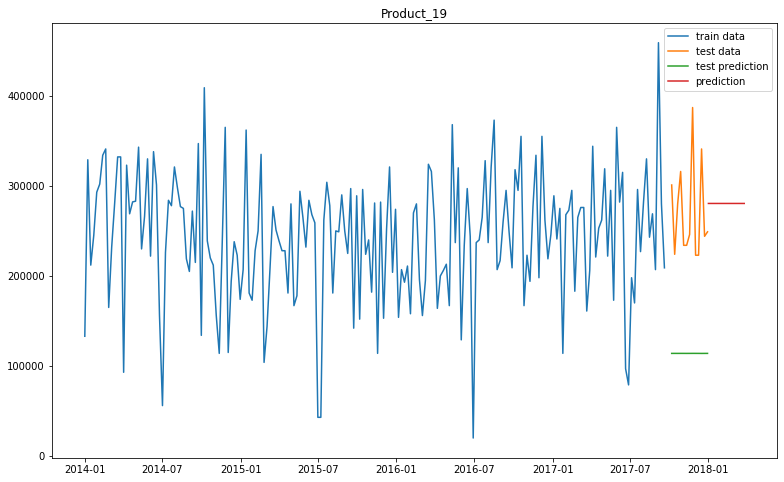

In [266]:
p = create_plot(0, train_set, test_set, prediction)
p.show()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [80669555469.82658]
Epoch [1/20], Step [20/182], Loss: [70385772407.81778]
Epoch [1/20], Step [30/182], Loss: [76495285810.87524]
Epoch [1/20], Step [40/182], Loss: [55358109897.51681]
Epoch [1/20], Step [50/182], Loss: [51470364637.85744]
Epoch [1/20], Step [60/182], Loss: [50691399384.65544]
Epoch [1/20], Step [70/182], Loss: [56365091103.892265]
Epoch [1/20], Step [80/182], Loss: [60501021869.33224]
Epoch [1/20], Step [90/182], Loss: [53986192496.22668]
Epoch [1/20], Step [100/182], Loss: [54664710824.355736]
Epoch [1/20], Step [110/182], Loss: [54233425961.458855]
Epoch [1/20], Step [120/182], Loss: [55781892347.422485]
Epoch [1/20], Step [130/182], Loss: [68761791903.45943]
Epoch [1/20], Step [140/182], Loss: [71119593315.01988]
Epoch [1/20], Step [150/182], Loss: [66895581875.68378]
Epoch [1/20], Step [160/182], Loss: [62526080547.32759]
Epoch [1/20], Step [170/182], Loss: [71582815617.35918]
Epoch [1/20], Step [180/182], Loss: [58717195045.9990

Epoch [9/20], Step [50/182], Loss: [14977140563.677856]
Epoch [9/20], Step [60/182], Loss: [14111457536.563673]
Epoch [9/20], Step [70/182], Loss: [17413979874.09177]
Epoch [9/20], Step [80/182], Loss: [17625826632.22726]
Epoch [9/20], Step [90/182], Loss: [12896145112.450325]
Epoch [9/20], Step [100/182], Loss: [12341389061.20854]
Epoch [9/20], Step [110/182], Loss: [10979224377.630253]
Epoch [9/20], Step [120/182], Loss: [15031917333.520306]
Epoch [9/20], Step [130/182], Loss: [19591944799.53757]
Epoch [9/20], Step [140/182], Loss: [14297015609.173452]
Epoch [9/20], Step [150/182], Loss: [13556797561.025757]
Epoch [9/20], Step [160/182], Loss: [17782276199.43437]
Epoch [9/20], Step [170/182], Loss: [15905409540.521536]
Epoch [9/20], Step [180/182], Loss: [14777045670.241512]
Epoch [10/20], Step [10/182], Loss: [19847261959.465828]
Epoch [10/20], Step [20/182], Loss: [13137533731.301523]
Epoch [10/20], Step [30/182], Loss: [16756603098.993298]
Epoch [10/20], Step [40/182], Loss: [1394

Epoch [17/20], Step [60/182], Loss: [3622142997.9736633]
Epoch [17/20], Step [70/182], Loss: [7385149658.908689]
Epoch [17/20], Step [80/182], Loss: [5118150929.441202]
Epoch [17/20], Step [90/182], Loss: [4308822843.856307]
Epoch [17/20], Step [100/182], Loss: [2956850157.2316065]
Epoch [17/20], Step [110/182], Loss: [3519644848.8482656]
Epoch [17/20], Step [120/182], Loss: [7116543150.233037]
Epoch [17/20], Step [130/182], Loss: [6712089068.253791]
Epoch [17/20], Step [140/182], Loss: [3067148927.1025457]
Epoch [17/20], Step [150/182], Loss: [3628373825.8793178]
Epoch [17/20], Step [160/182], Loss: [3639719526.818817]
Epoch [17/20], Step [170/182], Loss: [5109282795.787643]
Epoch [17/20], Step [180/182], Loss: [5796523953.187437]
Epoch [18/20], Step [10/182], Loss: [4133872852.3161116]
Epoch [18/20], Step [20/182], Loss: [5934595067.448049]
Epoch [18/20], Step [30/182], Loss: [4834505833.284592]
Epoch [18/20], Step [40/182], Loss: [7120227201.172109]
Epoch [18/20], Step [50/182], Los

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [715203605465.2896]
Epoch [1/20], Step [20/182], Loss: [647919272155.4246]
Epoch [1/20], Step [30/182], Loss: [736228137632.4623]
Epoch [1/20], Step [40/182], Loss: [456258211302.047]
Epoch [1/20], Step [50/182], Loss: [469041158441.8123]
Epoch [1/20], Step [60/182], Loss: [472623159207.2478]
Epoch [1/20], Step [70/182], Loss: [429397886367.1755]
Epoch [1/20], Step [80/182], Loss: [395374060995.0921]
Epoch [1/20], Step [90/182], Loss: [345306536228.9369]
Epoch [1/20], Step [100/182], Loss: [317482829403.4585]
Epoch [1/20], Step [110/182], Loss: [393344673584.1421]
Epoch [1/20], Step [120/182], Loss: [438288209159.6746]
Epoch [1/20], Step [130/182], Loss: [365032920492.6342]
Epoch [1/20], Step [140/182], Loss: [324758786511.59863]
Epoch [1/20], Step [150/182], Loss: [328815344410.20294]
Epoch [1/20], Step [160/182], Loss: [391960041964.20496]
Epoch [1/20], Step [170/182], Loss: [572349899654.8456]
Epoch [1/20], Step [180/182], Loss: [402629566316.65405

Epoch [9/20], Step [50/182], Loss: [19670589405.0742]
Epoch [9/20], Step [60/182], Loss: [128448163665.24031]
Epoch [9/20], Step [70/182], Loss: [43123173217.43487]
Epoch [9/20], Step [80/182], Loss: [27290818505.169846]
Epoch [9/20], Step [90/182], Loss: [29191375876.64021]
Epoch [9/20], Step [100/182], Loss: [18669557248.574917]
Epoch [9/20], Step [110/182], Loss: [23323032821.603855]
Epoch [9/20], Step [120/182], Loss: [113091063784.52914]
Epoch [9/20], Step [130/182], Loss: [44151441226.32309]
Epoch [9/20], Step [140/182], Loss: [15786025707.51779]
Epoch [9/20], Step [150/182], Loss: [15257193632.915352]
Epoch [9/20], Step [160/182], Loss: [17211784360.926147]
Epoch [9/20], Step [170/182], Loss: [41943968161.30569]
Epoch [9/20], Step [180/182], Loss: [37478335952.55404]
Epoch [10/20], Step [10/182], Loss: [154022880879.3131]
Epoch [10/20], Step [20/182], Loss: [186972032979.56522]
Epoch [10/20], Step [30/182], Loss: [77082547149.96672]
Epoch [10/20], Step [40/182], Loss: [276401116

Epoch [17/20], Step [70/182], Loss: [122135690402.08882]
Epoch [17/20], Step [80/182], Loss: [27225811272.785786]
Epoch [17/20], Step [90/182], Loss: [33248542527.0386]
Epoch [17/20], Step [100/182], Loss: [23811446768.49361]
Epoch [17/20], Step [110/182], Loss: [26253774197.181698]
Epoch [17/20], Step [120/182], Loss: [51105653374.37918]
Epoch [17/20], Step [130/182], Loss: [284512419244.1951]
Epoch [17/20], Step [140/182], Loss: [50812002071.56204]
Epoch [17/20], Step [150/182], Loss: [17891667763.69327]
Epoch [17/20], Step [160/182], Loss: [25321104294.701084]
Epoch [17/20], Step [170/182], Loss: [153676936033.09998]
Epoch [17/20], Step [180/182], Loss: [37822256821.15697]
Epoch [18/20], Step [10/182], Loss: [30806010177.221962]
Epoch [18/20], Step [20/182], Loss: [81245731226.99455]
Epoch [18/20], Step [30/182], Loss: [270047086342.9023]
Epoch [18/20], Step [40/182], Loss: [27011386001.339146]
Epoch [18/20], Step [50/182], Loss: [18932347138.72434]
Epoch [18/20], Step [60/182], Los

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [201784562042.21182]
Epoch [1/20], Step [20/182], Loss: [234047316721.08533]
Epoch [1/20], Step [30/182], Loss: [151003819130.92636]
Epoch [1/20], Step [40/182], Loss: [74324323738.17479]
Epoch [1/20], Step [50/182], Loss: [100524730404.57133]
Epoch [1/20], Step [60/182], Loss: [112833070718.87135]
Epoch [1/20], Step [70/182], Loss: [63451649300.91344]
Epoch [1/20], Step [80/182], Loss: [63080210190.79744]
Epoch [1/20], Step [90/182], Loss: [52984941444.113365]
Epoch [1/20], Step [100/182], Loss: [57468629086.9019]
Epoch [1/20], Step [110/182], Loss: [45845609350.4041]
Epoch [1/20], Step [120/182], Loss: [57256579567.915955]
Epoch [1/20], Step [130/182], Loss: [113830518255.06519]
Epoch [1/20], Step [140/182], Loss: [110233399714.22383]
Epoch [1/20], Step [150/182], Loss: [70975729537.58492]
Epoch [1/20], Step [160/182], Loss: [163676354285.04605]
Epoch [1/20], Step [170/182], Loss: [153332179431.57803]
Epoch [1/20], Step [180/182], Loss: [78426132026

Epoch [9/20], Step [40/182], Loss: [55107387781.408646]
Epoch [9/20], Step [50/182], Loss: [83593916331.72281]
Epoch [9/20], Step [60/182], Loss: [94672881383.85457]
Epoch [9/20], Step [70/182], Loss: [45570211633.756226]
Epoch [9/20], Step [80/182], Loss: [45937689467.94192]
Epoch [9/20], Step [90/182], Loss: [35605764323.68721]
Epoch [9/20], Step [100/182], Loss: [44061550135.842445]
Epoch [9/20], Step [110/182], Loss: [30429497761.2471]
Epoch [9/20], Step [120/182], Loss: [39611163735.10641]
Epoch [9/20], Step [130/182], Loss: [113472701647.3419]
Epoch [9/20], Step [140/182], Loss: [84343442294.47754]
Epoch [9/20], Step [150/182], Loss: [48287579223.8462]
Epoch [9/20], Step [160/182], Loss: [137464842811.4816]
Epoch [9/20], Step [170/182], Loss: [121053768825.31865]
Epoch [9/20], Step [180/182], Loss: [55036789135.63593]
Epoch [10/20], Step [10/182], Loss: [160858924967.80548]
Epoch [10/20], Step [20/182], Loss: [199811366424.63748]
Epoch [10/20], Step [30/182], Loss: [115592200965.

Epoch [17/20], Step [90/182], Loss: [9977755564.752356]
Epoch [17/20], Step [100/182], Loss: [14673152996.577473]
Epoch [17/20], Step [110/182], Loss: [9068474626.8022]
Epoch [17/20], Step [120/182], Loss: [23555594103.068367]
Epoch [17/20], Step [130/182], Loss: [33777746361.55397]
Epoch [17/20], Step [140/182], Loss: [42796185470.9365]
Epoch [17/20], Step [150/182], Loss: [6787185798.774829]
Epoch [17/20], Step [160/182], Loss: [56127505826.15383]
Epoch [17/20], Step [170/182], Loss: [68963996099.67928]
Epoch [17/20], Step [180/182], Loss: [23548101482.647278]
Epoch [18/20], Step [10/182], Loss: [69481076635.60793]
Epoch [18/20], Step [20/182], Loss: [85227506914.83272]
Epoch [18/20], Step [30/182], Loss: [83482929534.29437]
Epoch [18/20], Step [40/182], Loss: [10899497099.173994]
Epoch [18/20], Step [50/182], Loss: [23793288506.438805]
Epoch [18/20], Step [60/182], Loss: [26294983736.201107]
Epoch [18/20], Step [70/182], Loss: [11124350634.541948]
Epoch [18/20], Step [80/182], Loss:

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/180], Loss: [243595968404.71393]
Epoch [1/20], Step [20/180], Loss: [207844788762.83417]
Epoch [1/20], Step [30/180], Loss: [177149283018.7935]
Epoch [1/20], Step [40/180], Loss: [130606902052.91461]
Epoch [1/20], Step [50/180], Loss: [161290503615.19324]
Epoch [1/20], Step [60/180], Loss: [199825418519.2633]
Epoch [1/20], Step [70/180], Loss: [149013362732.6733]
Epoch [1/20], Step [80/180], Loss: [146637631899.39243]
Epoch [1/20], Step [90/180], Loss: [175950203051.33664]
Epoch [1/20], Step [100/180], Loss: [158287206095.41074]
Epoch [1/20], Step [110/180], Loss: [194235796001.00278]
Epoch [1/20], Step [120/180], Loss: [181856121738.55197]
Epoch [1/20], Step [130/180], Loss: [159448784495.09308]
Epoch [1/20], Step [140/180], Loss: [199187229517.62775]
Epoch [1/20], Step [150/180], Loss: [202303617813.9397]
Epoch [1/20], Step [160/180], Loss: [260056941177.60056]
Epoch [1/20], Step [170/180], Loss: [204986542718.17078]
Epoch [1/20], Step [180/180], Loss: [1447791

Epoch [9/20], Step [70/180], Loss: [11738653742.08329]
Epoch [9/20], Step [80/180], Loss: [6244246123.590901]
Epoch [9/20], Step [90/180], Loss: [14822909785.615685]
Epoch [9/20], Step [100/180], Loss: [6592651350.356301]
Epoch [9/20], Step [110/180], Loss: [10170184224.205725]
Epoch [9/20], Step [120/180], Loss: [18864610820.36201]
Epoch [9/20], Step [130/180], Loss: [113096198435.57336]
Epoch [9/20], Step [140/180], Loss: [4648762543.602957]
Epoch [9/20], Step [150/180], Loss: [6536411258.481448]
Epoch [9/20], Step [160/180], Loss: [87579785050.89337]
Epoch [9/20], Step [170/180], Loss: [17306458907.975548]
Epoch [9/20], Step [180/180], Loss: [27765277454.26781]
Epoch [10/20], Step [10/180], Loss: [12400257906.820234]
Epoch [10/20], Step [20/180], Loss: [23009001629.592888]
Epoch [10/20], Step [30/180], Loss: [5724380943.245341]
Epoch [10/20], Step [40/180], Loss: [11982864395.358212]
Epoch [10/20], Step [50/180], Loss: [4203510968.5278206]
Epoch [10/20], Step [60/180], Loss: [164936

Epoch [17/20], Step [90/180], Loss: [7167804350.50328]
Epoch [17/20], Step [100/180], Loss: [6246984866.089472]
Epoch [17/20], Step [110/180], Loss: [13764408816.382542]
Epoch [17/20], Step [120/180], Loss: [36183904998.25992]
Epoch [17/20], Step [130/180], Loss: [71729310250.1432]
Epoch [17/20], Step [140/180], Loss: [13147722747.627392]
Epoch [17/20], Step [150/180], Loss: [6545738981.20056]
Epoch [17/20], Step [160/180], Loss: [13936382959.016151]
Epoch [17/20], Step [170/180], Loss: [37497283292.493965]
Epoch [17/20], Step [180/180], Loss: [17017977242.702997]
Epoch [18/20], Step [10/180], Loss: [12791495580.841099]
Epoch [18/20], Step [20/180], Loss: [23924852162.614765]
Epoch [18/20], Step [30/180], Loss: [6216019210.233937]
Epoch [18/20], Step [40/180], Loss: [2835003464.5211635]
Epoch [18/20], Step [50/180], Loss: [34982244335.26246]
Epoch [18/20], Step [60/180], Loss: [6737704811.465458]
Epoch [18/20], Step [70/180], Loss: [7002712957.97816]
Epoch [18/20], Step [80/180], Loss:

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [50/182], Loss: [14096404831.240269]
Epoch [1/20], Step [60/182], Loss: [11598420024.026451]
Epoch [1/20], Step [70/182], Loss: [8516465715.035207]
Epoch [1/20], Step [80/182], Loss: [9682085657.882946]
Epoch [1/20], Step [90/182], Loss: [9070575886.6084]
Epoch [1/20], Step [100/182], Loss: [13864343859.829168]
Epoch [1/20], Step [110/182], Loss: [18043267116.497623]
Epoch [1/20], Step [120/182], Loss: [15222434844.17772]
Epoch [1/20], Step [130/182], Loss: [13393288386.03136]
Epoch [1/20], Step [140/182], Loss: [11080265343.248217]
Epoch [1/20], Step [150/182], Loss: [8462732170.911992]
Epoch [1/20], Step [160/182], Loss: [11299710185.94122]
Epoch [1/20], Step [170/182], Loss: [9410677160.107346]
Epoch [1/20], Step [180/182], Loss: [7713021313.988432]
Epoch [2/20], Step [10/182], Loss: [20921021224.334038]
Epoch [2/20], Step [20/182], Loss: [14343653212.904537]
Epoch [2/20], Step [30/182], Loss: [14229721139.95454]
Epoch [2/20], Step [40/182], Loss: [12003293176.166

Epoch [9/20], Step [80/182], Loss: [1174829699.6223805]
Epoch [9/20], Step [90/182], Loss: [1255061733.4432988]
Epoch [9/20], Step [100/182], Loss: [2752536143.9585657]
Epoch [9/20], Step [110/182], Loss: [1947390993.235084]
Epoch [9/20], Step [120/182], Loss: [2672818979.4400363]
Epoch [9/20], Step [130/182], Loss: [2670007015.160821]
Epoch [9/20], Step [140/182], Loss: [1104116648.0753222]
Epoch [9/20], Step [150/182], Loss: [523946225.6805071]
Epoch [9/20], Step [160/182], Loss: [858281232.5795001]
Epoch [9/20], Step [170/182], Loss: [712448343.6437193]
Epoch [9/20], Step [180/182], Loss: [907318648.6645982]
Epoch [10/20], Step [10/182], Loss: [1622461006.0774255]
Epoch [10/20], Step [20/182], Loss: [1190788780.6149454]
Epoch [10/20], Step [30/182], Loss: [834143007.6159956]
Epoch [10/20], Step [40/182], Loss: [750507385.5512834]
Epoch [10/20], Step [50/182], Loss: [2920289821.186141]
Epoch [10/20], Step [60/182], Loss: [1316726934.4059513]
Epoch [10/20], Step [70/182], Loss: [65880

Epoch [17/20], Step [110/182], Loss: [1714693262.6857898]
Epoch [17/20], Step [120/182], Loss: [2850130525.197725]
Epoch [17/20], Step [130/182], Loss: [2553092515.1256356]
Epoch [17/20], Step [140/182], Loss: [1025048194.7646751]
Epoch [17/20], Step [150/182], Loss: [547035665.456472]
Epoch [17/20], Step [160/182], Loss: [821561279.7626072]
Epoch [17/20], Step [170/182], Loss: [726507427.4940786]
Epoch [17/20], Step [180/182], Loss: [929224704.4669285]
Epoch [18/20], Step [10/182], Loss: [1758050126.4107974]
Epoch [18/20], Step [20/182], Loss: [1166505118.2802835]
Epoch [18/20], Step [30/182], Loss: [802954138.4551449]
Epoch [18/20], Step [40/182], Loss: [719638094.7916057]
Epoch [18/20], Step [50/182], Loss: [2246186159.807008]
Epoch [18/20], Step [60/182], Loss: [1543379595.113157]
Epoch [18/20], Step [70/182], Loss: [681702388.9950608]
Epoch [18/20], Step [80/182], Loss: [1057223045.1832247]
Epoch [18/20], Step [90/182], Loss: [1422863393.4919937]
Epoch [18/20], Step [100/182], Los

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [3814239138073.966]
Epoch [1/20], Step [20/182], Loss: [3544556402841.7173]
Epoch [1/20], Step [30/182], Loss: [3214585831957.6597]
Epoch [1/20], Step [40/182], Loss: [2254527870076.39]
Epoch [1/20], Step [50/182], Loss: [1899831517739.21]
Epoch [1/20], Step [60/182], Loss: [1712503895227.179]
Epoch [1/20], Step [70/182], Loss: [1359488985062.2046]
Epoch [1/20], Step [80/182], Loss: [1264046712699.5747]
Epoch [1/20], Step [90/182], Loss: [907421826724.0463]
Epoch [1/20], Step [100/182], Loss: [757222934240.9031]
Epoch [1/20], Step [110/182], Loss: [767377879740.9701]
Epoch [1/20], Step [120/182], Loss: [670404041502.6464]
Epoch [1/20], Step [130/182], Loss: [573994132040.3037]
Epoch [1/20], Step [140/182], Loss: [550771010150.1936]
Epoch [1/20], Step [150/182], Loss: [668652722072.1613]
Epoch [1/20], Step [160/182], Loss: [822607823773.7123]
Epoch [1/20], Step [170/182], Loss: [547001164263.2062]
Epoch [1/20], Step [180/182], Loss: [379692695066.8665]

Epoch [9/20], Step [70/182], Loss: [1055049314948.8995]
Epoch [9/20], Step [80/182], Loss: [911267698496.8218]
Epoch [9/20], Step [90/182], Loss: [614182123888.1862]
Epoch [9/20], Step [100/182], Loss: [552524032833.3248]
Epoch [9/20], Step [110/182], Loss: [509526909704.95654]
Epoch [9/20], Step [120/182], Loss: [440380082253.3552]
Epoch [9/20], Step [130/182], Loss: [414810795405.37695]
Epoch [9/20], Step [140/182], Loss: [358254691612.61475]
Epoch [9/20], Step [150/182], Loss: [469703105511.92316]
Epoch [9/20], Step [160/182], Loss: [597832921234.2213]
Epoch [9/20], Step [170/182], Loss: [374889738398.8813]
Epoch [9/20], Step [180/182], Loss: [252404582349.49945]
Epoch [10/20], Step [10/182], Loss: [2699293438025.75]
Epoch [10/20], Step [20/182], Loss: [2539847752260.617]
Epoch [10/20], Step [30/182], Loss: [2237357748714.473]
Epoch [10/20], Step [40/182], Loss: [1521102963698.2917]
Epoch [10/20], Step [50/182], Loss: [1231931221882.0127]
Epoch [10/20], Step [60/182], Loss: [1172802

Epoch [17/20], Step [90/182], Loss: [57142723744.59591]
Epoch [17/20], Step [100/182], Loss: [102908573009.4359]
Epoch [17/20], Step [110/182], Loss: [37046621314.880264]
Epoch [17/20], Step [120/182], Loss: [43036330718.45958]
Epoch [17/20], Step [130/182], Loss: [28091117788.432]
Epoch [17/20], Step [140/182], Loss: [87245037683.53854]
Epoch [17/20], Step [150/182], Loss: [78294740660.7021]
Epoch [17/20], Step [160/182], Loss: [132761134758.60092]
Epoch [17/20], Step [170/182], Loss: [57216708280.28195]
Epoch [17/20], Step [180/182], Loss: [35853067037.73173]
Epoch [18/20], Step [10/182], Loss: [494419044863.3728]
Epoch [18/20], Step [20/182], Loss: [581947952506.6179]
Epoch [18/20], Step [30/182], Loss: [418350433422.0036]
Epoch [18/20], Step [40/182], Loss: [250301672122.45166]
Epoch [18/20], Step [50/182], Loss: [159890485841.30063]
Epoch [18/20], Step [60/182], Loss: [112994224930.39104]
Epoch [18/20], Step [70/182], Loss: [126919294006.87463]
Epoch [18/20], Step [80/182], Loss: 

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [109341187394.53313]
Epoch [1/20], Step [20/182], Loss: [117382291903.36858]
Epoch [1/20], Step [30/182], Loss: [128012144310.23026]
Epoch [1/20], Step [40/182], Loss: [108561467685.25633]
Epoch [1/20], Step [50/182], Loss: [87967429063.01993]
Epoch [1/20], Step [60/182], Loss: [70386512539.74278]
Epoch [1/20], Step [70/182], Loss: [53028898390.01998]
Epoch [1/20], Step [80/182], Loss: [53782999446.48972]
Epoch [1/20], Step [90/182], Loss: [48029811094.93019]
Epoch [1/20], Step [100/182], Loss: [43568086954.7349]
Epoch [1/20], Step [110/182], Loss: [40679030244.56896]
Epoch [1/20], Step [120/182], Loss: [27543233886.57166]
Epoch [1/20], Step [130/182], Loss: [28114622980.47985]
Epoch [1/20], Step [140/182], Loss: [33831991982.851864]
Epoch [1/20], Step [150/182], Loss: [12840710331.243681]
Epoch [1/20], Step [160/182], Loss: [15042897266.471926]
Epoch [1/20], Step [170/182], Loss: [10206854839.196638]
Epoch [1/20], Step [180/182], Loss: [5574414545.45

Epoch [9/20], Step [40/182], Loss: [13567041090.228128]
Epoch [9/20], Step [50/182], Loss: [7750007237.936113]
Epoch [9/20], Step [60/182], Loss: [10851172555.654049]
Epoch [9/20], Step [70/182], Loss: [11512354273.217672]
Epoch [9/20], Step [80/182], Loss: [12364215871.655624]
Epoch [9/20], Step [90/182], Loss: [4738288766.896656]
Epoch [9/20], Step [100/182], Loss: [14462557431.926815]
Epoch [9/20], Step [110/182], Loss: [3148707548.904942]
Epoch [9/20], Step [120/182], Loss: [3814003766.553404]
Epoch [9/20], Step [130/182], Loss: [7550957069.926371]
Epoch [9/20], Step [140/182], Loss: [3196012656.9003644]
Epoch [9/20], Step [150/182], Loss: [11166674894.419296]
Epoch [9/20], Step [160/182], Loss: [1190236144.1387646]
Epoch [9/20], Step [170/182], Loss: [1840886286.3702414]
Epoch [9/20], Step [180/182], Loss: [1408120871.2707732]
Epoch [10/20], Step [10/182], Loss: [4684801366.114567]
Epoch [10/20], Step [20/182], Loss: [35368263854.20659]
Epoch [10/20], Step [30/182], Loss: [3104043

Epoch [17/20], Step [50/182], Loss: [16884866893.426153]
Epoch [17/20], Step [60/182], Loss: [11454633247.187342]
Epoch [17/20], Step [70/182], Loss: [11462523730.117685]
Epoch [17/20], Step [80/182], Loss: [12664534705.259651]
Epoch [17/20], Step [90/182], Loss: [4734912341.9086075]
Epoch [17/20], Step [100/182], Loss: [7182607741.202185]
Epoch [17/20], Step [110/182], Loss: [3266186947.8937526]
Epoch [17/20], Step [120/182], Loss: [3902024717.6209216]
Epoch [17/20], Step [130/182], Loss: [3389089276.728893]
Epoch [17/20], Step [140/182], Loss: [20345901475.70648]
Epoch [17/20], Step [150/182], Loss: [1888049103.7979295]
Epoch [17/20], Step [160/182], Loss: [3652087186.928578]
Epoch [17/20], Step [170/182], Loss: [2383324173.191774]
Epoch [17/20], Step [180/182], Loss: [1452479220.1908154]
Epoch [18/20], Step [10/182], Loss: [5192203869.835085]
Epoch [18/20], Step [20/182], Loss: [10061277929.316238]
Epoch [18/20], Step [30/182], Loss: [8364756020.405155]
Epoch [18/20], Step [40/182],

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [41242237947.55524]
Epoch [1/20], Step [20/182], Loss: [45563082604.96785]
Epoch [1/20], Step [30/182], Loss: [51018876916.78781]
Epoch [1/20], Step [40/182], Loss: [47634209961.45881]
Epoch [1/20], Step [50/182], Loss: [51845489055.58203]
Epoch [1/20], Step [60/182], Loss: [39472590320.33666]
Epoch [1/20], Step [70/182], Loss: [33422234004.0086]
Epoch [1/20], Step [80/182], Loss: [39641646364.94232]
Epoch [1/20], Step [90/182], Loss: [40147046592.665764]
Epoch [1/20], Step [100/182], Loss: [50397791475.48353]
Epoch [1/20], Step [110/182], Loss: [80436714666.23503]
Epoch [1/20], Step [120/182], Loss: [83549333877.91302]
Epoch [1/20], Step [130/182], Loss: [67719904849.847885]
Epoch [1/20], Step [140/182], Loss: [81494888776.64027]
Epoch [1/20], Step [150/182], Loss: [68006080979.59795]
Epoch [1/20], Step [160/182], Loss: [45920090878.86184]
Epoch [1/20], Step [170/182], Loss: [41282241827.244675]
Epoch [1/20], Step [180/182], Loss: [26945742573.493633

Epoch [9/20], Step [90/182], Loss: [9808251768.8781]
Epoch [9/20], Step [100/182], Loss: [2453665632.637814]
Epoch [9/20], Step [110/182], Loss: [21571052285.003807]
Epoch [9/20], Step [120/182], Loss: [8062886203.431306]
Epoch [9/20], Step [130/182], Loss: [11189743675.79658]
Epoch [9/20], Step [140/182], Loss: [5165468128.315888]
Epoch [9/20], Step [150/182], Loss: [13753417710.140533]
Epoch [9/20], Step [160/182], Loss: [965122560.9329886]
Epoch [9/20], Step [170/182], Loss: [5060996234.2193165]
Epoch [9/20], Step [180/182], Loss: [4674511142.084756]
Epoch [10/20], Step [10/182], Loss: [6375590159.084494]
Epoch [10/20], Step [20/182], Loss: [6036685480.834758]
Epoch [10/20], Step [30/182], Loss: [4625786051.057964]
Epoch [10/20], Step [40/182], Loss: [3029018944.080735]
Epoch [10/20], Step [50/182], Loss: [2640350095.447813]
Epoch [10/20], Step [60/182], Loss: [3885290227.701208]
Epoch [10/20], Step [70/182], Loss: [983718414.2886974]
Epoch [10/20], Step [80/182], Loss: [2833053905.

Epoch [17/20], Step [120/182], Loss: [10455614575.096619]
Epoch [17/20], Step [130/182], Loss: [18489917572.60686]
Epoch [17/20], Step [140/182], Loss: [28245534362.13463]
Epoch [17/20], Step [150/182], Loss: [4244222379.260032]
Epoch [17/20], Step [160/182], Loss: [1021606712.1701149]
Epoch [17/20], Step [170/182], Loss: [5505187316.524996]
Epoch [17/20], Step [180/182], Loss: [4653885501.73021]
Epoch [18/20], Step [10/182], Loss: [8211793942.456479]
Epoch [18/20], Step [20/182], Loss: [6777811725.494377]
Epoch [18/20], Step [30/182], Loss: [5323371853.554403]
Epoch [18/20], Step [40/182], Loss: [3404130358.3205338]
Epoch [18/20], Step [50/182], Loss: [3238051980.6320615]
Epoch [18/20], Step [60/182], Loss: [4380004299.310274]
Epoch [18/20], Step [70/182], Loss: [8301916972.402695]
Epoch [18/20], Step [80/182], Loss: [1452835435.562872]
Epoch [18/20], Step [90/182], Loss: [8138569279.850466]
Epoch [18/20], Step [100/182], Loss: [2181606713.902344]
Epoch [18/20], Step [110/182], Loss: 

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [24821539669.55781]
Epoch [1/20], Step [20/182], Loss: [22393565682.77765]
Epoch [1/20], Step [30/182], Loss: [21128438107.024254]
Epoch [1/20], Step [40/182], Loss: [36675496797.69682]
Epoch [1/20], Step [50/182], Loss: [17891343696.7709]
Epoch [1/20], Step [60/182], Loss: [28050495664.89278]
Epoch [1/20], Step [70/182], Loss: [20517316888.5727]
Epoch [1/20], Step [80/182], Loss: [16799384699.512993]
Epoch [1/20], Step [90/182], Loss: [19454268333.670143]
Epoch [1/20], Step [100/182], Loss: [13818708542.763288]
Epoch [1/20], Step [110/182], Loss: [15459073865.983465]
Epoch [1/20], Step [120/182], Loss: [16937460767.986294]
Epoch [1/20], Step [130/182], Loss: [14611115962.877699]
Epoch [1/20], Step [140/182], Loss: [19362356717.92062]
Epoch [1/20], Step [150/182], Loss: [13337644294.293446]
Epoch [1/20], Step [160/182], Loss: [17946118508.130566]
Epoch [1/20], Step [170/182], Loss: [17617693314.951073]
Epoch [1/20], Step [180/182], Loss: [9655810321.6

Epoch [9/20], Step [40/182], Loss: [6430993057.974634]
Epoch [9/20], Step [50/182], Loss: [4227874652.212001]
Epoch [9/20], Step [60/182], Loss: [4536134325.541947]
Epoch [9/20], Step [70/182], Loss: [1495668800.6177602]
Epoch [9/20], Step [80/182], Loss: [3587516959.8337126]
Epoch [9/20], Step [90/182], Loss: [7297149800.645785]
Epoch [9/20], Step [100/182], Loss: [3357038900.789285]
Epoch [9/20], Step [110/182], Loss: [1721259360.3516831]
Epoch [9/20], Step [120/182], Loss: [3477410819.222331]
Epoch [9/20], Step [130/182], Loss: [3693592769.845351]
Epoch [9/20], Step [140/182], Loss: [3192063077.052]
Epoch [9/20], Step [150/182], Loss: [5669685695.548091]
Epoch [9/20], Step [160/182], Loss: [5058252371.712156]
Epoch [9/20], Step [170/182], Loss: [2968986112.614806]
Epoch [9/20], Step [180/182], Loss: [1529340081.2829688]
Epoch [10/20], Step [10/182], Loss: [5470999065.29557]
Epoch [10/20], Step [20/182], Loss: [4314425052.864073]
Epoch [10/20], Step [30/182], Loss: [2666170042.239625

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [1201492484205.8433]
Epoch [1/20], Step [20/182], Loss: [1431397790854.0608]
Epoch [1/20], Step [30/182], Loss: [1203715152301.175]
Epoch [1/20], Step [40/182], Loss: [1024051771529.8883]
Epoch [1/20], Step [50/182], Loss: [1234959760593.8193]
Epoch [1/20], Step [60/182], Loss: [1885362574417.9631]
Epoch [1/20], Step [70/182], Loss: [1184407659124.6367]
Epoch [1/20], Step [80/182], Loss: [826922400239.2927]
Epoch [1/20], Step [90/182], Loss: [646577485604.3673]
Epoch [1/20], Step [100/182], Loss: [526558041323.0209]
Epoch [1/20], Step [110/182], Loss: [581888384906.3395]
Epoch [1/20], Step [120/182], Loss: [630867467250.4397]
Epoch [1/20], Step [130/182], Loss: [659572800892.0249]
Epoch [1/20], Step [140/182], Loss: [664692064220.9655]
Epoch [1/20], Step [150/182], Loss: [1135995371371.3398]
Epoch [1/20], Step [160/182], Loss: [1170788411896.0986]
Epoch [1/20], Step [170/182], Loss: [965525619910.2607]
Epoch [1/20], Step [180/182], Loss: [600987666442

Epoch [9/20], Step [50/182], Loss: [1233825849764.635]
Epoch [9/20], Step [60/182], Loss: [1883894208313.9905]
Epoch [9/20], Step [70/182], Loss: [1183216633462.8206]
Epoch [9/20], Step [80/182], Loss: [825904046220.8844]
Epoch [9/20], Step [90/182], Loss: [645671579530.4329]
Epoch [9/20], Step [100/182], Loss: [525732340672.21625]
Epoch [9/20], Step [110/182], Loss: [581013090106.5243]
Epoch [9/20], Step [120/182], Loss: [629987825675.0958]
Epoch [9/20], Step [130/182], Loss: [658672805712.965]
Epoch [9/20], Step [140/182], Loss: [663729532383.2234]
Epoch [9/20], Step [150/182], Loss: [1134742749122.8105]
Epoch [9/20], Step [160/182], Loss: [1169490004235.9216]
Epoch [9/20], Step [170/182], Loss: [964352116167.7748]
Epoch [9/20], Step [180/182], Loss: [600068018967.6501]
Epoch [10/20], Step [10/182], Loss: [1200134171791.326]
Epoch [10/20], Step [20/182], Loss: [1429904338551.4824]
Epoch [10/20], Step [30/182], Loss: [1202300302033.0247]
Epoch [10/20], Step [40/182], Loss: [1022738370

Epoch [17/20], Step [60/182], Loss: [1880421686693.7034]
Epoch [17/20], Step [70/182], Loss: [1180428923896.189]
Epoch [17/20], Step [80/182], Loss: [823542834019.4606]
Epoch [17/20], Step [90/182], Loss: [643588269951.9633]
Epoch [17/20], Step [100/182], Loss: [523846906410.0965]
Epoch [17/20], Step [110/182], Loss: [579026664819.4868]
Epoch [17/20], Step [120/182], Loss: [628003509036.1199]
Epoch [17/20], Step [130/182], Loss: [656654408673.5621]
Epoch [17/20], Step [140/182], Loss: [661583520046.4832]
Epoch [17/20], Step [150/182], Loss: [1131966652436.6138]
Epoch [17/20], Step [160/182], Loss: [1166632951467.3125]
Epoch [17/20], Step [170/182], Loss: [961789528137.0083]
Epoch [17/20], Step [180/182], Loss: [598074255235.4785]
Epoch [18/20], Step [10/182], Loss: [1197255158165.2854]
Epoch [18/20], Step [20/182], Loss: [1426765124816.7954]
Epoch [18/20], Step [30/182], Loss: [1199352852384.8994]
Epoch [18/20], Step [40/182], Loss: [1020026257435.6053]
Epoch [18/20], Step [50/182], Lo

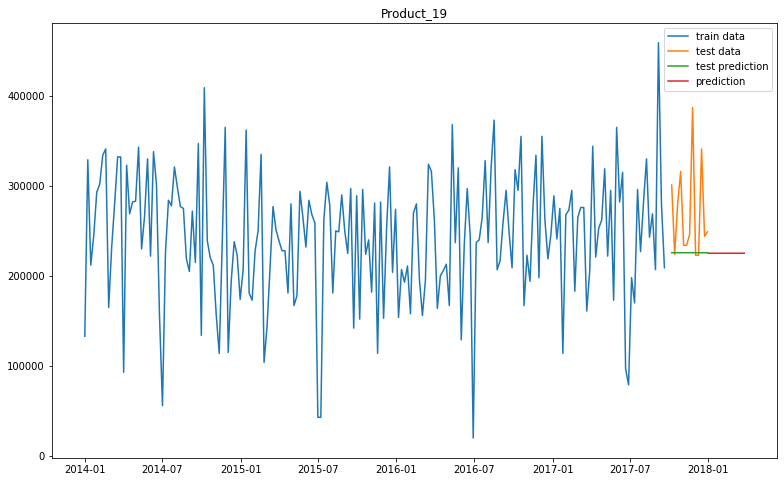

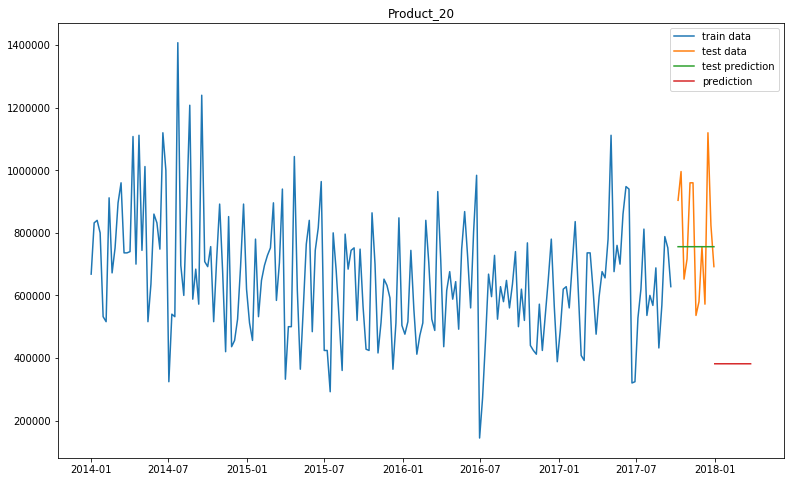

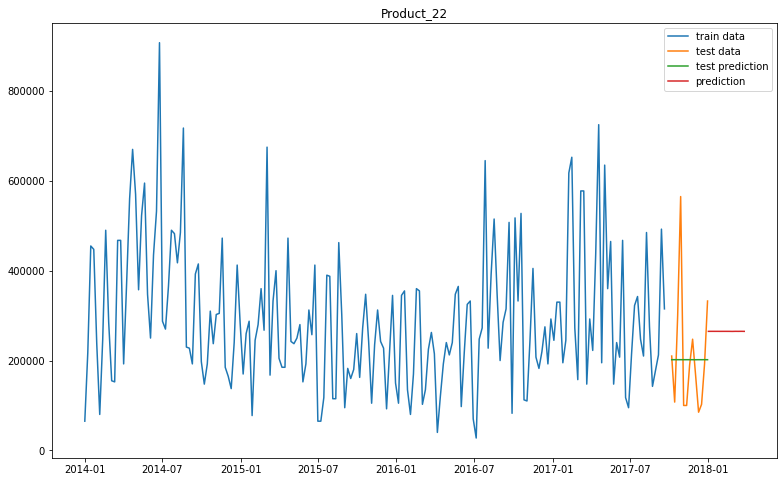

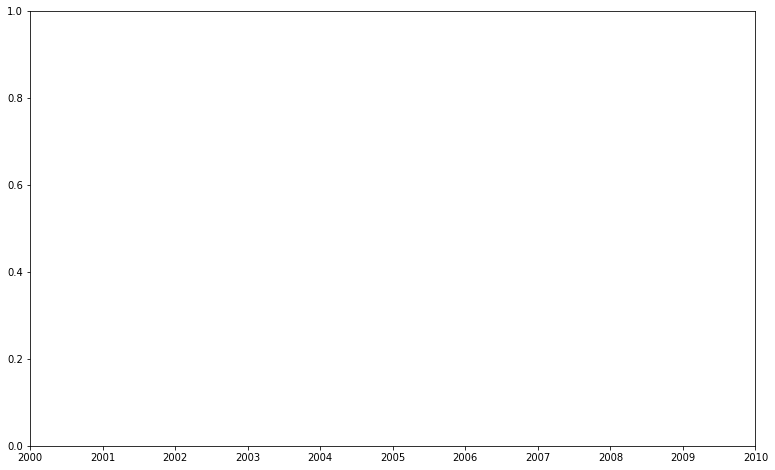

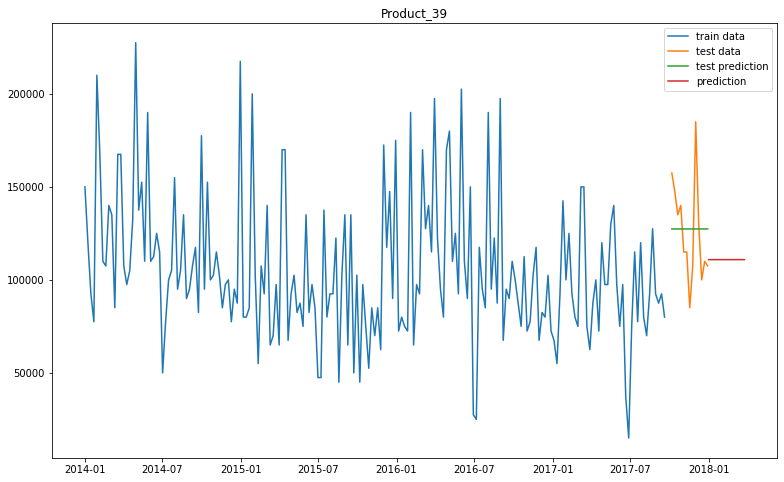

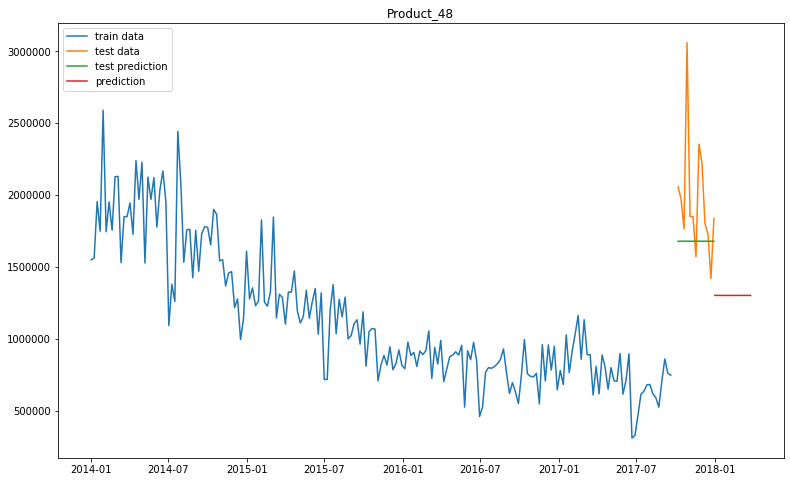

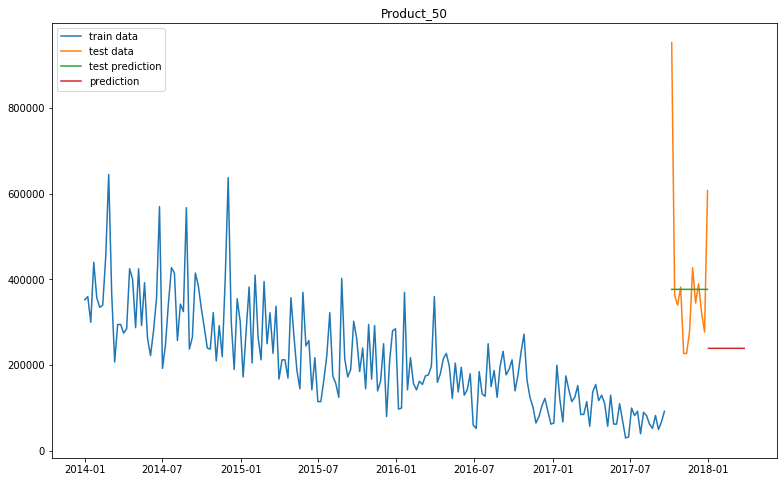

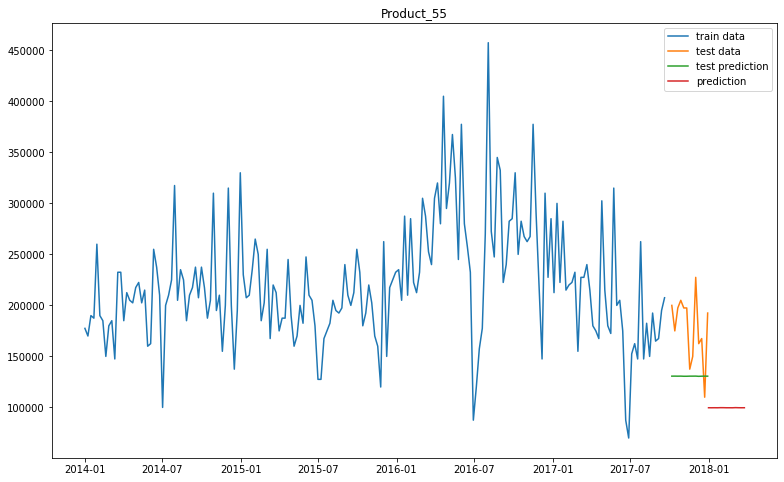

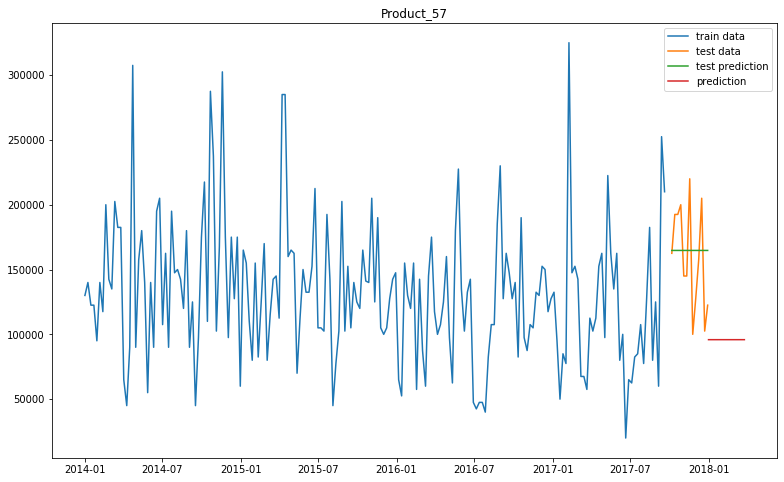

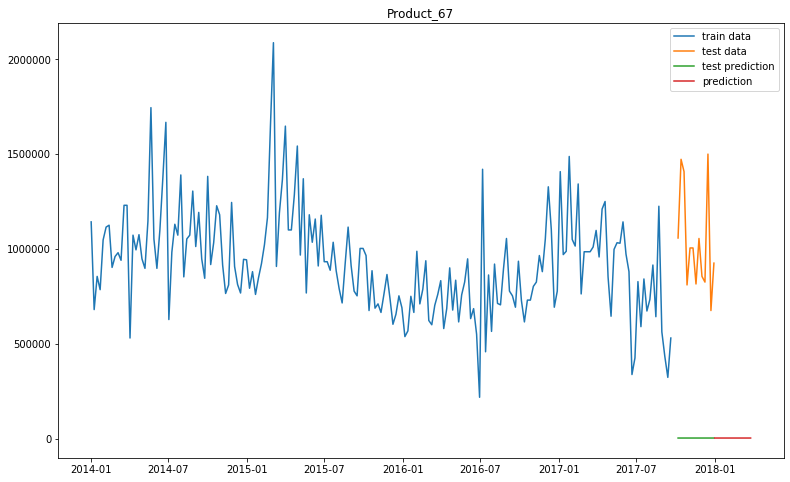

In [285]:
input_length=13
output_size=13
learning_rate = 0.01
num_epochs = 20

maes = {}

for i,loader in enumerate(trains_loaders):
    model = TCN_(input_length, output_size, [1,2], 2, 0.1)
    model.double()
    train_TCN(model, loader, 
                            input_length=input_length,
                            output_size=output_size,
                            learning_rate=learning_rate,
                            num_epochs=num_epochs,
                            criterion=nn.MSELoss()
             )
    with torch.no_grad():
        train = trains[i]
        test = tests[i]
        pred = predictions[i]
        testpred = model(test.x[0:13].view(1,13,13))
        prediction = model(pred.x.view(1,13,13))
    try:
        create_plot(i, train, test, testpred, prediction)
    except:
        pass
    mae_ = mae(test.y[0:13].detach().numpy(), testpred.T.detach().numpy())
    maes[idx2prod[i]] = mae_

In [288]:
file = open("mae_norm_retrain.json", "w")
json.dump(maes, file)
file.close()

In [289]:
input_length=13
output_size=13
learning_rate = 0.001
num_epochs = 20

maes = {}
model = TCN_(input_length, output_size, [1,2], 2, 0.1)
model.double()
for i,loader in enumerate(trains_loaders):
    
    
    train_TCN(model, loader, 
                            input_length=input_length,
                            output_size=output_size,
                            learning_rate=learning_rate,
                            num_epochs=num_epochs,
                            criterion=nn.MSELoss()
             )

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [80669646347.26112]
Epoch [1/20], Step [20/182], Loss: [70386036969.6519]
Epoch [1/20], Step [30/182], Loss: [76495800598.51627]
Epoch [1/20], Step [40/182], Loss: [55358634718.70428]
Epoch [1/20], Step [50/182], Loss: [51471474497.43903]
Epoch [1/20], Step [60/182], Loss: [50693160658.33517]
Epoch [1/20], Step [70/182], Loss: [56367461929.29328]
Epoch [1/20], Step [80/182], Loss: [60505685525.28743]
Epoch [1/20], Step [90/182], Loss: [53992909426.06811]
Epoch [1/20], Step [100/182], Loss: [54674517035.685814]
Epoch [1/20], Step [110/182], Loss: [54247509605.275665]
Epoch [1/20], Step [120/182], Loss: [55799810226.49573]
Epoch [1/20], Step [130/182], Loss: [68789234504.65651]
Epoch [1/20], Step [140/182], Loss: [71162168414.6982]
Epoch [1/20], Step [150/182], Loss: [66947467791.04546]
Epoch [1/20], Step [160/182], Loss: [62584460019.04395]
Epoch [1/20], Step [170/182], Loss: [71665136459.11467]
Epoch [1/20], Step [180/182], Loss: [58794598188.5369]
Ep

Epoch [9/20], Step [70/182], Loss: [56364290494.50586]
Epoch [9/20], Step [80/182], Loss: [60502287310.47467]
Epoch [9/20], Step [90/182], Loss: [53989657845.52864]
Epoch [9/20], Step [100/182], Loss: [54671177021.096596]
Epoch [9/20], Step [110/182], Loss: [54244164925.57195]
Epoch [9/20], Step [120/182], Loss: [55796516989.707115]
Epoch [9/20], Step [130/182], Loss: [68785485259.01704]
Epoch [9/20], Step [140/182], Loss: [71158213427.73743]
Epoch [9/20], Step [150/182], Loss: [66943620602.758194]
Epoch [9/20], Step [160/182], Loss: [62580716375.60515]
Epoch [9/20], Step [170/182], Loss: [71661126122.73268]
Epoch [9/20], Step [180/182], Loss: [58790987943.92949]
Epoch [10/20], Step [10/182], Loss: [80665092770.4309]
Epoch [10/20], Step [20/182], Loss: [70381812304.25723]
Epoch [10/20], Step [30/182], Loss: [76491301972.51674]
Epoch [10/20], Step [40/182], Loss: [55354920159.32613]
Epoch [10/20], Step [50/182], Loss: [51467786772.65564]
Epoch [10/20], Step [60/182], Loss: [50689434391.

Epoch [17/20], Step [80/182], Loss: [60495297517.28423]
Epoch [17/20], Step [90/182], Loss: [53983005754.70606]
Epoch [17/20], Step [100/182], Loss: [54664380099.81436]
Epoch [17/20], Step [110/182], Loss: [54237393322.11871]
Epoch [17/20], Step [120/182], Loss: [55789883822.44228]
Epoch [17/20], Step [130/182], Loss: [68777972556.38367]
Epoch [17/20], Step [140/182], Loss: [71150331731.17819]
Epoch [17/20], Step [150/182], Loss: [66935996691.42268]
Epoch [17/20], Step [160/182], Loss: [62573338241.52332]
Epoch [17/20], Step [170/182], Loss: [71653264378.6443]
Epoch [17/20], Step [180/182], Loss: [58783947310.22017]
Epoch [18/20], Step [10/182], Loss: [80656608340.36182]
Epoch [18/20], Step [20/182], Loss: [70373989371.71304]
Epoch [18/20], Step [30/182], Loss: [76483021426.46931]
Epoch [18/20], Step [40/182], Loss: [55348122358.755226]
Epoch [18/20], Step [50/182], Loss: [51461073475.42198]
Epoch [18/20], Step [60/182], Loss: [50682684750.62532]
Epoch [18/20], Step [70/182], Loss: [56

Epoch [5/20], Step [130/182], Loss: [365288295368.57745]
Epoch [5/20], Step [140/182], Loss: [325361808005.716]
Epoch [5/20], Step [150/182], Loss: [329697287941.72845]
Epoch [5/20], Step [160/182], Loss: [392872004469.55457]
Epoch [5/20], Step [170/182], Loss: [574010422225.1633]
Epoch [5/20], Step [180/182], Loss: [404927694566.03613]
Epoch [6/20], Step [10/182], Loss: [715134136948.0791]
Epoch [6/20], Step [20/182], Loss: [647856299265.3668]
Epoch [6/20], Step [30/182], Loss: [736161350229.6226]
Epoch [6/20], Step [40/182], Loss: [456205174059.3944]
Epoch [6/20], Step [50/182], Loss: [468991305520.34216]
Epoch [6/20], Step [60/182], Loss: [472581406613.4991]
Epoch [6/20], Step [70/182], Loss: [429377895233.9853]
Epoch [6/20], Step [80/182], Loss: [395342151902.5241]
Epoch [6/20], Step [90/182], Loss: [345346358301.1893]
Epoch [6/20], Step [100/182], Loss: [317477281825.41986]
Epoch [6/20], Step [110/182], Loss: [393519975372.65515]
Epoch [6/20], Step [120/182], Loss: [438335647269.8

Epoch [14/20], Step [10/182], Loss: [715095427453.5745]
Epoch [14/20], Step [20/182], Loss: [647820914649.5459]
Epoch [14/20], Step [30/182], Loss: [736123202999.979]
Epoch [14/20], Step [40/182], Loss: [456174321996.4892]
Epoch [14/20], Step [50/182], Loss: [468959642192.6468]
Epoch [14/20], Step [60/182], Loss: [472550443607.7814]
Epoch [14/20], Step [70/182], Loss: [429348436632.51227]
Epoch [14/20], Step [80/182], Loss: [395313387549.3603]
Epoch [14/20], Step [90/182], Loss: [345319271100.1166]
Epoch [14/20], Step [100/182], Loss: [317451162029.5155]
Epoch [14/20], Step [110/182], Loss: [393490987233.49786]
Epoch [14/20], Step [120/182], Loss: [438305849947.6874]
Epoch [14/20], Step [130/182], Loss: [365258065984.5668]
Epoch [14/20], Step [140/182], Loss: [325332199198.5603]
Epoch [14/20], Step [150/182], Loss: [329667389196.82434]
Epoch [14/20], Step [160/182], Loss: [392839362057.4358]
Epoch [14/20], Step [170/182], Loss: [573971518861.0944]
Epoch [14/20], Step [180/182], Loss: [

Epoch [2/20], Step [20/182], Loss: [233962359208.92807]
Epoch [2/20], Step [30/182], Loss: [150937895279.4877]
Epoch [2/20], Step [40/182], Loss: [74277026222.6951]
Epoch [2/20], Step [50/182], Loss: [100472219009.31738]
Epoch [2/20], Step [60/182], Loss: [112775656120.64102]
Epoch [2/20], Step [70/182], Loss: [63410413880.97818]
Epoch [2/20], Step [80/182], Loss: [63041750901.07266]
Epoch [2/20], Step [90/182], Loss: [52946863248.03439]
Epoch [2/20], Step [100/182], Loss: [57431633620.41287]
Epoch [2/20], Step [110/182], Loss: [45814748260.16726]
Epoch [2/20], Step [120/182], Loss: [57223887343.69249]
Epoch [2/20], Step [130/182], Loss: [113788522102.00085]
Epoch [2/20], Step [140/182], Loss: [110196543624.76558]
Epoch [2/20], Step [150/182], Loss: [70944433964.3349]
Epoch [2/20], Step [160/182], Loss: [163646276193.23395]
Epoch [2/20], Step [170/182], Loss: [153313209563.70224]
Epoch [2/20], Step [180/182], Loss: [78412296865.74689]
Epoch [3/20], Step [10/182], Loss: [201703500528.78

Epoch [10/20], Step [50/182], Loss: [100454675849.0985]
Epoch [10/20], Step [60/182], Loss: [112756732626.34668]
Epoch [10/20], Step [70/182], Loss: [63396250886.056595]
Epoch [10/20], Step [80/182], Loss: [63028250311.70859]
Epoch [10/20], Step [90/182], Loss: [52933312200.73338]
Epoch [10/20], Step [100/182], Loss: [57418140431.19064]
Epoch [10/20], Step [110/182], Loss: [45802808661.26657]
Epoch [10/20], Step [120/182], Loss: [57210548764.005516]
Epoch [10/20], Step [130/182], Loss: [113769947650.36316]
Epoch [10/20], Step [140/182], Loss: [110178091542.35974]
Epoch [10/20], Step [150/182], Loss: [70928277428.30232]
Epoch [10/20], Step [160/182], Loss: [163623559974.935]
Epoch [10/20], Step [170/182], Loss: [153291483969.92627]
Epoch [10/20], Step [180/182], Loss: [78396363926.17082]
Epoch [11/20], Step [10/182], Loss: [201677278052.98965]
Epoch [11/20], Step [20/182], Loss: [233930638837.7156]
Epoch [11/20], Step [30/182], Loss: [150913191429.06073]
Epoch [11/20], Step [40/182], Lo

Epoch [18/20], Step [50/182], Loss: [100434044358.63855]
Epoch [18/20], Step [60/182], Loss: [112734488475.18376]
Epoch [18/20], Step [70/182], Loss: [63379611011.542656]
Epoch [18/20], Step [80/182], Loss: [63012394936.881485]
Epoch [18/20], Step [90/182], Loss: [52917402720.4741]
Epoch [18/20], Step [100/182], Loss: [57402303378.7705]
Epoch [18/20], Step [110/182], Loss: [45788798798.13521]
Epoch [18/20], Step [120/182], Loss: [57194900251.73449]
Epoch [18/20], Step [130/182], Loss: [113748159887.17018]
Epoch [18/20], Step [140/182], Loss: [110156452752.93373]
Epoch [18/20], Step [150/182], Loss: [70909335877.55339]
Epoch [18/20], Step [160/182], Loss: [163596933809.76248]
Epoch [18/20], Step [170/182], Loss: [153266027725.5454]
Epoch [18/20], Step [180/182], Loss: [78377702305.35635]
Epoch [19/20], Step [10/182], Loss: [201646574732.55017]
Epoch [19/20], Step [20/182], Loss: [233897222217.06195]
Epoch [19/20], Step [30/182], Loss: [150887187048.08368]
Epoch [19/20], Step [40/182], L

Epoch [6/20], Step [80/180], Loss: [146512224035.20306]
Epoch [6/20], Step [90/180], Loss: [175867907093.88092]
Epoch [6/20], Step [100/180], Loss: [158307407048.43716]
Epoch [6/20], Step [110/180], Loss: [194518044081.705]
Epoch [6/20], Step [120/180], Loss: [182326488193.5985]
Epoch [6/20], Step [130/180], Loss: [160492759162.0484]
Epoch [6/20], Step [140/180], Loss: [200392529072.50485]
Epoch [6/20], Step [150/180], Loss: [205806882711.42328]
Epoch [6/20], Step [160/180], Loss: [265839236366.57544]
Epoch [6/20], Step [170/180], Loss: [212538621060.1373]
Epoch [6/20], Step [180/180], Loss: [145501525363.19928]
Epoch [7/20], Step [10/180], Loss: [243396183102.78348]
Epoch [7/20], Step [20/180], Loss: [207662640489.98386]
Epoch [7/20], Step [30/180], Loss: [176979225416.53406]
Epoch [7/20], Step [40/180], Loss: [130459707772.6526]
Epoch [7/20], Step [50/180], Loss: [161128944166.96323]
Epoch [7/20], Step [60/180], Loss: [199647423388.8358]
Epoch [7/20], Step [70/180], Loss: [1488649055

Epoch [14/20], Step [90/180], Loss: [175830680588.89792]
Epoch [14/20], Step [100/180], Loss: [158272006833.72787]
Epoch [14/20], Step [110/180], Loss: [194478920904.05667]
Epoch [14/20], Step [120/180], Loss: [182289694598.97592]
Epoch [14/20], Step [130/180], Loss: [160458420936.52103]
Epoch [14/20], Step [140/180], Loss: [200352511264.6537]
Epoch [14/20], Step [150/180], Loss: [205766448888.81906]
Epoch [14/20], Step [160/180], Loss: [265793644960.40375]
Epoch [14/20], Step [170/180], Loss: [212497712759.3812]
Epoch [14/20], Step [180/180], Loss: [145468068785.40295]
Epoch [15/20], Step [10/180], Loss: [243352006475.01816]
Epoch [15/20], Step [20/180], Loss: [207622340375.26578]
Epoch [15/20], Step [30/180], Loss: [176941550419.70007]
Epoch [15/20], Step [40/180], Loss: [130427081783.66154]
Epoch [15/20], Step [50/180], Loss: [161092840929.83356]
Epoch [15/20], Step [60/180], Loss: [199607363200.18314]
Epoch [15/20], Step [70/180], Loss: [148830518383.44452]
Epoch [15/20], Step [80/

Epoch [2/20], Step [100/182], Loss: [13805936292.812168]
Epoch [2/20], Step [110/182], Loss: [17978299558.859707]
Epoch [2/20], Step [120/182], Loss: [15171253173.532198]
Epoch [2/20], Step [130/182], Loss: [13346545733.045763]
Epoch [2/20], Step [140/182], Loss: [11040115215.464762]
Epoch [2/20], Step [150/182], Loss: [8430374404.826218]
Epoch [2/20], Step [160/182], Loss: [11266124846.201654]
Epoch [2/20], Step [170/182], Loss: [9388303377.121382]
Epoch [2/20], Step [180/182], Loss: [7695667753.056666]
Epoch [3/20], Step [10/182], Loss: [20941209299.3506]
Epoch [3/20], Step [20/182], Loss: [14364924048.63539]
Epoch [3/20], Step [30/182], Loss: [14268947754.445745]
Epoch [3/20], Step [40/182], Loss: [12046776199.483913]
Epoch [3/20], Step [50/182], Loss: [14031247663.606789]
Epoch [3/20], Step [60/182], Loss: [11538108979.158707]
Epoch [3/20], Step [70/182], Loss: [8464223989.936639]
Epoch [3/20], Step [80/182], Loss: [9627951122.946497]
Epoch [3/20], Step [90/182], Loss: [9020481393.

Epoch [10/20], Step [160/182], Loss: [11255228120.80003]
Epoch [10/20], Step [170/182], Loss: [9378363545.396786]
Epoch [10/20], Step [180/182], Loss: [7686871308.63096]
Epoch [11/20], Step [10/182], Loss: [20926320677.884903]
Epoch [11/20], Step [20/182], Loss: [14352634741.624956]
Epoch [11/20], Step [30/182], Loss: [14256523964.425785]
Epoch [11/20], Step [40/182], Loss: [12035372336.931076]
Epoch [11/20], Step [50/182], Loss: [14019566227.716549]
Epoch [11/20], Step [60/182], Loss: [11527223309.625622]
Epoch [11/20], Step [70/182], Loss: [8454734919.532767]
Epoch [11/20], Step [80/182], Loss: [9618000620.996777]
Epoch [11/20], Step [90/182], Loss: [9011000271.352924]
Epoch [11/20], Step [100/182], Loss: [13792868149.641136]
Epoch [11/20], Step [110/182], Loss: [17962954526.61455]
Epoch [11/20], Step [120/182], Loss: [15157793349.423094]
Epoch [11/20], Step [130/182], Loss: [13334024078.908897]
Epoch [11/20], Step [140/182], Loss: [11028047025.658735]
Epoch [11/20], Step [150/182], 

Epoch [18/20], Step [170/182], Loss: [9367409805.339317]
Epoch [18/20], Step [180/182], Loss: [7677179784.08933]
Epoch [19/20], Step [10/182], Loss: [20909915553.664318]
Epoch [19/20], Step [20/182], Loss: [14339097945.322973]
Epoch [19/20], Step [30/182], Loss: [14242842109.671297]
Epoch [19/20], Step [40/182], Loss: [12022817035.924337]
Epoch [19/20], Step [50/182], Loss: [14006707932.767939]
Epoch [19/20], Step [60/182], Loss: [11515243893.039621]
Epoch [19/20], Step [70/182], Loss: [8444295301.349755]
Epoch [19/20], Step [80/182], Loss: [9607054856.899275]
Epoch [19/20], Step [90/182], Loss: [9000572684.820385]
Epoch [19/20], Step [100/182], Loss: [13779997892.97749]
Epoch [19/20], Step [110/182], Loss: [17947843290.887207]
Epoch [19/20], Step [120/182], Loss: [15144542521.12904]
Epoch [19/20], Step [130/182], Loss: [13321700395.785528]
Epoch [19/20], Step [140/182], Loss: [11016172614.797739]
Epoch [19/20], Step [150/182], Loss: [8409087813.599509]
Epoch [19/20], Step [160/182], L

Epoch [7/20], Step [10/182], Loss: [3812417758769.58]
Epoch [7/20], Step [20/182], Loss: [3542825912612.5947]
Epoch [7/20], Step [30/182], Loss: [3212919380566.8906]
Epoch [7/20], Step [40/182], Loss: [2253142525426.9683]
Epoch [7/20], Step [50/182], Loss: [1898562340631.0576]
Epoch [7/20], Step [60/182], Loss: [1711303160443.4736]
Epoch [7/20], Step [70/182], Loss: [1358433366964.0415]
Epoch [7/20], Step [80/182], Loss: [1263036670261.0237]
Epoch [7/20], Step [90/182], Loss: [906582320005.5085]
Epoch [7/20], Step [100/182], Loss: [756463851694.6023]
Epoch [7/20], Step [110/182], Loss: [766638594855.5787]
Epoch [7/20], Step [120/182], Loss: [669746498056.9163]
Epoch [7/20], Step [130/182], Loss: [573375531295.9153]
Epoch [7/20], Step [140/182], Loss: [550183005544.7418]
Epoch [7/20], Step [150/182], Loss: [668065021075.6484]
Epoch [7/20], Step [160/182], Loss: [821940066685.0087]
Epoch [7/20], Step [170/182], Loss: [546547305934.6738]
Epoch [7/20], Step [180/182], Loss: [379334621070.7

Epoch [15/20], Step [30/182], Loss: [3212696076368.743]
Epoch [15/20], Step [40/182], Loss: [2252956433928.306]
Epoch [15/20], Step [50/182], Loss: [1898391352734.7666]
Epoch [15/20], Step [60/182], Loss: [1711139862005.6558]
Epoch [15/20], Step [70/182], Loss: [1358288580268.0796]
Epoch [15/20], Step [80/182], Loss: [1262896215917.6123]
Epoch [15/20], Step [90/182], Loss: [906463371405.2637]
Epoch [15/20], Step [100/182], Loss: [756354133889.059]
Epoch [15/20], Step [110/182], Loss: [766528486538.3976]
Epoch [15/20], Step [120/182], Loss: [669645153710.6599]
Epoch [15/20], Step [130/182], Loss: [573281086153.3489]
Epoch [15/20], Step [140/182], Loss: [550090473641.6404]
Epoch [15/20], Step [150/182], Loss: [667962951217.3918]
Epoch [15/20], Step [160/182], Loss: [821827034951.576]
Epoch [15/20], Step [170/182], Loss: [546455595538.208]
Epoch [15/20], Step [180/182], Loss: [379258956596.55676]
Epoch [16/20], Step [10/182], Loss: [3812142293157.3623]
Epoch [16/20], Step [20/182], Loss: 

Epoch [3/20], Step [70/182], Loss: [52784474767.50281]
Epoch [3/20], Step [80/182], Loss: [53547806620.2636]
Epoch [3/20], Step [90/182], Loss: [47818841043.23687]
Epoch [3/20], Step [100/182], Loss: [43393858945.338036]
Epoch [3/20], Step [110/182], Loss: [40501994824.32689]
Epoch [3/20], Step [120/182], Loss: [27449987134.119667]
Epoch [3/20], Step [130/182], Loss: [28051117373.03845]
Epoch [3/20], Step [140/182], Loss: [33762327528.934795]
Epoch [3/20], Step [150/182], Loss: [12876155797.329979]
Epoch [3/20], Step [160/182], Loss: [14927528049.370579]
Epoch [3/20], Step [170/182], Loss: [10267636351.155804]
Epoch [3/20], Step [180/182], Loss: [5628928072.326194]
Epoch [4/20], Step [10/182], Loss: [108949523071.89627]
Epoch [4/20], Step [20/182], Loss: [116985816917.30779]
Epoch [4/20], Step [30/182], Loss: [127593494918.69011]
Epoch [4/20], Step [40/182], Loss: [108187195299.97054]
Epoch [4/20], Step [50/182], Loss: [87623731580.88272]
Epoch [4/20], Step [60/182], Loss: [70084629899

Epoch [11/20], Step [110/182], Loss: [40475282876.291534]
Epoch [11/20], Step [120/182], Loss: [27428378079.285366]
Epoch [11/20], Step [130/182], Loss: [28029364220.167374]
Epoch [11/20], Step [140/182], Loss: [33738120957.422832]
Epoch [11/20], Step [150/182], Loss: [12861554169.159624]
Epoch [11/20], Step [160/182], Loss: [14911326810.795656]
Epoch [11/20], Step [170/182], Loss: [10254646542.186779]
Epoch [11/20], Step [180/182], Loss: [5619152298.164194]
Epoch [12/20], Step [10/182], Loss: [108904815924.71434]
Epoch [12/20], Step [20/182], Loss: [116940544875.60852]
Epoch [12/20], Step [30/182], Loss: [127545652497.60434]
Epoch [12/20], Step [40/182], Loss: [108144295093.464]
Epoch [12/20], Step [50/182], Loss: [87584074710.49188]
Epoch [12/20], Step [60/182], Loss: [70049238757.90079]
Epoch [12/20], Step [70/182], Loss: [52751008198.67814]
Epoch [12/20], Step [80/182], Loss: [53514074997.45506]
Epoch [12/20], Step [90/182], Loss: [47786462197.16531]
Epoch [12/20], Step [100/182], 

Epoch [19/20], Step [150/182], Loss: [12845882802.35874]
Epoch [19/20], Step [160/182], Loss: [14893939331.737701]
Epoch [19/20], Step [170/182], Loss: [10240708860.795216]
Epoch [19/20], Step [180/182], Loss: [5608666374.241244]
Epoch [20/20], Step [10/182], Loss: [108856827975.4948]
Epoch [20/20], Step [20/182], Loss: [116891959885.93547]
Epoch [20/20], Step [30/182], Loss: [127494322067.44374]
Epoch [20/20], Step [40/182], Loss: [108098282802.73001]
Epoch [20/20], Step [50/182], Loss: [87541555895.06871]
Epoch [20/20], Step [60/182], Loss: [70011307211.3633]
Epoch [20/20], Step [70/182], Loss: [52718932190.56916]
Epoch [20/20], Step [80/182], Loss: [53481755586.75572]
Epoch [20/20], Step [90/182], Loss: [47755448766.406136]
Epoch [20/20], Step [100/182], Loss: [43335593197.85467]
Epoch [20/20], Step [110/182], Loss: [40442878397.56742]
Epoch [20/20], Step [120/182], Loss: [27402172783.436695]
Epoch [20/20], Step [130/182], Loss: [28002989378.129578]
Epoch [20/20], Step [140/182], Lo

Epoch [8/20], Step [20/182], Loss: [45218723673.64916]
Epoch [8/20], Step [30/182], Loss: [50649150247.4244]
Epoch [8/20], Step [40/182], Loss: [47284944472.22243]
Epoch [8/20], Step [50/182], Loss: [51481981106.168564]
Epoch [8/20], Step [60/182], Loss: [39167328362.42856]
Epoch [8/20], Step [70/182], Loss: [33152405694.1707]
Epoch [8/20], Step [80/182], Loss: [39382460083.64657]
Epoch [8/20], Step [90/182], Loss: [39934021217.06925]
Epoch [8/20], Step [100/182], Loss: [50223596381.14632]
Epoch [8/20], Step [110/182], Loss: [80443959042.03699]
Epoch [8/20], Step [120/182], Loss: [83836555546.76593]
Epoch [8/20], Step [130/182], Loss: [67810827492.26599]
Epoch [8/20], Step [140/182], Loss: [81718880780.80663]
Epoch [8/20], Step [150/182], Loss: [69336734828.52469]
Epoch [8/20], Step [160/182], Loss: [47474439494.99083]
Epoch [8/20], Step [170/182], Loss: [42490773790.75592]
Epoch [8/20], Step [180/182], Loss: [27988580158.913067]
Epoch [9/20], Step [10/182], Loss: [40903745888.23743]
E

Epoch [16/20], Step [40/182], Loss: [47247943026.48779]
Epoch [16/20], Step [50/182], Loss: [51443117034.17263]
Epoch [16/20], Step [60/182], Loss: [39133088695.75752]
Epoch [16/20], Step [70/182], Loss: [33121045867.05361]
Epoch [16/20], Step [80/182], Loss: [39348162655.14354]
Epoch [16/20], Step [90/182], Loss: [39899745745.8082]
Epoch [16/20], Step [100/182], Loss: [50185168020.79193]
Epoch [16/20], Step [110/182], Loss: [80395041739.85567]
Epoch [16/20], Step [120/182], Loss: [83788289855.1929]
Epoch [16/20], Step [130/182], Loss: [67768337227.89695]
Epoch [16/20], Step [140/182], Loss: [81669254160.32652]
Epoch [16/20], Step [150/182], Loss: [69291605766.94518]
Epoch [16/20], Step [160/182], Loss: [47436581640.86162]
Epoch [16/20], Step [170/182], Loss: [42455939827.10327]
Epoch [16/20], Step [180/182], Loss: [27960355419.17356]
Epoch [17/20], Step [10/182], Loss: [40868479665.453026]
Epoch [17/20], Step [20/182], Loss: [45177966455.64832]
Epoch [17/20], Step [30/182], Loss: [506

Epoch [4/20], Step [60/182], Loss: [27742119483.251698]
Epoch [4/20], Step [70/182], Loss: [20246285617.64301]
Epoch [4/20], Step [80/182], Loss: [16556134265.617598]
Epoch [4/20], Step [90/182], Loss: [19201269842.4407]
Epoch [4/20], Step [100/182], Loss: [13619298610.609056]
Epoch [4/20], Step [110/182], Loss: [15260872967.200317]
Epoch [4/20], Step [120/182], Loss: [16757247733.112833]
Epoch [4/20], Step [130/182], Loss: [14416550166.214647]
Epoch [4/20], Step [140/182], Loss: [19219977565.849438]
Epoch [4/20], Step [150/182], Loss: [13246535301.298563]
Epoch [4/20], Step [160/182], Loss: [17836198098.528244]
Epoch [4/20], Step [170/182], Loss: [17618297228.53714]
Epoch [4/20], Step [180/182], Loss: [9668387443.558111]
Epoch [5/20], Step [10/182], Loss: [24535014887.103714]
Epoch [5/20], Step [20/182], Loss: [22103019326.26948]
Epoch [5/20], Step [30/182], Loss: [20847746673.214256]
Epoch [5/20], Step [40/182], Loss: [36308334027.84563]
Epoch [5/20], Step [50/182], Loss: [1763301821

Epoch [12/20], Step [120/182], Loss: [16734481825.066704]
Epoch [12/20], Step [130/182], Loss: [14396606680.459696]
Epoch [12/20], Step [140/182], Loss: [19194620683.660168]
Epoch [12/20], Step [150/182], Loss: [13225215813.467365]
Epoch [12/20], Step [160/182], Loss: [17814318428.261494]
Epoch [12/20], Step [170/182], Loss: [17594605184.62643]
Epoch [12/20], Step [180/182], Loss: [9650985448.988493]
Epoch [13/20], Step [10/182], Loss: [24508209107.041164]
Epoch [13/20], Step [20/182], Loss: [22075834180.992657]
Epoch [13/20], Step [30/182], Loss: [20821472182.762188]
Epoch [13/20], Step [40/182], Loss: [36273857128.05956]
Epoch [13/20], Step [50/182], Loss: [17608712760.587605]
Epoch [13/20], Step [60/182], Loss: [27708952560.40937]
Epoch [13/20], Step [70/182], Loss: [20216787350.049625]
Epoch [13/20], Step [80/182], Loss: [16529935989.003485]
Epoch [13/20], Step [90/182], Loss: [19172223727.96528]
Epoch [13/20], Step [100/182], Loss: [13595274730.738325]
Epoch [13/20], Step [110/182

Epoch [20/20], Step [160/182], Loss: [17791263491.97619]
Epoch [20/20], Step [170/182], Loss: [17569640640.639416]
Epoch [20/20], Step [180/182], Loss: [9632655249.409582]
Finished training
Epoch [1/20], Step [10/182], Loss: [1198902068349.2273]
Epoch [1/20], Step [20/182], Loss: [1428581477759.265]
Epoch [1/20], Step [30/182], Loss: [1201078995542.0051]
Epoch [1/20], Step [40/182], Loss: [1021633503477.5338]
Epoch [1/20], Step [50/182], Loss: [1232412261496.1028]
Epoch [1/20], Step [60/182], Loss: [1882104783411.4363]
Epoch [1/20], Step [70/182], Loss: [1181801914040.9888]
Epoch [1/20], Step [80/182], Loss: [824722861799.4148]
Epoch [1/20], Step [90/182], Loss: [644642730700.5234]
Epoch [1/20], Step [100/182], Loss: [524811749021.139]
Epoch [1/20], Step [110/182], Loss: [580053274151.7834]
Epoch [1/20], Step [120/182], Loss: [629038878280.3254]
Epoch [1/20], Step [130/182], Loss: [657717472736.5834]
Epoch [1/20], Step [140/182], Loss: [662724643983.9783]
Epoch [1/20], Step [150/182], 

Epoch [9/20], Step [50/182], Loss: [1232198581738.8748]
Epoch [9/20], Step [60/182], Loss: [1881831265214.8743]
Epoch [9/20], Step [70/182], Loss: [1181582916425.3438]
Epoch [9/20], Step [80/182], Loss: [824537824348.5941]
Epoch [9/20], Step [90/182], Loss: [644479840395.9521]
Epoch [9/20], Step [100/182], Loss: [524664638006.29474]
Epoch [9/20], Step [110/182], Loss: [579898591644.2429]
Epoch [9/20], Step [120/182], Loss: [628884675361.9636]
Epoch [9/20], Step [130/182], Loss: [657560950060.6282]
Epoch [9/20], Step [140/182], Loss: [662558593443.601]
Epoch [9/20], Step [150/182], Loss: [1133243617482.759]
Epoch [9/20], Step [160/182], Loss: [1167965656528.9805]
Epoch [9/20], Step [170/182], Loss: [963002432041.9564]
Epoch [9/20], Step [180/182], Loss: [599030649575.7985]
Epoch [10/20], Step [10/182], Loss: [1198657178384.3796]
Epoch [10/20], Step [20/182], Loss: [1428315158359.124]
Epoch [10/20], Step [30/182], Loss: [1200829548517.2356]
Epoch [10/20], Step [40/182], Loss: [1021404501

(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)


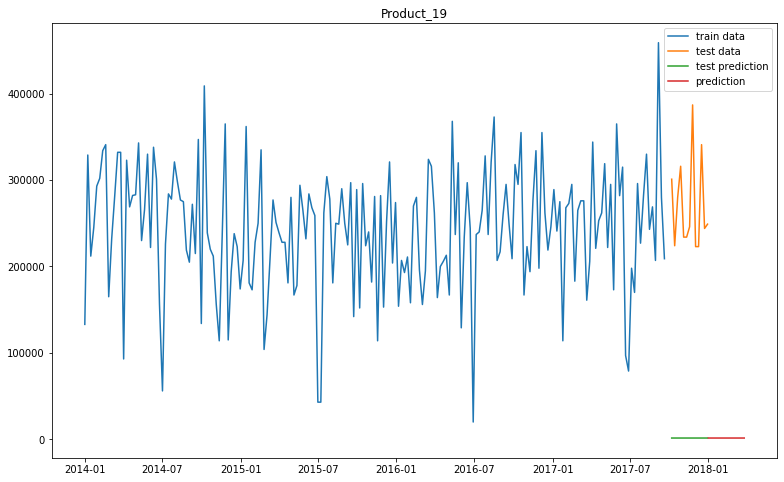

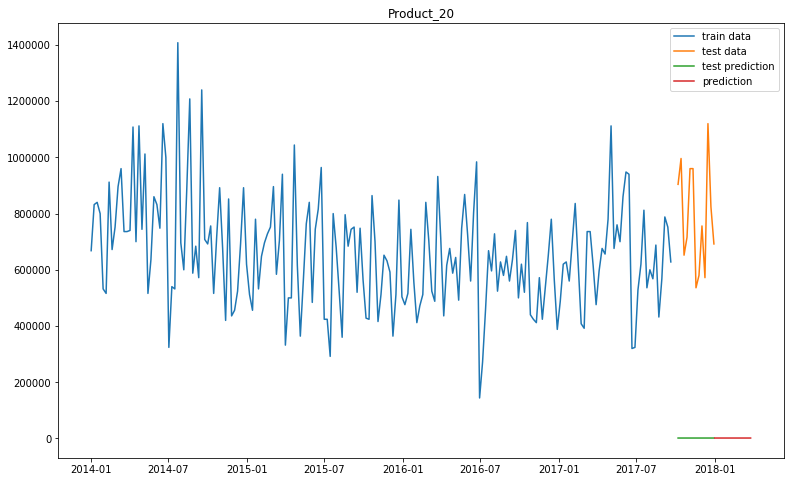

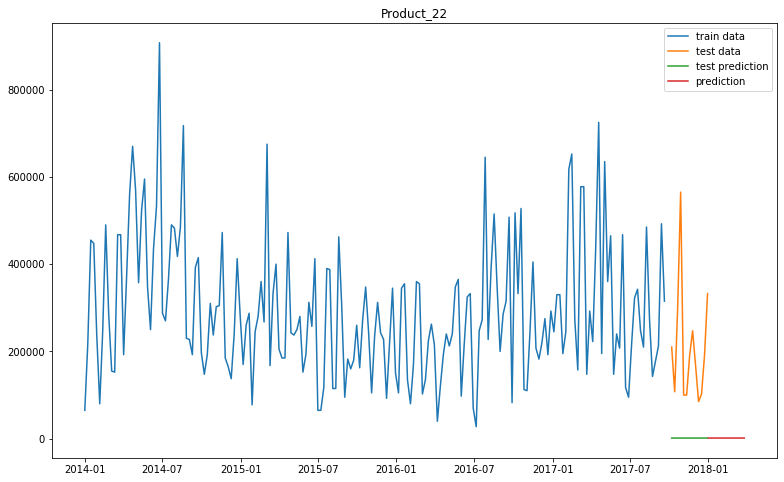

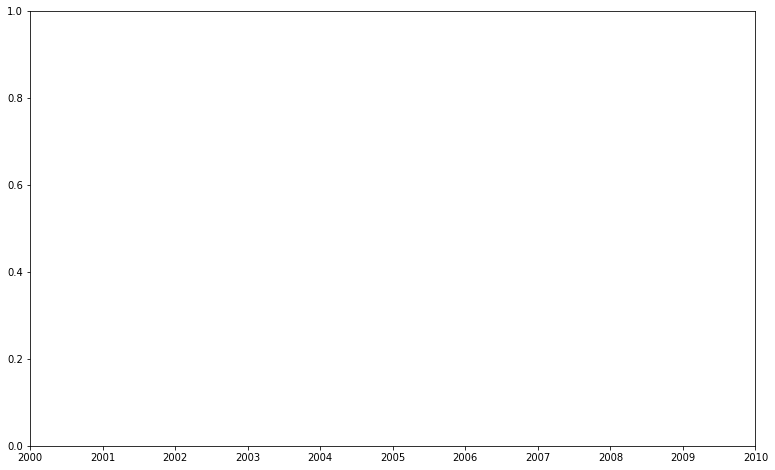

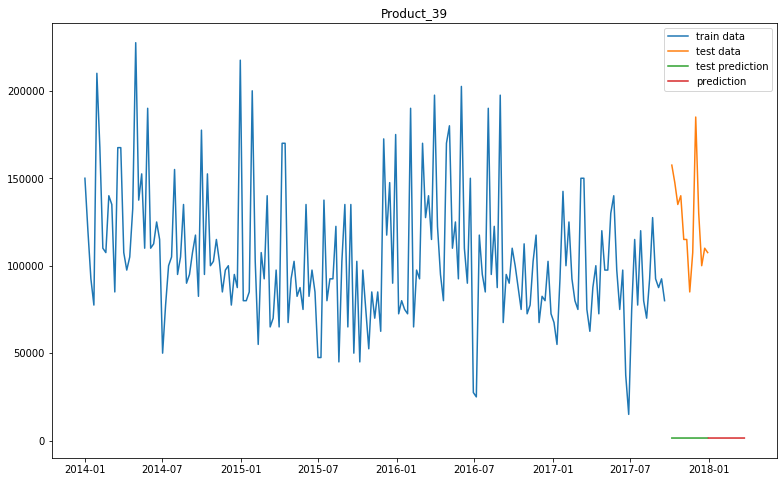

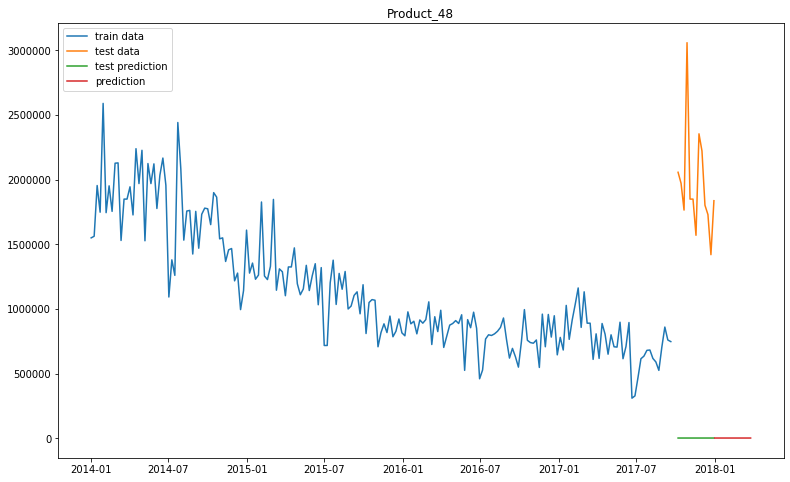

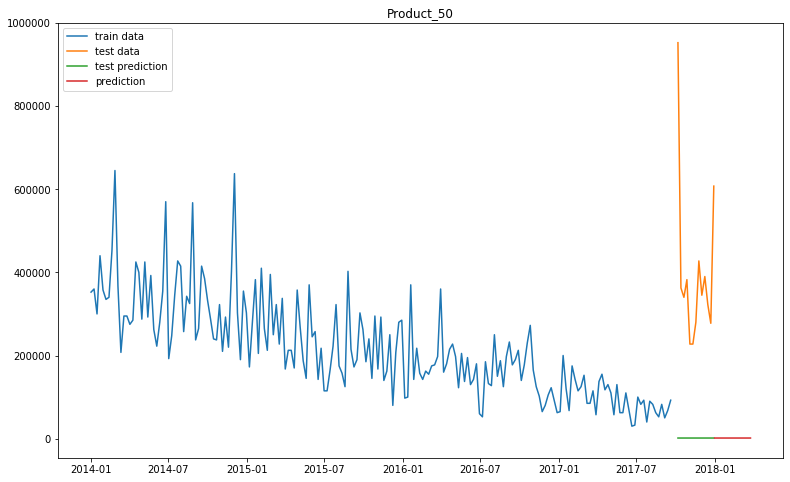

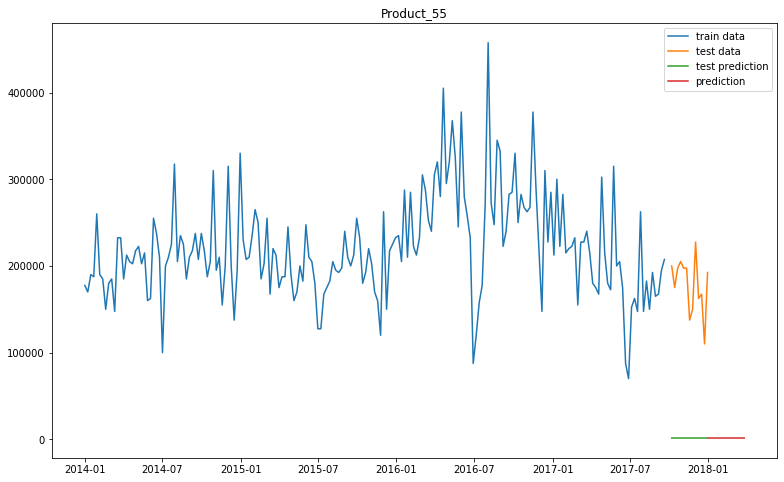

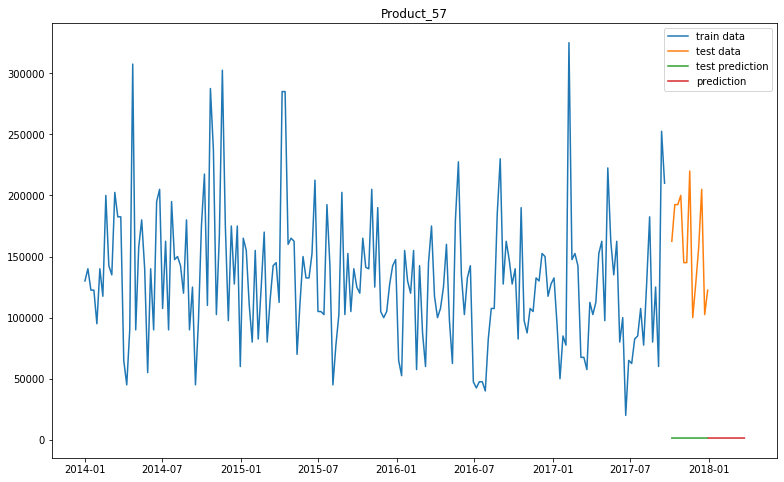

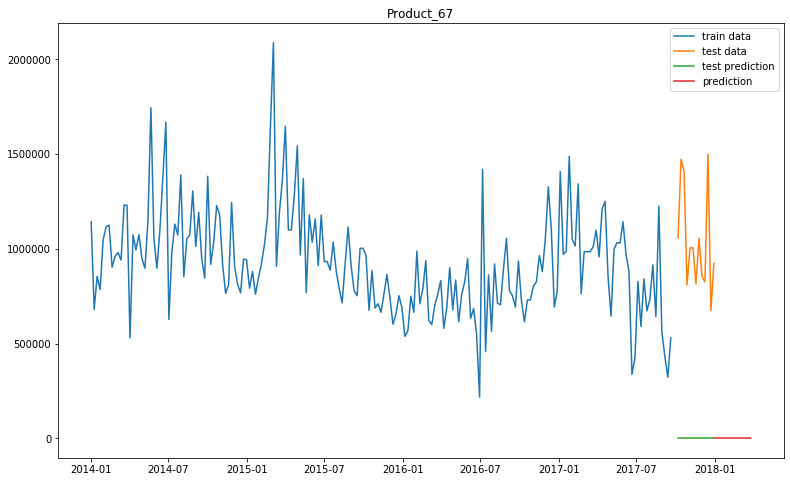

In [295]:
maes_ = {}
with torch.no_grad():
    for i,prod in enumerate(products):
        train = trains[i]
        test = tests[i]
        testpred = model(test.x[0:13].view(1,13,13))
        prediction = model(predictions[i].x.view(1,13,13))
        mae_ = mae(test.y[0:13].detach().numpy(), testpred.T.detach().numpy())
        maes_[idx2prod[i]] = mae_
        try:
            create_plot(i, train, test, testpred, prediction, save=True)
        except:
            pass
        
        
file = open("mae_norm_NOretrain.json", "w")
json.dump(maes_, file)
file.close()

# Loop over products no normalization

In [296]:
batch_size = 1

trains = []
tests = []
predictions = []

for prod in products:
    train_set = BillingDataset(product=prod, ttp='train')
    test_set = BillingDataset(product=prod, ttp='test')
    predict_set = BillingDataset(product=prod, ttp='predict')
    trains.append(train_set)
    tests.append(test_set)
    predictions.append(predict_set)
    
trains_loaders = [DataLoader(dataset=x, batch_size=batch_size, shuffle=False) for x in trains]
tests_loaders = [DataLoader(dataset=x, batch_size=batch_size, shuffle=False) for x in tests]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [307]:
input_length=13
output_size=13
learning_rate = 0.001
num_epochs = 20

maes = {}
model = TCN_(input_length, output_size, [1,2], 2, 0.1)
model.double()
for i,loader in enumerate(trains_loaders):
    
    
    train_TCN(model, loader, 
                            input_length=input_length,
                            output_size=output_size,
                            learning_rate=learning_rate,
                            num_epochs=num_epochs,
                            criterion=nn.MSELoss()
             )

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [80535792412.68947]
Epoch [1/20], Step [20/182], Loss: [70094145253.75726]
Epoch [1/20], Step [30/182], Loss: [76355309306.32376]
Epoch [1/20], Step [40/182], Loss: [54997720755.58968]
Epoch [1/20], Step [50/182], Loss: [49725547545.42425]
Epoch [1/20], Step [60/182], Loss: [47897234821.504715]
Epoch [1/20], Step [70/182], Loss: [52755325285.76526]
Epoch [1/20], Step [80/182], Loss: [49628653857.082855]
Epoch [1/20], Step [90/182], Loss: [37521227349.907196]
Epoch [1/20], Step [100/182], Loss: [31469102331.88402]
Epoch [1/20], Step [110/182], Loss: [11339558683.654253]
Epoch [1/20], Step [120/182], Loss: [7639841579.801733]
Epoch [1/20], Step [130/182], Loss: [14627873440.149437]
Epoch [1/20], Step [140/182], Loss: [9230326269.83356]
Epoch [1/20], Step [150/182], Loss: [3609806490.673644]
Epoch [1/20], Step [160/182], Loss: [8445412738.498917]
Epoch [1/20], Step [170/182], Loss: [17197074656.906494]
Epoch [1/20], Step [180/182], Loss: [6144312513.3605

Epoch [9/20], Step [50/182], Loss: [5024909560.607528]
Epoch [9/20], Step [60/182], Loss: [4343602458.884886]
Epoch [9/20], Step [70/182], Loss: [7636826211.980622]
Epoch [9/20], Step [80/182], Loss: [5390401069.134163]
Epoch [9/20], Step [90/182], Loss: [4477994741.698536]
Epoch [9/20], Step [100/182], Loss: [2955287077.54811]
Epoch [9/20], Step [110/182], Loss: [3664170683.745846]
Epoch [9/20], Step [120/182], Loss: [7735724540.961751]
Epoch [9/20], Step [130/182], Loss: [7697612883.952862]
Epoch [9/20], Step [140/182], Loss: [4340625849.236977]
Epoch [9/20], Step [150/182], Loss: [4414917769.646171]
Epoch [9/20], Step [160/182], Loss: [3927000002.018831]
Epoch [9/20], Step [170/182], Loss: [5495447232.326133]
Epoch [9/20], Step [180/182], Loss: [8516835819.132855]
Epoch [10/20], Step [10/182], Loss: [4346737582.154468]
Epoch [10/20], Step [20/182], Loss: [14143545288.929619]
Epoch [10/20], Step [30/182], Loss: [7710431488.425991]
Epoch [10/20], Step [40/182], Loss: [7248683747.24871

Epoch [17/20], Step [60/182], Loss: [3627996026.772001]
Epoch [17/20], Step [70/182], Loss: [7343404979.406091]
Epoch [17/20], Step [80/182], Loss: [5167493853.555774]
Epoch [17/20], Step [90/182], Loss: [4369458675.209209]
Epoch [17/20], Step [100/182], Loss: [2919064205.5873637]
Epoch [17/20], Step [110/182], Loss: [3106352440.6871405]
Epoch [17/20], Step [120/182], Loss: [7037983379.078414]
Epoch [17/20], Step [130/182], Loss: [6830700923.850034]
Epoch [17/20], Step [140/182], Loss: [3041276702.600804]
Epoch [17/20], Step [150/182], Loss: [3704384715.4462943]
Epoch [17/20], Step [160/182], Loss: [3648030991.954037]
Epoch [17/20], Step [170/182], Loss: [5115103649.858274]
Epoch [17/20], Step [180/182], Loss: [5741260847.704537]
Epoch [18/20], Step [10/182], Loss: [4441483396.986228]
Epoch [18/20], Step [20/182], Loss: [6212154064.951358]
Epoch [18/20], Step [30/182], Loss: [5406501392.864193]
Epoch [18/20], Step [40/182], Loss: [7309664558.551067]
Epoch [18/20], Step [50/182], Loss: 

Epoch [5/20], Step [80/182], Loss: [28269444811.33414]
Epoch [5/20], Step [90/182], Loss: [26286971943.611935]
Epoch [5/20], Step [100/182], Loss: [16650810852.82135]
Epoch [5/20], Step [110/182], Loss: [24330459848.691578]
Epoch [5/20], Step [120/182], Loss: [48870800983.05913]
Epoch [5/20], Step [130/182], Loss: [40766623981.84085]
Epoch [5/20], Step [140/182], Loss: [14374510748.353369]
Epoch [5/20], Step [150/182], Loss: [12366445684.558126]
Epoch [5/20], Step [160/182], Loss: [15751709652.759783]
Epoch [5/20], Step [170/182], Loss: [43164024881.174126]
Epoch [5/20], Step [180/182], Loss: [37199259325.27905]
Epoch [6/20], Step [10/182], Loss: [31037020877.366367]
Epoch [6/20], Step [20/182], Loss: [78250720513.02928]
Epoch [6/20], Step [30/182], Loss: [77167549873.3231]
Epoch [6/20], Step [40/182], Loss: [28239356756.2105]
Epoch [6/20], Step [50/182], Loss: [18291601274.15817]
Epoch [6/20], Step [60/182], Loss: [43184859164.28469]
Epoch [6/20], Step [70/182], Loss: [42029087223.781

Epoch [13/20], Step [130/182], Loss: [41036772767.82094]
Epoch [13/20], Step [140/182], Loss: [14771111740.868065]
Epoch [13/20], Step [150/182], Loss: [12366223568.905762]
Epoch [13/20], Step [160/182], Loss: [15749903800.478825]
Epoch [13/20], Step [170/182], Loss: [42878562444.67259]
Epoch [13/20], Step [180/182], Loss: [37227484525.34405]
Epoch [14/20], Step [10/182], Loss: [30975564290.086082]
Epoch [14/20], Step [20/182], Loss: [78248770478.57065]
Epoch [14/20], Step [30/182], Loss: [77290837583.39594]
Epoch [14/20], Step [40/182], Loss: [28018622895.920406]
Epoch [14/20], Step [50/182], Loss: [18299259471.927063]
Epoch [14/20], Step [60/182], Loss: [43177222304.009]
Epoch [14/20], Step [70/182], Loss: [41973997751.444664]
Epoch [14/20], Step [80/182], Loss: [28955875362.64137]
Epoch [14/20], Step [90/182], Loss: [26024405786.74285]
Epoch [14/20], Step [100/182], Loss: [16777615897.625593]
Epoch [14/20], Step [110/182], Loss: [24199706103.489426]
Epoch [14/20], Step [120/182], Lo

Epoch [1/20], Step [150/182], Loss: [6622650153.650561]
Epoch [1/20], Step [160/182], Loss: [33072439045.803665]
Epoch [1/20], Step [170/182], Loss: [33102713611.63107]
Epoch [1/20], Step [180/182], Loss: [14199428263.211325]
Epoch [2/20], Step [10/182], Loss: [27321737558.918587]
Epoch [2/20], Step [20/182], Loss: [29597263593.735752]
Epoch [2/20], Step [30/182], Loss: [26681585744.16413]
Epoch [2/20], Step [40/182], Loss: [16108299077.144907]
Epoch [2/20], Step [50/182], Loss: [22891270027.608295]
Epoch [2/20], Step [60/182], Loss: [19851493662.03688]
Epoch [2/20], Step [70/182], Loss: [11088487804.107718]
Epoch [2/20], Step [80/182], Loss: [15609832682.720175]
Epoch [2/20], Step [90/182], Loss: [5264618286.830438]
Epoch [2/20], Step [100/182], Loss: [10304636996.462976]
Epoch [2/20], Step [110/182], Loss: [9236858597.817362]
Epoch [2/20], Step [120/182], Loss: [11617352760.10109]
Epoch [2/20], Step [130/182], Loss: [27250615178.94477]
Epoch [2/20], Step [140/182], Loss: [24404547000

Epoch [10/20], Step [20/182], Loss: [29901994615.036057]
Epoch [10/20], Step [30/182], Loss: [26706063849.656433]
Epoch [10/20], Step [40/182], Loss: [16068751111.135159]
Epoch [10/20], Step [50/182], Loss: [22275047627.20658]
Epoch [10/20], Step [60/182], Loss: [19604452008.69044]
Epoch [10/20], Step [70/182], Loss: [11096609955.073215]
Epoch [10/20], Step [80/182], Loss: [15632671920.57698]
Epoch [10/20], Step [90/182], Loss: [5271120171.733502]
Epoch [10/20], Step [100/182], Loss: [10269055286.413944]
Epoch [10/20], Step [110/182], Loss: [9156262989.65699]
Epoch [10/20], Step [120/182], Loss: [11635720246.406345]
Epoch [10/20], Step [130/182], Loss: [27212651595.140415]
Epoch [10/20], Step [140/182], Loss: [24319653542.621967]
Epoch [10/20], Step [150/182], Loss: [6239914563.750208]
Epoch [10/20], Step [160/182], Loss: [32639824403.339886]
Epoch [10/20], Step [170/182], Loss: [32960198380.933826]
Epoch [10/20], Step [180/182], Loss: [14493692474.324713]
Epoch [11/20], Step [10/182],

Epoch [18/20], Step [50/182], Loss: [22634027561.423275]
Epoch [18/20], Step [60/182], Loss: [19525921816.170654]
Epoch [18/20], Step [70/182], Loss: [11108685678.643877]
Epoch [18/20], Step [80/182], Loss: [15647270654.37014]
Epoch [18/20], Step [90/182], Loss: [5273783522.935514]
Epoch [18/20], Step [100/182], Loss: [10265769110.435139]
Epoch [18/20], Step [110/182], Loss: [9125959421.094206]
Epoch [18/20], Step [120/182], Loss: [11643933979.756443]
Epoch [18/20], Step [130/182], Loss: [27167088955.844234]
Epoch [18/20], Step [140/182], Loss: [24267713448.287056]
Epoch [18/20], Step [150/182], Loss: [6263539790.518947]
Epoch [18/20], Step [160/182], Loss: [32464317256.507614]
Epoch [18/20], Step [170/182], Loss: [33007395917.86262]
Epoch [18/20], Step [180/182], Loss: [14584501248.23547]
Epoch [19/20], Step [10/182], Loss: [27339790653.075207]
Epoch [19/20], Step [20/182], Loss: [29776315685.35401]
Epoch [19/20], Step [30/182], Loss: [26636769382.535145]
Epoch [19/20], Step [40/182],

Epoch [6/20], Step [70/180], Loss: [6950174978.901875]
Epoch [6/20], Step [80/180], Loss: [4164363319.465275]
Epoch [6/20], Step [90/180], Loss: [5086082351.763658]
Epoch [6/20], Step [100/180], Loss: [4352012971.48325]
Epoch [6/20], Step [110/180], Loss: [6588932104.452379]
Epoch [6/20], Step [120/180], Loss: [16422613703.03546]
Epoch [6/20], Step [130/180], Loss: [16121592940.438824]
Epoch [6/20], Step [140/180], Loss: [5032787819.4286375]
Epoch [6/20], Step [150/180], Loss: [6257204901.83949]
Epoch [6/20], Step [160/180], Loss: [13787140601.994892]
Epoch [6/20], Step [170/180], Loss: [9435695349.641281]
Epoch [6/20], Step [180/180], Loss: [10671132904.816528]
Epoch [7/20], Step [10/180], Loss: [7448081463.245457]
Epoch [7/20], Step [20/180], Loss: [11706339124.58441]
Epoch [7/20], Step [30/180], Loss: [5744368476.5777025]
Epoch [7/20], Step [40/180], Loss: [2233078501.685982]
Epoch [7/20], Step [50/180], Loss: [4258394133.077707]
Epoch [7/20], Step [60/180], Loss: [6739185649.677709

Epoch [2/20], Step [100/182], Loss: [2153834829.9655285]
Epoch [2/20], Step [110/182], Loss: [1727521626.0172675]
Epoch [2/20], Step [120/182], Loss: [2972780186.7650614]
Epoch [2/20], Step [130/182], Loss: [2594175296.000415]
Epoch [2/20], Step [140/182], Loss: [1044004337.6279261]
Epoch [2/20], Step [150/182], Loss: [522079080.82210743]
Epoch [2/20], Step [160/182], Loss: [840371234.841893]
Epoch [2/20], Step [170/182], Loss: [710384718.6464629]
Epoch [2/20], Step [180/182], Loss: [916022225.9285939]
Epoch [3/20], Step [10/182], Loss: [1539383066.7824345]
Epoch [3/20], Step [20/182], Loss: [1164921420.0665874]
Epoch [3/20], Step [30/182], Loss: [803655227.589205]
Epoch [3/20], Step [40/182], Loss: [729215236.7235867]
Epoch [3/20], Step [50/182], Loss: [2240231863.423737]
Epoch [3/20], Step [60/182], Loss: [1251291709.3274379]
Epoch [3/20], Step [70/182], Loss: [718610710.971074]
Epoch [3/20], Step [80/182], Loss: [1069515902.4681994]
Epoch [3/20], Step [90/182], Loss: [1289214835.618

Epoch [18/20], Step [130/182], Loss: [2607320657.404479]
Epoch [18/20], Step [140/182], Loss: [1044899593.040648]
Epoch [18/20], Step [150/182], Loss: [524746647.9566019]
Epoch [18/20], Step [160/182], Loss: [842089268.4116236]
Epoch [18/20], Step [170/182], Loss: [710356315.0493536]
Epoch [18/20], Step [180/182], Loss: [926717512.3889289]
Epoch [19/20], Step [10/182], Loss: [1538400765.849681]
Epoch [19/20], Step [20/182], Loss: [1165258416.704954]
Epoch [19/20], Step [30/182], Loss: [806726935.6930499]
Epoch [19/20], Step [40/182], Loss: [733158826.7381973]
Epoch [19/20], Step [50/182], Loss: [2233467888.2093444]
Epoch [19/20], Step [60/182], Loss: [1253102821.4968824]
Epoch [19/20], Step [70/182], Loss: [720151279.2304759]
Epoch [19/20], Step [80/182], Loss: [1067220221.8984135]
Epoch [19/20], Step [90/182], Loss: [1274097093.8994632]
Epoch [19/20], Step [100/182], Loss: [2183231144.1948986]
Epoch [19/20], Step [110/182], Loss: [1703969300.1017056]
Epoch [19/20], Step [120/182], Los

Epoch [6/20], Step [150/182], Loss: [53351693647.47317]
Epoch [6/20], Step [160/182], Loss: [78991059815.92537]
Epoch [6/20], Step [170/182], Loss: [27111569032.752438]
Epoch [6/20], Step [180/182], Loss: [23752367380.376945]
Epoch [7/20], Step [10/182], Loss: [52873352019.3165]
Epoch [7/20], Step [20/182], Loss: [175500038408.48022]
Epoch [7/20], Step [30/182], Loss: [65589909454.41611]
Epoch [7/20], Step [40/182], Loss: [73477518641.9103]
Epoch [7/20], Step [50/182], Loss: [68444674138.11111]
Epoch [7/20], Step [60/182], Loss: [36131036257.93589]
Epoch [7/20], Step [70/182], Loss: [56268499474.89051]
Epoch [7/20], Step [80/182], Loss: [33931675654.418148]
Epoch [7/20], Step [90/182], Loss: [30494036754.326702]
Epoch [7/20], Step [100/182], Loss: [6589493813.064604]
Epoch [7/20], Step [110/182], Loss: [9848093108.455984]
Epoch [7/20], Step [120/182], Loss: [29260008675.19575]
Epoch [7/20], Step [130/182], Loss: [17077866081.07794]
Epoch [7/20], Step [140/182], Loss: [17200970204.91092

Epoch [15/20], Step [20/182], Loss: [173016718599.2499]
Epoch [15/20], Step [30/182], Loss: [65546715911.27883]
Epoch [15/20], Step [40/182], Loss: [73782726872.03436]
Epoch [15/20], Step [50/182], Loss: [67129301586.750854]
Epoch [15/20], Step [60/182], Loss: [36192403892.105286]
Epoch [15/20], Step [70/182], Loss: [56157259231.114204]
Epoch [15/20], Step [80/182], Loss: [34468232264.127914]
Epoch [15/20], Step [90/182], Loss: [30886531432.868725]
Epoch [15/20], Step [100/182], Loss: [6604847613.599929]
Epoch [15/20], Step [110/182], Loss: [9616469359.103672]
Epoch [15/20], Step [120/182], Loss: [29397861780.01655]
Epoch [15/20], Step [130/182], Loss: [17070544688.65382]
Epoch [15/20], Step [140/182], Loss: [17342683452.100353]
Epoch [15/20], Step [150/182], Loss: [52519227449.83672]
Epoch [15/20], Step [160/182], Loss: [78739101193.11754]
Epoch [15/20], Step [170/182], Loss: [27095198484.190285]
Epoch [15/20], Step [180/182], Loss: [23701797470.725464]
Epoch [16/20], Step [10/182], L

Epoch [3/20], Step [30/182], Loss: [8356418377.742808]
Epoch [3/20], Step [40/182], Loss: [12496659663.318203]
Epoch [3/20], Step [50/182], Loss: [6101511857.257043]
Epoch [3/20], Step [60/182], Loss: [5698135914.68807]
Epoch [3/20], Step [70/182], Loss: [7210475279.836853]
Epoch [3/20], Step [80/182], Loss: [6825134911.222022]
Epoch [3/20], Step [90/182], Loss: [5318529566.978334]
Epoch [3/20], Step [100/182], Loss: [7240525118.094496]
Epoch [3/20], Step [110/182], Loss: [3204923719.4051976]
Epoch [3/20], Step [120/182], Loss: [2923499352.7484226]
Epoch [3/20], Step [130/182], Loss: [3247524590.3854804]
Epoch [3/20], Step [140/182], Loss: [3012108489.7928905]
Epoch [3/20], Step [150/182], Loss: [3175618772.6066155]
Epoch [3/20], Step [160/182], Loss: [1771445596.2512083]
Epoch [3/20], Step [170/182], Loss: [1464567819.303164]
Epoch [3/20], Step [180/182], Loss: [625210533.9422]
Epoch [4/20], Step [10/182], Loss: [4759146334.295433]
Epoch [4/20], Step [20/182], Loss: [10243903124.92648

Epoch [11/20], Step [90/182], Loss: [5440791641.710242]
Epoch [11/20], Step [100/182], Loss: [7056698278.532874]
Epoch [11/20], Step [110/182], Loss: [2972103070.4740086]
Epoch [11/20], Step [120/182], Loss: [3011254622.0440726]
Epoch [11/20], Step [130/182], Loss: [3197704948.221744]
Epoch [11/20], Step [140/182], Loss: [3014524726.1261277]
Epoch [11/20], Step [150/182], Loss: [3062814812.329647]
Epoch [11/20], Step [160/182], Loss: [1869837758.0079823]
Epoch [11/20], Step [170/182], Loss: [1483179360.4393528]
Epoch [11/20], Step [180/182], Loss: [624696750.0124792]
Epoch [12/20], Step [10/182], Loss: [4684318982.429737]
Epoch [12/20], Step [20/182], Loss: [10284171931.909828]
Epoch [12/20], Step [30/182], Loss: [8323600338.648796]
Epoch [12/20], Step [40/182], Loss: [12465824255.294064]
Epoch [12/20], Step [50/182], Loss: [6097337267.340603]
Epoch [12/20], Step [60/182], Loss: [5611988429.055686]
Epoch [12/20], Step [70/182], Loss: [6707487456.424325]
Epoch [12/20], Step [80/182], Lo

Epoch [19/20], Step [120/182], Loss: [3011050768.8891783]
Epoch [19/20], Step [130/182], Loss: [3193268833.407803]
Epoch [19/20], Step [140/182], Loss: [3012555949.0989504]
Epoch [19/20], Step [150/182], Loss: [2972724768.648552]
Epoch [19/20], Step [160/182], Loss: [1901027054.4439113]
Epoch [19/20], Step [170/182], Loss: [1487735679.3667383]
Epoch [19/20], Step [180/182], Loss: [624869841.5365182]
Epoch [20/20], Step [10/182], Loss: [4685928521.654387]
Epoch [20/20], Step [20/182], Loss: [10297943920.029022]
Epoch [20/20], Step [30/182], Loss: [8323652435.285027]
Epoch [20/20], Step [40/182], Loss: [12463604063.65239]
Epoch [20/20], Step [50/182], Loss: [6111659274.628616]
Epoch [20/20], Step [60/182], Loss: [5632773193.759496]
Epoch [20/20], Step [70/182], Loss: [6596733439.104941]
Epoch [20/20], Step [80/182], Loss: [7113570562.735576]
Epoch [20/20], Step [90/182], Loss: [5474860059.829844]
Epoch [20/20], Step [100/182], Loss: [7009419635.636719]
Epoch [20/20], Step [110/182], Loss

Epoch [7/20], Step [160/182], Loss: [1549349604.9376168]
Epoch [7/20], Step [170/182], Loss: [3167591815.716795]
Epoch [7/20], Step [180/182], Loss: [2523168575.8964777]
Epoch [8/20], Step [10/182], Loss: [706206278.7304251]
Epoch [8/20], Step [20/182], Loss: [2528226928.72685]
Epoch [8/20], Step [30/182], Loss: [1028507089.5170411]
Epoch [8/20], Step [40/182], Loss: [2447089853.847823]
Epoch [8/20], Step [50/182], Loss: [2122616142.599133]
Epoch [8/20], Step [60/182], Loss: [1606108258.809037]
Epoch [8/20], Step [70/182], Loss: [1309248914.3888373]
Epoch [8/20], Step [80/182], Loss: [962039782.8355294]
Epoch [8/20], Step [90/182], Loss: [1590683069.100043]
Epoch [8/20], Step [100/182], Loss: [2426574379.9406757]
Epoch [8/20], Step [110/182], Loss: [2766152211.599121]
Epoch [8/20], Step [120/182], Loss: [7965918577.365246]
Epoch [8/20], Step [130/182], Loss: [9588737540.383669]
Epoch [8/20], Step [140/182], Loss: [1811434276.2717144]
Epoch [8/20], Step [150/182], Loss: [3204411723.7189

Epoch [15/20], Step [180/182], Loss: [2536278027.9888806]
Epoch [16/20], Step [10/182], Loss: [711896385.6538115]
Epoch [16/20], Step [20/182], Loss: [2533581554.8115444]
Epoch [16/20], Step [30/182], Loss: [1029392548.2098978]
Epoch [16/20], Step [40/182], Loss: [2450306402.7858]
Epoch [16/20], Step [50/182], Loss: [2135778615.5418706]
Epoch [16/20], Step [60/182], Loss: [1577989003.2291744]
Epoch [16/20], Step [70/182], Loss: [1322742329.0061634]
Epoch [16/20], Step [80/182], Loss: [952494130.3403313]
Epoch [16/20], Step [90/182], Loss: [1597675697.5871613]
Epoch [16/20], Step [100/182], Loss: [2422595904.1788487]
Epoch [16/20], Step [110/182], Loss: [2744935606.602104]
Epoch [16/20], Step [120/182], Loss: [7950478444.5898075]
Epoch [16/20], Step [130/182], Loss: [9638143003.146803]
Epoch [16/20], Step [140/182], Loss: [1821832414.5875933]
Epoch [16/20], Step [150/182], Loss: [3201799118.7291512]
Epoch [16/20], Step [160/182], Loss: [1544631921.6082335]
Epoch [16/20], Step [170/182],

Epoch [4/20], Step [20/182], Loss: [1984269316.4279966]
Epoch [4/20], Step [30/182], Loss: [2381027296.5761175]
Epoch [4/20], Step [40/182], Loss: [4030945965.721666]
Epoch [4/20], Step [50/182], Loss: [1758559336.1350539]
Epoch [4/20], Step [60/182], Loss: [4008452966.0021906]
Epoch [4/20], Step [70/182], Loss: [1461204911.1341088]
Epoch [4/20], Step [80/182], Loss: [1755640981.0200436]
Epoch [4/20], Step [90/182], Loss: [1045644870.7248055]
Epoch [4/20], Step [100/182], Loss: [1643757038.0428026]
Epoch [4/20], Step [110/182], Loss: [1319259373.8534687]
Epoch [4/20], Step [120/182], Loss: [2595262359.004602]
Epoch [4/20], Step [130/182], Loss: [3583656944.791444]
Epoch [4/20], Step [140/182], Loss: [2160302471.8581]
Epoch [4/20], Step [150/182], Loss: [848841900.250797]
Epoch [4/20], Step [160/182], Loss: [4821813144.1250105]
Epoch [4/20], Step [170/182], Loss: [2482964163.9763813]
Epoch [4/20], Step [180/182], Loss: [1414376690.8284574]
Epoch [5/20], Step [10/182], Loss: [5601899343.

Epoch [12/20], Step [70/182], Loss: [1461764674.6243086]
Epoch [12/20], Step [80/182], Loss: [1756522027.0545092]
Epoch [12/20], Step [90/182], Loss: [1021658026.7493254]
Epoch [12/20], Step [100/182], Loss: [1611445003.926109]
Epoch [12/20], Step [110/182], Loss: [1303633465.6333272]
Epoch [12/20], Step [120/182], Loss: [2590957665.072795]
Epoch [12/20], Step [130/182], Loss: [3593354119.0155454]
Epoch [12/20], Step [140/182], Loss: [2184929948.950132]
Epoch [12/20], Step [150/182], Loss: [847302717.432288]
Epoch [12/20], Step [160/182], Loss: [4808713797.528982]
Epoch [12/20], Step [170/182], Loss: [2483062532.599592]
Epoch [12/20], Step [180/182], Loss: [1406337601.9560788]
Epoch [13/20], Step [10/182], Loss: [5540141509.844014]
Epoch [13/20], Step [20/182], Loss: [1987850867.695704]
Epoch [13/20], Step [30/182], Loss: [2382204082.842772]
Epoch [13/20], Step [40/182], Loss: [4036466626.2530293]
Epoch [13/20], Step [50/182], Loss: [1773013652.3864758]
Epoch [13/20], Step [60/182], Lo

Epoch [20/20], Step [70/182], Loss: [1463540000.8067272]
Epoch [20/20], Step [80/182], Loss: [1756533268.815914]
Epoch [20/20], Step [90/182], Loss: [1041731750.7791682]
Epoch [20/20], Step [100/182], Loss: [1637045353.2265985]
Epoch [20/20], Step [110/182], Loss: [1299591707.358606]
Epoch [20/20], Step [120/182], Loss: [2586288405.4978647]
Epoch [20/20], Step [130/182], Loss: [3646994355.4868917]
Epoch [20/20], Step [140/182], Loss: [2174755613.442287]
Epoch [20/20], Step [150/182], Loss: [841025001.6956733]
Epoch [20/20], Step [160/182], Loss: [4794926240.118567]
Epoch [20/20], Step [170/182], Loss: [2463873769.0774193]
Epoch [20/20], Step [180/182], Loss: [1448161075.1861374]
Finished training
Epoch [1/20], Step [10/182], Loss: [158769211973.78702]
Epoch [1/20], Step [20/182], Loss: [103819324967.56377]
Epoch [1/20], Step [30/182], Loss: [32112935120.202652]
Epoch [1/20], Step [40/182], Loss: [42549235657.80603]
Epoch [1/20], Step [50/182], Loss: [142030080774.35425]
Epoch [1/20], S

Epoch [8/20], Step [100/182], Loss: [13817951241.454891]
Epoch [8/20], Step [110/182], Loss: [15640343563.616589]
Epoch [8/20], Step [120/182], Loss: [70727646429.2972]
Epoch [8/20], Step [130/182], Loss: [87584393135.87045]
Epoch [8/20], Step [140/182], Loss: [28132448481.299263]
Epoch [8/20], Step [150/182], Loss: [68685279208.98439]
Epoch [8/20], Step [160/182], Loss: [33335539910.707188]
Epoch [8/20], Step [170/182], Loss: [56979073029.09692]
Epoch [8/20], Step [180/182], Loss: [53024763749.54631]
Epoch [9/20], Step [10/182], Loss: [133727547871.68126]
Epoch [9/20], Step [20/182], Loss: [92488116327.428]
Epoch [9/20], Step [30/182], Loss: [37236514026.777954]
Epoch [9/20], Step [40/182], Loss: [52424885336.02798]
Epoch [9/20], Step [50/182], Loss: [141983843156.4712]
Epoch [9/20], Step [60/182], Loss: [175420687701.25198]
Epoch [9/20], Step [70/182], Loss: [44494186353.08152]
Epoch [9/20], Step [80/182], Loss: [32189140607.385933]
Epoch [9/20], Step [90/182], Loss: [21762737581.272

Epoch [16/20], Step [150/182], Loss: [69797955853.15727]
Epoch [16/20], Step [160/182], Loss: [33006668904.362057]
Epoch [16/20], Step [170/182], Loss: [56708403348.59097]
Epoch [16/20], Step [180/182], Loss: [52990647395.383286]
Epoch [17/20], Step [10/182], Loss: [130175176874.35669]
Epoch [17/20], Step [20/182], Loss: [92482991091.3532]
Epoch [17/20], Step [30/182], Loss: [37290682414.05816]
Epoch [17/20], Step [40/182], Loss: [52549064484.46043]
Epoch [17/20], Step [50/182], Loss: [142132836689.29144]
Epoch [17/20], Step [60/182], Loss: [175245276123.79218]
Epoch [17/20], Step [70/182], Loss: [43965979798.97948]
Epoch [17/20], Step [80/182], Loss: [32565597718.538914]
Epoch [17/20], Step [90/182], Loss: [22244437502.21445]
Epoch [17/20], Step [100/182], Loss: [13904532795.920006]
Epoch [17/20], Step [110/182], Loss: [15665241157.298336]
Epoch [17/20], Step [120/182], Loss: [70737713294.99773]
Epoch [17/20], Step [130/182], Loss: [87728087686.01176]
Epoch [17/20], Step [140/182], Lo

(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)
(13, 1)


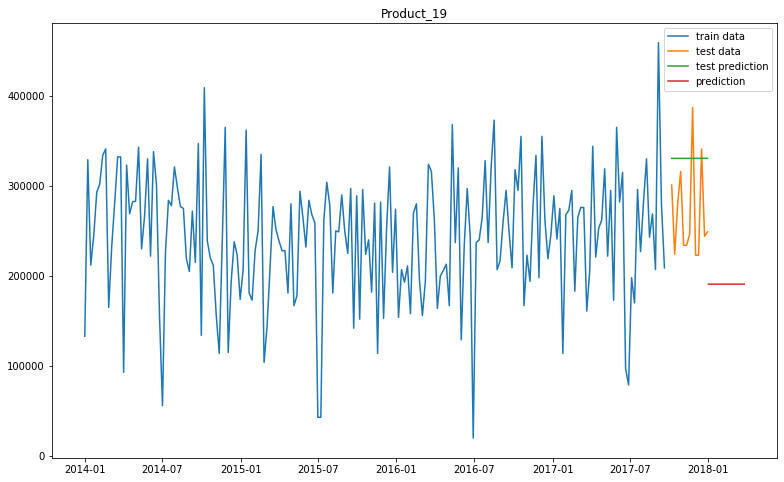

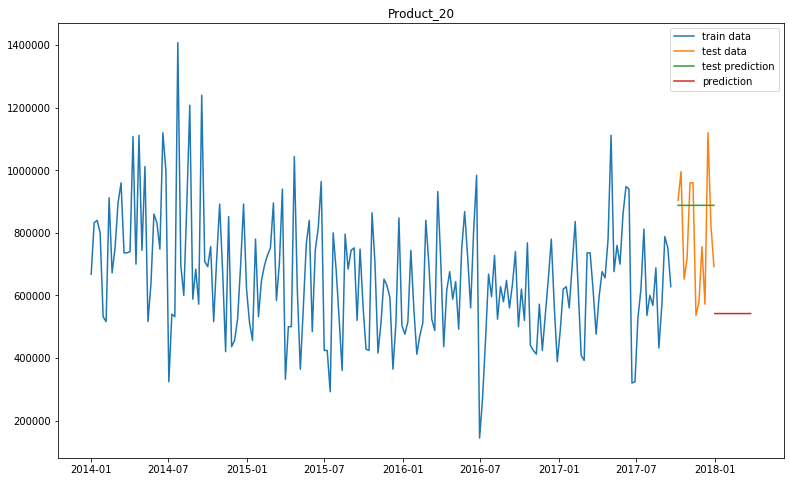

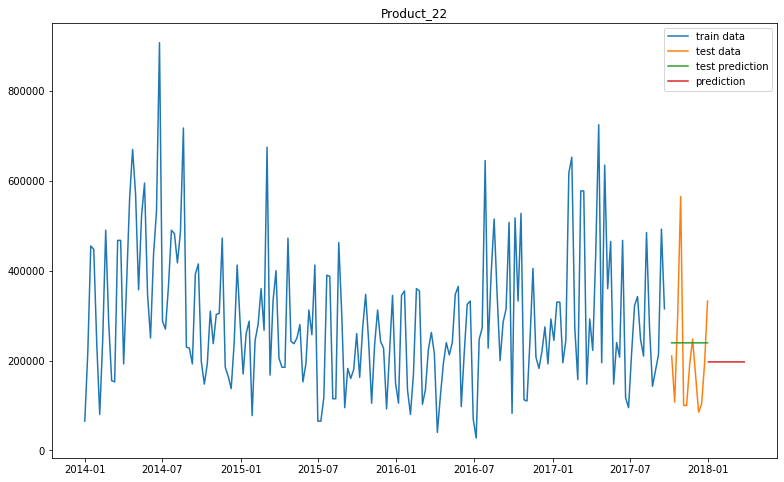

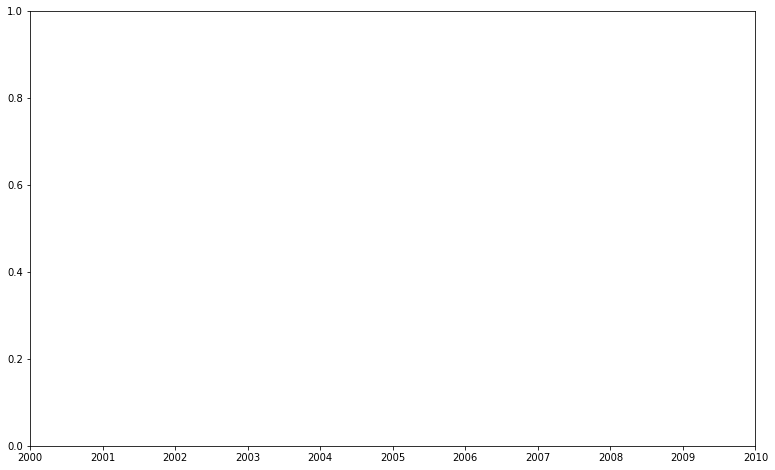

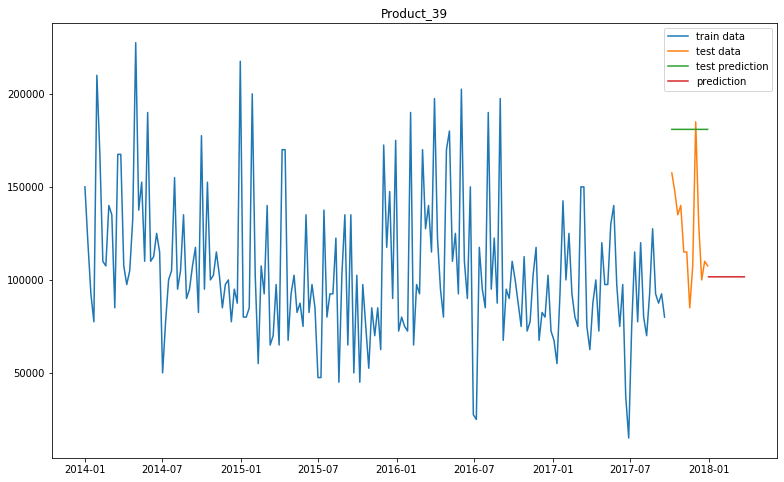

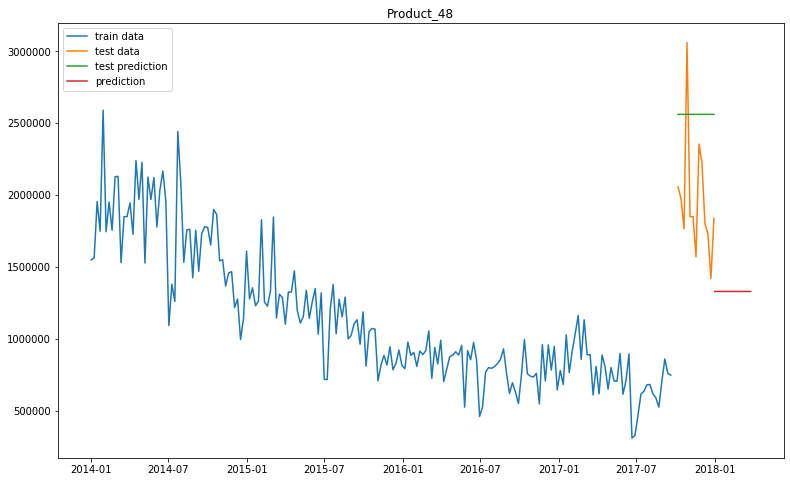

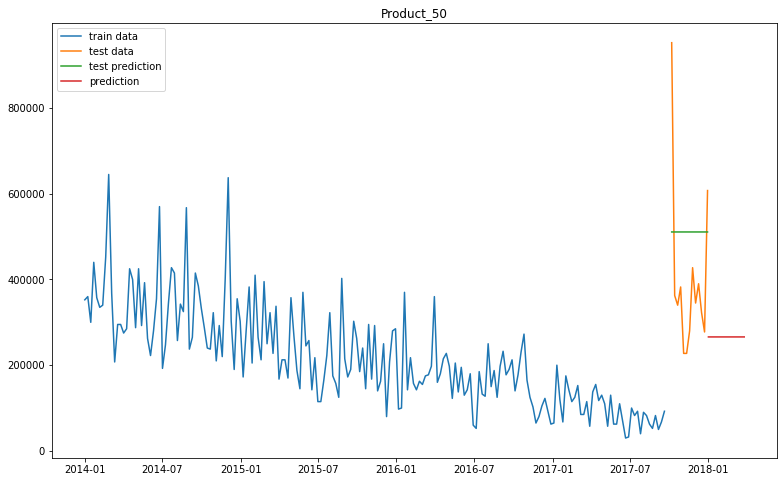

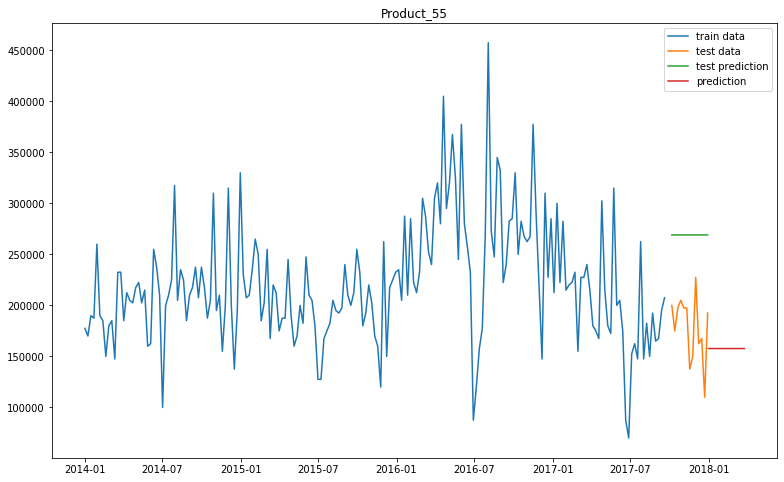

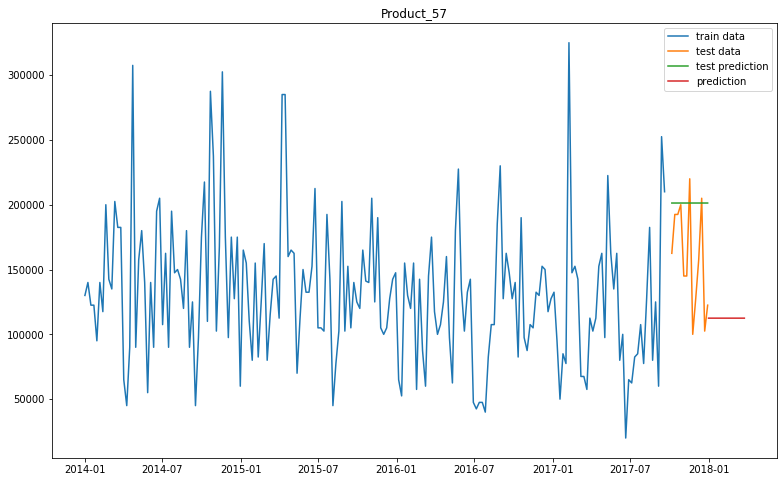

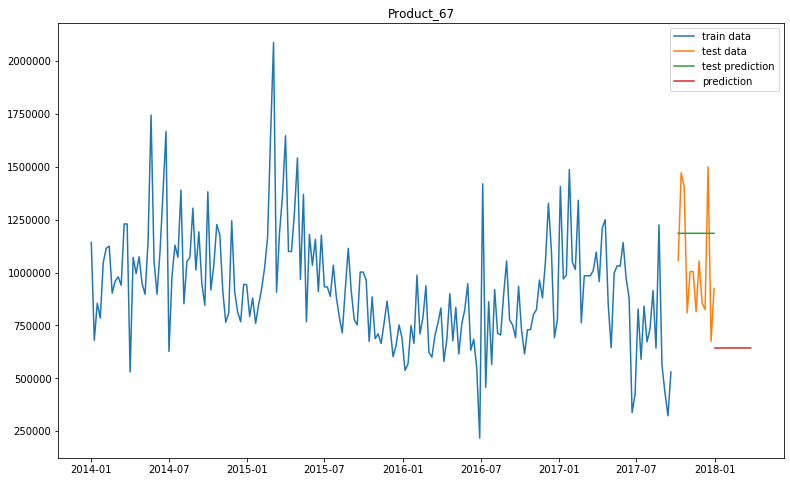

In [308]:
maes = {}
with torch.no_grad():
    for i,prod in enumerate(products):
        train = trains[i]
        test = tests[i]
        testpred = model(test.x[0:13].view(1,13,13))
        prediction = model(predictions[i].x.view(1,13,13))
        mae_ = mae(test.y[0:13].detach().numpy(), testpred.T.detach().numpy())
        maes[idx2prod[i]] = mae_
        try:
            create_plot(i, train, test, testpred, prediction, save=True)
        except:
            pass
        
file = open("mae_NOnorm_NOretrain.json", "w")
json.dump(maes, file)
file.close()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [65760453202.789444]
Epoch [1/20], Step [20/182], Loss: [5948565734.714581]
Epoch [1/20], Step [30/182], Loss: [4482179150.456023]
Epoch [1/20], Step [40/182], Loss: [7635331983.261005]
Epoch [1/20], Step [50/182], Loss: [4657444990.469161]
Epoch [1/20], Step [60/182], Loss: [16319707184.769606]
Epoch [1/20], Step [70/182], Loss: [9943836952.116598]
Epoch [1/20], Step [80/182], Loss: [5187082896.570563]
Epoch [1/20], Step [90/182], Loss: [4913127037.3155]
Epoch [1/20], Step [100/182], Loss: [3163829070.392212]
Epoch [1/20], Step [110/182], Loss: [3616338408.4502125]
Epoch [1/20], Step [120/182], Loss: [7308026294.318273]
Epoch [1/20], Step [130/182], Loss: [7593959371.28899]
Epoch [1/20], Step [140/182], Loss: [3041637681.9678984]
Epoch [1/20], Step [150/182], Loss: [3700396942.1765366]
Epoch [1/20], Step [160/182], Loss: [3665302766.1616383]
Epoch [1/20], Step [170/182], Loss: [5283949875.320997]
Epoch [1/20], Step [180/182], Loss: [5991906209.679538

Epoch [9/20], Step [50/182], Loss: [4653780197.693596]
Epoch [9/20], Step [60/182], Loss: [3646455905.77883]
Epoch [9/20], Step [70/182], Loss: [7338101888.523862]
Epoch [9/20], Step [80/182], Loss: [5173777703.8899]
Epoch [9/20], Step [90/182], Loss: [4224186273.8519278]
Epoch [9/20], Step [100/182], Loss: [2917711139.1617036]
Epoch [9/20], Step [110/182], Loss: [3108827374.8178463]
Epoch [9/20], Step [120/182], Loss: [6994528745.245207]
Epoch [9/20], Step [130/182], Loss: [6605179435.781927]
Epoch [9/20], Step [140/182], Loss: [3304004416.2894974]
Epoch [9/20], Step [150/182], Loss: [3952278893.7918534]
Epoch [9/20], Step [160/182], Loss: [3654076621.5795712]
Epoch [9/20], Step [170/182], Loss: [5103702236.139864]
Epoch [9/20], Step [180/182], Loss: [5752028286.574198]
Epoch [10/20], Step [10/182], Loss: [4299183773.692245]
Epoch [10/20], Step [20/182], Loss: [5746490181.16017]
Epoch [10/20], Step [30/182], Loss: [4692347642.585794]
Epoch [10/20], Step [40/182], Loss: [7303108362.155

Epoch [17/20], Step [60/182], Loss: [3616190308.162001]
Epoch [17/20], Step [70/182], Loss: [7323387871.255716]
Epoch [17/20], Step [80/182], Loss: [5101648850.501463]
Epoch [17/20], Step [90/182], Loss: [4095835229.5625534]
Epoch [17/20], Step [100/182], Loss: [2874087569.454669]
Epoch [17/20], Step [110/182], Loss: [3130527027.876936]
Epoch [17/20], Step [120/182], Loss: [6995161652.135683]
Epoch [17/20], Step [130/182], Loss: [6619382056.424639]
Epoch [17/20], Step [140/182], Loss: [3636060793.5861363]
Epoch [17/20], Step [150/182], Loss: [3882463544.7674937]
Epoch [17/20], Step [160/182], Loss: [3825002952.709773]
Epoch [17/20], Step [170/182], Loss: [5189039457.791232]
Epoch [17/20], Step [180/182], Loss: [5743107934.325593]
Epoch [18/20], Step [10/182], Loss: [4314968573.245796]
Epoch [18/20], Step [20/182], Loss: [5741863476.424934]
Epoch [18/20], Step [30/182], Loss: [4871967970.901997]
Epoch [18/20], Step [40/182], Loss: [7312872700.128758]
Epoch [18/20], Step [50/182], Loss: 

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [715203334031.1447]
Epoch [1/20], Step [20/182], Loss: [647918985490.5427]
Epoch [1/20], Step [30/182], Loss: [736228141611.5867]
Epoch [1/20], Step [40/182], Loss: [456258667872.1455]
Epoch [1/20], Step [50/182], Loss: [469044971326.4059]
Epoch [1/20], Step [60/182], Loss: [472633370861.67633]
Epoch [1/20], Step [70/182], Loss: [429425384471.2653]
Epoch [1/20], Step [80/182], Loss: [395387011626.3444]
Epoch [1/20], Step [90/182], Loss: [345386954206.6877]
Epoch [1/20], Step [100/182], Loss: [317516405335.9314]
Epoch [1/20], Step [110/182], Loss: [393559248998.0037]
Epoch [1/20], Step [120/182], Loss: [438373444080.7789]
Epoch [1/20], Step [130/182], Loss: [365317424417.2523]
Epoch [1/20], Step [140/182], Loss: [325392157640.9598]
Epoch [1/20], Step [150/182], Loss: [329720430154.4942]
Epoch [1/20], Step [160/182], Loss: [392899674461.21155]
Epoch [1/20], Step [170/182], Loss: [574039756297.9186]
Epoch [1/20], Step [180/182], Loss: [404949703436.0151]

Epoch [9/20], Step [50/182], Loss: [466091401690.00775]
Epoch [9/20], Step [60/182], Loss: [469715419150.806]
Epoch [9/20], Step [70/182], Loss: [426622963786.2477]
Epoch [9/20], Step [80/182], Loss: [392624905319.1431]
Epoch [9/20], Step [90/182], Loss: [342762584757.8747]
Epoch [9/20], Step [100/182], Loss: [314963056296.0136]
Epoch [9/20], Step [110/182], Loss: [390703591380.4296]
Epoch [9/20], Step [120/182], Loss: [435412861337.87714]
Epoch [9/20], Step [130/182], Loss: [362582067377.102]
Epoch [9/20], Step [140/182], Loss: [322686243857.1065]
Epoch [9/20], Step [150/182], Loss: [326971348509.1449]
Epoch [9/20], Step [160/182], Loss: [389868828399.8314]
Epoch [9/20], Step [170/182], Loss: [570397039755.1365]
Epoch [9/20], Step [180/182], Loss: [402670629630.54834]
Epoch [10/20], Step [10/182], Loss: [710934152432.3413]
Epoch [10/20], Step [20/182], Loss: [643974613152.4331]
Epoch [10/20], Step [30/182], Loss: [733011830319.0507]
Epoch [10/20], Step [40/182], Loss: [452748623425.33

Epoch [17/20], Step [90/182], Loss: [336733784723.758]
Epoch [17/20], Step [100/182], Loss: [309142586900.9058]
Epoch [17/20], Step [110/182], Loss: [384229021682.11224]
Epoch [17/20], Step [120/182], Loss: [428745716837.2944]
Epoch [17/20], Step [130/182], Loss: [356468630730.2272]
Epoch [17/20], Step [140/182], Loss: [316691990552.2358]
Epoch [17/20], Step [150/182], Loss: [320910293444.0]
Epoch [17/20], Step [160/182], Loss: [383238309132.2804]
Epoch [17/20], Step [170/182], Loss: [562473499176.013]
Epoch [17/20], Step [180/182], Loss: [397756831625.2408]
Epoch [18/20], Step [10/182], Loss: [701889734218.278]
Epoch [18/20], Step [20/182], Loss: [635697708643.5154]
Epoch [18/20], Step [30/182], Loss: [722984288620.0732]
Epoch [18/20], Step [40/182], Loss: [445509094861.9889]
Epoch [18/20], Step [50/182], Loss: [457966346165.0864]
Epoch [18/20], Step [60/182], Loss: [461759390972.81866]
Epoch [18/20], Step [70/182], Loss: [419045017311.08856]
Epoch [18/20], Step [80/182], Loss: [38521

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [201653229362.9405]
Epoch [1/20], Step [20/182], Loss: [182755165246.98746]
Epoch [1/20], Step [30/182], Loss: [36306538666.506035]
Epoch [1/20], Step [40/182], Loss: [19211362165.57815]
Epoch [1/20], Step [50/182], Loss: [25954359284.772743]
Epoch [1/20], Step [60/182], Loss: [19234123499.729237]
Epoch [1/20], Step [70/182], Loss: [14113237803.0877]
Epoch [1/20], Step [80/182], Loss: [28394935610.263493]
Epoch [1/20], Step [90/182], Loss: [9865176623.908085]
Epoch [1/20], Step [100/182], Loss: [19428839528.796024]
Epoch [1/20], Step [110/182], Loss: [9035250607.011013]
Epoch [1/20], Step [120/182], Loss: [11473988493.633673]
Epoch [1/20], Step [130/182], Loss: [24981518268.32333]
Epoch [1/20], Step [140/182], Loss: [24303784234.789906]
Epoch [1/20], Step [150/182], Loss: [4972947467.258371]
Epoch [1/20], Step [160/182], Loss: [33522356561.100945]
Epoch [1/20], Step [170/182], Loss: [52732790720.286476]
Epoch [1/20], Step [180/182], Loss: [19194705310

Epoch [17/20], Step [20/182], Loss: [28353265901.150505]
Epoch [17/20], Step [30/182], Loss: [28196050780.363247]
Epoch [17/20], Step [40/182], Loss: [10602000692.678755]
Epoch [17/20], Step [50/182], Loss: [19754658671.578476]
Epoch [17/20], Step [60/182], Loss: [19115954990.654034]
Epoch [17/20], Step [70/182], Loss: [11304668621.838806]
Epoch [17/20], Step [80/182], Loss: [15609713341.315777]
Epoch [17/20], Step [90/182], Loss: [5269059300.342364]
Epoch [17/20], Step [100/182], Loss: [10252430815.58561]
Epoch [17/20], Step [110/182], Loss: [8976237062.399822]
Epoch [17/20], Step [120/182], Loss: [11287739155.573227]
Epoch [17/20], Step [130/182], Loss: [24951747930.798874]
Epoch [17/20], Step [140/182], Loss: [22661083196.463665]
Epoch [17/20], Step [150/182], Loss: [4086610516.53351]
Epoch [17/20], Step [160/182], Loss: [31740807274.826508]
Epoch [17/20], Step [170/182], Loss: [32891887007.94521]
Epoch [17/20], Step [180/182], Loss: [13902179298.213419]
Epoch [18/20], Step [10/182]

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/180], Loss: [224158785347.9462]
Epoch [1/20], Step [20/180], Loss: [64267162988.18241]
Epoch [1/20], Step [30/180], Loss: [57638979428.76225]
Epoch [1/20], Step [40/180], Loss: [32320039258.557888]
Epoch [1/20], Step [50/180], Loss: [4567560071.083915]
Epoch [1/20], Step [60/180], Loss: [18551003313.385883]
Epoch [1/20], Step [70/180], Loss: [7449582623.062652]
Epoch [1/20], Step [80/180], Loss: [13748423023.76407]
Epoch [1/20], Step [90/180], Loss: [6291344254.794029]
Epoch [1/20], Step [100/180], Loss: [15920109409.38539]
Epoch [1/20], Step [110/180], Loss: [7502053848.3309145]
Epoch [1/20], Step [120/180], Loss: [22725765887.71341]
Epoch [1/20], Step [130/180], Loss: [16121654091.58235]
Epoch [1/20], Step [140/180], Loss: [4913885418.972187]
Epoch [1/20], Step [150/180], Loss: [7141894124.164896]
Epoch [1/20], Step [160/180], Loss: [13185044905.094969]
Epoch [1/20], Step [170/180], Loss: [13976211053.485138]
Epoch [1/20], Step [180/180], Loss: [9907933922.5098

Epoch [9/20], Step [90/180], Loss: [5689926098.940159]
Epoch [9/20], Step [100/180], Loss: [4880115711.517528]
Epoch [9/20], Step [110/180], Loss: [6474046369.561275]
Epoch [9/20], Step [120/180], Loss: [16369585187.958008]
Epoch [9/20], Step [130/180], Loss: [16256600798.93525]
Epoch [9/20], Step [140/180], Loss: [4653360057.008769]
Epoch [9/20], Step [150/180], Loss: [6371158197.980128]
Epoch [9/20], Step [160/180], Loss: [12995153272.905354]
Epoch [9/20], Step [170/180], Loss: [9024301792.922064]
Epoch [9/20], Step [180/180], Loss: [9662181503.995733]
Epoch [10/20], Step [10/180], Loss: [6883888104.258558]
Epoch [10/20], Step [20/180], Loss: [11713931213.486609]
Epoch [10/20], Step [30/180], Loss: [5694817947.980627]
Epoch [10/20], Step [40/180], Loss: [2640162384.9935565]
Epoch [10/20], Step [50/180], Loss: [4766311411.340792]
Epoch [10/20], Step [60/180], Loss: [6866843972.225221]
Epoch [10/20], Step [70/180], Loss: [7530209865.855006]
Epoch [10/20], Step [80/180], Loss: [44014244

Epoch [17/20], Step [110/180], Loss: [6489591156.723533]
Epoch [17/20], Step [120/180], Loss: [16569690305.11569]
Epoch [17/20], Step [130/180], Loss: [16106404799.265293]
Epoch [17/20], Step [140/180], Loss: [4658695064.9561615]
Epoch [17/20], Step [150/180], Loss: [6269578242.496524]
Epoch [17/20], Step [160/180], Loss: [12590108913.976585]
Epoch [17/20], Step [170/180], Loss: [9014014446.340826]
Epoch [17/20], Step [180/180], Loss: [9610304892.875673]
Epoch [18/20], Step [10/180], Loss: [7389243511.312761]
Epoch [18/20], Step [20/180], Loss: [11619337179.421577]
Epoch [18/20], Step [30/180], Loss: [5567390947.739347]
Epoch [18/20], Step [40/180], Loss: [2190054447.125198]
Epoch [18/20], Step [50/180], Loss: [4384636113.006901]
Epoch [18/20], Step [60/180], Loss: [6756020500.977731]
Epoch [18/20], Step [70/180], Loss: [7343793507.746504]
Epoch [18/20], Step [80/180], Loss: [4242431208.031163]
Epoch [18/20], Step [90/180], Loss: [5167422712.474766]
Epoch [18/20], Step [100/180], Loss:

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Epoch [1/20], Step [50/182], Loss: [2285382164.7860656]
Epoch [1/20], Step [60/182], Loss: [1273825264.8542678]
Epoch [1/20], Step [70/182], Loss: [665856209.5075076]
Epoch [1/20], Step [80/182], Loss: [1071412732.456161]
Epoch [1/20], Step [90/182], Loss: [1276646256.9918196]
Epoch [1/20], Step [100/182], Loss: [3088539667.921749]
Epoch [1/20], Step [110/182], Loss: [2345291326.646821]
Epoch [1/20], Step [120/182], Loss: [2853898298.758894]
Epoch [1/20], Step [130/182], Loss: [2546639102.2537575]
Epoch [1/20], Step [140/182], Loss: [1139225631.2907853]
Epoch [1/20], Step [150/182], Loss: [565253721.6247396]
Epoch [1/20], Step [160/182], Loss: [870281720.7979805]
Epoch [1/20], Step [170/182], Loss: [754538464.0925723]
Epoch [1/20], Step [180/182], Loss: [930853555.092141]
Epoch [2/20], Step [10/182], Loss: [1547612146.8428311]
Epoch [2/20], Step [20/182], Loss: [1184779695.2815382]
Epoch [2/20], Step [30/182], Loss: [808167467.3774145]
Epoch [2/20], Step [40/182], Loss: [730480610.136

Epoch [9/20], Step [120/182], Loss: [2793249050.551822]
Epoch [9/20], Step [130/182], Loss: [2573793375.0770197]
Epoch [9/20], Step [140/182], Loss: [1057946116.8045156]
Epoch [9/20], Step [150/182], Loss: [569317849.8153286]
Epoch [9/20], Step [160/182], Loss: [830195889.8910365]
Epoch [9/20], Step [170/182], Loss: [716881724.060153]
Epoch [9/20], Step [180/182], Loss: [935663174.9625553]
Epoch [10/20], Step [10/182], Loss: [1553501279.9259393]
Epoch [10/20], Step [20/182], Loss: [1188302166.6938486]
Epoch [10/20], Step [30/182], Loss: [809719780.3591489]
Epoch [10/20], Step [40/182], Loss: [720729296.6260747]
Epoch [10/20], Step [50/182], Loss: [2165754549.4998474]
Epoch [10/20], Step [60/182], Loss: [1264269546.587241]
Epoch [10/20], Step [70/182], Loss: [678458931.7930872]
Epoch [10/20], Step [80/182], Loss: [1093476412.1509259]
Epoch [10/20], Step [90/182], Loss: [1255021256.392883]
Epoch [10/20], Step [100/182], Loss: [1992441426.562418]
Epoch [10/20], Step [110/182], Loss: [1750

Epoch [17/20], Step [160/182], Loss: [831367528.0471599]
Epoch [17/20], Step [170/182], Loss: [716661018.9456972]
Epoch [17/20], Step [180/182], Loss: [932781444.6837695]
Epoch [18/20], Step [10/182], Loss: [1558295619.8548534]
Epoch [18/20], Step [20/182], Loss: [1192877861.997045]
Epoch [18/20], Step [30/182], Loss: [804860143.2965972]
Epoch [18/20], Step [40/182], Loss: [722153276.6721301]
Epoch [18/20], Step [50/182], Loss: [2165767304.1529217]
Epoch [18/20], Step [60/182], Loss: [1271689777.9461994]
Epoch [18/20], Step [70/182], Loss: [687908438.1761547]
Epoch [18/20], Step [80/182], Loss: [1104541084.7730918]
Epoch [18/20], Step [90/182], Loss: [1254264360.4558566]
Epoch [18/20], Step [100/182], Loss: [1991277172.6627667]
Epoch [18/20], Step [110/182], Loss: [1755008964.593512]
Epoch [18/20], Step [120/182], Loss: [2772826424.432343]
Epoch [18/20], Step [130/182], Loss: [2572878113.8479743]
Epoch [18/20], Step [140/182], Loss: [1065795421.7832017]
Epoch [18/20], Step [150/182], L

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [3212133398217.8604]
Epoch [1/20], Step [20/182], Loss: [755220750103.1802]
Epoch [1/20], Step [30/182], Loss: [115682784012.5004]
Epoch [1/20], Step [40/182], Loss: [103334694726.71431]
Epoch [1/20], Step [50/182], Loss: [66302661854.197586]
Epoch [1/20], Step [60/182], Loss: [88719585771.7595]
Epoch [1/20], Step [70/182], Loss: [194675710325.15094]
Epoch [1/20], Step [80/182], Loss: [26871078945.984062]
Epoch [1/20], Step [90/182], Loss: [82969013188.77599]
Epoch [1/20], Step [100/182], Loss: [96320150003.83566]
Epoch [1/20], Step [110/182], Loss: [88795639621.33725]
Epoch [1/20], Step [120/182], Loss: [42501829184.08392]
Epoch [1/20], Step [130/182], Loss: [28164911351.91816]
Epoch [1/20], Step [140/182], Loss: [17331250710.218075]
Epoch [1/20], Step [150/182], Loss: [29190531287.288624]
Epoch [1/20], Step [160/182], Loss: [108959157974.79189]
Epoch [1/20], Step [170/182], Loss: [31144067339.38444]
Epoch [1/20], Step [180/182], Loss: [26611156107.3

Epoch [9/20], Step [90/182], Loss: [22061812296.85089]
Epoch [9/20], Step [100/182], Loss: [14043485738.977041]
Epoch [9/20], Step [110/182], Loss: [9700565862.349613]
Epoch [9/20], Step [120/182], Loss: [29842814838.06009]
Epoch [9/20], Step [130/182], Loss: [17835531301.64378]
Epoch [9/20], Step [140/182], Loss: [17117403635.905777]
Epoch [9/20], Step [150/182], Loss: [31781882988.003483]
Epoch [9/20], Step [160/182], Loss: [28962879531.243523]
Epoch [9/20], Step [170/182], Loss: [35301839379.607994]
Epoch [9/20], Step [180/182], Loss: [25402487168.093758]
Epoch [10/20], Step [10/182], Loss: [52366211157.671455]
Epoch [10/20], Step [20/182], Loss: [151244545760.25046]
Epoch [10/20], Step [30/182], Loss: [66495925450.485725]
Epoch [10/20], Step [40/182], Loss: [71144354097.59227]
Epoch [10/20], Step [50/182], Loss: [60323196835.60801]
Epoch [10/20], Step [60/182], Loss: [36677875269.07997]
Epoch [10/20], Step [70/182], Loss: [46577361958.03574]
Epoch [10/20], Step [80/182], Loss: [304

Epoch [17/20], Step [120/182], Loss: [29473743873.7186]
Epoch [17/20], Step [130/182], Loss: [17074645054.297106]
Epoch [17/20], Step [140/182], Loss: [17083664797.54862]
Epoch [17/20], Step [150/182], Loss: [28245243576.689316]
Epoch [17/20], Step [160/182], Loss: [48535454623.513275]
Epoch [17/20], Step [170/182], Loss: [23912127581.641468]
Epoch [17/20], Step [180/182], Loss: [29756084566.526154]
Epoch [18/20], Step [10/182], Loss: [52214314066.355286]
Epoch [18/20], Step [20/182], Loss: [151172039354.7361]
Epoch [18/20], Step [30/182], Loss: [65375929167.50737]
Epoch [18/20], Step [40/182], Loss: [71339496502.7795]
Epoch [18/20], Step [50/182], Loss: [64148501682.13265]
Epoch [18/20], Step [60/182], Loss: [36604427446.14817]
Epoch [18/20], Step [70/182], Loss: [43546970386.70397]
Epoch [18/20], Step [80/182], Loss: [27373222935.02136]
Epoch [18/20], Step [90/182], Loss: [21051981274.61263]
Epoch [18/20], Step [100/182], Loss: [7913439401.20484]
Epoch [18/20], Step [110/182], Loss: 

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [100543133050.12587]
Epoch [1/20], Step [20/182], Loss: [43544608929.20525]
Epoch [1/20], Step [30/182], Loss: [24240780772.288822]
Epoch [1/20], Step [40/182], Loss: [14780195478.693983]
Epoch [1/20], Step [50/182], Loss: [6068349658.498836]
Epoch [1/20], Step [60/182], Loss: [40763800181.703354]
Epoch [1/20], Step [70/182], Loss: [6428132492.705422]
Epoch [1/20], Step [80/182], Loss: [8297638215.735599]
Epoch [1/20], Step [90/182], Loss: [12578220391.192894]
Epoch [1/20], Step [100/182], Loss: [8160280779.935647]
Epoch [1/20], Step [110/182], Loss: [21673024412.63929]
Epoch [1/20], Step [120/182], Loss: [14170683186.534159]
Epoch [1/20], Step [130/182], Loss: [3265942743.2762856]
Epoch [1/20], Step [140/182], Loss: [3047420239.8991156]
Epoch [1/20], Step [150/182], Loss: [3042540607.947868]
Epoch [1/20], Step [160/182], Loss: [2154222586.405686]
Epoch [1/20], Step [170/182], Loss: [1493057072.7556508]
Epoch [1/20], Step [180/182], Loss: [640851934.1

Epoch [9/20], Step [60/182], Loss: [5241599367.031126]
Epoch [9/20], Step [70/182], Loss: [6474875040.530718]
Epoch [9/20], Step [80/182], Loss: [6988358065.245828]
Epoch [9/20], Step [90/182], Loss: [4565913003.909055]
Epoch [9/20], Step [100/182], Loss: [6893988888.634182]
Epoch [9/20], Step [110/182], Loss: [2964630282.2027254]
Epoch [9/20], Step [120/182], Loss: [2929121654.8464932]
Epoch [9/20], Step [130/182], Loss: [3220696266.185178]
Epoch [9/20], Step [140/182], Loss: [3030760099.776217]
Epoch [9/20], Step [150/182], Loss: [2167481884.905369]
Epoch [9/20], Step [160/182], Loss: [3045067310.6627173]
Epoch [9/20], Step [170/182], Loss: [1489521935.8914645]
Epoch [9/20], Step [180/182], Loss: [683620511.1159394]
Epoch [10/20], Step [10/182], Loss: [4532333821.04869]
Epoch [10/20], Step [20/182], Loss: [10005311282.394125]
Epoch [10/20], Step [30/182], Loss: [8325710853.087187]
Epoch [10/20], Step [40/182], Loss: [12703987855.960987]
Epoch [10/20], Step [50/182], Loss: [6462819707

Epoch [17/20], Step [70/182], Loss: [6577441789.19683]
Epoch [17/20], Step [80/182], Loss: [6848239098.666576]
Epoch [17/20], Step [90/182], Loss: [4555455001.539427]
Epoch [17/20], Step [100/182], Loss: [6870965465.367225]
Epoch [17/20], Step [110/182], Loss: [2940880078.4783096]
Epoch [17/20], Step [120/182], Loss: [2915749932.754852]
Epoch [17/20], Step [130/182], Loss: [3217521807.8723836]
Epoch [17/20], Step [140/182], Loss: [3035437996.8681965]
Epoch [17/20], Step [150/182], Loss: [2028198228.6241689]
Epoch [17/20], Step [160/182], Loss: [3185915511.673492]
Epoch [17/20], Step [170/182], Loss: [1455278743.9110405]
Epoch [17/20], Step [180/182], Loss: [749602478.6025728]
Epoch [18/20], Step [10/182], Loss: [4482006374.253343]
Epoch [18/20], Step [20/182], Loss: [10039884991.888557]
Epoch [18/20], Step [30/182], Loss: [8325702437.040945]
Epoch [18/20], Step [40/182], Loss: [12786200351.616644]
Epoch [18/20], Step [50/182], Loss: [6305080113.450575]
Epoch [18/20], Step [60/182], Los

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [41242340411.65388]
Epoch [1/20], Step [20/182], Loss: [45563447993.52163]
Epoch [1/20], Step [30/182], Loss: [51020608372.7424]
Epoch [1/20], Step [40/182], Loss: [47638352082.07203]
Epoch [1/20], Step [50/182], Loss: [51853200322.69289]
Epoch [1/20], Step [60/182], Loss: [39494521849.368546]
Epoch [1/20], Step [70/182], Loss: [33452191392.513557]
Epoch [1/20], Step [80/182], Loss: [39710304522.87898]
Epoch [1/20], Step [90/182], Loss: [40261705798.11932]
Epoch [1/20], Step [100/182], Loss: [50590947444.871216]
Epoch [1/20], Step [110/182], Loss: [80911446203.03113]
Epoch [1/20], Step [120/182], Loss: [84297916507.70004]
Epoch [1/20], Step [130/182], Loss: [68217155636.45123]
Epoch [1/20], Step [140/182], Loss: [82193413575.4649]
Epoch [1/20], Step [150/182], Loss: [69768413884.63623]
Epoch [1/20], Step [160/182], Loss: [47836754906.90515]
Epoch [1/20], Step [170/182], Loss: [42824263496.117905]
Epoch [1/20], Step [180/182], Loss: [28258980144.224876

Epoch [9/20], Step [50/182], Loss: [51719843510.537445]
Epoch [9/20], Step [60/182], Loss: [39374898666.18798]
Epoch [9/20], Step [70/182], Loss: [33340770124.131332]
Epoch [9/20], Step [80/182], Loss: [39586612229.604744]
Epoch [9/20], Step [90/182], Loss: [40136173845.355385]
Epoch [9/20], Step [100/182], Loss: [50448053532.07606]
Epoch [9/20], Step [110/182], Loss: [80726589103.44186]
Epoch [9/20], Step [120/182], Loss: [84111883533.47795]
Epoch [9/20], Step [130/182], Loss: [68050014624.86326]
Epoch [9/20], Step [140/182], Loss: [81994461423.35857]
Epoch [9/20], Step [150/182], Loss: [69583864051.23706]
Epoch [9/20], Step [160/182], Loss: [47678990818.05969]
Epoch [9/20], Step [170/182], Loss: [42676653097.3756]
Epoch [9/20], Step [180/182], Loss: [28137519114.81763]
Epoch [10/20], Step [10/182], Loss: [41087412101.86546]
Epoch [10/20], Step [20/182], Loss: [45401543018.0731]
Epoch [10/20], Step [30/182], Loss: [50843712515.001396]
Epoch [10/20], Step [40/182], Loss: [47467592282.4

Epoch [17/20], Step [80/182], Loss: [39105968972.28755]
Epoch [17/20], Step [90/182], Loss: [39654311280.61338]
Epoch [17/20], Step [100/182], Loss: [49906052246.97533]
Epoch [17/20], Step [110/182], Loss: [80034195056.75862]
Epoch [17/20], Step [120/182], Loss: [83425897991.83826]
Epoch [17/20], Step [130/182], Loss: [67443598263.70213]
Epoch [17/20], Step [140/182], Loss: [81283261541.86922]
Epoch [17/20], Step [150/182], Loss: [68934458397.4212]
Epoch [17/20], Step [160/182], Loss: [47132148190.83929]
Epoch [17/20], Step [170/182], Loss: [42171768722.162575]
Epoch [17/20], Step [180/182], Loss: [27727238510.627495]
Epoch [18/20], Step [10/182], Loss: [40572993774.13715]
Epoch [18/20], Step [20/182], Loss: [44869638011.925674]
Epoch [18/20], Step [30/182], Loss: [50268822384.99403]
Epoch [18/20], Step [40/182], Loss: [46919124245.7244]
Epoch [18/20], Step [50/182], Loss: [51093329479.90379]
Epoch [18/20], Step [60/182], Loss: [38821093834.8497]
Epoch [18/20], Step [70/182], Loss: [32

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [23713069866.755627]
Epoch [1/20], Step [20/182], Loss: [6268776788.771015]
Epoch [1/20], Step [30/182], Loss: [4662195861.055075]
Epoch [1/20], Step [40/182], Loss: [14969854654.972897]
Epoch [1/20], Step [50/182], Loss: [7830689446.17834]
Epoch [1/20], Step [60/182], Loss: [5170383382.300579]
Epoch [1/20], Step [70/182], Loss: [1603160182.415973]
Epoch [1/20], Step [80/182], Loss: [1794532135.5372214]
Epoch [1/20], Step [90/182], Loss: [9413696559.61584]
Epoch [1/20], Step [100/182], Loss: [1650210525.2849298]
Epoch [1/20], Step [110/182], Loss: [1295418089.0803833]
Epoch [1/20], Step [120/182], Loss: [7323702608.139036]
Epoch [1/20], Step [130/182], Loss: [3874397335.1547456]
Epoch [1/20], Step [140/182], Loss: [1705650375.4915855]
Epoch [1/20], Step [150/182], Loss: [1385341593.2151866]
Epoch [1/20], Step [160/182], Loss: [4759751067.922128]
Epoch [1/20], Step [170/182], Loss: [2463157619.729162]
Epoch [1/20], Step [180/182], Loss: [2307857934.498

Epoch [9/20], Step [40/182], Loss: [4003423820.436237]
Epoch [9/20], Step [50/182], Loss: [1591849773.0974052]
Epoch [9/20], Step [60/182], Loss: [4023461800.010173]
Epoch [9/20], Step [70/182], Loss: [1504265726.4960136]
Epoch [9/20], Step [80/182], Loss: [1797619794.0381308]
Epoch [9/20], Step [90/182], Loss: [1055002542.2112666]
Epoch [9/20], Step [100/182], Loss: [1438873857.5171957]
Epoch [9/20], Step [110/182], Loss: [1503051019.7835848]
Epoch [9/20], Step [120/182], Loss: [2554852770.9161963]
Epoch [9/20], Step [130/182], Loss: [3524272898.004364]
Epoch [9/20], Step [140/182], Loss: [1746862750.2090623]
Epoch [9/20], Step [150/182], Loss: [867937913.64621]
Epoch [9/20], Step [160/182], Loss: [4848720403.421525]
Epoch [9/20], Step [170/182], Loss: [2300833222.563802]
Epoch [9/20], Step [180/182], Loss: [1477174928.01731]
Epoch [10/20], Step [10/182], Loss: [5155406657.586821]
Epoch [10/20], Step [20/182], Loss: [1979264860.9539592]
Epoch [10/20], Step [30/182], Loss: [2064903367.

Epoch [17/20], Step [60/182], Loss: [3972208227.6963196]
Epoch [17/20], Step [70/182], Loss: [1468098083.3947647]
Epoch [17/20], Step [80/182], Loss: [1750508715.5527906]
Epoch [17/20], Step [90/182], Loss: [1044535278.7098305]
Epoch [17/20], Step [100/182], Loss: [1316401658.7077715]
Epoch [17/20], Step [110/182], Loss: [1395371415.087868]
Epoch [17/20], Step [120/182], Loss: [2554769727.932155]
Epoch [17/20], Step [130/182], Loss: [3563969136.436846]
Epoch [17/20], Step [140/182], Loss: [1654578929.5743582]
Epoch [17/20], Step [150/182], Loss: [822397120.5039381]
Epoch [17/20], Step [160/182], Loss: [4813812155.537137]
Epoch [17/20], Step [170/182], Loss: [2342742106.158665]
Epoch [17/20], Step [180/182], Loss: [1408196650.7897303]
Epoch [18/20], Step [10/182], Loss: [5025608576.115144]
Epoch [18/20], Step [20/182], Loss: [1977842629.5680768]
Epoch [18/20], Step [30/182], Loss: [2063609825.6805441]
Epoch [18/20], Step [40/182], Loss: [4000580638.6271915]
Epoch [18/20], Step [50/182],

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 13, 1])) that is different to the input size (torch.Size([1, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/20], Step [10/182], Loss: [1201492169496.072]
Epoch [1/20], Step [20/182], Loss: [1373657309894.7603]
Epoch [1/20], Step [30/182], Loss: [325051995609.7209]
Epoch [1/20], Step [40/182], Loss: [88548134108.91096]
Epoch [1/20], Step [50/182], Loss: [324000883531.0034]
Epoch [1/20], Step [60/182], Loss: [352025103583.5584]
Epoch [1/20], Step [70/182], Loss: [106844731261.8278]
Epoch [1/20], Step [80/182], Loss: [17570586990.89632]
Epoch [1/20], Step [90/182], Loss: [59451234365.827385]
Epoch [1/20], Step [100/182], Loss: [27936946197.0074]
Epoch [1/20], Step [110/182], Loss: [41673811933.19774]
Epoch [1/20], Step [120/182], Loss: [80235778822.71529]
Epoch [1/20], Step [130/182], Loss: [81316928229.69255]
Epoch [1/20], Step [140/182], Loss: [19483794336.712807]
Epoch [1/20], Step [150/182], Loss: [62401646045.80996]
Epoch [1/20], Step [160/182], Loss: [45526092875.329994]
Epoch [1/20], Step [170/182], Loss: [62077775662.81497]
Epoch [1/20], Step [180/182], Loss: [55732002879.81614

Epoch [9/20], Step [40/182], Loss: [39385123603.31544]
Epoch [9/20], Step [50/182], Loss: [142571324930.1887]
Epoch [9/20], Step [60/182], Loss: [111007327430.986]
Epoch [9/20], Step [70/182], Loss: [44529562166.718864]
Epoch [9/20], Step [80/182], Loss: [17756006998.912113]
Epoch [9/20], Step [90/182], Loss: [17016078126.85521]
Epoch [9/20], Step [100/182], Loss: [14287538225.503452]
Epoch [9/20], Step [110/182], Loss: [15690967091.147646]
Epoch [9/20], Step [120/182], Loss: [69957955674.7842]
Epoch [9/20], Step [130/182], Loss: [82136574369.50064]
Epoch [9/20], Step [140/182], Loss: [13939960076.720024]
Epoch [9/20], Step [150/182], Loss: [53672520693.131195]
Epoch [9/20], Step [160/182], Loss: [31703970216.27775]
Epoch [9/20], Step [170/182], Loss: [61388081702.206474]
Epoch [9/20], Step [180/182], Loss: [53066541560.10179]
Epoch [10/20], Step [10/182], Loss: [115513612414.6065]
Epoch [10/20], Step [20/182], Loss: [93373035064.0726]
Epoch [10/20], Step [30/182], Loss: [33510708658.4

Epoch [17/20], Step [90/182], Loss: [17014636596.695925]
Epoch [17/20], Step [100/182], Loss: [14380905538.664787]
Epoch [17/20], Step [110/182], Loss: [15771206479.507471]
Epoch [17/20], Step [120/182], Loss: [70328528143.8328]
Epoch [17/20], Step [130/182], Loss: [82176340196.00539]
Epoch [17/20], Step [140/182], Loss: [13913029688.218454]
Epoch [17/20], Step [150/182], Loss: [53613546113.630745]
Epoch [17/20], Step [160/182], Loss: [31716006329.590828]
Epoch [17/20], Step [170/182], Loss: [59729077312.94711]
Epoch [17/20], Step [180/182], Loss: [52874567863.46593]
Epoch [18/20], Step [10/182], Loss: [113437621870.04126]
Epoch [18/20], Step [20/182], Loss: [92620490780.32547]
Epoch [18/20], Step [30/182], Loss: [32335769234.950657]
Epoch [18/20], Step [40/182], Loss: [39761466581.40736]
Epoch [18/20], Step [50/182], Loss: [141940702621.03384]
Epoch [18/20], Step [60/182], Loss: [117978606757.87294]
Epoch [18/20], Step [70/182], Loss: [45349343237.618576]
Epoch [18/20], Step [80/182],

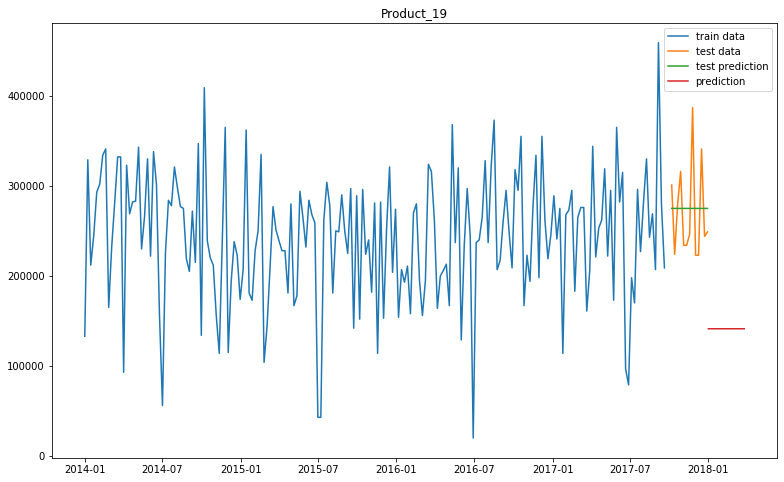

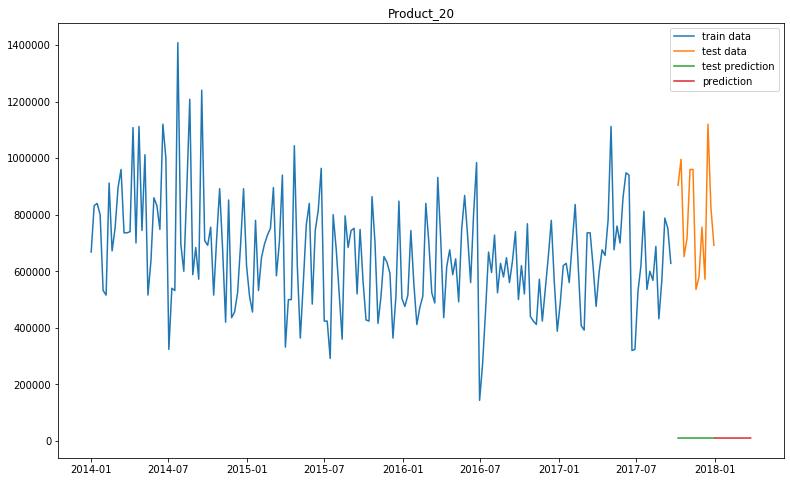

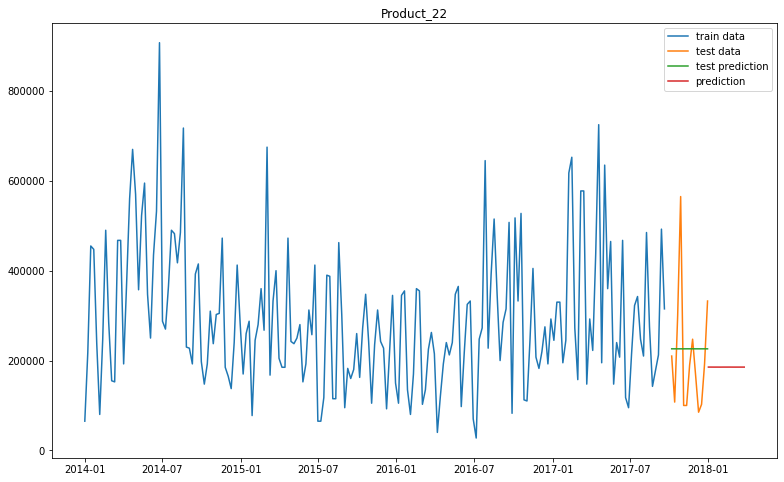

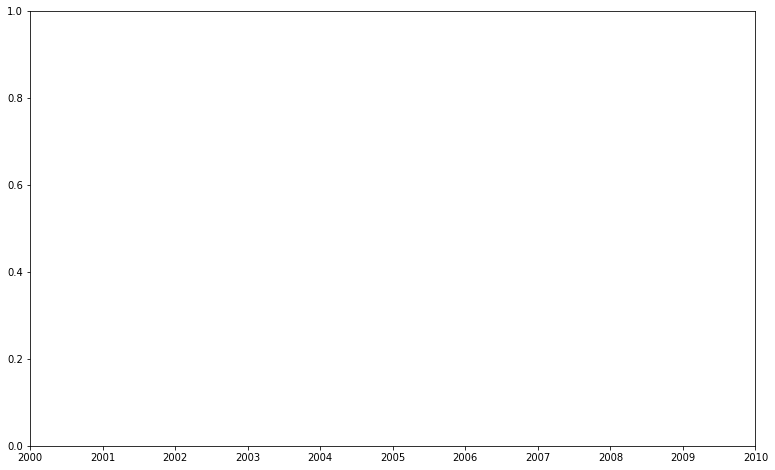

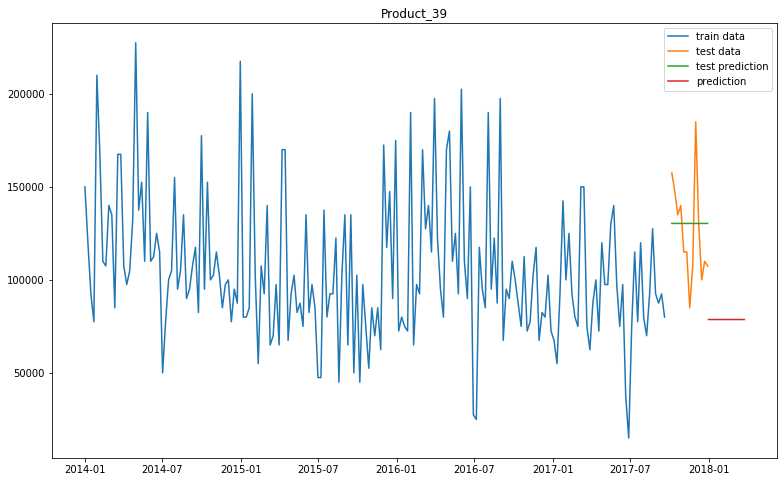

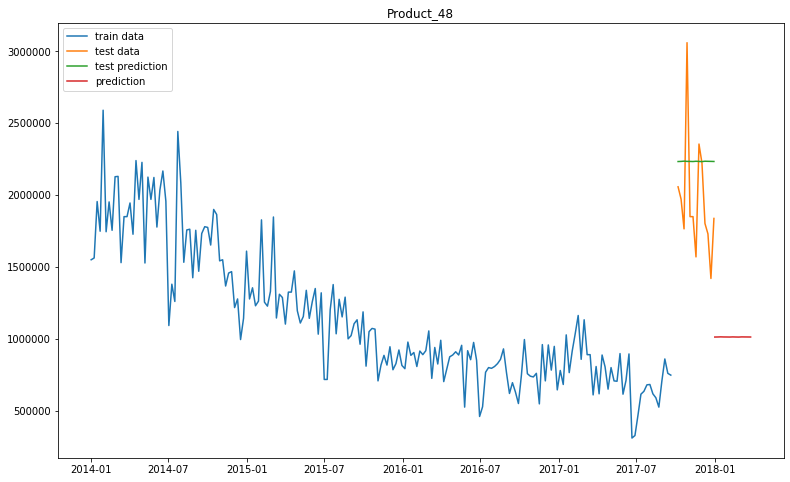

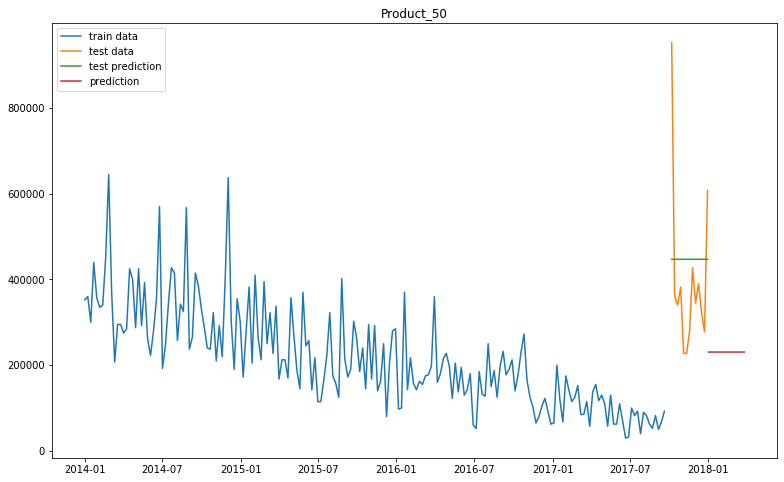

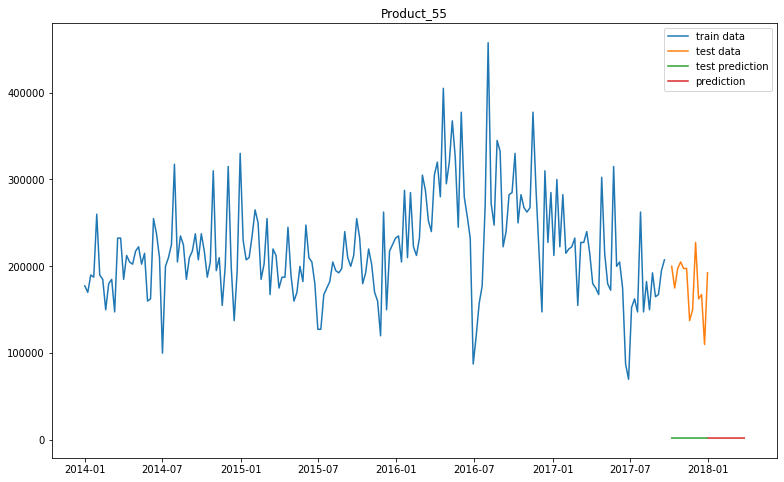

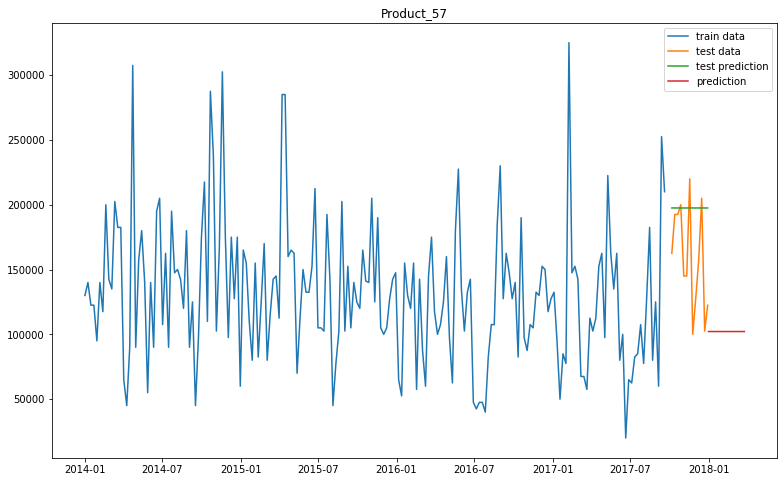

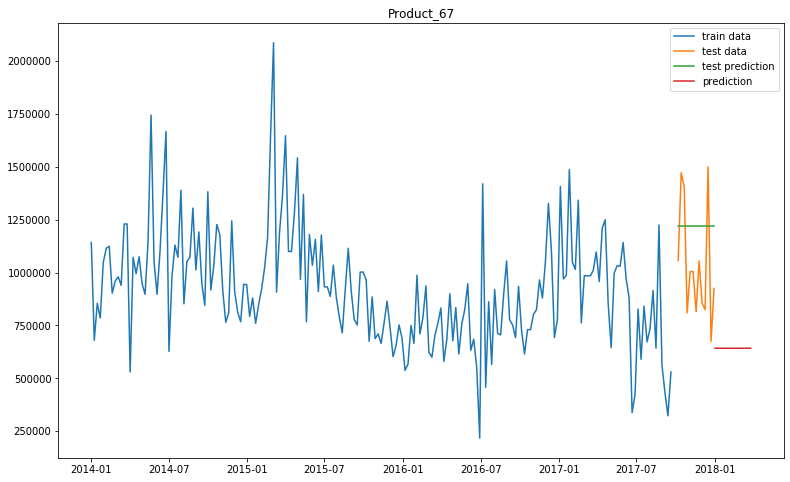

In [309]:
input_length=13
output_size=13
learning_rate = 0.01
num_epochs = 20

maes = {}

for i,loader in enumerate(trains_loaders):
    model = TCN_(input_length, output_size, [1,2], 2, 0.1)
    model.double()
    train_TCN(model, loader, 
                            input_length=input_length,
                            output_size=output_size,
                            learning_rate=learning_rate,
                            num_epochs=num_epochs,
                            criterion=nn.MSELoss()
             )
    with torch.no_grad():
        train = trains[i]
        test = tests[i]
        pred = predictions[i]
        testpred = model(test.x[0:13].view(1,13,13))
        prediction = model(pred.x.view(1,13,13))
    try:
        create_plot(i, train, test, testpred, prediction)
    except:
        pass
    mae_ = mae(test.y[0:13].detach().numpy(), testpred.T.detach().numpy())
    maes[idx2prod[i]] = mae_
    
file = open("mae_NOnorm_retrain.json", "w")
json.dump(maes, file)
file.close()

# Compare MAE for products

In [313]:
def compare_mae(fname):
    f1 = open(fname)
    data = json.load(f1)
    f1.close()
    return data

In [323]:
fnames = ['mae_NOnorm_NOretrain.json',
        'mae_NOnorm_retrain.json',
        'mae_norm_NOretrain.json',
        'mae_norm_retrain.json']
mae_dict = {}
for name in fnames:
    mae_dict[name]=compare_mae(name)

In [324]:
mae_dict

{'mae_NOnorm_NOretrain.json': {'Product_19': 71458.35905462086,
  'Product_20': 175063.64658337276,
  'Product_22': 106680.9130624798,
  'Product_30': 154975.5541518947,
  'Product_39': 55766.22179167239,
  'Product_48': 677184.7822649342,
  'Product_50': 198087.26858754965,
  'Product_55': 90596.63653355156,
  'Product_57': 45326.413992628266,
  'Product_67': 281040.0961334317},
 'mae_NOnorm_retrain.json': {'Product_19': 44073.99132073006,
  'Product_20': 779145.0828455178,
  'Product_22': 101562.98094587891,
  'Product_30': 53564.21277981532,
  'Product_39': 22002.742536228037,
  'Product_48': 418960.3218717944,
  'Product_50': 153949.4621298035,
  'Product_55': 176166.31552530333,
  'Product_57': 43066.9513841273,
  'Product_67': 299538.5472714453},
 'mae_norm_NOretrain.json': {'Product_19': 267901.82745555,
  'Product_20': 788363.3659170886,
  'Product_22': 206209.5197632423,
  'Product_30': 432747.98130170384,
  'Product_39': 124286.44284016543,
  'Product_48': 1959478.750532473,


In [326]:
maedf = pd.DataFrame(mae_dict)

In [327]:
maedf

mae_NOnorm_NOretrain.json  mae_NOnorm_retrain.json  \
Product_19               71458.359055             44073.991321   
Product_20              175063.646583            779145.082846   
Product_22              106680.913062            101562.980946   
Product_30              154975.554152             53564.212780   
Product_39               55766.221792             22002.742536   
Product_48              677184.782265            418960.321872   
Product_50              198087.268588            153949.462130   
Product_55               90596.636534            176166.315525   
Product_57               45326.413993             43066.951384   
Product_67              281040.096133            299538.547271   

            mae_norm_NOretrain.json  mae_norm_retrain.json  
Product_19             2.679018e+05           4.473678e+04  
Product_20             7.883634e+05           1.550979e+05  
Product_22             2.062095e+05           9.351092e+04  
Product_30             4.327480e+05           5.611760e+04  
Product_39             1.242864e+05           2.172132e+04  
Product_48             1.959479e+06           3.385630e+05  
Product_50             3.940941e+05           1.160138e+05  
Product_55             1.769788e+05           5.101444e+04  
Product_57             1.579403e+05           3.397584e+04  
Product_67             1.029863e+06           1.028712e+06

In [344]:
for i,v in maedf.T.min().items():
    print(i, v)
    print(maedf[maedf == v])

Product_19 44073.99132073006
            mae_NOnorm_NOretrain.json  mae_NOnorm_retrain.json  \
Product_19                        NaN             44073.991321   
Product_20                        NaN                      NaN   
Product_22                        NaN                      NaN   
Product_30                        NaN                      NaN   
Product_39                        NaN                      NaN   
Product_48                        NaN                      NaN   
Product_50                        NaN                      NaN   
Product_55                        NaN                      NaN   
Product_57                        NaN                      NaN   
Product_67                        NaN                      NaN   

            mae_norm_NOretrain.json  mae_norm_retrain.json  
Product_19                      NaN                    NaN  
Product_20                      NaN                    NaN  
Product_22                      NaN                    NaN  


In [360]:
maedf[maedf == maedf.T.min()[9]]

mae_NOnorm_NOretrain.json  mae_NOnorm_retrain.json  \
Product_19                        NaN                      NaN   
Product_20                        NaN                      NaN   
Product_22                        NaN                      NaN   
Product_30                        NaN                      NaN   
Product_39                        NaN                      NaN   
Product_48                        NaN                      NaN   
Product_50                        NaN                      NaN   
Product_55                        NaN                      NaN   
Product_57                        NaN                      NaN   
Product_67              281040.096133                      NaN   

            mae_norm_NOretrain.json  mae_norm_retrain.json  
Product_19                      NaN                    NaN  
Product_20                      NaN                    NaN  
Product_22                      NaN                    NaN  
Product_30                      NaN                    NaN  
Product_39                      NaN                    NaN  
Product_48                      NaN                    NaN  
Product_50                      NaN                    NaN  
Product_55                      NaN                    NaN  
Product_57                      NaN                    NaN  
Product_67                      NaN                    NaN

Product_19 - NOnorm_tetrain  

Product_20 - norm_retrain  

Product_22 - norm_retrain  

Product_30 - NOnorm_tetrain  

Product_39 - norm_retrain - 21721.32499  

Product_48 - norm_retrain - 338563.034772 - **error: bad shape of test data** 

Product_50 - norm_retrain - 116013.848576 - **error: bad shape of test data** 

Product_55 - norm_retrain - 51014.44326  

Product_57 - norm_retrain - 33975.84156  

Product_67 - NOnorm_NOretrain - 281040.096133 - **error: bad shape of test data** 

In [366]:
predictions[0].x

tensor([[176316.0000,  13562.7692,  13562.7692,  13562.7692,  13562.7692,
          13562.7692,  13562.7692,  13562.7692,  13562.7692,  13562.7692,
          13562.7692,  13562.7692,  13562.7692],
        [345894.0000, 337246.0000,  52549.2308,  52549.2308,  52549.2308,
          52549.2308,  52549.2308,  52549.2308,  52549.2308,  52549.2308,
          52549.2308,  52549.2308,  52549.2308],
        [256438.0000, 264364.0000, 266735.0000,  60579.7692,  60579.7692,
          60579.7692,  60579.7692,  60579.7692,  60579.7692,  60579.7692,
          60579.7692,  60579.7692,  60579.7692],
        [ 65076.5385, 292372.0000, 278796.0000, 274827.0000,  65076.5385,
          65076.5385,  65076.5385,  65076.5385,  65076.5385,  65076.5385,
          65076.5385,  65076.5385,  65076.5385],
        [120652.0000,  40426.7692, 142284.0000, 132288.0000, 130324.0000,
          40426.7692,  40426.7692,  40426.7692,  40426.7692,  40426.7692,
          40426.7692,  40426.7692,  40426.7692],
        [263464

## Lessons learned:
- autorepair of missing values by forecasting horizon leads to error: only 1 value is given for the last week; autofill creates bad values because of MEAN()
- change in the forecast logic requires restructure of input data